In [12]:
#import needed packages
import glob
from bioverse.util import compute_t_ref
from bioverse.survey import TransitSurvey
from bioverse.generator import Generator
from atmos_to_PSG import atmosatm, psgspec
import pyatmos
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

In [13]:
curr_dir=os.getcwd()

In [14]:
#set atmos pathway and initiate it
atmos = pyatmos.Simulation(code_path='~/atmos-master', DEBUG=True)
atmos.start()

Initialization complete: 2024-01-18 11:43:11
Exiting...
pyatmos is ready to go! 


In [71]:
#create parameter list--in this case, O2 flux
O2_flux_list=[1.0E+9,2.5E+9,3.5E+9,5.0E+9,6.0E+9,7.5E+9,8.5E+9,1.00E+10,5.0E+10,9.0E+10,1.50E+11,2.50E+11,3.0E+11,3.25E+11,3.5E+11,3.95E+11,4.2E+11,5.50E+11]


In [72]:
#run PyAtmos over the range of parameters
for i in range(len(O2_flux_list)):
	O2_flux=O2_flux_list[i]
	print(O2_flux)
	output_dir=curr_dir+'/sample_atmos_results/O2_test_{n}'.format(n=i)
	args = {
		'species_fluxes': {'O2' :O2_flux},
		'max_photochem_iterations' : 50000, 
		'max_clima_steps' : 10, 
		'output_directory' : output_dir}
	
	
	atmos.run(**args)

1000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp9x_0h6hj
_write_container_file(): cp /tmp/tmp5ekpoi45 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 1000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.221731837818165     
 CALLING RATES...
 NW =                   750    WAVELENGTH GRID:   1176.5000000000000       -   10000.000000000000       Angstroms
 PSTAR is our sun
 using Atlas 1 spectrum for the sun

 

 N =    4  EMAX = 8.35E-03 FOR CH3     AT Z = 2.28E+06 U = 2.66E-20 RHS = 2.22E-22  DT = 1.18E-05  TIME = 1.84E-05
 N =    5  EMAX = 7.90E-03 FOR CH3     AT Z = 2.38E+06 U = 4.36E-20 RHS = 3.44E-22  DT = 2.35E-05  TIME = 3.02E-05
 N =    6  EMAX = 9.77E-03 FOR CH3     AT Z = 2.58E+06 U = 1.16E-19 RHS = 1.13E-21  DT = 3.29E-05  TIME = 5.37E-05
 N =    7  EMAX = 8.89E-03 FOR CH3     AT Z = 2.72E+06 U = 2.41E-19 RHS = 2.14E-21  DT = 4.61E-05  TIME = 8.66E-05
 N =    8  EMAX = 1.02E-02 FOR HCO     AT Z = 6.48E+06 U = 2.54E-18 RHS = 2.58E-20  DT = 5.53E-05  TIME = 1.33E-04
 N =    9  EMAX = 1.14E-02 FOR HCO     AT Z = 6.48E+06 U = 2.57E-18 RHS = 2.92E-20  DT = 6.64E-05  TIME = 1.88E-04
 N =   10  EMAX = 1.26E-02 FOR HCO     AT Z = 6.48E+06 U = 2.59E-18 RHS = 3.26E-20  DT = 7.97E-05  TIME = 2.54E-04
 N =   11  EMAX = 1.37E-02 FOR HCO     AT Z = 6.48E+06 U = 2.63E-18 RHS = 3.59E-20  DT = 9.56E-05  TIME = 3.34E-04
 N =   12  EMAX = 1.46E-02 FOR HCO     AT Z = 6.48E+06 U = 2.66E-18 RHS = 3.90E-

 N =   79  EMAX = 1.16E-02 FOR NO2     AT Z = 7.48E+06 U = 1.24E-13 RHS =-1.43E-15  DT = 1.47E+02  TIME = 6.16E+02
 N =   80  EMAX = 1.33E-02 FOR NO2     AT Z = 7.48E+06 U = 1.23E-13 RHS =-1.63E-15  DT = 1.77E+02  TIME = 7.64E+02
 N =   81  EMAX = 1.55E-02 FOR HS      AT Z = 7.52E+06 U = 1.79E-19 RHS =-2.78E-21  DT = 2.12E+02  TIME = 9.40E+02
 N =   82  EMAX = 1.82E-02 FOR HS      AT Z = 7.58E+06 U = 1.72E-19 RHS =-3.14E-21  DT = 2.54E+02  TIME = 1.15E+03
 N =   83  EMAX = 2.13E-02 FOR HS      AT Z = 7.58E+06 U = 1.69E-19 RHS =-3.61E-21  DT = 3.05E+02  TIME = 1.41E+03
 N =   84  EMAX = 2.48E-02 FOR HS      AT Z = 7.62E+06 U = 1.61E-19 RHS =-3.99E-21  DT = 3.66E+02  TIME = 1.71E+03
 N =   85  EMAX = 2.87E-02 FOR HO2NO2  AT Z = 7.52E+06 U = 5.31E-19 RHS =-1.52E-20  DT = 4.40E+02  TIME = 2.08E+03
 N =   86  EMAX = 3.45E-02 FOR HO2NO2  AT Z = 7.58E+06 U = 3.79E-19 RHS =-1.31E-20  DT = 5.28E+02  TIME = 2.52E+03
 N =   87  EMAX = 4.13E-02 FOR HO2NO2  AT Z = 7.62E+06 U = 2.65E-19 RHS =-1.09E-

 N =  152  EMAX = 1.82E-02 FOR HS      AT Z = 7.82E+06 U = 1.81E-20 RHS =-3.30E-22  DT = 2.41E+07  TIME = 1.20E+08
 N =  153  EMAX = 2.03E-02 FOR C2H6    AT Z = 9.38E+06 U = 1.77E-17 RHS =-3.60E-19  DT = 2.89E+07  TIME = 1.44E+08
 N =  154  EMAX = 2.46E-02 FOR C2H6    AT Z = 9.98E+06 U = 9.25E-18 RHS =-2.28E-19  DT = 3.47E+07  TIME = 1.73E+08
 N =  155  EMAX = 2.87E-02 FOR C2H6    AT Z = 9.98E+06 U = 9.02E-18 RHS =-2.59E-19  DT = 4.16E+07  TIME = 2.08E+08
 N =  156  EMAX = 3.24E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.76E-18 RHS =-2.83E-19  DT = 4.99E+07  TIME = 2.50E+08
 N =  157  EMAX = 3.52E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.47E-18 RHS =-2.98E-19  DT = 5.99E+07  TIME = 3.00E+08
 N =  158  EMAX = 3.70E-02 FOR C2H6    AT Z = 9.98E+06 U = 8.18E-18 RHS =-3.02E-19  DT = 7.19E+07  TIME = 3.59E+08
 N =  159  EMAX = 3.76E-02 FOR C2H6    AT Z = 9.98E+06 U = 7.87E-18 RHS =-2.96E-19  DT = 8.63E+07  TIME = 4.31E+08
 N =  160  EMAX = 3.69E-02 FOR C2H6    AT Z = 9.98E+06 U = 7.58E-18 RHS =-2.80E-

 N =  227  EMAX = 9.89E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.88E-20  DT = 8.56E+05  TIME = 6.39E+11
 N =  228  EMAX = 9.84E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.87E-20  DT = 5.99E+05  TIME = 6.39E+11
 N =  229  EMAX = 9.77E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.86E-20  DT = 4.19E+05  TIME = 6.39E+11
 N =  230  EMAX = 9.68E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.84E-20  DT = 2.94E+05  TIME = 6.39E+11
 N =  231  EMAX = 9.55E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.82E-20  DT = 2.05E+05  TIME = 6.39E+11
 N =  232  EMAX = 9.37E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.79E-20  DT = 1.44E+05  TIME = 6.39E+11
 N =  233  EMAX = 9.13E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.74E-20  DT = 1.01E+05  TIME = 6.39E+11
 N =  234  EMAX = 8.82E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.68E-20  DT = 7.05E+04  TIME = 6.39E+11
 N =  235  EMAX = 8.41E-01 FOR S2      AT Z = 3.25E+05 U = 1.90E-20 RHS =-1.60E-

 N =  301  EMAX = 1.06E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.25E-20  DT = 3.28E+08  TIME = 7.16E+11
 N =  302  EMAX = 1.07E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.31E-20  DT = 2.30E+08  TIME = 7.16E+11
 N =  303  EMAX = 9.95E-01 FOR S2      AT Z = 1.25E+05 U = 1.06E-19 RHS =-1.06E-19  DT = 1.61E+08  TIME = 7.16E+11
 N =  304  EMAX = 1.03E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.17E-20  DT = 1.12E+08  TIME = 7.16E+11
 N =  305  EMAX = 1.00E+00 FOR S2      AT Z = 1.75E+05 U = 3.03E-20 RHS =-3.04E-20  DT = 7.87E+07  TIME = 7.16E+11
 N =  306  EMAX = 9.97E-01 FOR S2      AT Z = 1.25E+05 U = 1.06E-19 RHS =-1.06E-19  DT = 5.51E+07  TIME = 7.16E+11
 N =  307  EMAX = 1.04E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.19E-20  DT = 3.86E+07  TIME = 7.16E+11
 N =  308  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.11E-20  DT = 2.70E+07  TIME = 7.16E+11
 N =  309  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 3.08E-20 RHS =-3.09E-

 N =  376  EMAX = 1.18E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-2.31E-20  DT = 1.10E+08  TIME = 7.17E+11
 N =  377  EMAX = 9.35E-01 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-1.83E-20  DT = 7.70E+07  TIME = 7.17E+11
 N =  378  EMAX = 1.07E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-2.10E-20  DT = 5.39E+07  TIME = 7.17E+11
 N =  379  EMAX = 1.10E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-2.16E-20  DT = 3.77E+07  TIME = 7.17E+11
 N =  380  EMAX = 9.95E-01 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-1.95E-20  DT = 2.64E+07  TIME = 7.17E+11
 N =  381  EMAX = 1.03E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-2.02E-20  DT = 1.85E+07  TIME = 7.17E+11
 N =  382  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-1.98E-20  DT = 1.29E+07  TIME = 7.17E+11
 N =  383  EMAX = 1.02E+00 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-2.00E-20  DT = 9.06E+06  TIME = 7.17E+11
 N =  384  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 1.96E-20 RHS =-1.95E-

 N =  452  EMAX = 7.51E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-3.03E-20  DT = 4.58E+04  TIME = 7.21E+11
 N =  453  EMAX = 6.81E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-2.75E-20  DT = 3.21E+04  TIME = 7.21E+11
 N =  454  EMAX = 6.02E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-2.43E-20  DT = 2.24E+04  TIME = 7.21E+11
 N =  455  EMAX = 5.19E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-2.09E-20  DT = 1.57E+04  TIME = 7.21E+11
 N =  456  EMAX = 4.35E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-1.75E-20  DT = 1.10E+04  TIME = 7.21E+11
 N =  457  EMAX = 3.54E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-1.43E-20  DT = 7.70E+03  TIME = 7.21E+11
 N =  458  EMAX = 2.81E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-1.14E-20  DT = 5.39E+03  TIME = 7.21E+11
 N =  459  EMAX = 2.18E-01 FOR S2      AT Z = 2.50E+04 U = 4.04E-20 RHS =-8.80E-21  DT = 3.77E+03  TIME = 7.21E+11
 N =  460  EMAX = 1.57E-01 FOR S2      AT Z = 2.50E+04 U = 3.16E-20 RHS =-4.96E-

 N =  524  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.27E-19 RHS =-1.28E-19  DT = 3.12E+07  TIME = 1.23E+12
 N =  525  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.27E-19 RHS =-1.27E-19  DT = 2.18E+07  TIME = 1.23E+12
 N =  526  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.11E-19  DT = 1.53E+07  TIME = 1.23E+12
 N =  527  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.11E-19  DT = 1.07E+07  TIME = 1.23E+12
 N =  528  EMAX = 9.98E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.11E-19  DT = 7.49E+06  TIME = 1.23E+12
 N =  529  EMAX = 9.97E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.10E-19  DT = 5.25E+06  TIME = 1.23E+12
 N =  530  EMAX = 9.96E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.10E-19  DT = 3.67E+06  TIME = 1.23E+12
 N =  531  EMAX = 9.94E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.10E-19  DT = 2.57E+06  TIME = 1.23E+12
 N =  532  EMAX = 9.92E-01 FOR S2      AT Z = 7.50E+04 U = 2.11E-19 RHS =-2.09E-

 N =  599  EMAX = 7.51E-03 FOR N2O5    AT Z = 3.82E+06 U = 1.11E-16 RHS =-8.33E-19  DT = 2.68E+09  TIME = 1.23E+12
 N =  600  EMAX = 1.33E-02 FOR N2O5    AT Z = 3.82E+06 U = 1.10E-16 RHS =-1.46E-18  DT = 3.21E+09  TIME = 1.24E+12
 N =  601  EMAX = 2.32E-02 FOR OCS     AT Z = 3.98E+06 U = 2.61E-20 RHS =-6.05E-22  DT = 3.85E+09  TIME = 1.24E+12
 N =  602  EMAX = 2.47E-02 FOR OCS     AT Z = 3.98E+06 U = 2.55E-20 RHS =-6.31E-22  DT = 4.62E+09  TIME = 1.24E+12
 N =  603  EMAX = 3.18E-02 FOR OCS     AT Z = 3.98E+06 U = 2.49E-20 RHS =-7.92E-22  DT = 5.55E+09  TIME = 1.25E+12
 N =  604  EMAX = 9.96E-01 FOR S2      AT Z = 3.25E+05 U = 1.63E-20 RHS =-1.63E-20  DT = 5.55E+09  TIME = 1.25E+12
 N =  605  EMAX = 1.01E+00 FOR S2      AT Z = 3.25E+05 U = 1.63E-20 RHS =-1.65E-20  DT = 3.88E+09  TIME = 1.25E+12
 N =  606  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.63E-20 RHS =-1.63E-20  DT = 2.72E+09  TIME = 1.25E+12
 N =  607  EMAX = 1.01E+00 FOR S2      AT Z = 3.25E+05 U = 1.63E-20 RHS =-1.64E-

 N =  673  EMAX = 1.22E+00 FOR S2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-1.68E-20  DT = 2.56E+08  TIME = 1.25E+12
 N =  674  EMAX = 1.09E+00 FOR S2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-1.51E-20  DT = 1.79E+08  TIME = 1.25E+12
 N =  675  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 3.04E-20 RHS =-3.04E-20  DT = 1.25E+08  TIME = 1.25E+12
 N =  676  EMAX = 1.15E+00 FOR S2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-1.58E-20  DT = 8.76E+07  TIME = 1.25E+12
 N =  677  EMAX = 1.05E+00 FOR S2      AT Z = 2.50E+04 U = 3.04E-20 RHS =-3.19E-20  DT = 6.13E+07  TIME = 1.25E+12
 N =  678  EMAX = 1.02E+00 FOR S2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-1.40E-20  DT = 4.29E+07  TIME = 1.25E+12
 N =  679  EMAX = 1.02E+00 FOR S2      AT Z = 7.50E+04 U = 1.38E-20 RHS =-1.41E-20  DT = 3.01E+07  TIME = 1.25E+12
 N =  680  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 3.04E-20 RHS =-3.04E-20  DT = 2.10E+07  TIME = 1.25E+12
 N =  681  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 3.04E-20 RHS =-3.05E-

 N =  746  EMAX = 9.56E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-2.02E-20  DT = 3.34E+05  TIME = 1.25E+12
 N =  747  EMAX = 9.39E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.98E-20  DT = 2.34E+05  TIME = 1.25E+12
 N =  748  EMAX = 9.15E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.93E-20  DT = 1.64E+05  TIME = 1.25E+12
 N =  749  EMAX = 8.83E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.87E-20  DT = 1.15E+05  TIME = 1.25E+12
 N =  750  EMAX = 8.41E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.78E-20  DT = 8.03E+04  TIME = 1.25E+12
 N =  751  EMAX = 7.89E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.67E-20  DT = 5.62E+04  TIME = 1.25E+12
 N =  752  EMAX = 7.26E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.53E-20  DT = 3.93E+04  TIME = 1.25E+12
 N =  753  EMAX = 6.52E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.38E-20  DT = 2.75E+04  TIME = 1.25E+12
 N =  754  EMAX = 5.71E-01 FOR S2      AT Z = 2.50E+04 U = 2.11E-20 RHS =-1.21E-

 N =  821  EMAX = 1.57E-03 FOR OCS     AT Z = 3.98E+06 U = 2.21E-20 RHS =-3.48E-23  DT = 1.60E+06  TIME = 1.25E+12
 N =  822  EMAX = 1.56E-03 FOR OCS     AT Z = 3.98E+06 U = 2.21E-20 RHS =-3.45E-23  DT = 4.81E+06  TIME = 1.25E+12
 N =  823  EMAX = 7.61E-04 FOR SO3     AT Z = 3.82E+06 U = 6.65E-16 RHS =-5.06E-19  DT = 1.93E+07  TIME = 1.25E+12
 N =  824  EMAX = 8.73E-04 FOR SO3     AT Z = 4.58E+06 U = 1.50E-16 RHS =-1.31E-19  DT = 7.70E+07  TIME = 1.25E+12
 N =  825  EMAX = 1.27E-03 FOR HSO     AT Z = 7.72E+06 U = 4.31E-20 RHS =-5.48E-23  DT = 2.31E+08  TIME = 1.25E+12
 N =  826  EMAX = 1.09E-03 FOR N2O5    AT Z = 3.88E+06 U = 5.00E-17 RHS =-5.47E-20  DT = 6.93E+08  TIME = 1.25E+12
 N =  827  EMAX = 3.17E-03 FOR N2O5    AT Z = 3.88E+06 U = 5.00E-17 RHS =-1.58E-19  DT = 2.08E+09  TIME = 1.26E+12
 N =  828  EMAX = 4.44E+00 FOR S2      AT Z = 2.50E+04 U = 1.36E-20 RHS =-6.04E-20  DT = 2.08E+09  TIME = 1.26E+12
 N =  829  EMAX = 7.97E-02 FOR S2      AT Z = 2.50E+04 U = 1.36E-20 RHS = 1.09E-

 N =  897  EMAX = 9.93E-01 FOR S2      AT Z = 5.25E+05 U = 1.16E-20 RHS =-1.16E-20  DT = 9.19E+08  TIME = 1.29E+12
 N =  898  EMAX = 1.08E+00 FOR S2      AT Z = 5.25E+05 U = 1.16E-20 RHS =-1.26E-20  DT = 6.44E+08  TIME = 1.29E+12
 N =  899  EMAX = 1.01E+00 FOR S2      AT Z = 7.75E+05 U = 1.16E-20 RHS =-1.16E-20  DT = 4.50E+08  TIME = 1.29E+12
 N =  900  EMAX = 1.01E+00 FOR S2      AT Z = 5.25E+05 U = 1.16E-20 RHS =-1.17E-20  DT = 3.15E+08  TIME = 1.28E+12
 N =  901  EMAX = 1.00E+00 FOR S2      AT Z = 7.75E+05 U = 1.16E-20 RHS =-1.16E-20  DT = 2.21E+08  TIME = 1.28E+12
 N =  902  EMAX = 9.95E-01 FOR S2      AT Z = 7.75E+05 U = 1.16E-20 RHS =-1.15E-20  DT = 1.55E+08  TIME = 1.28E+12
 N =  903  EMAX = 1.01E+00 FOR S2      AT Z = 7.75E+05 U = 1.16E-20 RHS =-1.16E-20  DT = 1.08E+08  TIME = 1.28E+12
 N =  904  EMAX = 1.00E+00 FOR S2      AT Z = 7.75E+05 U = 1.16E-20 RHS =-1.16E-20  DT = 7.57E+07  TIME = 1.28E+12
 N =  905  EMAX = 1.00E+00 FOR S2      AT Z = 5.25E+05 U = 1.16E-20 RHS =-1.17E-

 N =  972  EMAX = 1.00E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 2.85E+09  TIME = 1.39E+12
 N =  973  EMAX = 1.00E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 1.99E+09  TIME = 1.39E+12
 N =  974  EMAX = 1.00E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 1.40E+09  TIME = 1.39E+12
 N =  975  EMAX = 1.00E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 9.77E+08  TIME = 1.39E+12
 N =  976  EMAX = 1.02E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.06E-20  DT = 6.84E+08  TIME = 1.39E+12
 N =  977  EMAX = 9.99E-01 FOR S2      AT Z = 4.75E+05 U = 2.63E-20 RHS =-2.63E-20  DT = 4.79E+08  TIME = 1.39E+12
 N =  978  EMAX = 1.00E+00 FOR S2      AT Z = 4.75E+05 U = 2.63E-20 RHS =-2.63E-20  DT = 3.35E+08  TIME = 1.39E+12
 N =  979  EMAX = 1.00E+00 FOR S2      AT Z = 4.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 2.35E+08  TIME = 1.39E+12
 N =  980  EMAX = 1.00E+00 FOR S2      AT Z = 4.75E+05 U = 2.63E-20 RHS =-2.63E-

 N = 1045  EMAX = 9.72E-03 FOR N2O5    AT Z = 3.78E+06 U = 7.91E-17 RHS =-7.69E-19  DT = 2.35E+09  TIME = 1.39E+12
 N = 1046  EMAX = 1.63E-02 FOR OCS     AT Z = 3.92E+06 U = 2.14E-20 RHS =-3.50E-22  DT = 2.82E+09  TIME = 1.40E+12
 N = 1047  EMAX = 2.17E-02 FOR OCS     AT Z = 3.92E+06 U = 2.11E-20 RHS =-4.59E-22  DT = 3.39E+09  TIME = 1.40E+12
 N = 1048  EMAX = 2.62E-02 FOR OCS     AT Z = 3.92E+06 U = 2.06E-20 RHS =-5.41E-22  DT = 4.06E+09  TIME = 1.40E+12
 N = 1049  EMAX = 3.18E-02 FOR OCS     AT Z = 3.92E+06 U = 2.01E-20 RHS =-6.39E-22  DT = 4.88E+09  TIME = 1.41E+12
 N = 1050  EMAX = 3.79E-02 FOR OCS     AT Z = 3.92E+06 U = 1.95E-20 RHS =-7.37E-22  DT = 5.85E+09  TIME = 1.41E+12
 N = 1051  EMAX = 4.61E-02 FOR OCS     AT Z = 3.92E+06 U = 1.87E-20 RHS =-8.63E-22  DT = 7.02E+09  TIME = 1.42E+12
 N = 1052  EMAX = 5.49E-02 FOR OCS     AT Z = 3.92E+06 U = 1.79E-20 RHS =-9.81E-22  DT = 8.43E+09  TIME = 1.43E+12
 N = 1053  EMAX = 6.57E-02 FOR OCS     AT Z = 3.92E+06 U = 1.69E-20 RHS =-1.11E-

 N = 1119  EMAX = 4.34E-03 FOR HNO3    AT Z = 7.82E+06 U = 2.00E-20 RHS =-8.69E-23  DT = 5.71E+04  TIME = 1.45E+12
 N = 1120  EMAX = 5.95E-03 FOR OCS     AT Z = 3.72E+06 U = 1.44E-18 RHS =-8.57E-21  DT = 1.14E+05  TIME = 1.45E+12
 N = 1121  EMAX = 1.10E-02 FOR OCS     AT Z = 3.88E+06 U = 4.26E-20 RHS =-4.69E-22  DT = 1.37E+05  TIME = 1.45E+12
 N = 1122  EMAX = 1.21E-02 FOR OCS     AT Z = 3.92E+06 U = 1.28E-20 RHS =-1.55E-22  DT = 1.64E+05  TIME = 1.45E+12
 N = 1123  EMAX = 1.21E-02 FOR OCS     AT Z = 3.92E+06 U = 1.27E-20 RHS =-1.54E-22  DT = 1.97E+05  TIME = 1.45E+12
 N = 1124  EMAX = 1.12E-02 FOR OCS     AT Z = 3.92E+06 U = 1.25E-20 RHS =-1.41E-22  DT = 2.37E+05  TIME = 1.45E+12
 N = 1125  EMAX = 9.68E-03 FOR OCS     AT Z = 3.92E+06 U = 1.24E-20 RHS =-1.20E-22  DT = 3.31E+05  TIME = 1.45E+12
 N = 1126  EMAX = 8.72E-03 FOR OCS     AT Z = 3.92E+06 U = 1.23E-20 RHS =-1.07E-22  DT = 4.64E+05  TIME = 1.45E+12
 N = 1127  EMAX = 7.03E-03 FOR OCS     AT Z = 3.92E+06 U = 1.22E-20 RHS =-8.54E-

 N = 1191  EMAX = 9.91E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.91E-20  DT = 1.08E+06  TIME = 1.73E+12
 N = 1192  EMAX = 9.88E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.88E-20  DT = 7.55E+05  TIME = 1.73E+12
 N = 1193  EMAX = 9.82E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.85E-20  DT = 5.29E+05  TIME = 1.73E+12
 N = 1194  EMAX = 9.75E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.80E-20  DT = 3.70E+05  TIME = 1.73E+12
 N = 1195  EMAX = 9.65E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.73E-20  DT = 2.59E+05  TIME = 1.73E+12
 N = 1196  EMAX = 9.51E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.63E-20  DT = 1.81E+05  TIME = 1.73E+12
 N = 1197  EMAX = 9.31E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.49E-20  DT = 1.27E+05  TIME = 1.73E+12
 N = 1198  EMAX = 9.05E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.31E-20  DT = 8.88E+04  TIME = 1.73E+12
 N = 1199  EMAX = 8.71E-01 FOR S2      AT Z = 3.25E+05 U = 6.97E-20 RHS =-6.07E-

 N = 1266  EMAX = 1.26E-01 FOR OCS     AT Z = 3.72E+06 U = 3.15E-20 RHS =-3.98E-21  DT = 1.12E+10  TIME = 1.80E+12
 N = 1267  EMAX = 1.40E-01 FOR OCS     AT Z = 3.72E+06 U = 2.75E-20 RHS =-3.84E-21  DT = 1.23E+10  TIME = 1.82E+12
 N = 1268  EMAX = 1.55E-01 FOR OCS     AT Z = 3.72E+06 U = 2.37E-20 RHS =-3.66E-21  DT = 1.23E+10  TIME = 1.83E+12
 N = 1269  EMAX = 1.73E-01 FOR OCS     AT Z = 3.72E+06 U = 2.00E-20 RHS =-3.45E-21  DT = 1.23E+10  TIME = 1.84E+12
 N = 1270  EMAX = 1.70E-01 FOR OCS     AT Z = 3.72E+06 U = 1.65E-20 RHS =-2.82E-21  DT = 1.23E+10  TIME = 1.85E+12
 N = 1271  EMAX = 1.79E-01 FOR OCS     AT Z = 3.72E+06 U = 1.37E-20 RHS =-2.46E-21  DT = 1.23E+10  TIME = 1.86E+12
 N = 1272  EMAX = 1.79E-01 FOR OCS     AT Z = 3.72E+06 U = 1.13E-20 RHS =-2.02E-21  DT = 1.23E+10  TIME = 1.88E+12
 N = 1273  EMAX = 1.83E-01 FOR OCS     AT Z = 3.68E+06 U = 3.22E-20 RHS =-5.90E-21  DT = 1.23E+10  TIME = 1.89E+12
 N = 1274  EMAX = 1.85E-01 FOR OCS     AT Z = 3.68E+06 U = 2.63E-20 RHS =-4.87E-

 N = 1339  EMAX = 9.23E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.50E-20  DT = 1.55E+05  TIME = 2.07E+12
 N = 1340  EMAX = 8.94E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.45E-20  DT = 1.08E+05  TIME = 2.07E+12
 N = 1341  EMAX = 8.56E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.39E-20  DT = 7.59E+04  TIME = 2.07E+12
 N = 1342  EMAX = 8.09E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.31E-20  DT = 5.31E+04  TIME = 2.07E+12
 N = 1343  EMAX = 7.51E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.22E-20  DT = 3.72E+04  TIME = 2.07E+12
 N = 1344  EMAX = 6.84E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-1.11E-20  DT = 2.60E+04  TIME = 2.07E+12
 N = 1345  EMAX = 6.09E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-9.88E-21  DT = 1.82E+04  TIME = 2.07E+12
 N = 1346  EMAX = 5.29E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-8.59E-21  DT = 1.28E+04  TIME = 2.07E+12
 N = 1347  EMAX = 4.49E-01 FOR S2      AT Z = 7.50E+04 U = 1.62E-20 RHS =-7.29E-

 N = 1414  EMAX = 6.82E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-1.14E-20  DT = 2.40E+04  TIME = 2.09E+12
 N = 1415  EMAX = 6.07E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-1.01E-20  DT = 1.68E+04  TIME = 2.09E+12
 N = 1416  EMAX = 5.28E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-8.80E-21  DT = 1.18E+04  TIME = 2.09E+12
 N = 1417  EMAX = 4.49E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-7.48E-21  DT = 8.24E+03  TIME = 2.09E+12
 N = 1418  EMAX = 3.72E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-6.20E-21  DT = 5.77E+03  TIME = 2.09E+12
 N = 1419  EMAX = 3.01E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-5.02E-21  DT = 4.04E+03  TIME = 2.09E+12
 N = 1420  EMAX = 2.38E-01 FOR S2      AT Z = 7.50E+04 U = 1.67E-20 RHS =-3.96E-21  DT = 2.83E+03  TIME = 2.09E+12
 N = 1421  EMAX = 1.66E-01 FOR S2      AT Z = 7.50E+04 U = 1.27E-20 RHS =-2.10E-21  DT = 2.83E+03  TIME = 2.09E+12
 N = 1422  EMAX = 1.54E-01 FOR S2      AT Z = 7.50E+04 U = 1.06E-20 RHS =-1.63E-

 N = 1489  EMAX = 2.52E-01 FOR OCS     AT Z = 3.28E+06 U = 3.44E-20 RHS =-8.66E-21  DT = 1.10E+09  TIME = 2.28E+12
 N = 1490  EMAX = 2.52E-01 FOR OCS     AT Z = 3.28E+06 U = 3.44E-20 RHS =-8.65E-21  DT = 7.72E+08  TIME = 2.28E+12
 N = 1491  EMAX = 2.51E-01 FOR OCS     AT Z = 3.28E+06 U = 3.44E-20 RHS =-8.63E-21  DT = 5.40E+08  TIME = 2.28E+12
 N = 1492  EMAX = 2.50E-01 FOR OCS     AT Z = 3.28E+06 U = 3.44E-20 RHS =-8.60E-21  DT = 3.78E+08  TIME = 2.28E+12
 N = 1493  EMAX = 2.49E-01 FOR OCS     AT Z = 3.28E+06 U = 3.44E-20 RHS =-8.55E-21  DT = 2.65E+08  TIME = 2.28E+12
 N = 1494  EMAX = 2.22E-01 FOR H2S     AT Z = 1.82E+06 U = 1.42E-18 RHS = 3.14E-19  DT = 2.65E+08  TIME = 2.28E+12
 N = 1495  EMAX = 1.22E-01 FOR H2S     AT Z = 1.82E+06 U = 1.73E-18 RHS =-2.11E-19  DT = 2.91E+08  TIME = 2.28E+12
 N = 1496  EMAX = 6.86E-02 FOR H2S     AT Z = 1.82E+06 U = 1.52E-18 RHS = 1.04E-19  DT = 3.49E+08  TIME = 2.28E+12
 N = 1497  EMAX = 3.06E-02 FOR H2S     AT Z = 1.82E+06 U = 1.62E-18 RHS =-4.97E-

 N = 1564  EMAX = 1.72E-02 FOR OCS     AT Z = 3.28E+06 U = 1.09E-20 RHS =-1.88E-22  DT = 2.02E+05  TIME = 2.30E+12
 N = 1565  EMAX = 1.69E-02 FOR OCS     AT Z = 3.28E+06 U = 1.07E-20 RHS =-1.81E-22  DT = 2.43E+05  TIME = 2.30E+12
 N = 1566  EMAX = 1.55E-02 FOR OCS     AT Z = 3.28E+06 U = 1.05E-20 RHS =-1.64E-22  DT = 2.91E+05  TIME = 2.30E+12
 N = 1567  EMAX = 1.34E-02 FOR OCS     AT Z = 3.28E+06 U = 1.04E-20 RHS =-1.39E-22  DT = 3.50E+05  TIME = 2.30E+12
 N = 1568  EMAX = 1.10E-02 FOR OCS     AT Z = 3.28E+06 U = 1.02E-20 RHS =-1.13E-22  DT = 4.20E+05  TIME = 2.30E+12
 N = 1569  EMAX = 1.07E-02 FOR SO3     AT Z = 3.42E+06 U = 1.48E-19 RHS =-1.59E-21  DT = 5.04E+05  TIME = 2.30E+12
 N = 1570  EMAX = 1.12E-02 FOR SO      AT Z = 3.52E+06 U = 4.28E-20 RHS =-4.80E-22  DT = 6.04E+05  TIME = 2.30E+12
 N = 1571  EMAX = 1.14E-02 FOR SO3     AT Z = 3.58E+06 U = 7.93E-20 RHS =-9.01E-22  DT = 7.25E+05  TIME = 2.30E+12
 N = 1572  EMAX = 1.11E-02 FOR SO3     AT Z = 3.68E+06 U = 6.23E-20 RHS =-6.92E-

 N = 1639  EMAX = 1.00E+00 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.43E-20  DT = 2.35E+07  TIME = 2.39E+12
 N = 1640  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.43E-20  DT = 1.65E+07  TIME = 2.39E+12
 N = 1641  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.43E-20  DT = 1.15E+07  TIME = 2.39E+12
 N = 1642  EMAX = 9.99E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.43E-20  DT = 8.07E+06  TIME = 2.39E+12
 N = 1643  EMAX = 9.98E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.43E-20  DT = 5.65E+06  TIME = 2.39E+12
 N = 1644  EMAX = 9.97E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.42E-20  DT = 3.95E+06  TIME = 2.39E+12
 N = 1645  EMAX = 9.96E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.42E-20  DT = 2.77E+06  TIME = 2.39E+12
 N = 1646  EMAX = 9.94E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.42E-20  DT = 1.94E+06  TIME = 2.39E+12
 N = 1647  EMAX = 9.92E-01 FOR S2      AT Z = 7.50E+04 U = 2.43E-20 RHS =-2.41E-

 N = 1714  EMAX = 1.79E-02 FOR OCS     AT Z = 3.02E+06 U = 3.86E-20 RHS =-6.90E-22  DT = 3.91E+08  TIME = 2.39E+12
 N = 1715  EMAX = 2.46E-02 FOR OCS     AT Z = 3.02E+06 U = 3.79E-20 RHS =-9.32E-22  DT = 4.70E+08  TIME = 2.39E+12
 N = 1716  EMAX = 3.03E-02 FOR OCS     AT Z = 3.02E+06 U = 3.69E-20 RHS =-1.12E-21  DT = 5.64E+08  TIME = 2.39E+12
 N = 1717  EMAX = 3.70E-02 FOR OCS     AT Z = 3.02E+06 U = 3.58E-20 RHS =-1.32E-21  DT = 6.76E+08  TIME = 2.39E+12
 N = 1718  EMAX = 4.43E-02 FOR OCS     AT Z = 3.02E+06 U = 3.45E-20 RHS =-1.53E-21  DT = 8.12E+08  TIME = 2.40E+12
 N = 1719  EMAX = 5.33E-02 FOR OCS     AT Z = 3.02E+06 U = 3.30E-20 RHS =-1.76E-21  DT = 9.74E+08  TIME = 2.40E+12
 N = 1720  EMAX = 6.40E-02 FOR OCS     AT Z = 3.02E+06 U = 3.12E-20 RHS =-2.00E-21  DT = 1.17E+09  TIME = 2.40E+12
 N = 1721  EMAX = 7.68E-02 FOR OCS     AT Z = 3.02E+06 U = 2.92E-20 RHS =-2.24E-21  DT = 1.29E+09  TIME = 2.40E+12
 N = 1722  EMAX = 9.22E-02 FOR OCS     AT Z = 3.02E+06 U = 2.70E-20 RHS =-2.49E-

 N = 1788  EMAX = 1.82E-02 FOR SO2     AT Z = 3.72E+06 U = 1.93E-20 RHS =-3.51E-22  DT = 1.08E+06  TIME = 2.41E+12
 N = 1789  EMAX = 1.69E-02 FOR SO2     AT Z = 3.88E+06 U = 1.61E-20 RHS =-2.71E-22  DT = 1.30E+06  TIME = 2.41E+12
 N = 1790  EMAX = 1.57E-02 FOR SO2     AT Z = 3.98E+06 U = 1.53E-20 RHS =-2.39E-22  DT = 1.56E+06  TIME = 2.41E+12
 N = 1791  EMAX = 1.47E-02 FOR SO2     AT Z = 4.12E+06 U = 1.49E-20 RHS =-2.19E-22  DT = 1.87E+06  TIME = 2.41E+12
 N = 1792  EMAX = 1.40E-02 FOR SO2     AT Z = 4.28E+06 U = 1.48E-20 RHS =-2.08E-22  DT = 2.25E+06  TIME = 2.41E+12
 N = 1793  EMAX = 1.36E-02 FOR SO2     AT Z = 4.48E+06 U = 1.49E-20 RHS =-2.03E-22  DT = 2.70E+06  TIME = 2.41E+12
 N = 1794  EMAX = 1.35E-02 FOR SO2     AT Z = 4.68E+06 U = 1.48E-20 RHS =-2.00E-22  DT = 3.23E+06  TIME = 2.41E+12
 N = 1795  EMAX = 1.37E-02 FOR SO2     AT Z = 4.92E+06 U = 1.47E-20 RHS =-2.02E-22  DT = 3.88E+06  TIME = 2.41E+12
 N = 1796  EMAX = 1.43E-02 FOR SO2     AT Z = 5.32E+06 U = 1.46E-20 RHS =-2.08E-

 N = 1862  EMAX = 2.30E-02 FOR OCS     AT Z = 2.78E+06 U = 1.94E-20 RHS =-4.46E-22  DT = 2.02E+08  TIME = 2.47E+12
 N = 1863  EMAX = 2.61E-02 FOR OCS     AT Z = 2.78E+06 U = 1.89E-20 RHS =-4.94E-22  DT = 2.42E+08  TIME = 2.47E+12
 N = 1864  EMAX = 3.21E-02 FOR OCS     AT Z = 2.78E+06 U = 1.84E-20 RHS =-5.92E-22  DT = 2.91E+08  TIME = 2.47E+12
 N = 1865  EMAX = 3.82E-02 FOR OCS     AT Z = 2.78E+06 U = 1.78E-20 RHS =-6.81E-22  DT = 3.49E+08  TIME = 2.47E+12
 N = 1866  EMAX = 4.60E-02 FOR OCS     AT Z = 2.78E+06 U = 1.72E-20 RHS =-7.89E-22  DT = 4.18E+08  TIME = 2.47E+12
 N = 1867  EMAX = 5.51E-02 FOR OCS     AT Z = 2.78E+06 U = 1.64E-20 RHS =-9.02E-22  DT = 5.02E+08  TIME = 2.47E+12
 N = 1868  EMAX = 6.62E-02 FOR OCS     AT Z = 2.78E+06 U = 1.55E-20 RHS =-1.02E-21  DT = 6.03E+08  TIME = 2.47E+12
 N = 1869  EMAX = 7.93E-02 FOR OCS     AT Z = 2.78E+06 U = 1.44E-20 RHS =-1.15E-21  DT = 6.63E+08  TIME = 2.47E+12
 N = 1870  EMAX = 9.52E-02 FOR OCS     AT Z = 2.78E+06 U = 1.33E-20 RHS =-1.27E-

 N = 1934  EMAX = 9.08E-03 FOR HO2NO2  AT Z = 6.28E+06 U = 1.32E-20 RHS =-1.20E-22  DT = 3.96E+03  TIME = 2.50E+12
 N = 1935  EMAX = 8.96E-03 FOR HO2NO2  AT Z = 6.28E+06 U = 1.30E-20 RHS =-1.17E-22  DT = 5.55E+03  TIME = 2.50E+12
 N = 1936  EMAX = 9.98E-03 FOR HNO3    AT Z = 6.42E+06 U = 1.57E-19 RHS =-1.57E-21  DT = 7.77E+03  TIME = 2.50E+12
 N = 1937  EMAX = 1.06E-02 FOR HNO3    AT Z = 6.48E+06 U = 8.59E-20 RHS =-9.13E-22  DT = 9.32E+03  TIME = 2.50E+12
 N = 1938  EMAX = 8.85E-03 FOR HNO3    AT Z = 6.52E+06 U = 4.33E-20 RHS =-3.84E-22  DT = 1.31E+04  TIME = 2.50E+12
 N = 1939  EMAX = 7.27E-03 FOR HNO3    AT Z = 6.58E+06 U = 2.07E-20 RHS =-1.51E-22  DT = 2.61E+04  TIME = 2.50E+12
 N = 1940  EMAX = 8.39E-03 FOR H2O2    AT Z = 6.78E+06 U = 2.18E-13 RHS =-1.83E-15  DT = 3.65E+04  TIME = 2.50E+12
 N = 1941  EMAX = 1.00E-02 FOR OCS     AT Z = 2.38E+06 U = 2.92E-17 RHS =-2.93E-19  DT = 4.38E+04  TIME = 2.50E+12
 N = 1942  EMAX = 1.20E-02 FOR OCS     AT Z = 2.42E+06 U = 5.70E-18 RHS =-6.82E-

 N = 2006  EMAX = 2.24E-01 FOR OCS     AT Z = 2.48E+06 U = 1.45E-20 RHS =-3.26E-21  DT = 6.89E+08  TIME = 2.51E+12
 N = 2007  EMAX = 2.28E-01 FOR OCS     AT Z = 2.48E+06 U = 1.13E-20 RHS =-2.57E-21  DT = 6.89E+08  TIME = 2.51E+12
 N = 2008  EMAX = 2.29E-01 FOR OCS     AT Z = 2.42E+06 U = 5.21E-20 RHS =-1.19E-20  DT = 6.89E+08  TIME = 2.51E+12
 N = 2009  EMAX = 2.33E-01 FOR OCS     AT Z = 2.42E+06 U = 4.02E-20 RHS =-9.36E-21  DT = 6.89E+08  TIME = 2.51E+12
 N = 2010  EMAX = 2.38E-01 FOR OCS     AT Z = 2.42E+06 U = 3.08E-20 RHS =-7.32E-21  DT = 6.89E+08  TIME = 2.52E+12
 N = 2011  EMAX = 2.42E-01 FOR OCS     AT Z = 2.42E+06 U = 2.35E-20 RHS =-5.69E-21  DT = 6.89E+08  TIME = 2.52E+12
 N = 2012  EMAX = 2.47E-01 FOR OCS     AT Z = 2.42E+06 U = 1.78E-20 RHS =-4.40E-21  DT = 6.89E+08  TIME = 2.52E+12
 N = 2013  EMAX = 2.52E-01 FOR OCS     AT Z = 2.42E+06 U = 1.34E-20 RHS =-3.38E-21  DT = 6.89E+08  TIME = 2.52E+12
 N = 2014  EMAX = 2.52E-01 FOR OCS     AT Z = 2.42E+06 U = 1.34E-20 RHS =-3.38E-

 N = 2081  EMAX = 2.02E-01 FOR OCS     AT Z = 2.18E+06 U = 1.37E-20 RHS =-2.76E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2082  EMAX = 2.06E-01 FOR OCS     AT Z = 2.18E+06 U = 1.09E-20 RHS =-2.24E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2083  EMAX = 2.06E-01 FOR OCS     AT Z = 2.12E+06 U = 6.35E-20 RHS =-1.31E-20  DT = 2.69E+08  TIME = 2.53E+12
 N = 2084  EMAX = 2.10E-01 FOR OCS     AT Z = 2.12E+06 U = 5.04E-20 RHS =-1.06E-20  DT = 2.69E+08  TIME = 2.53E+12
 N = 2085  EMAX = 2.14E-01 FOR OCS     AT Z = 2.12E+06 U = 3.99E-20 RHS =-8.53E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2086  EMAX = 2.19E-01 FOR OCS     AT Z = 2.12E+06 U = 3.13E-20 RHS =-6.85E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2087  EMAX = 2.23E-01 FOR OCS     AT Z = 2.12E+06 U = 2.45E-20 RHS =-5.47E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2088  EMAX = 2.28E-01 FOR OCS     AT Z = 2.12E+06 U = 1.90E-20 RHS =-4.34E-21  DT = 2.69E+08  TIME = 2.53E+12
 N = 2089  EMAX = 2.33E-01 FOR OCS     AT Z = 2.12E+06 U = 1.47E-20 RHS =-3.42E-

 N = 2156  EMAX = 2.02E-01 FOR OCS     AT Z = 1.82E+06 U = 2.59E-20 RHS =-5.24E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2157  EMAX = 2.05E-01 FOR OCS     AT Z = 1.82E+06 U = 2.07E-20 RHS =-4.24E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2158  EMAX = 2.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.64E-20 RHS =-3.41E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2159  EMAX = 2.10E-01 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-2.74E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2160  EMAX = 2.13E-01 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-2.19E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2161  EMAX = 2.10E-01 FOR OCS     AT Z = 1.78E+06 U = 4.42E-20 RHS =-9.30E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2162  EMAX = 2.13E-01 FOR OCS     AT Z = 1.78E+06 U = 3.49E-20 RHS =-7.43E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2163  EMAX = 2.15E-01 FOR OCS     AT Z = 1.78E+06 U = 2.75E-20 RHS =-5.91E-21  DT = 9.26E+07  TIME = 2.54E+12
 N = 2164  EMAX = 2.17E-01 FOR OCS     AT Z = 1.78E+06 U = 2.16E-20 RHS =-4.69E-

 N = 2231  EMAX = 2.76E-01 FOR S       AT Z = 2.50E+04 U = 2.92E-19 RHS = 8.07E-20  DT = 2.21E+06  TIME = 2.55E+12
 N = 2232  EMAX = 2.06E-01 FOR S       AT Z = 2.50E+04 U = 2.92E-19 RHS = 6.02E-20  DT = 1.55E+06  TIME = 2.55E+12
 N = 2233  EMAX = 1.70E-01 FOR S       AT Z = 2.50E+04 U = 3.52E-19 RHS = 5.99E-20  DT = 1.55E+06  TIME = 2.55E+12
 N = 2234  EMAX = 1.81E-01 FOR S       AT Z = 2.50E+04 U = 4.12E-19 RHS = 7.45E-20  DT = 1.55E+06  TIME = 2.55E+12
 N = 2235  EMAX = 2.16E-01 FOR S       AT Z = 2.50E+04 U = 4.87E-19 RHS = 1.05E-19  DT = 1.55E+06  TIME = 2.55E+12
 N = 2236  EMAX = 2.71E-01 FOR S       AT Z = 2.50E+04 U = 5.92E-19 RHS = 1.60E-19  DT = 1.55E+06  TIME = 2.55E+12
 N = 2237  EMAX = 2.71E-01 FOR S       AT Z = 2.50E+04 U = 5.92E-19 RHS = 1.60E-19  DT = 1.09E+06  TIME = 2.55E+12
 N = 2238  EMAX = 2.02E-01 FOR S       AT Z = 2.50E+04 U = 5.92E-19 RHS = 1.19E-19  DT = 7.60E+05  TIME = 2.55E+12
 N = 2239  EMAX = 1.66E-01 FOR S       AT Z = 2.50E+04 U = 7.11E-19 RHS = 1.18E-

 N = 2304  EMAX = 1.65E-01 FOR S2      AT Z = 2.50E+04 U = 1.83E-17 RHS = 3.01E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2305  EMAX = 1.71E-01 FOR S2      AT Z = 2.50E+04 U = 2.13E-17 RHS = 3.64E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2306  EMAX = 1.77E-01 FOR S2      AT Z = 2.50E+04 U = 2.49E-17 RHS = 4.42E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2307  EMAX = 1.83E-01 FOR S2      AT Z = 2.50E+04 U = 2.93E-17 RHS = 5.37E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2308  EMAX = 1.89E-01 FOR S2      AT Z = 2.50E+04 U = 3.47E-17 RHS = 6.54E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2309  EMAX = 1.93E-01 FOR S2      AT Z = 2.50E+04 U = 4.12E-17 RHS = 7.97E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2310  EMAX = 1.97E-01 FOR S2      AT Z = 2.50E+04 U = 4.92E-17 RHS = 9.70E-18  DT = 1.81E+03  TIME = 2.55E+12
 N = 2311  EMAX = 2.00E-01 FOR S2      AT Z = 2.50E+04 U = 5.89E-17 RHS = 1.18E-17  DT = 1.81E+03  TIME = 2.55E+12
 N = 2312  EMAX = 2.02E-01 FOR S2      AT Z = 2.50E+04 U = 7.07E-17 RHS = 1.43E-

 N = 2380  EMAX = 1.64E-01 FOR O3      AT Z = 1.75E+05 U = 5.48E-15 RHS =-9.00E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2381  EMAX = 1.65E-01 FOR O3      AT Z = 1.75E+05 U = 4.58E-15 RHS =-7.56E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2382  EMAX = 1.65E-01 FOR O3      AT Z = 1.75E+05 U = 3.83E-15 RHS =-6.32E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2383  EMAX = 1.64E-01 FOR O3      AT Z = 1.75E+05 U = 3.20E-15 RHS =-5.26E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2384  EMAX = 1.63E-01 FOR O3      AT Z = 1.75E+05 U = 2.67E-15 RHS =-4.36E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2385  EMAX = 1.73E-01 FOR S3      AT Z = 1.25E+05 U = 1.07E-20 RHS = 1.86E-21  DT = 8.32E+03  TIME = 2.55E+12
 N = 2386  EMAX = 1.64E-01 FOR S3      AT Z = 1.25E+05 U = 1.26E-20 RHS = 2.07E-21  DT = 8.32E+03  TIME = 2.55E+12
 N = 2387  EMAX = 1.56E-01 FOR O3      AT Z = 1.75E+05 U = 1.58E-15 RHS =-2.46E-16  DT = 8.32E+03  TIME = 2.55E+12
 N = 2388  EMAX = 1.53E-01 FOR O3      AT Z = 1.75E+05 U = 1.33E-15 RHS =-2.04E-

 N = 2455  EMAX = 1.52E-01 FOR O3      AT Z = 3.25E+05 U = 8.92E-16 RHS =-1.35E-16  DT = 1.47E+04  TIME = 2.55E+12
 N = 2456  EMAX = 1.49E-01 FOR O3      AT Z = 3.25E+05 U = 7.56E-16 RHS =-1.13E-16  DT = 1.62E+04  TIME = 2.55E+12
 N = 2457  EMAX = 1.61E-01 FOR O3      AT Z = 3.25E+05 U = 6.44E-16 RHS =-1.04E-16  DT = 1.62E+04  TIME = 2.55E+12
 N = 2458  EMAX = 1.56E-01 FOR O3      AT Z = 3.25E+05 U = 5.40E-16 RHS =-8.42E-17  DT = 1.62E+04  TIME = 2.55E+12
 N = 2459  EMAX = 1.53E-01 FOR O3      AT Z = 3.25E+05 U = 4.56E-16 RHS =-6.96E-17  DT = 1.62E+04  TIME = 2.55E+12
 N = 2460  EMAX = 1.50E-01 FOR O3      AT Z = 3.25E+05 U = 3.86E-16 RHS =-5.78E-17  DT = 1.78E+04  TIME = 2.55E+12
 N = 2461  EMAX = 1.62E-01 FOR O3      AT Z = 3.25E+05 U = 3.28E-16 RHS =-5.32E-17  DT = 1.78E+04  TIME = 2.55E+12
 N = 2462  EMAX = 1.64E-01 FOR O2      AT Z = 1.25E+05 U = 7.89E-15 RHS =-1.29E-15  DT = 1.78E+04  TIME = 2.55E+12
 N = 2463  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 6.60E-15 RHS =-1.20E-

 N = 2528  EMAX = 1.98E-01 FOR O2      AT Z = 1.25E+05 U = 7.79E-19 RHS =-1.54E-19  DT = 3.42E+00  TIME = 2.55E+12
 N = 2529  EMAX = 2.46E-01 FOR O2      AT Z = 1.25E+05 U = 6.25E-19 RHS =-1.54E-19  DT = 3.42E+00  TIME = 2.55E+12
 N = 2530  EMAX = 3.27E-01 FOR O2      AT Z = 1.25E+05 U = 4.71E-19 RHS =-1.54E-19  DT = 3.42E+00  TIME = 2.55E+12
 N = 2531  EMAX = 3.27E-01 FOR O2      AT Z = 1.25E+05 U = 4.71E-19 RHS =-1.54E-19  DT = 2.39E+00  TIME = 2.55E+12
 N = 2532  EMAX = 2.29E-01 FOR O2      AT Z = 1.25E+05 U = 4.71E-19 RHS =-1.08E-19  DT = 1.67E+00  TIME = 2.55E+12
 N = 2533  EMAX = 2.08E-01 FOR O2      AT Z = 1.25E+05 U = 3.63E-19 RHS =-7.54E-20  DT = 1.67E+00  TIME = 2.55E+12
 N = 2534  EMAX = 2.62E-01 FOR O2      AT Z = 1.25E+05 U = 2.88E-19 RHS =-7.54E-20  DT = 1.67E+00  TIME = 2.55E+12
 N = 2535  EMAX = 2.62E-01 FOR O2      AT Z = 1.25E+05 U = 2.88E-19 RHS =-7.54E-20  DT = 1.17E+00  TIME = 2.55E+12
 N = 2536  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 2.88E-19 RHS =-5.28E-

 N = 2603  EMAX = 1.88E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-3.13E-21  DT = 6.94E-02  TIME = 2.55E+12
 N = 2604  EMAX = 2.32E-01 FOR O2      AT Z = 1.25E+05 U = 1.35E-20 RHS =-3.13E-21  DT = 6.94E-02  TIME = 2.55E+12
 N = 2605  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.13E-21  DT = 6.94E-02  TIME = 2.55E+12
 N = 2606  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.13E-21  DT = 4.86E-02  TIME = 2.55E+12
 N = 2607  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-2.19E-21  DT = 3.40E-02  TIME = 2.55E+12
 N = 2608  EMAX = 3.50E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-9.55E-22  DT = 1.70E-01  TIME = 2.55E+12
 N = 2609  EMAX = 1.75E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-4.78E-21  DT = 8.50E-01  TIME = 2.55E+12
 N = 2610  EMAX = 8.75E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.39E-20  DT = 4.25E+00  TIME = 2.55E+12
 N = 2611  EMAX = 5.14E+00 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-1.92E-

 N = 2677  EMAX = 2.99E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-4.29E-21  DT = 6.64E-02  TIME = 2.55E+12
 N = 2678  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-3.01E-21  DT = 4.65E-02  TIME = 2.55E+12
 N = 2679  EMAX = 1.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.14E-20 RHS =-2.10E-21  DT = 4.65E-02  TIME = 2.55E+12
 N = 2680  EMAX = 4.79E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-1.31E-21  DT = 2.33E-01  TIME = 2.55E+12
 N = 2681  EMAX = 2.39E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-6.53E-21  DT = 1.16E+00  TIME = 2.55E+12
 N = 2682  EMAX = 1.20E-05 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-3.27E-20  DT = 5.81E+00  TIME = 2.55E+12
 N = 2683  EMAX = 5.34E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-2.63E-19  DT = 5.81E+00  TIME = 2.55E+12
 N = 2684  EMAX = 5.34E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-2.63E-19  DT = 4.07E+00  TIME = 2.55E+12
 N = 2685  EMAX = 3.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-1.84E-

 N = 2751  EMAX = 1.49E-05 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-4.06E-20  DT = 7.23E+00  TIME = 2.55E+12
 N = 2752  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-3.28E-19  DT = 7.23E+00  TIME = 2.55E+12
 N = 2753  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-3.28E-19  DT = 5.06E+00  TIME = 2.55E+12
 N = 2754  EMAX = 3.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-2.30E-19  DT = 3.54E+00  TIME = 2.55E+12
 N = 2755  EMAX = 2.70E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-1.61E-19  DT = 2.48E+00  TIME = 2.55E+12
 N = 2756  EMAX = 1.89E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-1.13E-19  DT = 1.74E+00  TIME = 2.55E+12
 N = 2757  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-7.88E-20  DT = 1.22E+00  TIME = 2.55E+12
 N = 2758  EMAX = 9.26E-01 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-5.51E-20  DT = 8.51E-01  TIME = 2.55E+12
 N = 2759  EMAX = 6.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.96E-20 RHS =-3.86E-

 N = 2826  EMAX = 9.98E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.72E-20  DT = 4.85E+00  TIME = 2.55E+12
 N = 2827  EMAX = 5.22E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.20E-19  DT = 4.85E+00  TIME = 2.55E+12
 N = 2828  EMAX = 5.22E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.20E-19  DT = 3.39E+00  TIME = 2.55E+12
 N = 2829  EMAX = 3.65E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.54E-19  DT = 2.37E+00  TIME = 2.55E+12
 N = 2830  EMAX = 2.56E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-1.08E-19  DT = 1.66E+00  TIME = 2.55E+12
 N = 2831  EMAX = 1.79E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-7.56E-20  DT = 1.16E+00  TIME = 2.55E+12
 N = 2832  EMAX = 1.25E+00 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-5.29E-20  DT = 8.14E-01  TIME = 2.55E+12
 N = 2833  EMAX = 8.77E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-3.71E-20  DT = 5.70E-01  TIME = 2.55E+12
 N = 2834  EMAX = 6.14E-01 FOR O2      AT Z = 1.25E+05 U = 4.23E-20 RHS =-2.59E-

 N = 2900  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.35E-19  DT = 2.07E+00  TIME = 2.55E+12
 N = 2901  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-9.43E-20  DT = 1.45E+00  TIME = 2.55E+12
 N = 2902  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-6.60E-20  DT = 1.01E+00  TIME = 2.55E+12
 N = 2903  EMAX = 9.07E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-4.62E-20  DT = 7.09E-01  TIME = 2.55E+12
 N = 2904  EMAX = 6.35E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-3.23E-20  DT = 4.96E-01  TIME = 2.55E+12
 N = 2905  EMAX = 4.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-2.26E-20  DT = 3.47E-01  TIME = 2.55E+12
 N = 2906  EMAX = 3.11E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.58E-20  DT = 2.43E-01  TIME = 2.55E+12
 N = 2907  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 5.09E-20 RHS =-1.11E-20  DT = 1.70E-01  TIME = 2.55E+12
 N = 2908  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-7.76E-

 N = 2975  EMAX = 4.58E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-2.82E-20  DT = 4.32E-01  TIME = 2.55E+12
 N = 2976  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-1.98E-20  DT = 3.02E-01  TIME = 2.55E+12
 N = 2977  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 6.17E-20 RHS =-1.38E-20  DT = 2.12E-01  TIME = 2.55E+12
 N = 2978  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 4.78E-20 RHS =-9.68E-21  DT = 2.12E-01  TIME = 2.55E+12
 N = 2979  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-9.68E-21  DT = 2.12E-01  TIME = 2.55E+12
 N = 2980  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-9.68E-21  DT = 1.48E-01  TIME = 2.55E+12
 N = 2981  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-6.78E-21  DT = 1.04E-01  TIME = 2.55E+12
 N = 2982  EMAX = 1.51E-01 FOR O2      AT Z = 1.25E+05 U = 3.14E-20 RHS =-4.74E-21  DT = 1.04E-01  TIME = 2.55E+12
 N = 2983  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 2.66E-20 RHS =-4.74E-

 N = 3050  EMAX = 4.32E-01 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-1.72E-20  DT = 2.63E-01  TIME = 2.55E+12
 N = 3051  EMAX = 3.03E-01 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-1.21E-20  DT = 1.84E-01  TIME = 2.55E+12
 N = 3052  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 3.99E-20 RHS =-8.45E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 3053  EMAX = 1.88E-01 FOR O2      AT Z = 1.25E+05 U = 3.14E-20 RHS =-5.91E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 3054  EMAX = 2.32E-01 FOR O2      AT Z = 1.25E+05 U = 2.55E-20 RHS =-5.91E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 3055  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.96E-20 RHS =-5.91E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 3056  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.96E-20 RHS =-5.91E-21  DT = 9.03E-02  TIME = 2.55E+12
 N = 3057  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 1.96E-20 RHS =-4.14E-21  DT = 6.32E-02  TIME = 2.55E+12
 N = 3058  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-2.90E-

 N = 3125  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.76E-20 RHS =-7.37E-21  DT = 1.60E-01  TIME = 2.55E+12
 N = 3126  EMAX = 2.44E-01 FOR O2      AT Z = 1.25E+05 U = 3.02E-20 RHS =-7.37E-21  DT = 1.60E-01  TIME = 2.55E+12
 N = 3127  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-7.37E-21  DT = 1.60E-01  TIME = 2.55E+12
 N = 3128  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-7.37E-21  DT = 1.12E-01  TIME = 2.55E+12
 N = 3129  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-5.16E-21  DT = 7.86E-02  TIME = 2.55E+12
 N = 3130  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 1.77E-20 RHS =-3.61E-21  DT = 7.86E-02  TIME = 2.55E+12
 N = 3131  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-3.61E-21  DT = 7.86E-02  TIME = 2.55E+12
 N = 3132  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-3.61E-21  DT = 5.50E-02  TIME = 2.55E+12
 N = 3133  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-2.53E-

 N = 3197  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 2.48E-20 RHS =-4.50E-21  DT = 9.77E-02  TIME = 2.55E+12
 N = 3198  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.03E-20 RHS =-4.50E-21  DT = 9.77E-02  TIME = 2.55E+12
 N = 3199  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.50E-21  DT = 9.77E-02  TIME = 2.55E+12
 N = 3200  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.50E-21  DT = 6.84E-02  TIME = 2.55E+12
 N = 3201  EMAX = 2.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-3.15E-21  DT = 4.79E-02  TIME = 2.55E+12
 N = 3202  EMAX = 1.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.26E-20 RHS =-2.21E-21  DT = 4.79E-02  TIME = 2.55E+12
 N = 3203  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-2.21E-21  DT = 4.79E-02  TIME = 2.55E+12
 N = 3204  EMAX = 4.93E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-1.34E-21  DT = 2.39E-01  TIME = 2.55E+12
 N = 3205  EMAX = 2.47E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-6.72E-

 N = 3272  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 1.34E-20 RHS =-2.75E-21  DT = 5.95E-02  TIME = 2.55E+12
 N = 3273  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.75E-21  DT = 5.95E-02  TIME = 2.55E+12
 N = 3274  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.75E-21  DT = 4.17E-02  TIME = 2.55E+12
 N = 3275  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-1.92E-21  DT = 2.92E-02  TIME = 2.55E+12
 N = 3276  EMAX = 3.00E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-8.19E-22  DT = 1.46E-01  TIME = 2.55E+12
 N = 3277  EMAX = 1.50E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-4.10E-21  DT = 7.29E-01  TIME = 2.55E+12
 N = 3278  EMAX = 7.51E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.05E-20  DT = 3.65E+00  TIME = 2.55E+12
 N = 3279  EMAX = 5.10E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-1.68E-19  DT = 3.65E+00  TIME = 2.55E+12
 N = 3280  EMAX = 5.10E+00 FOR O2      AT Z = 1.25E+05 U = 3.30E-20 RHS =-1.68E-

 N = 3346  EMAX = 3.74E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-1.02E-21  DT = 1.81E-01  TIME = 2.55E+12
 N = 3347  EMAX = 1.87E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-5.09E-21  DT = 9.07E-01  TIME = 2.55E+12
 N = 3348  EMAX = 9.34E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.55E-20  DT = 4.53E+00  TIME = 2.55E+12
 N = 3349  EMAX = 5.09E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-2.10E-19  DT = 4.53E+00  TIME = 2.55E+12
 N = 3350  EMAX = 5.09E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-2.10E-19  DT = 3.17E+00  TIME = 2.55E+12
 N = 3351  EMAX = 3.56E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-1.47E-19  DT = 2.22E+00  TIME = 2.55E+12
 N = 3352  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-1.03E-19  DT = 1.56E+00  TIME = 2.55E+12
 N = 3353  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-7.20E-20  DT = 1.09E+00  TIME = 2.55E+12
 N = 3354  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 4.13E-20 RHS =-5.04E-

 N = 3421  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.83E-19  DT = 2.76E+00  TIME = 2.55E+12
 N = 3422  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.28E-19  DT = 1.93E+00  TIME = 2.55E+12
 N = 3423  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-8.97E-20  DT = 1.35E+00  TIME = 2.55E+12
 N = 3424  EMAX = 1.29E+00 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-6.28E-20  DT = 9.48E-01  TIME = 2.55E+12
 N = 3425  EMAX = 9.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-4.40E-20  DT = 6.63E-01  TIME = 2.55E+12
 N = 3426  EMAX = 6.33E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-3.08E-20  DT = 4.64E-01  TIME = 2.55E+12
 N = 3427  EMAX = 4.43E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-2.15E-20  DT = 3.25E-01  TIME = 2.55E+12
 N = 3428  EMAX = 3.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.51E-20  DT = 2.28E-01  TIME = 2.55E+12
 N = 3429  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 4.86E-20 RHS =-1.06E-

 N = 3496  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-6.63E-20  DT = 9.98E-01  TIME = 2.55E+12
 N = 3497  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-4.64E-20  DT = 6.99E-01  TIME = 2.55E+12
 N = 3498  EMAX = 8.51E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-3.25E-20  DT = 4.89E-01  TIME = 2.55E+12
 N = 3499  EMAX = 5.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-2.27E-20  DT = 3.42E-01  TIME = 2.55E+12
 N = 3500  EMAX = 4.17E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-1.59E-20  DT = 2.40E-01  TIME = 2.55E+12
 N = 3501  EMAX = 2.92E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-1.11E-20  DT = 1.68E-01  TIME = 2.55E+12
 N = 3502  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 3.82E-20 RHS =-7.80E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 3503  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 3.04E-20 RHS =-5.46E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 3504  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.49E-20 RHS =-5.46E-

 N = 3571  EMAX = 3.11E-01 FOR O2      AT Z = 1.25E+05 U = 4.47E-20 RHS =-1.39E-20  DT = 2.09E-01  TIME = 2.55E+12
 N = 3572  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 4.47E-20 RHS =-9.72E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 3573  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-6.80E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 3574  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 2.82E-20 RHS =-6.80E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 3575  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-6.80E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 3576  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-6.80E-21  DT = 1.02E-01  TIME = 2.55E+12
 N = 3577  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-4.76E-21  DT = 7.16E-02  TIME = 2.55E+12
 N = 3578  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-3.33E-21  DT = 7.16E-02  TIME = 2.55E+12
 N = 3579  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 1.33E-20 RHS =-3.33E-

 N = 3644  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 3.17E-20 RHS =-6.53E-21  DT = 9.79E-02  TIME = 2.55E+12
 N = 3645  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 2.51E-20 RHS =-4.57E-21  DT = 9.79E-02  TIME = 2.55E+12
 N = 3646  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-4.57E-21  DT = 9.79E-02  TIME = 2.55E+12
 N = 3647  EMAX = 2.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-4.57E-21  DT = 9.79E-02  TIME = 2.55E+12
 N = 3648  EMAX = 2.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-4.57E-21  DT = 6.85E-02  TIME = 2.55E+12
 N = 3649  EMAX = 2.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-3.20E-21  DT = 4.80E-02  TIME = 2.55E+12
 N = 3650  EMAX = 1.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-2.24E-21  DT = 4.80E-02  TIME = 2.55E+12
 N = 3651  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.24E-21  DT = 4.80E-02  TIME = 2.55E+12
 N = 3652  EMAX = 4.94E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-1.35E-

 N = 3718  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 2.03E-20 RHS =-3.98E-21  DT = 5.96E-02  TIME = 2.55E+12
 N = 3719  EMAX = 1.71E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-2.79E-21  DT = 5.96E-02  TIME = 2.55E+12
 N = 3720  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 1.36E-20 RHS =-2.79E-21  DT = 5.96E-02  TIME = 2.55E+12
 N = 3721  EMAX = 2.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-2.79E-21  DT = 5.96E-02  TIME = 2.55E+12
 N = 3722  EMAX = 2.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-2.79E-21  DT = 4.18E-02  TIME = 2.55E+12
 N = 3723  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-1.95E-21  DT = 2.92E-02  TIME = 2.55E+12
 N = 3724  EMAX = 3.01E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-8.20E-22  DT = 1.46E-01  TIME = 2.55E+12
 N = 3725  EMAX = 1.50E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-4.10E-21  DT = 7.31E-01  TIME = 2.55E+12
 N = 3726  EMAX = 7.52E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.05E-

 N = 3793  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-1.70E-21  DT = 3.63E-02  TIME = 2.55E+12
 N = 3794  EMAX = 3.74E-07 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-1.02E-21  DT = 1.82E-01  TIME = 2.55E+12
 N = 3795  EMAX = 1.87E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-5.10E-21  DT = 9.09E-01  TIME = 2.55E+12
 N = 3796  EMAX = 9.36E-06 FOR O3      AT Z = 3.75E+05 U = 2.73E-15 RHS =-2.55E-20  DT = 4.54E+00  TIME = 2.55E+12
 N = 3797  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.20E-20 RHS =-2.13E-19  DT = 4.54E+00  TIME = 2.55E+12
 N = 3798  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.20E-20 RHS =-2.13E-19  DT = 3.18E+00  TIME = 2.55E+12
 N = 3799  EMAX = 3.55E+00 FOR O2      AT Z = 1.25E+05 U = 4.20E-20 RHS =-1.49E-19  DT = 2.23E+00  TIME = 2.55E+12
 N = 3800  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 4.20E-20 RHS =-1.04E-19  DT = 1.56E+00  TIME = 2.55E+12
 N = 3801  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 4.20E-20 RHS =-7.31E-

 N = 3867  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-2.66E-19  DT = 5.65E+00  TIME = 2.55E+12
 N = 3868  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-2.66E-19  DT = 3.95E+00  TIME = 2.55E+12
 N = 3869  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-1.86E-19  DT = 2.77E+00  TIME = 2.55E+12
 N = 3870  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-1.30E-19  DT = 1.94E+00  TIME = 2.55E+12
 N = 3871  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-9.11E-20  DT = 1.36E+00  TIME = 2.55E+12
 N = 3872  EMAX = 1.29E+00 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-6.38E-20  DT = 9.49E-01  TIME = 2.55E+12
 N = 3873  EMAX = 9.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-4.46E-20  DT = 6.65E-01  TIME = 2.55E+12
 N = 3874  EMAX = 6.33E-01 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-3.12E-20  DT = 4.65E-01  TIME = 2.55E+12
 N = 3875  EMAX = 4.43E-01 FOR O2      AT Z = 1.25E+05 U = 4.93E-20 RHS =-2.19E-

 N = 3942  EMAX = 3.53E+00 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-1.37E-19  DT = 2.04E+00  TIME = 2.55E+12
 N = 3943  EMAX = 2.47E+00 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-9.61E-20  DT = 1.43E+00  TIME = 2.55E+12
 N = 3944  EMAX = 1.73E+00 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-6.73E-20  DT = 1.00E+00  TIME = 2.55E+12
 N = 3945  EMAX = 1.21E+00 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-4.71E-20  DT = 7.00E-01  TIME = 2.55E+12
 N = 3946  EMAX = 8.47E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-3.30E-20  DT = 4.90E-01  TIME = 2.55E+12
 N = 3947  EMAX = 5.93E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-2.31E-20  DT = 3.43E-01  TIME = 2.55E+12
 N = 3948  EMAX = 4.15E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-1.62E-20  DT = 2.40E-01  TIME = 2.55E+12
 N = 3949  EMAX = 2.91E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-1.13E-20  DT = 1.68E-01  TIME = 2.55E+12
 N = 3950  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 3.89E-20 RHS =-7.92E-

 N = 4017  EMAX = 6.37E-01 FOR O2      AT Z = 1.25E+05 U = 4.97E-20 RHS =-3.16E-20  DT = 4.69E-01  TIME = 2.55E+12
 N = 4018  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 4.97E-20 RHS =-2.21E-20  DT = 3.28E-01  TIME = 2.55E+12
 N = 4019  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 4.97E-20 RHS =-1.55E-20  DT = 2.30E-01  TIME = 2.55E+12
 N = 4020  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 4.97E-20 RHS =-1.09E-20  DT = 1.61E-01  TIME = 2.55E+12
 N = 4021  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.88E-20 RHS =-7.60E-21  DT = 1.61E-01  TIME = 2.55E+12
 N = 4022  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 3.12E-20 RHS =-7.60E-21  DT = 1.61E-01  TIME = 2.55E+12
 N = 4023  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.36E-20 RHS =-7.60E-21  DT = 1.61E-01  TIME = 2.55E+12
 N = 4024  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.36E-20 RHS =-7.60E-21  DT = 1.13E-01  TIME = 2.55E+12
 N = 4025  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.36E-20 RHS =-5.32E-

 N = 4092  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-9.47E-21  DT = 2.00E-01  TIME = 2.55E+12
 N = 4093  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-9.47E-21  DT = 1.40E-01  TIME = 2.55E+12
 N = 4094  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 3.73E-20 RHS =-6.63E-21  DT = 9.81E-02  TIME = 2.55E+12
 N = 4095  EMAX = 1.51E-01 FOR O2      AT Z = 1.25E+05 U = 3.06E-20 RHS =-4.64E-21  DT = 9.81E-02  TIME = 2.55E+12
 N = 4096  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 2.60E-20 RHS =-4.64E-21  DT = 9.81E-02  TIME = 2.55E+12
 N = 4097  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 2.14E-20 RHS =-4.64E-21  DT = 9.81E-02  TIME = 2.55E+12
 N = 4098  EMAX = 2.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-4.64E-21  DT = 9.81E-02  TIME = 2.55E+12
 N = 4099  EMAX = 2.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-4.64E-21  DT = 6.86E-02  TIME = 2.55E+12
 N = 4100  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-3.25E-

 N = 4167  EMAX = 2.31E-01 FOR O2      AT Z = 1.25E+05 U = 2.50E-20 RHS =-5.78E-21  DT = 1.22E-01  TIME = 2.55E+12
 N = 4168  EMAX = 3.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.92E-20 RHS =-5.78E-21  DT = 1.22E-01  TIME = 2.55E+12
 N = 4169  EMAX = 3.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.92E-20 RHS =-5.78E-21  DT = 8.54E-02  TIME = 2.55E+12
 N = 4170  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 1.92E-20 RHS =-4.05E-21  DT = 5.97E-02  TIME = 2.55E+12
 N = 4171  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.52E-20 RHS =-2.83E-21  DT = 5.97E-02  TIME = 2.55E+12
 N = 4172  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 1.23E-20 RHS =-2.83E-21  DT = 5.97E-02  TIME = 2.55E+12
 N = 4173  EMAX = 6.15E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.68E-21  DT = 2.99E-01  TIME = 2.55E+12
 N = 4174  EMAX = 3.08E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-8.38E-21  DT = 1.49E+00  TIME = 2.55E+12
 N = 4175  EMAX = 1.54E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.19E-

 N = 4242  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.25E-20 RHS =-5.05E-21  DT = 7.43E-02  TIME = 2.55E+12
 N = 4243  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.75E-20 RHS =-3.53E-21  DT = 7.43E-02  TIME = 2.55E+12
 N = 4244  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.39E-20 RHS =-3.53E-21  DT = 7.43E-02  TIME = 2.55E+12
 N = 4245  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.39E-20 RHS =-3.53E-21  DT = 5.20E-02  TIME = 2.55E+12
 N = 4246  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 1.39E-20 RHS =-2.47E-21  DT = 3.64E-02  TIME = 2.55E+12
 N = 4247  EMAX = 1.51E-01 FOR O2      AT Z = 1.25E+05 U = 1.15E-20 RHS =-1.73E-21  DT = 3.64E-02  TIME = 2.55E+12
 N = 4248  EMAX = 3.75E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.02E-21  DT = 1.82E-01  TIME = 2.55E+12
 N = 4249  EMAX = 1.87E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-5.11E-21  DT = 9.10E-01  TIME = 2.55E+12
 N = 4250  EMAX = 9.37E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.55E-

 N = 4317  EMAX = 1.90E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.16E-21  DT = 4.53E-02  TIME = 2.55E+12
 N = 4318  EMAX = 4.66E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.27E-21  DT = 2.26E-01  TIME = 2.55E+12
 N = 4319  EMAX = 2.33E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-6.35E-21  DT = 1.13E+00  TIME = 2.55E+12
 N = 4320  EMAX = 1.17E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.17E-20  DT = 5.66E+00  TIME = 2.55E+12
 N = 4321  EMAX = 5.37E+00 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-2.70E-19  DT = 5.66E+00  TIME = 2.55E+12
 N = 4322  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-2.70E-19  DT = 3.96E+00  TIME = 2.55E+12
 N = 4323  EMAX = 3.76E+00 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-1.89E-19  DT = 2.77E+00  TIME = 2.55E+12
 N = 4324  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-1.32E-19  DT = 1.94E+00  TIME = 2.55E+12
 N = 4325  EMAX = 1.84E+00 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-9.25E-

 N = 4392  EMAX = 3.89E+00 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-2.35E-19  DT = 3.45E+00  TIME = 2.55E+12
 N = 4393  EMAX = 2.72E+00 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-1.65E-19  DT = 2.41E+00  TIME = 2.55E+12
 N = 4394  EMAX = 1.91E+00 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-1.15E-19  DT = 1.69E+00  TIME = 2.55E+12
 N = 4395  EMAX = 1.33E+00 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-8.07E-20  DT = 1.18E+00  TIME = 2.55E+12
 N = 4396  EMAX = 9.34E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-5.65E-20  DT = 8.28E-01  TIME = 2.55E+12
 N = 4397  EMAX = 6.54E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-3.96E-20  DT = 5.80E-01  TIME = 2.55E+12
 N = 4398  EMAX = 4.58E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-2.77E-20  DT = 4.06E-01  TIME = 2.55E+12
 N = 4399  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-1.94E-20  DT = 2.84E-01  TIME = 2.55E+12
 N = 4400  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS =-1.36E-

 N = 4467  EMAX = 3.66E+00 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-1.44E-19  DT = 2.10E+00  TIME = 2.55E+12
 N = 4468  EMAX = 2.56E+00 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-1.01E-19  DT = 1.47E+00  TIME = 2.55E+12
 N = 4469  EMAX = 1.79E+00 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-7.04E-20  DT = 1.03E+00  TIME = 2.55E+12
 N = 4470  EMAX = 1.26E+00 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-4.93E-20  DT = 7.21E-01  TIME = 2.55E+12
 N = 4471  EMAX = 8.79E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-3.45E-20  DT = 5.04E-01  TIME = 2.55E+12
 N = 4472  EMAX = 6.16E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-2.42E-20  DT = 3.53E-01  TIME = 2.55E+12
 N = 4473  EMAX = 4.31E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-1.69E-20  DT = 2.47E-01  TIME = 2.55E+12
 N = 4474  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-1.18E-20  DT = 1.73E-01  TIME = 2.55E+12
 N = 4475  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-8.28E-

 N = 4543  EMAX = 9.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.75E-20 RHS =-4.30E-20  DT = 6.27E-01  TIME = 2.55E+12
 N = 4544  EMAX = 6.34E-01 FOR O2      AT Z = 1.25E+05 U = 4.75E-20 RHS =-3.01E-20  DT = 4.39E-01  TIME = 2.55E+12
 N = 4545  EMAX = 4.43E-01 FOR O2      AT Z = 1.25E+05 U = 4.75E-20 RHS =-2.11E-20  DT = 3.07E-01  TIME = 2.55E+12
 N = 4546  EMAX = 3.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.75E-20 RHS =-1.48E-20  DT = 2.15E-01  TIME = 2.55E+12
 N = 4547  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 4.75E-20 RHS =-1.03E-20  DT = 1.51E-01  TIME = 2.55E+12
 N = 4548  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 3.72E-20 RHS =-7.23E-21  DT = 1.51E-01  TIME = 2.55E+12
 N = 4549  EMAX = 2.41E-01 FOR O2      AT Z = 1.25E+05 U = 3.00E-20 RHS =-7.23E-21  DT = 1.51E-01  TIME = 2.55E+12
 N = 4550  EMAX = 3.18E-01 FOR O2      AT Z = 1.25E+05 U = 2.27E-20 RHS =-7.23E-21  DT = 1.51E-01  TIME = 2.55E+12
 N = 4551  EMAX = 3.18E-01 FOR O2      AT Z = 1.25E+05 U = 2.27E-20 RHS =-7.23E-

 N = 4618  EMAX = 2.95E-01 FOR O2      AT Z = 1.25E+05 U = 3.36E-20 RHS =-9.91E-21  DT = 1.44E-01  TIME = 2.55E+12
 N = 4619  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 3.36E-20 RHS =-6.93E-21  DT = 1.01E-01  TIME = 2.55E+12
 N = 4620  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 2.66E-20 RHS =-4.85E-21  DT = 1.01E-01  TIME = 2.55E+12
 N = 4621  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.18E-20 RHS =-4.85E-21  DT = 1.01E-01  TIME = 2.55E+12
 N = 4622  EMAX = 2.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.69E-20 RHS =-4.85E-21  DT = 1.01E-01  TIME = 2.55E+12
 N = 4623  EMAX = 2.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.69E-20 RHS =-4.85E-21  DT = 7.07E-02  TIME = 2.55E+12
 N = 4624  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.69E-20 RHS =-3.40E-21  DT = 4.95E-02  TIME = 2.55E+12
 N = 4625  EMAX = 1.76E-01 FOR O2      AT Z = 1.25E+05 U = 1.35E-20 RHS =-2.38E-21  DT = 4.95E-02  TIME = 2.55E+12
 N = 4626  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 1.12E-20 RHS =-2.38E-

 N = 4693  EMAX = 3.09E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-6.65E-21  DT = 1.38E-01  TIME = 2.55E+12
 N = 4694  EMAX = 3.09E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-6.65E-21  DT = 9.67E-02  TIME = 2.55E+12
 N = 4695  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.15E-20 RHS =-4.66E-21  DT = 6.77E-02  TIME = 2.55E+12
 N = 4696  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 1.69E-20 RHS =-3.26E-21  DT = 6.77E-02  TIME = 2.55E+12
 N = 4697  EMAX = 2.39E-01 FOR O2      AT Z = 1.25E+05 U = 1.36E-20 RHS =-3.26E-21  DT = 6.77E-02  TIME = 2.55E+12
 N = 4698  EMAX = 3.15E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.26E-21  DT = 6.77E-02  TIME = 2.55E+12
 N = 4699  EMAX = 3.15E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.26E-21  DT = 4.74E-02  TIME = 2.55E+12
 N = 4700  EMAX = 2.20E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-2.28E-21  DT = 3.32E-02  TIME = 2.55E+12
 N = 4701  EMAX = 3.41E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.30E-

 N = 4768  EMAX = 2.62E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-4.06E-21  DT = 8.41E-02  TIME = 2.55E+12
 N = 4769  EMAX = 2.62E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-4.06E-21  DT = 5.89E-02  TIME = 2.55E+12
 N = 4770  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 1.55E-20 RHS =-2.85E-21  DT = 4.12E-02  TIME = 2.55E+12
 N = 4771  EMAX = 1.57E-01 FOR O2      AT Z = 1.25E+05 U = 1.26E-20 RHS =-1.99E-21  DT = 4.12E-02  TIME = 2.55E+12
 N = 4772  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.07E-20 RHS =-1.99E-21  DT = 4.12E-02  TIME = 2.55E+12
 N = 4773  EMAX = 4.25E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.16E-21  DT = 2.06E-01  TIME = 2.55E+12
 N = 4774  EMAX = 2.12E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-5.78E-21  DT = 1.03E+00  TIME = 2.55E+12
 N = 4775  EMAX = 1.06E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.89E-20  DT = 5.15E+00  TIME = 2.55E+12
 N = 4776  EMAX = 5.36E+00 FOR O2      AT Z = 1.25E+05 U = 4.65E-20 RHS =-2.49E-

 N = 4843  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-2.48E-21  DT = 5.13E-02  TIME = 2.55E+12
 N = 4844  EMAX = 5.28E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.44E-21  DT = 2.56E-01  TIME = 2.55E+12
 N = 4845  EMAX = 2.64E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.19E-21  DT = 1.28E+00  TIME = 2.55E+12
 N = 4846  EMAX = 1.32E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.59E-20  DT = 6.41E+00  TIME = 2.55E+12
 N = 4847  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.64E-20 RHS =-3.10E-19  DT = 6.41E+00  TIME = 2.55E+12
 N = 4848  EMAX = 5.50E+00 FOR O2      AT Z = 1.25E+05 U = 5.64E-20 RHS =-3.10E-19  DT = 4.49E+00  TIME = 2.55E+12
 N = 4849  EMAX = 3.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.64E-20 RHS =-2.17E-19  DT = 3.14E+00  TIME = 2.55E+12
 N = 4850  EMAX = 2.70E+00 FOR O2      AT Z = 1.25E+05 U = 5.64E-20 RHS =-1.52E-19  DT = 2.20E+00  TIME = 2.55E+12
 N = 4851  EMAX = 1.89E+00 FOR O2      AT Z = 1.25E+05 U = 5.64E-20 RHS =-1.07E-

 N = 4918  EMAX = 5.63E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-3.87E-19  DT = 7.97E+00  TIME = 2.55E+12
 N = 4919  EMAX = 5.63E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-3.87E-19  DT = 5.58E+00  TIME = 2.55E+12
 N = 4920  EMAX = 3.94E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-2.71E-19  DT = 3.90E+00  TIME = 2.55E+12
 N = 4921  EMAX = 2.76E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-1.90E-19  DT = 2.73E+00  TIME = 2.55E+12
 N = 4922  EMAX = 1.93E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-1.33E-19  DT = 1.91E+00  TIME = 2.55E+12
 N = 4923  EMAX = 1.35E+00 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-9.30E-20  DT = 1.34E+00  TIME = 2.55E+12
 N = 4924  EMAX = 9.46E-01 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-6.51E-20  DT = 9.38E-01  TIME = 2.55E+12
 N = 4925  EMAX = 6.62E-01 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-4.55E-20  DT = 6.56E-01  TIME = 2.55E+12
 N = 4926  EMAX = 4.64E-01 FOR O2      AT Z = 1.25E+05 U = 6.88E-20 RHS =-3.19E-

 N = 4993  EMAX = 1.10E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.99E-20  DT = 5.34E+00  TIME = 2.55E+12
 N = 4994  EMAX = 5.33E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-2.60E-19  DT = 5.34E+00  TIME = 2.55E+12
 N = 4995  EMAX = 5.33E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-2.60E-19  DT = 3.74E+00  TIME = 2.55E+12
 N = 4996  EMAX = 3.73E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-1.82E-19  DT = 2.62E+00  TIME = 2.55E+12
 N = 4997  EMAX = 2.61E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-1.27E-19  DT = 1.83E+00  TIME = 2.55E+12
 N = 4998  EMAX = 1.83E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-8.92E-20  DT = 1.28E+00  TIME = 2.55E+12
 N = 4999  EMAX = 1.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-6.24E-20  DT = 8.98E-01  TIME = 2.55E+12
 N = 5000  EMAX = 8.95E-01 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-4.37E-20  DT = 6.28E-01  TIME = 2.55E+12
 N = 5001  EMAX = 6.27E-01 FOR O2      AT Z = 1.25E+05 U = 4.88E-20 RHS =-3.06E-

 N = 5068  EMAX = 1.32E+00 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-7.78E-20  DT = 1.12E+00  TIME = 2.55E+12
 N = 5069  EMAX = 9.23E-01 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-5.45E-20  DT = 7.81E-01  TIME = 2.55E+12
 N = 5070  EMAX = 6.46E-01 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-3.81E-20  DT = 5.47E-01  TIME = 2.55E+12
 N = 5071  EMAX = 4.52E-01 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-2.67E-20  DT = 3.83E-01  TIME = 2.55E+12
 N = 5072  EMAX = 3.17E-01 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-1.87E-20  DT = 2.68E-01  TIME = 2.55E+12
 N = 5073  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 5.90E-20 RHS =-1.31E-20  DT = 1.88E-01  TIME = 2.55E+12
 N = 5074  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.59E-20 RHS =-9.16E-21  DT = 1.88E-01  TIME = 2.55E+12
 N = 5075  EMAX = 2.49E-01 FOR O2      AT Z = 1.25E+05 U = 3.68E-20 RHS =-9.16E-21  DT = 1.88E-01  TIME = 2.55E+12
 N = 5076  EMAX = 3.32E-01 FOR O2      AT Z = 1.25E+05 U = 2.76E-20 RHS =-9.16E-

 N = 5143  EMAX = 8.72E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-3.33E-20  DT = 4.76E-01  TIME = 2.55E+12
 N = 5144  EMAX = 6.11E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-2.33E-20  DT = 3.33E-01  TIME = 2.55E+12
 N = 5145  EMAX = 4.27E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-1.63E-20  DT = 2.33E-01  TIME = 2.55E+12
 N = 5146  EMAX = 2.99E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-1.14E-20  DT = 1.63E-01  TIME = 2.55E+12
 N = 5147  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 3.81E-20 RHS =-7.99E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 5148  EMAX = 1.85E-01 FOR O2      AT Z = 1.25E+05 U = 3.01E-20 RHS =-5.59E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 5149  EMAX = 2.28E-01 FOR O2      AT Z = 1.25E+05 U = 2.46E-20 RHS =-5.59E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 5150  EMAX = 2.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.90E-20 RHS =-5.59E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 5151  EMAX = 2.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.90E-20 RHS =-5.59E-

 N = 5218  EMAX = 3.08E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-1.42E-20  DT = 2.03E-01  TIME = 2.55E+12
 N = 5219  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 4.61E-20 RHS =-9.95E-21  DT = 1.42E-01  TIME = 2.55E+12
 N = 5220  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 3.62E-20 RHS =-6.97E-21  DT = 1.42E-01  TIME = 2.55E+12
 N = 5221  EMAX = 2.39E-01 FOR O2      AT Z = 1.25E+05 U = 2.92E-20 RHS =-6.97E-21  DT = 1.42E-01  TIME = 2.55E+12
 N = 5222  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.22E-20 RHS =-6.97E-21  DT = 1.42E-01  TIME = 2.55E+12
 N = 5223  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.22E-20 RHS =-6.97E-21  DT = 9.95E-02  TIME = 2.55E+12
 N = 5224  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.22E-20 RHS =-4.88E-21  DT = 6.97E-02  TIME = 2.55E+12
 N = 5225  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-3.41E-21  DT = 6.97E-02  TIME = 2.55E+12
 N = 5226  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 1.39E-20 RHS =-3.41E-

 N = 5293  EMAX = 3.32E-01 FOR O2      AT Z = 1.25E+05 U = 2.62E-20 RHS =-8.69E-21  DT = 1.77E-01  TIME = 2.55E+12
 N = 5294  EMAX = 3.32E-01 FOR O2      AT Z = 1.25E+05 U = 2.62E-20 RHS =-8.69E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 5295  EMAX = 2.32E-01 FOR O2      AT Z = 1.25E+05 U = 2.62E-20 RHS =-6.08E-21  DT = 8.66E-02  TIME = 2.55E+12
 N = 5296  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 2.01E-20 RHS =-4.26E-21  DT = 8.66E-02  TIME = 2.55E+12
 N = 5297  EMAX = 2.69E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.26E-21  DT = 8.66E-02  TIME = 2.55E+12
 N = 5298  EMAX = 2.69E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.26E-21  DT = 6.06E-02  TIME = 2.55E+12
 N = 5299  EMAX = 1.88E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-2.98E-21  DT = 4.24E-02  TIME = 2.55E+12
 N = 5300  EMAX = 1.62E-01 FOR O2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-2.09E-21  DT = 4.24E-02  TIME = 2.55E+12
 N = 5301  EMAX = 1.94E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-2.09E-

 N = 5368  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.88E-20 RHS =-3.71E-21  DT = 5.28E-02  TIME = 2.55E+12
 N = 5369  EMAX = 1.72E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.60E-21  DT = 5.28E-02  TIME = 2.55E+12
 N = 5370  EMAX = 2.08E-01 FOR O2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-2.60E-21  DT = 5.28E-02  TIME = 2.55E+12
 N = 5371  EMAX = 5.44E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.48E-21  DT = 2.64E-01  TIME = 2.55E+12
 N = 5372  EMAX = 2.72E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.40E-21  DT = 1.32E+00  TIME = 2.55E+12
 N = 5373  EMAX = 1.36E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.70E-20  DT = 6.60E+00  TIME = 2.55E+12
 N = 5374  EMAX = 5.48E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-3.25E-19  DT = 6.60E+00  TIME = 2.55E+12
 N = 5375  EMAX = 5.48E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-3.25E-19  DT = 4.62E+00  TIME = 2.55E+12
 N = 5376  EMAX = 3.84E+00 FOR O2      AT Z = 1.25E+05 U = 5.93E-20 RHS =-2.27E-

 N = 5443  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-2.49E-21  DT = 3.54E-02  TIME = 2.55E+12
 N = 5444  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.16E-20 RHS =-1.75E-21  DT = 3.54E-02  TIME = 2.55E+12
 N = 5445  EMAX = 3.64E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.91E-22  DT = 1.77E-01  TIME = 2.55E+12
 N = 5446  EMAX = 1.82E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.96E-21  DT = 8.84E-01  TIME = 2.55E+12
 N = 5447  EMAX = 9.11E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.48E-20  DT = 4.42E+00  TIME = 2.55E+12
 N = 5448  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-2.18E-19  DT = 4.42E+00  TIME = 2.55E+12
 N = 5449  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-2.18E-19  DT = 3.10E+00  TIME = 2.55E+12
 N = 5450  EMAX = 3.55E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-1.53E-19  DT = 2.17E+00  TIME = 2.55E+12
 N = 5451  EMAX = 2.49E+00 FOR O2      AT Z = 1.25E+05 U = 4.30E-20 RHS =-1.07E-

 N = 5516  EMAX = 2.27E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-6.16E-21  DT = 1.10E+00  TIME = 2.55E+12
 N = 5517  EMAX = 1.13E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.08E-20  DT = 5.50E+00  TIME = 2.55E+12
 N = 5518  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-2.72E-19  DT = 5.50E+00  TIME = 2.55E+12
 N = 5519  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-2.72E-19  DT = 3.85E+00  TIME = 2.55E+12
 N = 5520  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-1.90E-19  DT = 2.69E+00  TIME = 2.55E+12
 N = 5521  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-1.33E-19  DT = 1.89E+00  TIME = 2.55E+12
 N = 5522  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-9.33E-20  DT = 1.32E+00  TIME = 2.55E+12
 N = 5523  EMAX = 1.29E+00 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-6.53E-20  DT = 9.24E-01  TIME = 2.55E+12
 N = 5524  EMAX = 9.05E-01 FOR O2      AT Z = 1.25E+05 U = 5.05E-20 RHS =-4.57E-

 N = 5591  EMAX = 5.04E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-2.01E-19  DT = 4.05E+00  TIME = 2.55E+12
 N = 5592  EMAX = 5.04E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-2.01E-19  DT = 2.84E+00  TIME = 2.55E+12
 N = 5593  EMAX = 3.53E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-1.41E-19  DT = 1.99E+00  TIME = 2.55E+12
 N = 5594  EMAX = 2.47E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-9.84E-20  DT = 1.39E+00  TIME = 2.55E+12
 N = 5595  EMAX = 1.73E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-6.89E-20  DT = 9.73E-01  TIME = 2.55E+12
 N = 5596  EMAX = 1.21E+00 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-4.82E-20  DT = 6.81E-01  TIME = 2.55E+12
 N = 5597  EMAX = 8.47E-01 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-3.38E-20  DT = 4.77E-01  TIME = 2.55E+12
 N = 5598  EMAX = 5.93E-01 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-2.36E-20  DT = 3.34E-01  TIME = 2.55E+12
 N = 5599  EMAX = 4.15E-01 FOR O2      AT Z = 1.25E+05 U = 3.98E-20 RHS =-1.65E-

 N = 5665  EMAX = 1.86E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-8.59E-20  DT = 1.21E+00  TIME = 2.55E+12
 N = 5666  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-6.01E-20  DT = 8.47E-01  TIME = 2.55E+12
 N = 5667  EMAX = 9.09E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-4.21E-20  DT = 5.93E-01  TIME = 2.55E+12
 N = 5668  EMAX = 6.37E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-2.95E-20  DT = 4.15E-01  TIME = 2.55E+12
 N = 5669  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-2.06E-20  DT = 2.91E-01  TIME = 2.55E+12
 N = 5670  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-1.44E-20  DT = 2.03E-01  TIME = 2.55E+12
 N = 5671  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 4.63E-20 RHS =-1.01E-20  DT = 1.42E-01  TIME = 2.55E+12
 N = 5672  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 3.62E-20 RHS =-7.07E-21  DT = 1.42E-01  TIME = 2.55E+12
 N = 5673  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 2.91E-20 RHS =-7.07E-

 N = 5740  EMAX = 2.20E-01 FOR O2      AT Z = 1.25E+05 U = 5.73E-20 RHS =-1.26E-20  DT = 1.77E-01  TIME = 2.55E+12
 N = 5741  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.47E-20 RHS =-8.81E-21  DT = 1.77E-01  TIME = 2.55E+12
 N = 5742  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 3.59E-20 RHS =-8.81E-21  DT = 1.77E-01  TIME = 2.55E+12
 N = 5743  EMAX = 3.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.71E-20 RHS =-8.81E-21  DT = 1.77E-01  TIME = 2.55E+12
 N = 5744  EMAX = 3.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.71E-20 RHS =-8.81E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 5745  EMAX = 2.28E-01 FOR O2      AT Z = 1.25E+05 U = 2.71E-20 RHS =-6.17E-21  DT = 8.68E-02  TIME = 2.55E+12
 N = 5746  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 2.09E-20 RHS =-4.32E-21  DT = 8.68E-02  TIME = 2.55E+12
 N = 5747  EMAX = 2.60E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-4.32E-21  DT = 8.68E-02  TIME = 2.55E+12
 N = 5748  EMAX = 2.60E-01 FOR O2      AT Z = 1.25E+05 U = 1.66E-20 RHS =-4.32E-

 N = 5815  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 2.42E-20 RHS =-5.38E-21  DT = 1.08E-01  TIME = 2.55E+12
 N = 5816  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.89E-20 RHS =-5.38E-21  DT = 1.08E-01  TIME = 2.55E+12
 N = 5817  EMAX = 2.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.89E-20 RHS =-5.38E-21  DT = 7.55E-02  TIME = 2.55E+12
 N = 5818  EMAX = 2.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.89E-20 RHS =-3.76E-21  DT = 5.29E-02  TIME = 2.55E+12
 N = 5819  EMAX = 1.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.63E-21  DT = 5.29E-02  TIME = 2.55E+12
 N = 5820  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 1.25E-20 RHS =-2.63E-21  DT = 5.29E-02  TIME = 2.55E+12
 N = 5821  EMAX = 5.44E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.48E-21  DT = 2.64E-01  TIME = 2.55E+12
 N = 5822  EMAX = 2.72E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.41E-21  DT = 1.32E+00  TIME = 2.55E+12
 N = 5823  EMAX = 1.36E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.70E-

 N = 5891  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.85E-20 RHS =-3.61E-21  DT = 7.23E-02  TIME = 2.55E+12
 N = 5892  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-3.61E-21  DT = 7.23E-02  TIME = 2.55E+12
 N = 5893  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-3.61E-21  DT = 7.23E-02  TIME = 2.55E+12
 N = 5894  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-3.61E-21  DT = 5.06E-02  TIME = 2.55E+12
 N = 5895  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.53E-21  DT = 3.54E-02  TIME = 2.55E+12
 N = 5896  EMAX = 3.65E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.93E-22  DT = 1.77E-01  TIME = 2.55E+12
 N = 5897  EMAX = 1.82E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.96E-21  DT = 8.86E-01  TIME = 2.55E+12
 N = 5898  EMAX = 9.12E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.48E-20  DT = 4.43E+00  TIME = 2.55E+12
 N = 5899  EMAX = 5.22E+00 FOR O2      AT Z = 1.25E+05 U = 4.24E-20 RHS =-2.21E-

 N = 5965  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.21E-21  DT = 4.41E-02  TIME = 2.55E+12
 N = 5966  EMAX = 4.54E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.23E-21  DT = 2.20E-01  TIME = 2.55E+12
 N = 5967  EMAX = 2.27E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-6.17E-21  DT = 1.10E+00  TIME = 2.55E+12
 N = 5968  EMAX = 1.13E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.09E-20  DT = 5.51E+00  TIME = 2.55E+12
 N = 5969  EMAX = 5.41E+00 FOR O2      AT Z = 1.25E+05 U = 5.10E-20 RHS =-2.76E-19  DT = 5.51E+00  TIME = 2.55E+12
 N = 5970  EMAX = 5.41E+00 FOR O2      AT Z = 1.25E+05 U = 5.10E-20 RHS =-2.76E-19  DT = 3.86E+00  TIME = 2.55E+12
 N = 5971  EMAX = 3.79E+00 FOR O2      AT Z = 1.25E+05 U = 5.10E-20 RHS =-1.93E-19  DT = 2.70E+00  TIME = 2.55E+12
 N = 5972  EMAX = 2.65E+00 FOR O2      AT Z = 1.25E+05 U = 5.10E-20 RHS =-1.35E-19  DT = 1.89E+00  TIME = 2.55E+12
 N = 5973  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 5.10E-20 RHS =-9.46E-

 N = 6038  EMAX = 1.41E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.84E-20  DT = 6.85E+00  TIME = 2.55E+12
 N = 6039  EMAX = 5.55E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-3.44E-19  DT = 6.85E+00  TIME = 2.55E+12
 N = 6040  EMAX = 5.55E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-3.44E-19  DT = 4.80E+00  TIME = 2.55E+12
 N = 6041  EMAX = 3.89E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-2.41E-19  DT = 3.36E+00  TIME = 2.55E+12
 N = 6042  EMAX = 2.72E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-1.68E-19  DT = 2.35E+00  TIME = 2.55E+12
 N = 6043  EMAX = 1.91E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-1.18E-19  DT = 1.64E+00  TIME = 2.55E+12
 N = 6044  EMAX = 1.33E+00 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-8.25E-20  DT = 1.15E+00  TIME = 2.55E+12
 N = 6045  EMAX = 9.34E-01 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-5.78E-20  DT = 8.06E-01  TIME = 2.55E+12
 N = 6046  EMAX = 6.54E-01 FOR O2      AT Z = 1.25E+05 U = 6.19E-20 RHS =-4.04E-

 N = 6110  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.40E-21  DT = 3.34E-02  TIME = 2.55E+12
 N = 6111  EMAX = 3.44E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.35E-22  DT = 1.67E-01  TIME = 2.55E+12
 N = 6112  EMAX = 1.72E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.68E-21  DT = 8.35E-01  TIME = 2.55E+12
 N = 6113  EMAX = 8.60E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.34E-20  DT = 4.17E+00  TIME = 2.55E+12
 N = 6114  EMAX = 5.23E+00 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-2.10E-19  DT = 4.17E+00  TIME = 2.55E+12
 N = 6115  EMAX = 5.23E+00 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-2.10E-19  DT = 2.92E+00  TIME = 2.55E+12
 N = 6116  EMAX = 3.66E+00 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-1.47E-19  DT = 2.05E+00  TIME = 2.55E+12
 N = 6117  EMAX = 2.56E+00 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-1.03E-19  DT = 1.43E+00  TIME = 2.55E+12
 N = 6118  EMAX = 1.79E+00 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-7.20E-

 N = 6184  EMAX = 2.14E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-5.81E-21  DT = 1.04E+00  TIME = 2.55E+12
 N = 6185  EMAX = 1.07E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.91E-20  DT = 5.19E+00  TIME = 2.55E+12
 N = 6186  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-2.62E-19  DT = 5.19E+00  TIME = 2.55E+12
 N = 6187  EMAX = 5.39E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-2.62E-19  DT = 3.63E+00  TIME = 2.55E+12
 N = 6188  EMAX = 3.78E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-1.83E-19  DT = 2.54E+00  TIME = 2.55E+12
 N = 6189  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-1.28E-19  DT = 1.78E+00  TIME = 2.55E+12
 N = 6190  EMAX = 1.85E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-8.97E-20  DT = 1.25E+00  TIME = 2.55E+12
 N = 6191  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-6.28E-20  DT = 8.72E-01  TIME = 2.55E+12
 N = 6192  EMAX = 9.07E-01 FOR O2      AT Z = 1.25E+05 U = 4.85E-20 RHS =-4.40E-

 N = 6259  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-1.76E-19  DT = 3.48E+00  TIME = 2.55E+12
 N = 6260  EMAX = 5.07E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-1.76E-19  DT = 2.44E+00  TIME = 2.55E+12
 N = 6261  EMAX = 3.55E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-1.23E-19  DT = 1.70E+00  TIME = 2.55E+12
 N = 6262  EMAX = 2.48E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-8.60E-20  DT = 1.19E+00  TIME = 2.55E+12
 N = 6263  EMAX = 1.74E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-6.02E-20  DT = 8.35E-01  TIME = 2.55E+12
 N = 6264  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-4.22E-20  DT = 5.85E-01  TIME = 2.55E+12
 N = 6265  EMAX = 8.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-2.95E-20  DT = 4.09E-01  TIME = 2.55E+12
 N = 6266  EMAX = 5.97E-01 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-2.07E-20  DT = 2.87E-01  TIME = 2.55E+12
 N = 6267  EMAX = 4.18E-01 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-1.45E-

 N = 6333  EMAX = 1.81E+00 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-7.51E-20  DT = 1.04E+00  TIME = 2.55E+12
 N = 6334  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-5.25E-20  DT = 7.27E-01  TIME = 2.55E+12
 N = 6335  EMAX = 8.89E-01 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-3.68E-20  DT = 5.09E-01  TIME = 2.55E+12
 N = 6336  EMAX = 6.22E-01 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-2.57E-20  DT = 3.56E-01  TIME = 2.55E+12
 N = 6337  EMAX = 4.36E-01 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-1.80E-20  DT = 2.49E-01  TIME = 2.55E+12
 N = 6338  EMAX = 3.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-1.26E-20  DT = 1.75E-01  TIME = 2.55E+12
 N = 6339  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.14E-20 RHS =-8.83E-21  DT = 1.22E-01  TIME = 2.55E+12
 N = 6340  EMAX = 1.90E-01 FOR O2      AT Z = 1.25E+05 U = 3.25E-20 RHS =-6.18E-21  DT = 1.22E-01  TIME = 2.55E+12
 N = 6341  EMAX = 2.34E-01 FOR O2      AT Z = 1.25E+05 U = 2.64E-20 RHS =-6.18E-

 N = 6407  EMAX = 9.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.52E-20 RHS =-5.04E-20  DT = 6.96E-01  TIME = 2.55E+12
 N = 6408  EMAX = 6.39E-01 FOR O2      AT Z = 1.25E+05 U = 5.52E-20 RHS =-3.53E-20  DT = 4.87E-01  TIME = 2.55E+12
 N = 6409  EMAX = 4.48E-01 FOR O2      AT Z = 1.25E+05 U = 5.52E-20 RHS =-2.47E-20  DT = 3.41E-01  TIME = 2.55E+12
 N = 6410  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.52E-20 RHS =-1.73E-20  DT = 2.39E-01  TIME = 2.55E+12
 N = 6411  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 5.52E-20 RHS =-1.21E-20  DT = 1.67E-01  TIME = 2.55E+12
 N = 6412  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.31E-20 RHS =-8.48E-21  DT = 1.67E-01  TIME = 2.55E+12
 N = 6413  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 3.46E-20 RHS =-8.48E-21  DT = 1.67E-01  TIME = 2.55E+12
 N = 6414  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.62E-20 RHS =-8.48E-21  DT = 1.67E-01  TIME = 2.55E+12
 N = 6415  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.62E-20 RHS =-8.48E-

 N = 6479  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-4.40E-20  DT = 6.06E-01  TIME = 2.55E+12
 N = 6480  EMAX = 8.56E-01 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-3.08E-20  DT = 4.24E-01  TIME = 2.55E+12
 N = 6481  EMAX = 5.99E-01 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-2.15E-20  DT = 2.97E-01  TIME = 2.55E+12
 N = 6482  EMAX = 4.19E-01 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-1.51E-20  DT = 2.08E-01  TIME = 2.55E+12
 N = 6483  EMAX = 2.94E-01 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-1.06E-20  DT = 1.46E-01  TIME = 2.55E+12
 N = 6484  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 3.60E-20 RHS =-7.39E-21  DT = 1.02E-01  TIME = 2.55E+12
 N = 6485  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 2.86E-20 RHS =-5.17E-21  DT = 1.02E-01  TIME = 2.55E+12
 N = 6486  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.34E-20 RHS =-5.17E-21  DT = 1.02E-01  TIME = 2.55E+12
 N = 6487  EMAX = 2.84E-01 FOR O2      AT Z = 1.25E+05 U = 1.82E-20 RHS =-5.17E-

 N = 6552  EMAX = 6.22E-01 FOR O2      AT Z = 1.25E+05 U = 4.32E-20 RHS =-2.69E-20  DT = 3.69E-01  TIME = 2.55E+12
 N = 6553  EMAX = 4.35E-01 FOR O2      AT Z = 1.25E+05 U = 4.32E-20 RHS =-1.88E-20  DT = 2.58E-01  TIME = 2.55E+12
 N = 6554  EMAX = 3.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.32E-20 RHS =-1.32E-20  DT = 1.81E-01  TIME = 2.55E+12
 N = 6555  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.32E-20 RHS =-9.21E-21  DT = 1.27E-01  TIME = 2.55E+12
 N = 6556  EMAX = 1.90E-01 FOR O2      AT Z = 1.25E+05 U = 3.40E-20 RHS =-6.45E-21  DT = 1.27E-01  TIME = 2.55E+12
 N = 6557  EMAX = 2.34E-01 FOR O2      AT Z = 1.25E+05 U = 2.75E-20 RHS =-6.45E-21  DT = 1.27E-01  TIME = 2.55E+12
 N = 6558  EMAX = 3.06E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-6.45E-21  DT = 1.27E-01  TIME = 2.55E+12
 N = 6559  EMAX = 3.06E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-6.45E-21  DT = 8.87E-02  TIME = 2.55E+12
 N = 6560  EMAX = 2.14E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-4.51E-

 N = 6627  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 4.08E-20 RHS =-8.03E-21  DT = 1.57E-01  TIME = 2.55E+12
 N = 6628  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 3.28E-20 RHS =-8.03E-21  DT = 1.57E-01  TIME = 2.55E+12
 N = 6629  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.48E-20 RHS =-8.03E-21  DT = 1.57E-01  TIME = 2.55E+12
 N = 6630  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.48E-20 RHS =-8.03E-21  DT = 1.10E-01  TIME = 2.55E+12
 N = 6631  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 2.48E-20 RHS =-5.62E-21  DT = 7.72E-02  TIME = 2.55E+12
 N = 6632  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 1.92E-20 RHS =-3.94E-21  DT = 7.72E-02  TIME = 2.55E+12
 N = 6633  EMAX = 2.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.52E-20 RHS =-3.94E-21  DT = 7.72E-02  TIME = 2.55E+12
 N = 6634  EMAX = 2.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.52E-20 RHS =-3.94E-21  DT = 5.40E-02  TIME = 2.55E+12
 N = 6635  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.52E-20 RHS =-2.76E-

 N = 6699  EMAX = 2.55E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-1.00E-20  DT = 1.37E-01  TIME = 2.55E+12
 N = 6700  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 3.92E-20 RHS =-7.01E-21  DT = 9.60E-02  TIME = 2.55E+12
 N = 6701  EMAX = 1.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.22E-20 RHS =-4.91E-21  DT = 9.60E-02  TIME = 2.55E+12
 N = 6702  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 2.73E-20 RHS =-4.91E-21  DT = 9.60E-02  TIME = 2.55E+12
 N = 6703  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.24E-20 RHS =-4.91E-21  DT = 9.60E-02  TIME = 2.55E+12
 N = 6704  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.75E-20 RHS =-4.91E-21  DT = 9.60E-02  TIME = 2.55E+12
 N = 6705  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.75E-20 RHS =-4.91E-21  DT = 6.72E-02  TIME = 2.55E+12
 N = 6706  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.75E-20 RHS =-3.43E-21  DT = 4.70E-02  TIME = 2.55E+12
 N = 6707  EMAX = 1.71E-01 FOR O2      AT Z = 1.25E+05 U = 1.41E-20 RHS =-2.40E-

 N = 6772  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-6.72E-21  DT = 1.31E-01  TIME = 2.55E+12
 N = 6773  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 2.97E-20 RHS =-6.72E-21  DT = 1.31E-01  TIME = 2.55E+12
 N = 6774  EMAX = 2.92E-01 FOR O2      AT Z = 1.25E+05 U = 2.30E-20 RHS =-6.72E-21  DT = 1.31E-01  TIME = 2.55E+12
 N = 6775  EMAX = 2.92E-01 FOR O2      AT Z = 1.25E+05 U = 2.30E-20 RHS =-6.72E-21  DT = 9.19E-02  TIME = 2.55E+12
 N = 6776  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.30E-20 RHS =-4.71E-21  DT = 6.43E-02  TIME = 2.55E+12
 N = 6777  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.83E-20 RHS =-3.29E-21  DT = 6.43E-02  TIME = 2.55E+12
 N = 6778  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 1.50E-20 RHS =-3.29E-21  DT = 6.43E-02  TIME = 2.55E+12
 N = 6779  EMAX = 2.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-3.29E-21  DT = 6.43E-02  TIME = 2.55E+12
 N = 6780  EMAX = 2.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-3.29E-

 N = 6846  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 2.35E-20 RHS =-4.51E-21  DT = 8.80E-02  TIME = 2.55E+12
 N = 6847  EMAX = 2.38E-01 FOR O2      AT Z = 1.25E+05 U = 1.90E-20 RHS =-4.51E-21  DT = 8.80E-02  TIME = 2.55E+12
 N = 6848  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-4.51E-21  DT = 8.80E-02  TIME = 2.55E+12
 N = 6849  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-4.51E-21  DT = 6.16E-02  TIME = 2.55E+12
 N = 6850  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-3.16E-21  DT = 4.31E-02  TIME = 2.55E+12
 N = 6851  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.21E-21  DT = 4.31E-02  TIME = 2.55E+12
 N = 6852  EMAX = 4.44E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.21E-21  DT = 2.16E-01  TIME = 2.55E+12
 N = 6853  EMAX = 2.22E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-6.03E-21  DT = 1.08E+00  TIME = 2.55E+12
 N = 6854  EMAX = 1.11E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.02E-

 N = 6919  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 1.91E-20 RHS =-3.94E-21  DT = 5.36E-02  TIME = 2.55E+12
 N = 6920  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.76E-21  DT = 5.36E-02  TIME = 2.55E+12
 N = 6921  EMAX = 2.22E-01 FOR O2      AT Z = 1.25E+05 U = 1.24E-20 RHS =-2.75E-21  DT = 5.36E-02  TIME = 2.55E+12
 N = 6922  EMAX = 5.52E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.50E-21  DT = 2.68E-01  TIME = 2.55E+12
 N = 6923  EMAX = 2.76E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.50E-21  DT = 1.34E+00  TIME = 2.55E+12
 N = 6924  EMAX = 1.38E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.75E-20  DT = 6.70E+00  TIME = 2.55E+12
 N = 6925  EMAX = 5.56E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-3.45E-19  DT = 6.70E+00  TIME = 2.55E+12
 N = 6926  EMAX = 5.56E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-3.45E-19  DT = 4.69E+00  TIME = 2.55E+12
 N = 6927  EMAX = 3.89E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-2.41E-

 N = 6992  EMAX = 1.97E-01 FOR O2      AT Z = 1.25E+05 U = 1.75E-20 RHS =-3.43E-21  DT = 6.67E-02  TIME = 2.55E+12
 N = 6993  EMAX = 2.45E-01 FOR O2      AT Z = 1.25E+05 U = 1.40E-20 RHS =-3.43E-21  DT = 6.67E-02  TIME = 2.55E+12
 N = 6994  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-3.43E-21  DT = 6.67E-02  TIME = 2.55E+12
 N = 6995  EMAX = 3.24E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-3.43E-21  DT = 4.67E-02  TIME = 2.55E+12
 N = 6996  EMAX = 2.27E-01 FOR O2      AT Z = 1.25E+05 U = 1.06E-20 RHS =-2.40E-21  DT = 3.27E-02  TIME = 2.55E+12
 N = 6997  EMAX = 3.36E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.14E-22  DT = 1.63E-01  TIME = 2.55E+12
 N = 6998  EMAX = 1.68E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.57E-21  DT = 8.17E-01  TIME = 2.55E+12
 N = 6999  EMAX = 8.41E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.29E-20  DT = 4.08E+00  TIME = 2.55E+12
 N = 7000  EMAX = 5.24E+00 FOR O2      AT Z = 1.25E+05 U = 4.02E-20 RHS =-2.10E-

 N = 7067  EMAX = 1.61E-01 FOR O2      AT Z = 1.25E+05 U = 1.30E-20 RHS =-2.10E-21  DT = 4.06E-02  TIME = 2.55E+12
 N = 7068  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 1.09E-20 RHS =-2.10E-21  DT = 4.06E-02  TIME = 2.55E+12
 N = 7069  EMAX = 4.18E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.14E-21  DT = 2.03E-01  TIME = 2.55E+12
 N = 7070  EMAX = 2.09E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-5.68E-21  DT = 1.02E+00  TIME = 2.55E+12
 N = 7071  EMAX = 1.05E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.84E-20  DT = 5.08E+00  TIME = 2.55E+12
 N = 7072  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.87E-20 RHS =-2.62E-19  DT = 5.08E+00  TIME = 2.55E+12
 N = 7073  EMAX = 5.38E+00 FOR O2      AT Z = 1.25E+05 U = 4.87E-20 RHS =-2.62E-19  DT = 3.55E+00  TIME = 2.55E+12
 N = 7074  EMAX = 3.77E+00 FOR O2      AT Z = 1.25E+05 U = 4.87E-20 RHS =-1.83E-19  DT = 2.49E+00  TIME = 2.55E+12
 N = 7075  EMAX = 2.64E+00 FOR O2      AT Z = 1.25E+05 U = 4.87E-20 RHS =-1.28E-

 N = 7142  EMAX = 2.80E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.62E-22  DT = 1.36E-01  TIME = 2.55E+12
 N = 7143  EMAX = 1.40E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.81E-21  DT = 6.81E-01  TIME = 2.55E+12
 N = 7144  EMAX = 7.01E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.90E-20  DT = 3.40E+00  TIME = 2.55E+12
 N = 7145  EMAX = 5.02E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-1.76E-19  DT = 3.40E+00  TIME = 2.55E+12
 N = 7146  EMAX = 5.03E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-1.76E-19  DT = 2.38E+00  TIME = 2.55E+12
 N = 7147  EMAX = 3.52E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-1.23E-19  DT = 1.67E+00  TIME = 2.55E+12
 N = 7148  EMAX = 2.46E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-8.63E-20  DT = 1.17E+00  TIME = 2.55E+12
 N = 7149  EMAX = 1.72E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-6.04E-20  DT = 8.17E-01  TIME = 2.55E+12
 N = 7150  EMAX = 1.21E+00 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-4.23E-

 N = 7216  EMAX = 5.23E+00 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-2.19E-19  DT = 2.96E+00  TIME = 2.55E+12
 N = 7217  EMAX = 3.66E+00 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-1.54E-19  DT = 2.07E+00  TIME = 2.55E+12
 N = 7218  EMAX = 2.57E+00 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-1.07E-19  DT = 1.45E+00  TIME = 2.55E+12
 N = 7219  EMAX = 1.80E+00 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-7.52E-20  DT = 1.02E+00  TIME = 2.55E+12
 N = 7220  EMAX = 1.26E+00 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-5.27E-20  DT = 7.11E-01  TIME = 2.55E+12
 N = 7221  EMAX = 8.80E-01 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-3.69E-20  DT = 4.98E-01  TIME = 2.55E+12
 N = 7222  EMAX = 6.16E-01 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-2.58E-20  DT = 3.49E-01  TIME = 2.55E+12
 N = 7223  EMAX = 4.31E-01 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-1.81E-20  DT = 2.44E-01  TIME = 2.55E+12
 N = 7224  EMAX = 3.02E-01 FOR O2      AT Z = 1.25E+05 U = 4.19E-20 RHS =-1.26E-

 N = 7291  EMAX = 9.09E-01 FOR O2      AT Z = 1.25E+05 U = 5.56E-20 RHS =-5.05E-20  DT = 6.81E-01  TIME = 2.55E+12
 N = 7292  EMAX = 6.36E-01 FOR O2      AT Z = 1.25E+05 U = 5.56E-20 RHS =-3.54E-20  DT = 4.77E-01  TIME = 2.55E+12
 N = 7293  EMAX = 4.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.56E-20 RHS =-2.48E-20  DT = 3.34E-01  TIME = 2.55E+12
 N = 7294  EMAX = 3.12E-01 FOR O2      AT Z = 1.25E+05 U = 5.56E-20 RHS =-1.73E-20  DT = 2.34E-01  TIME = 2.55E+12
 N = 7295  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 5.56E-20 RHS =-1.21E-20  DT = 1.64E-01  TIME = 2.55E+12
 N = 7296  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 4.35E-20 RHS =-8.49E-21  DT = 1.64E-01  TIME = 2.55E+12
 N = 7297  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-8.49E-21  DT = 1.64E-01  TIME = 2.55E+12
 N = 7298  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.49E-21  DT = 1.64E-01  TIME = 2.55E+12
 N = 7299  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.49E-

 N = 7366  EMAX = 4.16E-01 FOR O2      AT Z = 1.25E+05 U = 3.63E-20 RHS =-1.51E-20  DT = 2.03E-01  TIME = 2.55E+12
 N = 7367  EMAX = 2.91E-01 FOR O2      AT Z = 1.25E+05 U = 3.63E-20 RHS =-1.06E-20  DT = 1.42E-01  TIME = 2.55E+12
 N = 7368  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 3.63E-20 RHS =-7.40E-21  DT = 9.96E-02  TIME = 2.55E+12
 N = 7369  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 2.89E-20 RHS =-5.18E-21  DT = 9.96E-02  TIME = 2.55E+12
 N = 7370  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-5.18E-21  DT = 9.96E-02  TIME = 2.55E+12
 N = 7371  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.85E-20 RHS =-5.18E-21  DT = 9.96E-02  TIME = 2.55E+12
 N = 7372  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.85E-20 RHS =-5.18E-21  DT = 6.97E-02  TIME = 2.55E+12
 N = 7373  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.85E-20 RHS =-3.63E-21  DT = 4.88E-02  TIME = 2.55E+12
 N = 7374  EMAX = 1.70E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-2.54E-

 N = 7438  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.34E-20 RHS =-9.22E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 7439  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 3.41E-20 RHS =-6.46E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 7440  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.77E-20 RHS =-6.46E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 7441  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.12E-20 RHS =-6.46E-21  DT = 1.24E-01  TIME = 2.55E+12
 N = 7442  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.12E-20 RHS =-6.46E-21  DT = 8.67E-02  TIME = 2.55E+12
 N = 7443  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.12E-20 RHS =-4.52E-21  DT = 6.07E-02  TIME = 2.55E+12
 N = 7444  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.67E-20 RHS =-3.16E-21  DT = 6.07E-02  TIME = 2.55E+12
 N = 7445  EMAX = 2.34E-01 FOR O2      AT Z = 1.25E+05 U = 1.35E-20 RHS =-3.16E-21  DT = 6.07E-02  TIME = 2.55E+12
 N = 7446  EMAX = 3.05E-01 FOR O2      AT Z = 1.25E+05 U = 1.04E-20 RHS =-3.16E-

 N = 7511  EMAX = 2.63E-01 FOR O2      AT Z = 1.25E+05 U = 3.36E-20 RHS =-8.85E-21  DT = 1.69E-01  TIME = 2.55E+12
 N = 7512  EMAX = 2.63E-01 FOR O2      AT Z = 1.25E+05 U = 3.36E-20 RHS =-8.85E-21  DT = 1.19E-01  TIME = 2.55E+12
 N = 7513  EMAX = 1.84E-01 FOR O2      AT Z = 1.25E+05 U = 3.36E-20 RHS =-6.20E-21  DT = 8.30E-02  TIME = 2.55E+12
 N = 7514  EMAX = 1.58E-01 FOR O2      AT Z = 1.25E+05 U = 2.74E-20 RHS =-4.34E-21  DT = 8.30E-02  TIME = 2.55E+12
 N = 7515  EMAX = 1.88E-01 FOR O2      AT Z = 1.25E+05 U = 2.31E-20 RHS =-4.34E-21  DT = 8.30E-02  TIME = 2.55E+12
 N = 7516  EMAX = 2.31E-01 FOR O2      AT Z = 1.25E+05 U = 1.88E-20 RHS =-4.34E-21  DT = 8.30E-02  TIME = 2.55E+12
 N = 7517  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-4.34E-21  DT = 8.30E-02  TIME = 2.55E+12
 N = 7518  EMAX = 3.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-4.34E-21  DT = 5.81E-02  TIME = 2.55E+12
 N = 7519  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-3.04E-

 N = 7585  EMAX = 2.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.87E-20 RHS =-5.40E-21  DT = 1.03E-01  TIME = 2.55E+12
 N = 7586  EMAX = 2.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.87E-20 RHS =-5.40E-21  DT = 7.23E-02  TIME = 2.55E+12
 N = 7587  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.87E-20 RHS =-3.78E-21  DT = 5.06E-02  TIME = 2.55E+12
 N = 7588  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-2.65E-21  DT = 5.06E-02  TIME = 2.55E+12
 N = 7589  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 1.23E-20 RHS =-2.65E-21  DT = 5.06E-02  TIME = 2.55E+12
 N = 7590  EMAX = 5.21E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.42E-21  DT = 2.53E-01  TIME = 2.55E+12
 N = 7591  EMAX = 2.61E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-7.08E-21  DT = 1.27E+00  TIME = 2.55E+12
 N = 7592  EMAX = 1.30E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.54E-20  DT = 6.33E+00  TIME = 2.55E+12
 N = 7593  EMAX = 5.52E+00 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-3.31E-

 N = 7660  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.85E-20 RHS =-3.63E-21  DT = 6.92E-02  TIME = 2.55E+12
 N = 7661  EMAX = 2.44E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-3.63E-21  DT = 6.92E-02  TIME = 2.55E+12
 N = 7662  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-3.63E-21  DT = 6.92E-02  TIME = 2.55E+12
 N = 7663  EMAX = 3.22E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-3.63E-21  DT = 4.85E-02  TIME = 2.55E+12
 N = 7664  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 1.13E-20 RHS =-2.54E-21  DT = 3.39E-02  TIME = 2.55E+12
 N = 7665  EMAX = 3.49E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-9.49E-22  DT = 1.70E-01  TIME = 2.55E+12
 N = 7666  EMAX = 1.75E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-4.74E-21  DT = 8.48E-01  TIME = 2.55E+12
 N = 7667  EMAX = 8.73E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-2.37E-20  DT = 4.24E+00  TIME = 2.55E+12
 N = 7668  EMAX = 5.23E+00 FOR O2      AT Z = 1.25E+05 U = 4.25E-20 RHS =-2.22E-

 N = 7735  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 1.00E-20 RHS =-2.44E-21  DT = 4.64E-02  TIME = 2.55E+12
 N = 7736  EMAX = 4.78E-07 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.30E-21  DT = 2.32E-01  TIME = 2.55E+12
 N = 7737  EMAX = 2.39E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-6.49E-21  DT = 1.16E+00  TIME = 2.55E+12
 N = 7738  EMAX = 1.19E-05 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.24E-20  DT = 5.80E+00  TIME = 2.55E+12
 N = 7739  EMAX = 5.66E+00 FOR O2      AT Z = 1.25E+05 U = 5.38E-20 RHS =-3.05E-19  DT = 5.80E+00  TIME = 2.55E+12
 N = 7740  EMAX = 5.66E+00 FOR O2      AT Z = 1.25E+05 U = 5.38E-20 RHS =-3.05E-19  DT = 4.06E+00  TIME = 2.55E+12
 N = 7741  EMAX = 3.96E+00 FOR O2      AT Z = 1.25E+05 U = 5.38E-20 RHS =-2.13E-19  DT = 2.84E+00  TIME = 2.55E+12
 N = 7742  EMAX = 2.77E+00 FOR O2      AT Z = 1.25E+05 U = 5.38E-20 RHS =-1.49E-19  DT = 1.99E+00  TIME = 2.55E+12
 N = 7743  EMAX = 1.94E+00 FOR O2      AT Z = 1.25E+05 U = 5.38E-20 RHS =-1.05E-

 N = 7810  EMAX = 1.46E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-3.95E-21  DT = 7.07E-01  TIME = 2.55E+12
 N = 7811  EMAX = 7.28E-06 FOR O3      AT Z = 3.75E+05 U = 2.72E-15 RHS =-1.98E-20  DT = 3.53E+00  TIME = 2.55E+12
 N = 7812  EMAX = 5.09E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-1.86E-19  DT = 3.53E+00  TIME = 2.55E+12
 N = 7813  EMAX = 5.09E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-1.86E-19  DT = 2.47E+00  TIME = 2.55E+12
 N = 7814  EMAX = 3.57E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-1.30E-19  DT = 1.73E+00  TIME = 2.55E+12
 N = 7815  EMAX = 2.50E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-9.11E-20  DT = 1.21E+00  TIME = 2.55E+12
 N = 7816  EMAX = 1.75E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-6.38E-20  DT = 8.48E-01  TIME = 2.55E+12
 N = 7817  EMAX = 1.22E+00 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-4.46E-20  DT = 5.94E-01  TIME = 2.55E+12
 N = 7818  EMAX = 8.56E-01 FOR O2      AT Z = 1.25E+05 U = 3.65E-20 RHS =-3.13E-

 N = 7885  EMAX = 3.72E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.62E-19  DT = 2.15E+00  TIME = 2.55E+12
 N = 7886  EMAX = 2.61E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.14E-19  DT = 1.51E+00  TIME = 2.55E+12
 N = 7887  EMAX = 1.82E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-7.95E-20  DT = 1.05E+00  TIME = 2.55E+12
 N = 7888  EMAX = 1.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-5.56E-20  DT = 7.38E-01  TIME = 2.55E+12
 N = 7889  EMAX = 8.94E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-3.89E-20  DT = 5.17E-01  TIME = 2.55E+12
 N = 7890  EMAX = 6.26E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-2.73E-20  DT = 3.62E-01  TIME = 2.55E+12
 N = 7891  EMAX = 4.38E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.91E-20  DT = 2.53E-01  TIME = 2.55E+12
 N = 7892  EMAX = 3.07E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-1.34E-20  DT = 1.77E-01  TIME = 2.55E+12
 N = 7893  EMAX = 2.15E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-9.35E-

 N = 7960  EMAX = 9.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.27E-20 RHS =-4.85E-20  DT = 6.43E-01  TIME = 2.55E+12
 N = 7961  EMAX = 6.45E-01 FOR O2      AT Z = 1.25E+05 U = 5.27E-20 RHS =-3.40E-20  DT = 4.50E-01  TIME = 2.55E+12
 N = 7962  EMAX = 4.51E-01 FOR O2      AT Z = 1.25E+05 U = 5.27E-20 RHS =-2.38E-20  DT = 3.15E-01  TIME = 2.55E+12
 N = 7963  EMAX = 3.16E-01 FOR O2      AT Z = 1.25E+05 U = 5.27E-20 RHS =-1.66E-20  DT = 2.20E-01  TIME = 2.55E+12
 N = 7964  EMAX = 2.21E-01 FOR O2      AT Z = 1.25E+05 U = 5.27E-20 RHS =-1.17E-20  DT = 1.54E-01  TIME = 2.55E+12
 N = 7965  EMAX = 1.99E-01 FOR O2      AT Z = 1.25E+05 U = 4.10E-20 RHS =-8.15E-21  DT = 1.54E-01  TIME = 2.55E+12
 N = 7966  EMAX = 2.48E-01 FOR O2      AT Z = 1.25E+05 U = 3.29E-20 RHS =-8.15E-21  DT = 1.54E-01  TIME = 2.55E+12
 N = 7967  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.47E-20 RHS =-8.15E-21  DT = 1.54E-01  TIME = 2.55E+12
 N = 7968  EMAX = 3.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.47E-20 RHS =-8.15E-

 N = 8035  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-1.02E-20  DT = 1.92E-01  TIME = 2.55E+12
 N = 8036  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 3.94E-20 RHS =-1.02E-20  DT = 1.92E-01  TIME = 2.55E+12
 N = 8037  EMAX = 2.58E-01 FOR O2      AT Z = 1.25E+05 U = 3.94E-20 RHS =-1.02E-20  DT = 1.34E-01  TIME = 2.55E+12
 N = 8038  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 3.94E-20 RHS =-7.11E-21  DT = 9.40E-02  TIME = 2.55E+12
 N = 8039  EMAX = 1.54E-01 FOR O2      AT Z = 1.25E+05 U = 3.23E-20 RHS =-4.98E-21  DT = 9.40E-02  TIME = 2.55E+12
 N = 8040  EMAX = 1.82E-01 FOR O2      AT Z = 1.25E+05 U = 2.73E-20 RHS =-4.98E-21  DT = 9.40E-02  TIME = 2.55E+12
 N = 8041  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.23E-20 RHS =-4.98E-21  DT = 9.40E-02  TIME = 2.55E+12
 N = 8042  EMAX = 2.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.73E-20 RHS =-4.98E-21  DT = 9.40E-02  TIME = 2.55E+12
 N = 8043  EMAX = 2.87E-01 FOR O2      AT Z = 1.25E+05 U = 1.73E-20 RHS =-4.98E-

 N = 8110  EMAX = 2.15E-01 FOR O2      AT Z = 1.25E+05 U = 4.54E-20 RHS =-9.75E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 8111  EMAX = 1.92E-01 FOR O2      AT Z = 1.25E+05 U = 3.56E-20 RHS =-6.82E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 8112  EMAX = 2.37E-01 FOR O2      AT Z = 1.25E+05 U = 2.88E-20 RHS =-6.82E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 8113  EMAX = 3.11E-01 FOR O2      AT Z = 1.25E+05 U = 2.20E-20 RHS =-6.82E-21  DT = 1.29E-01  TIME = 2.55E+12
 N = 8114  EMAX = 3.11E-01 FOR O2      AT Z = 1.25E+05 U = 2.20E-20 RHS =-6.82E-21  DT = 9.00E-02  TIME = 2.55E+12
 N = 8115  EMAX = 2.17E-01 FOR O2      AT Z = 1.25E+05 U = 2.20E-20 RHS =-4.78E-21  DT = 6.30E-02  TIME = 2.55E+12
 N = 8116  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.72E-20 RHS =-3.34E-21  DT = 6.30E-02  TIME = 2.55E+12
 N = 8117  EMAX = 2.42E-01 FOR O2      AT Z = 1.25E+05 U = 1.38E-20 RHS =-3.34E-21  DT = 6.30E-02  TIME = 2.55E+12
 N = 8118  EMAX = 3.18E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-3.34E-

 N = 8185  EMAX = 3.29E-01 FOR O2      AT Z = 1.25E+05 U = 2.59E-20 RHS =-8.50E-21  DT = 1.12E-01  TIME = 2.55E+12
 N = 8186  EMAX = 2.30E-01 FOR O2      AT Z = 1.25E+05 U = 2.59E-20 RHS =-5.95E-21  DT = 7.84E-02  TIME = 2.55E+12
 N = 8187  EMAX = 2.09E-01 FOR O2      AT Z = 1.25E+05 U = 1.99E-20 RHS =-4.17E-21  DT = 7.84E-02  TIME = 2.55E+12
 N = 8188  EMAX = 2.64E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.17E-21  DT = 7.84E-02  TIME = 2.55E+12
 N = 8189  EMAX = 2.64E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-4.17E-21  DT = 5.49E-02  TIME = 2.55E+12
 N = 8190  EMAX = 1.85E-01 FOR O2      AT Z = 1.25E+05 U = 1.58E-20 RHS =-2.92E-21  DT = 3.84E-02  TIME = 2.55E+12
 N = 8191  EMAX = 1.59E-01 FOR O2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-2.04E-21  DT = 3.84E-02  TIME = 2.55E+12
 N = 8192  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.08E-20 RHS =-2.04E-21  DT = 3.84E-02  TIME = 2.55E+12
 N = 8193  EMAX = 3.96E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.07E-

 N = 8260  EMAX = 2.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.82E-20 RHS =-5.19E-21  DT = 6.82E-02  TIME = 2.55E+12
 N = 8261  EMAX = 2.00E-01 FOR O2      AT Z = 1.25E+05 U = 1.82E-20 RHS =-3.63E-21  DT = 4.78E-02  TIME = 2.55E+12
 N = 8262  EMAX = 1.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.45E-20 RHS =-2.54E-21  DT = 4.78E-02  TIME = 2.55E+12
 N = 8263  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.20E-20 RHS =-2.54E-21  DT = 4.78E-02  TIME = 2.55E+12
 N = 8264  EMAX = 4.92E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.34E-21  DT = 2.39E-01  TIME = 2.55E+12
 N = 8265  EMAX = 2.46E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-6.68E-21  DT = 1.19E+00  TIME = 2.55E+12
 N = 8266  EMAX = 1.23E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-3.34E-20  DT = 5.97E+00  TIME = 2.55E+12
 N = 8267  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.77E-20 RHS =-3.18E-19  DT = 5.97E+00  TIME = 2.55E+12
 N = 8268  EMAX = 5.51E+00 FOR O2      AT Z = 1.25E+05 U = 5.77E-20 RHS =-3.18E-

 N = 8335  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 1.11E-20 RHS =-3.49E-21  DT = 6.53E-02  TIME = 2.55E+12
 N = 8336  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 1.11E-20 RHS =-3.49E-21  DT = 4.57E-02  TIME = 2.55E+12
 N = 8337  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 1.11E-20 RHS =-2.44E-21  DT = 3.20E-02  TIME = 2.55E+12
 N = 8338  EMAX = 3.30E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-8.95E-22  DT = 1.60E-01  TIME = 2.55E+12
 N = 8339  EMAX = 1.65E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-4.47E-21  DT = 8.00E-01  TIME = 2.55E+12
 N = 8340  EMAX = 8.24E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.24E-20  DT = 4.00E+00  TIME = 2.55E+12
 N = 8341  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 4.12E-20 RHS =-2.14E-19  DT = 4.00E+00  TIME = 2.55E+12
 N = 8342  EMAX = 5.19E+00 FOR O2      AT Z = 1.25E+05 U = 4.12E-20 RHS =-2.14E-19  DT = 2.80E+00  TIME = 2.55E+12
 N = 8343  EMAX = 3.63E+00 FOR O2      AT Z = 1.25E+05 U = 4.12E-20 RHS =-1.49E-

 N = 8410  EMAX = 1.02E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.78E-20  DT = 4.98E+00  TIME = 2.55E+12
 N = 8411  EMAX = 5.37E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-2.66E-19  DT = 4.98E+00  TIME = 2.55E+12
 N = 8412  EMAX = 5.37E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-2.66E-19  DT = 3.48E+00  TIME = 2.55E+12
 N = 8413  EMAX = 3.76E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-1.86E-19  DT = 2.44E+00  TIME = 2.55E+12
 N = 8414  EMAX = 2.63E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-1.30E-19  DT = 1.71E+00  TIME = 2.55E+12
 N = 8415  EMAX = 1.84E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-9.13E-20  DT = 1.19E+00  TIME = 2.55E+12
 N = 8416  EMAX = 1.29E+00 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-6.39E-20  DT = 8.36E-01  TIME = 2.55E+12
 N = 8417  EMAX = 9.03E-01 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-4.47E-20  DT = 5.85E-01  TIME = 2.55E+12
 N = 8418  EMAX = 6.32E-01 FOR O2      AT Z = 1.25E+05 U = 4.95E-20 RHS =-3.13E-

 N = 8485  EMAX = 1.33E+00 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-7.96E-20  DT = 1.04E+00  TIME = 2.55E+12
 N = 8486  EMAX = 9.30E-01 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-5.57E-20  DT = 7.28E-01  TIME = 2.55E+12
 N = 8487  EMAX = 6.51E-01 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-3.90E-20  DT = 5.10E-01  TIME = 2.55E+12
 N = 8488  EMAX = 4.56E-01 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-2.73E-20  DT = 3.57E-01  TIME = 2.55E+12
 N = 8489  EMAX = 3.19E-01 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-1.91E-20  DT = 2.50E-01  TIME = 2.55E+12
 N = 8490  EMAX = 2.23E-01 FOR O2      AT Z = 1.25E+05 U = 5.99E-20 RHS =-1.34E-20  DT = 1.75E-01  TIME = 2.55E+12
 N = 8491  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 4.65E-20 RHS =-9.36E-21  DT = 1.75E-01  TIME = 2.55E+12
 N = 8492  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.72E-20 RHS =-9.36E-21  DT = 1.75E-01  TIME = 2.55E+12
 N = 8493  EMAX = 2.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.72E-20 RHS =-9.36E-

 N = 8560  EMAX = 8.76E-01 FOR O2      AT Z = 1.25E+05 U = 4.27E-20 RHS =-3.74E-20  DT = 4.88E-01  TIME = 2.55E+12
 N = 8561  EMAX = 6.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.27E-20 RHS =-2.62E-20  DT = 3.42E-01  TIME = 2.55E+12
 N = 8562  EMAX = 4.29E-01 FOR O2      AT Z = 1.25E+05 U = 4.27E-20 RHS =-1.83E-20  DT = 2.39E-01  TIME = 2.55E+12
 N = 8563  EMAX = 3.01E-01 FOR O2      AT Z = 1.25E+05 U = 4.27E-20 RHS =-1.28E-20  DT = 1.67E-01  TIME = 2.55E+12
 N = 8564  EMAX = 2.10E-01 FOR O2      AT Z = 1.25E+05 U = 4.27E-20 RHS =-8.98E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 8565  EMAX = 1.87E-01 FOR O2      AT Z = 1.25E+05 U = 3.37E-20 RHS =-6.29E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 8566  EMAX = 2.29E-01 FOR O2      AT Z = 1.25E+05 U = 2.74E-20 RHS =-6.29E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 8567  EMAX = 2.98E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-6.29E-21  DT = 1.17E-01  TIME = 2.55E+12
 N = 8568  EMAX = 2.98E-01 FOR O2      AT Z = 1.25E+05 U = 2.11E-20 RHS =-6.29E-

 N = 8635  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 4.01E-20 RHS =-7.83E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 8636  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 3.23E-20 RHS =-7.83E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 8637  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 2.45E-20 RHS =-7.83E-21  DT = 1.46E-01  TIME = 2.55E+12
 N = 8638  EMAX = 3.20E-01 FOR O2      AT Z = 1.25E+05 U = 2.45E-20 RHS =-7.83E-21  DT = 1.02E-01  TIME = 2.55E+12
 N = 8639  EMAX = 2.24E-01 FOR O2      AT Z = 1.25E+05 U = 2.45E-20 RHS =-5.48E-21  DT = 7.14E-02  TIME = 2.55E+12
 N = 8640  EMAX = 2.02E-01 FOR O2      AT Z = 1.25E+05 U = 1.90E-20 RHS =-3.84E-21  DT = 7.14E-02  TIME = 2.55E+12
 N = 8641  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-3.84E-21  DT = 7.14E-02  TIME = 2.55E+12
 N = 8642  EMAX = 2.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-3.84E-21  DT = 5.00E-02  TIME = 2.55E+12
 N = 8643  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.51E-20 RHS =-2.69E-

 N = 8710  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 2.69E-20 RHS =-4.78E-21  DT = 8.88E-02  TIME = 2.55E+12
 N = 8711  EMAX = 2.16E-01 FOR O2      AT Z = 1.25E+05 U = 2.21E-20 RHS =-4.78E-21  DT = 8.88E-02  TIME = 2.55E+12
 N = 8712  EMAX = 2.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-4.78E-21  DT = 8.88E-02  TIME = 2.55E+12
 N = 8713  EMAX = 2.75E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-4.78E-21  DT = 6.21E-02  TIME = 2.55E+12
 N = 8714  EMAX = 1.93E-01 FOR O2      AT Z = 1.25E+05 U = 1.74E-20 RHS =-3.35E-21  DT = 4.35E-02  TIME = 2.55E+12
 N = 8715  EMAX = 1.67E-01 FOR O2      AT Z = 1.25E+05 U = 1.40E-20 RHS =-2.34E-21  DT = 4.35E-02  TIME = 2.55E+12
 N = 8716  EMAX = 2.01E-01 FOR O2      AT Z = 1.25E+05 U = 1.17E-20 RHS =-2.34E-21  DT = 4.35E-02  TIME = 2.55E+12
 N = 8717  EMAX = 4.48E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.22E-21  DT = 2.17E-01  TIME = 2.55E+12
 N = 8718  EMAX = 2.24E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-6.08E-

 N = 8785  EMAX = 1.86E-01 FOR O2      AT Z = 1.25E+05 U = 1.57E-20 RHS =-2.92E-21  DT = 5.41E-02  TIME = 2.55E+12
 N = 8786  EMAX = 2.29E-01 FOR O2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-2.92E-21  DT = 5.41E-02  TIME = 2.55E+12
 N = 8787  EMAX = 5.57E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.51E-21  DT = 2.70E-01  TIME = 2.55E+12
 N = 8788  EMAX = 2.78E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-7.56E-21  DT = 1.35E+00  TIME = 2.55E+12
 N = 8789  EMAX = 1.39E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-3.78E-20  DT = 6.76E+00  TIME = 2.55E+12
 N = 8790  EMAX = 5.59E+00 FOR O2      AT Z = 1.25E+05 U = 6.52E-20 RHS =-3.65E-19  DT = 6.76E+00  TIME = 2.55E+12
 N = 8791  EMAX = 5.59E+00 FOR O2      AT Z = 1.25E+05 U = 6.52E-20 RHS =-3.65E-19  DT = 4.73E+00  TIME = 2.55E+12
 N = 8792  EMAX = 3.92E+00 FOR O2      AT Z = 1.25E+05 U = 6.52E-20 RHS =-2.55E-19  DT = 3.31E+00  TIME = 2.55E+12
 N = 8793  EMAX = 2.74E+00 FOR O2      AT Z = 1.25E+05 U = 6.52E-20 RHS =-1.79E-

 N = 8860  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.44E-20 RHS =-2.55E-21  DT = 3.30E-02  TIME = 2.55E+12
 N = 8861  EMAX = 1.50E-01 FOR O2      AT Z = 1.25E+05 U = 1.19E-20 RHS =-1.78E-21  DT = 3.30E-02  TIME = 2.55E+12
 N = 8862  EMAX = 1.77E-01 FOR O2      AT Z = 1.25E+05 U = 1.01E-20 RHS =-1.78E-21  DT = 3.30E-02  TIME = 2.55E+12
 N = 8863  EMAX = 3.39E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-9.21E-22  DT = 1.65E-01  TIME = 2.55E+12
 N = 8864  EMAX = 1.70E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-4.60E-21  DT = 8.24E-01  TIME = 2.55E+12
 N = 8865  EMAX = 8.48E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.30E-20  DT = 4.12E+00  TIME = 2.55E+12
 N = 8866  EMAX = 5.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.22E-20 RHS =-2.23E-19  DT = 4.12E+00  TIME = 2.55E+12
 N = 8867  EMAX = 5.28E+00 FOR O2      AT Z = 1.25E+05 U = 4.22E-20 RHS =-2.23E-19  DT = 2.88E+00  TIME = 2.55E+12
 N = 8868  EMAX = 3.70E+00 FOR O2      AT Z = 1.25E+05 U = 4.22E-20 RHS =-1.56E-

 N = 8935  EMAX = 2.11E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-5.72E-21  DT = 1.02E+00  TIME = 2.55E+12
 N = 8936  EMAX = 1.06E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.86E-20  DT = 5.12E+00  TIME = 2.55E+12
 N = 8937  EMAX = 5.43E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-2.77E-19  DT = 5.12E+00  TIME = 2.55E+12
 N = 8938  EMAX = 5.43E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-2.77E-19  DT = 3.59E+00  TIME = 2.55E+12
 N = 8939  EMAX = 3.80E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-1.94E-19  DT = 2.51E+00  TIME = 2.55E+12
 N = 8940  EMAX = 2.66E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-1.36E-19  DT = 1.76E+00  TIME = 2.55E+12
 N = 8941  EMAX = 1.86E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-9.52E-20  DT = 1.23E+00  TIME = 2.55E+12
 N = 8942  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-6.66E-20  DT = 8.61E-01  TIME = 2.55E+12
 N = 8943  EMAX = 9.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.11E-20 RHS =-4.66E-

 N = 9010  EMAX = 2.73E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-1.69E-19  DT = 2.19E+00  TIME = 2.55E+12
 N = 9011  EMAX = 1.91E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-1.19E-19  DT = 1.53E+00  TIME = 2.55E+12
 N = 9012  EMAX = 1.34E+00 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-8.30E-20  DT = 1.07E+00  TIME = 2.55E+12
 N = 9013  EMAX = 9.37E-01 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-5.81E-20  DT = 7.49E-01  TIME = 2.55E+12
 N = 9014  EMAX = 6.56E-01 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-4.07E-20  DT = 5.25E-01  TIME = 2.55E+12
 N = 9015  EMAX = 4.59E-01 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-2.85E-20  DT = 3.67E-01  TIME = 2.55E+12
 N = 9016  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-1.99E-20  DT = 2.57E-01  TIME = 2.55E+12
 N = 9017  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 6.20E-20 RHS =-1.40E-20  DT = 1.80E-01  TIME = 2.55E+12
 N = 9018  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 4.80E-20 RHS =-9.77E-

 N = 9085  EMAX = 2.58E+00 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.03E-19  DT = 1.33E+00  TIME = 2.55E+12
 N = 9086  EMAX = 1.81E+00 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-7.24E-20  DT = 9.32E-01  TIME = 2.55E+12
 N = 9087  EMAX = 1.27E+00 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-5.07E-20  DT = 6.52E-01  TIME = 2.55E+12
 N = 9088  EMAX = 8.86E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-3.55E-20  DT = 4.57E-01  TIME = 2.55E+12
 N = 9089  EMAX = 6.20E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-2.48E-20  DT = 3.20E-01  TIME = 2.55E+12
 N = 9090  EMAX = 4.34E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.74E-20  DT = 2.24E-01  TIME = 2.55E+12
 N = 9091  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.22E-20  DT = 1.57E-01  TIME = 2.55E+12
 N = 9092  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-8.52E-21  DT = 1.10E-01  TIME = 2.55E+12
 N = 9093  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 3.15E-20 RHS =-5.96E-

 N = 9158  EMAX = 1.86E+00 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-9.92E-20  DT = 1.27E+00  TIME = 2.55E+12
 N = 9159  EMAX = 1.30E+00 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-6.95E-20  DT = 8.92E-01  TIME = 2.55E+12
 N = 9160  EMAX = 9.11E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-4.86E-20  DT = 6.25E-01  TIME = 2.55E+12
 N = 9161  EMAX = 6.38E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-3.40E-20  DT = 4.37E-01  TIME = 2.55E+12
 N = 9162  EMAX = 4.46E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-2.38E-20  DT = 3.06E-01  TIME = 2.55E+12
 N = 9163  EMAX = 3.13E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-1.67E-20  DT = 2.14E-01  TIME = 2.55E+12
 N = 9164  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 5.34E-20 RHS =-1.17E-20  DT = 1.50E-01  TIME = 2.55E+12
 N = 9165  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 4.17E-20 RHS =-8.17E-21  DT = 1.50E-01  TIME = 2.55E+12
 N = 9166  EMAX = 2.44E-01 FOR O2      AT Z = 1.25E+05 U = 3.35E-20 RHS =-8.17E-

 N = 9233  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 6.47E-20 RHS =-2.08E-20  DT = 2.66E-01  TIME = 2.55E+12
 N = 9234  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 6.47E-20 RHS =-1.45E-20  DT = 1.87E-01  TIME = 2.55E+12
 N = 9235  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 5.02E-20 RHS =-1.02E-20  DT = 1.87E-01  TIME = 2.55E+12
 N = 9236  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.02E-20  DT = 1.87E-01  TIME = 2.55E+12
 N = 9237  EMAX = 2.54E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-1.02E-20  DT = 1.31E-01  TIME = 2.55E+12
 N = 9238  EMAX = 1.78E-01 FOR O2      AT Z = 1.25E+05 U = 4.00E-20 RHS =-7.13E-21  DT = 9.14E-02  TIME = 2.55E+12
 N = 9239  EMAX = 1.52E-01 FOR O2      AT Z = 1.25E+05 U = 3.29E-20 RHS =-4.99E-21  DT = 9.14E-02  TIME = 2.55E+12
 N = 9240  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 2.79E-20 RHS =-4.99E-21  DT = 9.14E-02  TIME = 2.55E+12
 N = 9241  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 2.29E-20 RHS =-4.99E-

 N = 9308  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 4.17E-20 RHS =-1.27E-20  DT = 1.62E-01  TIME = 2.55E+12
 N = 9309  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 4.17E-20 RHS =-8.88E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 9310  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 3.28E-20 RHS =-6.21E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 9311  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 2.66E-20 RHS =-6.21E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 9312  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.04E-20 RHS =-6.21E-21  DT = 1.14E-01  TIME = 2.55E+12
 N = 9313  EMAX = 3.04E-01 FOR O2      AT Z = 1.25E+05 U = 2.04E-20 RHS =-6.21E-21  DT = 7.95E-02  TIME = 2.55E+12
 N = 9314  EMAX = 2.13E-01 FOR O2      AT Z = 1.25E+05 U = 2.04E-20 RHS =-4.35E-21  DT = 5.57E-02  TIME = 2.55E+12
 N = 9315  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.61E-20 RHS =-3.04E-21  DT = 5.57E-02  TIME = 2.55E+12
 N = 9316  EMAX = 2.34E-01 FOR O2      AT Z = 1.25E+05 U = 1.30E-20 RHS =-3.04E-

 N = 9381  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 5.57E-20 RHS =-1.22E-20  DT = 1.55E-01  TIME = 2.55E+12
 N = 9382  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 4.36E-20 RHS =-8.52E-21  DT = 1.55E-01  TIME = 2.55E+12
 N = 9383  EMAX = 2.43E-01 FOR O2      AT Z = 1.25E+05 U = 3.50E-20 RHS =-8.52E-21  DT = 1.55E-01  TIME = 2.55E+12
 N = 9384  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.52E-21  DT = 1.55E-01  TIME = 2.55E+12
 N = 9385  EMAX = 3.21E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-8.52E-21  DT = 1.09E-01  TIME = 2.55E+12
 N = 9386  EMAX = 2.25E-01 FOR O2      AT Z = 1.25E+05 U = 2.65E-20 RHS =-5.96E-21  DT = 7.62E-02  TIME = 2.55E+12
 N = 9387  EMAX = 2.03E-01 FOR O2      AT Z = 1.25E+05 U = 2.06E-20 RHS =-4.17E-21  DT = 7.62E-02  TIME = 2.55E+12
 N = 9388  EMAX = 2.55E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-4.17E-21  DT = 7.62E-02  TIME = 2.55E+12
 N = 9389  EMAX = 2.55E-01 FOR O2      AT Z = 1.25E+05 U = 1.64E-20 RHS =-4.17E-

 N = 9455  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 2.89E-20 RHS =-5.20E-21  DT = 9.47E-02  TIME = 2.55E+12
 N = 9456  EMAX = 2.19E-01 FOR O2      AT Z = 1.25E+05 U = 2.37E-20 RHS =-5.20E-21  DT = 9.47E-02  TIME = 2.55E+12
 N = 9457  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.86E-20 RHS =-5.20E-21  DT = 9.47E-02  TIME = 2.55E+12
 N = 9458  EMAX = 2.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.86E-20 RHS =-5.20E-21  DT = 6.63E-02  TIME = 2.55E+12
 N = 9459  EMAX = 1.96E-01 FOR O2      AT Z = 1.25E+05 U = 1.86E-20 RHS =-3.64E-21  DT = 4.64E-02  TIME = 2.55E+12
 N = 9460  EMAX = 1.71E-01 FOR O2      AT Z = 1.25E+05 U = 1.49E-20 RHS =-2.55E-21  DT = 4.64E-02  TIME = 2.55E+12
 N = 9461  EMAX = 2.06E-01 FOR O2      AT Z = 1.25E+05 U = 1.24E-20 RHS =-2.55E-21  DT = 4.64E-02  TIME = 2.55E+12
 N = 9462  EMAX = 4.78E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.30E-21  DT = 2.32E-01  TIME = 2.55E+12
 N = 9463  EMAX = 2.39E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-6.48E-

 N = 9527  EMAX = 3.03E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-6.47E-21  DT = 1.18E-01  TIME = 2.55E+12
 N = 9528  EMAX = 3.03E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-6.47E-21  DT = 8.24E-02  TIME = 2.55E+12
 N = 9529  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 2.13E-20 RHS =-4.53E-21  DT = 5.77E-02  TIME = 2.55E+12
 N = 9530  EMAX = 1.89E-01 FOR O2      AT Z = 1.25E+05 U = 1.68E-20 RHS =-3.17E-21  DT = 5.77E-02  TIME = 2.55E+12
 N = 9531  EMAX = 2.33E-01 FOR O2      AT Z = 1.25E+05 U = 1.36E-20 RHS =-3.17E-21  DT = 5.77E-02  TIME = 2.55E+12
 N = 9532  EMAX = 3.03E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-3.17E-21  DT = 5.77E-02  TIME = 2.55E+12
 N = 9533  EMAX = 3.03E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-3.17E-21  DT = 4.04E-02  TIME = 2.55E+12
 N = 9534  EMAX = 2.12E-01 FOR O2      AT Z = 1.25E+05 U = 1.05E-20 RHS =-2.22E-21  DT = 2.83E-02  TIME = 2.55E+12
 N = 9535  EMAX = 2.91E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-7.90E-

 N = 9599  EMAX = 3.23E-01 FOR O2      AT Z = 1.25E+05 U = 2.50E-20 RHS =-8.06E-21  DT = 1.03E-01  TIME = 2.55E+12
 N = 9600  EMAX = 2.26E-01 FOR O2      AT Z = 1.25E+05 U = 2.50E-20 RHS =-5.65E-21  DT = 7.18E-02  TIME = 2.55E+12
 N = 9601  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 1.93E-20 RHS =-3.95E-21  DT = 7.18E-02  TIME = 2.55E+12
 N = 9602  EMAX = 2.57E-01 FOR O2      AT Z = 1.25E+05 U = 1.54E-20 RHS =-3.95E-21  DT = 7.18E-02  TIME = 2.55E+12
 N = 9603  EMAX = 2.57E-01 FOR O2      AT Z = 1.25E+05 U = 1.54E-20 RHS =-3.95E-21  DT = 5.02E-02  TIME = 2.55E+12
 N = 9604  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.54E-20 RHS =-2.77E-21  DT = 3.52E-02  TIME = 2.55E+12
 N = 9605  EMAX = 1.54E-01 FOR O2      AT Z = 1.25E+05 U = 1.26E-20 RHS =-1.94E-21  DT = 3.52E-02  TIME = 2.55E+12
 N = 9606  EMAX = 1.81E-01 FOR O2      AT Z = 1.25E+05 U = 1.07E-20 RHS =-1.94E-21  DT = 3.52E-02  TIME = 2.55E+12
 N = 9607  EMAX = 3.62E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-9.82E-

 N = 9672  EMAX = 2.18E-01 FOR O2      AT Z = 1.25E+05 U = 2.26E-20 RHS =-4.92E-21  DT = 8.92E-02  TIME = 2.55E+12
 N = 9673  EMAX = 2.79E-01 FOR O2      AT Z = 1.25E+05 U = 1.77E-20 RHS =-4.92E-21  DT = 8.92E-02  TIME = 2.55E+12
 N = 9674  EMAX = 2.79E-01 FOR O2      AT Z = 1.25E+05 U = 1.77E-20 RHS =-4.92E-21  DT = 6.25E-02  TIME = 2.55E+12
 N = 9675  EMAX = 1.95E-01 FOR O2      AT Z = 1.25E+05 U = 1.77E-20 RHS =-3.45E-21  DT = 4.37E-02  TIME = 2.55E+12
 N = 9676  EMAX = 1.70E-01 FOR O2      AT Z = 1.25E+05 U = 1.42E-20 RHS =-2.41E-21  DT = 4.37E-02  TIME = 2.55E+12
 N = 9677  EMAX = 2.04E-01 FOR O2      AT Z = 1.25E+05 U = 1.18E-20 RHS =-2.41E-21  DT = 4.37E-02  TIME = 2.55E+12
 N = 9678  EMAX = 4.50E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.22E-21  DT = 2.19E-01  TIME = 2.55E+12
 N = 9679  EMAX = 2.25E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-6.10E-21  DT = 1.09E+00  TIME = 2.55E+12
 N = 9680  EMAX = 1.13E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-3.05E-

 N = 9745  EMAX = 2.11E-01 FOR O2      AT Z = 1.25E+05 U = 2.03E-20 RHS =-4.29E-21  DT = 5.44E-02  TIME = 2.55E+12
 N = 9746  EMAX = 1.88E-01 FOR O2      AT Z = 1.25E+05 U = 1.60E-20 RHS =-3.00E-21  DT = 5.44E-02  TIME = 2.55E+12
 N = 9747  EMAX = 2.31E-01 FOR O2      AT Z = 1.25E+05 U = 1.30E-20 RHS =-3.00E-21  DT = 5.44E-02  TIME = 2.55E+12
 N = 9748  EMAX = 5.60E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.52E-21  DT = 2.72E-01  TIME = 2.55E+12
 N = 9749  EMAX = 2.80E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-7.59E-21  DT = 1.36E+00  TIME = 2.55E+12
 N = 9750  EMAX = 1.40E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-3.80E-20  DT = 6.80E+00  TIME = 2.55E+12
 N = 9751  EMAX = 5.60E+00 FOR O2      AT Z = 1.25E+05 U = 6.71E-20 RHS =-3.76E-19  DT = 6.80E+00  TIME = 2.55E+12
 N = 9752  EMAX = 5.60E+00 FOR O2      AT Z = 1.25E+05 U = 6.71E-20 RHS =-3.76E-19  DT = 4.76E+00  TIME = 2.55E+12
 N = 9753  EMAX = 3.92E+00 FOR O2      AT Z = 1.25E+05 U = 6.71E-20 RHS =-2.63E-

 N = 9819  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 1.46E-20 RHS =-3.74E-21  DT = 6.76E-02  TIME = 2.55E+12
 N = 9820  EMAX = 2.56E-01 FOR O2      AT Z = 1.25E+05 U = 1.46E-20 RHS =-3.74E-21  DT = 4.73E-02  TIME = 2.55E+12
 N = 9821  EMAX = 1.79E-01 FOR O2      AT Z = 1.25E+05 U = 1.46E-20 RHS =-2.62E-21  DT = 3.31E-02  TIME = 2.55E+12
 N = 9822  EMAX = 1.53E-01 FOR O2      AT Z = 1.25E+05 U = 1.20E-20 RHS =-1.83E-21  DT = 3.31E-02  TIME = 2.55E+12
 N = 9823  EMAX = 1.80E-01 FOR O2      AT Z = 1.25E+05 U = 1.02E-20 RHS =-1.83E-21  DT = 3.31E-02  TIME = 2.55E+12
 N = 9824  EMAX = 3.41E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-9.25E-22  DT = 1.66E-01  TIME = 2.55E+12
 N = 9825  EMAX = 1.71E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-4.62E-21  DT = 8.28E-01  TIME = 2.55E+12
 N = 9826  EMAX = 8.53E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.31E-20  DT = 4.14E+00  TIME = 2.55E+12
 N = 9827  EMAX = 5.32E+00 FOR O2      AT Z = 1.25E+05 U = 4.31E-20 RHS =-2.29E-

 N = 9893  EMAX = 1.70E-01 FOR O2      AT Z = 1.25E+05 U = 1.34E-20 RHS =-2.28E-21  DT = 4.12E-02  TIME = 2.55E+12
 N = 9894  EMAX = 2.05E-01 FOR O2      AT Z = 1.25E+05 U = 1.12E-20 RHS =-2.28E-21  DT = 4.12E-02  TIME = 2.55E+12
 N = 9895  EMAX = 4.24E-07 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-1.15E-21  DT = 2.06E-01  TIME = 2.55E+12
 N = 9896  EMAX = 2.12E-06 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-5.75E-21  DT = 1.03E+00  TIME = 2.55E+12
 N = 9897  EMAX = 1.06E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-2.88E-20  DT = 5.15E+00  TIME = 2.55E+12
 N = 9898  EMAX = 5.46E+00 FOR O2      AT Z = 1.25E+05 U = 5.23E-20 RHS =-2.86E-19  DT = 5.15E+00  TIME = 2.55E+12
 N = 9899  EMAX = 5.46E+00 FOR O2      AT Z = 1.25E+05 U = 5.23E-20 RHS =-2.86E-19  DT = 3.61E+00  TIME = 2.55E+12
 N = 9900  EMAX = 3.82E+00 FOR O2      AT Z = 1.25E+05 U = 5.23E-20 RHS =-2.00E-19  DT = 2.52E+00  TIME = 2.55E+12
 N = 9901  EMAX = 2.68E+00 FOR O2      AT Z = 1.25E+05 U = 5.23E-20 RHS =-1.40E-

 N = 9967  EMAX = 1.32E-05 FOR O3      AT Z = 3.75E+05 U = 2.71E-15 RHS =-3.58E-20  DT = 6.40E+00  TIME = 2.55E+12
 N = 9968  EMAX = 5.61E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-3.56E-19  DT = 6.40E+00  TIME = 2.55E+12
 N = 9969  EMAX = 5.61E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-3.56E-19  DT = 4.48E+00  TIME = 2.55E+12
 N = 9970  EMAX = 3.92E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-2.49E-19  DT = 3.14E+00  TIME = 2.55E+12
 N = 9971  EMAX = 2.75E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-1.74E-19  DT = 2.20E+00  TIME = 2.55E+12
 N = 9972  EMAX = 1.92E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-1.22E-19  DT = 1.54E+00  TIME = 2.55E+12
 N = 9973  EMAX = 1.35E+00 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-8.55E-20  DT = 1.08E+00  TIME = 2.55E+12
 N = 9974  EMAX = 9.43E-01 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-5.98E-20  DT = 7.53E-01  TIME = 2.55E+12
 N = 9975  EMAX = 6.60E-01 FOR O2      AT Z = 1.25E+05 U = 6.35E-20 RHS =-4.19E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmp1mdyqnba
N =10000 EMAX = 9.25E-01 FOR O2 AT Z = 1.25E+05 U = 5.48E-20 RHS =-5.08E-20 DT = 6.39E-01 TIME = 2.55E+12
photochem finished after 10000 iterations and took 465 seconds
Copying photochem results to /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/hcaer.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/profile.pt /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0
_copy_container_file(): cp ~/

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_0/flux_altitide.pdf
Running finished.
2500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpo5orjs5n
_write_container_file(): cp /tmp/tmp73eziust ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 2500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzsca

 N =    4  EMAX = 1.20E-02 FOR O2      AT Z = 1.25E+05 U = 5.55E-20 RHS = 6.64E-22  DT = 2.02E-05  TIME = 3.38E-05
 N =    5  EMAX = 1.42E-02 FOR O2      AT Z = 1.25E+05 U = 5.62E-20 RHS = 7.97E-22  DT = 2.42E-05  TIME = 5.40E-05
 N =    6  EMAX = 1.68E-02 FOR O2      AT Z = 1.25E+05 U = 5.70E-20 RHS = 9.57E-22  DT = 2.90E-05  TIME = 7.82E-05
 N =    7  EMAX = 1.98E-02 FOR O2      AT Z = 1.25E+05 U = 5.79E-20 RHS = 1.15E-21  DT = 3.48E-05  TIME = 1.07E-04
 N =    8  EMAX = 2.33E-02 FOR O2      AT Z = 1.25E+05 U = 5.91E-20 RHS = 1.38E-21  DT = 4.18E-05  TIME = 1.42E-04
 N =    9  EMAX = 2.73E-02 FOR O2      AT Z = 1.25E+05 U = 6.05E-20 RHS = 1.65E-21  DT = 5.02E-05  TIME = 1.84E-04
 N =   10  EMAX = 3.19E-02 FOR O2      AT Z = 1.25E+05 U = 6.21E-20 RHS = 1.98E-21  DT = 6.02E-05  TIME = 2.34E-04
 N =   11  EMAX = 3.71E-02 FOR O2      AT Z = 1.25E+05 U = 6.41E-20 RHS = 2.38E-21  DT = 7.22E-05  TIME = 2.94E-04
 N =   12  EMAX = 4.30E-02 FOR O2      AT Z = 1.25E+05 U = 6.65E-20 RHS = 2.86E-

 N =   85  EMAX = 9.97E-02 FOR O2      AT Z = 1.25E+05 U = 4.25E-17 RHS = 4.23E-18  DT = 1.18E-01  TIME = 1.18E+00
 N =   86  EMAX = 9.97E-02 FOR O2      AT Z = 1.25E+05 U = 4.67E-17 RHS = 4.66E-18  DT = 1.30E-01  TIME = 1.30E+00
 N =   87  EMAX = 9.97E-02 FOR O2      AT Z = 1.25E+05 U = 5.14E-17 RHS = 5.12E-18  DT = 1.43E-01  TIME = 1.43E+00
 N =   88  EMAX = 9.97E-02 FOR O2      AT Z = 1.25E+05 U = 5.65E-17 RHS = 5.63E-18  DT = 1.57E-01  TIME = 1.57E+00
 N =   89  EMAX = 9.97E-02 FOR O2      AT Z = 1.25E+05 U = 6.21E-17 RHS = 6.19E-18  DT = 1.73E-01  TIME = 1.73E+00
 N =   90  EMAX = 9.96E-02 FOR O2      AT Z = 1.25E+05 U = 6.83E-17 RHS = 6.80E-18  DT = 1.91E-01  TIME = 1.90E+00
 N =   91  EMAX = 9.96E-02 FOR O2      AT Z = 1.25E+05 U = 7.51E-17 RHS = 7.48E-18  DT = 2.10E-01  TIME = 2.09E+00
 N =   92  EMAX = 9.96E-02 FOR O2      AT Z = 1.25E+05 U = 8.26E-17 RHS = 8.22E-18  DT = 2.31E-01  TIME = 2.30E+00
 N =   93  EMAX = 9.96E-02 FOR O2      AT Z = 1.25E+05 U = 9.08E-17 RHS = 9.04E-

 N =  157  EMAX = 9.53E-02 FOR O3      AT Z = 1.25E+05 U = 6.75E-20 RHS = 6.43E-21  DT = 1.13E+02  TIME = 1.13E+03
 N =  158  EMAX = 9.38E-02 FOR O3      AT Z = 1.25E+05 U = 7.39E-20 RHS = 6.93E-21  DT = 1.24E+02  TIME = 1.24E+03
 N =  159  EMAX = 9.23E-02 FOR O3      AT Z = 1.25E+05 U = 8.09E-20 RHS = 7.46E-21  DT = 1.37E+02  TIME = 1.37E+03
 N =  160  EMAX = 9.08E-02 FOR O3      AT Z = 1.25E+05 U = 8.83E-20 RHS = 8.02E-21  DT = 1.50E+02  TIME = 1.50E+03
 N =  161  EMAX = 8.94E-02 FOR O3      AT Z = 1.25E+05 U = 9.63E-20 RHS = 8.61E-21  DT = 1.66E+02  TIME = 1.66E+03
 N =  162  EMAX = 8.80E-02 FOR O3      AT Z = 1.25E+05 U = 1.05E-19 RHS = 9.23E-21  DT = 1.82E+02  TIME = 1.82E+03
 N =  163  EMAX = 8.66E-02 FOR O3      AT Z = 1.25E+05 U = 1.14E-19 RHS = 9.88E-21  DT = 2.00E+02  TIME = 2.00E+03
 N =  164  EMAX = 8.52E-02 FOR O3      AT Z = 1.25E+05 U = 1.24E-19 RHS = 1.06E-20  DT = 2.20E+02  TIME = 2.20E+03
 N =  165  EMAX = 8.38E-02 FOR O3      AT Z = 1.25E+05 U = 1.35E-19 RHS = 1.13E-

 N =  233  EMAX = 1.63E-01 FOR O3      AT Z = 4.75E+05 U = 1.60E-15 RHS =-2.60E-16  DT = 2.51E+04  TIME = 9.39E+05
 N =  234  EMAX = 1.62E-01 FOR O3      AT Z = 4.75E+05 U = 1.34E-15 RHS =-2.16E-16  DT = 2.51E+04  TIME = 9.64E+05
 N =  235  EMAX = 1.60E-01 FOR O3      AT Z = 4.75E+05 U = 1.12E-15 RHS =-1.79E-16  DT = 2.51E+04  TIME = 9.89E+05
 N =  236  EMAX = 1.57E-01 FOR O3      AT Z = 4.75E+05 U = 9.42E-16 RHS =-1.48E-16  DT = 2.51E+04  TIME = 1.01E+06
 N =  237  EMAX = 1.55E-01 FOR O3      AT Z = 4.75E+05 U = 7.93E-16 RHS =-1.23E-16  DT = 2.51E+04  TIME = 1.04E+06
 N =  238  EMAX = 1.52E-01 FOR O3      AT Z = 4.75E+05 U = 6.70E-16 RHS =-1.02E-16  DT = 2.51E+04  TIME = 1.06E+06
 N =  239  EMAX = 1.49E-01 FOR O3      AT Z = 4.75E+05 U = 5.68E-16 RHS =-8.49E-17  DT = 2.76E+04  TIME = 1.09E+06
 N =  240  EMAX = 1.62E-01 FOR O3      AT Z = 4.75E+05 U = 4.83E-16 RHS =-7.81E-17  DT = 2.76E+04  TIME = 1.12E+06
 N =  241  EMAX = 1.56E-01 FOR O3      AT Z = 4.75E+05 U = 4.05E-16 RHS =-6.33E-

 N =  305  EMAX = 1.49E-01 FOR O3      AT Z = 6.75E+05 U = 8.18E-16 RHS =-1.22E-16  DT = 5.92E+04  TIME = 3.70E+06
 N =  306  EMAX = 1.61E-01 FOR O3      AT Z = 6.75E+05 U = 6.96E-16 RHS =-1.12E-16  DT = 5.92E+04  TIME = 3.76E+06
 N =  307  EMAX = 1.56E-01 FOR O3      AT Z = 6.75E+05 U = 5.84E-16 RHS =-9.09E-17  DT = 5.92E+04  TIME = 3.82E+06
 N =  308  EMAX = 1.52E-01 FOR O3      AT Z = 6.75E+05 U = 4.93E-16 RHS =-7.49E-17  DT = 5.92E+04  TIME = 3.88E+06
 N =  309  EMAX = 1.48E-01 FOR O3      AT Z = 6.75E+05 U = 4.18E-16 RHS =-6.19E-17  DT = 6.51E+04  TIME = 3.94E+06
 N =  310  EMAX = 1.59E-01 FOR O3      AT Z = 6.75E+05 U = 3.56E-16 RHS =-5.66E-17  DT = 6.51E+04  TIME = 4.00E+06
 N =  311  EMAX = 1.56E-01 FOR S2      AT Z = 7.25E+05 U = 4.07E-18 RHS = 6.35E-19  DT = 6.51E+04  TIME = 4.07E+06
 N =  312  EMAX = 1.56E-01 FOR O3      AT Z = 7.25E+05 U = 3.03E-15 RHS =-4.73E-16  DT = 6.51E+04  TIME = 4.14E+06
 N =  313  EMAX = 1.56E-01 FOR O3      AT Z = 7.25E+05 U = 2.56E-15 RHS =-4.00E-

 N =  377  EMAX = 1.56E-01 FOR S2      AT Z = 9.75E+05 U = 1.72E-18 RHS = 2.69E-19  DT = 1.27E+05  TIME = 1.01E+07
 N =  378  EMAX = 1.55E-01 FOR S2      AT Z = 9.75E+05 U = 1.99E-18 RHS = 3.07E-19  DT = 1.27E+05  TIME = 1.02E+07
 N =  379  EMAX = 1.53E-01 FOR S2      AT Z = 9.75E+05 U = 2.29E-18 RHS = 3.50E-19  DT = 1.27E+05  TIME = 1.03E+07
 N =  380  EMAX = 1.51E-01 FOR S2      AT Z = 9.75E+05 U = 2.64E-18 RHS = 3.98E-19  DT = 1.27E+05  TIME = 1.05E+07
 N =  381  EMAX = 1.49E-01 FOR S2      AT Z = 9.75E+05 U = 3.04E-18 RHS = 4.52E-19  DT = 1.40E+05  TIME = 1.06E+07
 N =  382  EMAX = 1.59E-01 FOR S2      AT Z = 9.75E+05 U = 3.49E-18 RHS = 5.57E-19  DT = 1.40E+05  TIME = 1.07E+07
 N =  383  EMAX = 1.59E-01 FOR S2      AT Z = 9.75E+05 U = 4.05E-18 RHS = 6.43E-19  DT = 1.40E+05  TIME = 1.09E+07
 N =  384  EMAX = 1.56E-01 FOR S2      AT Z = 9.75E+05 U = 4.69E-18 RHS = 7.30E-19  DT = 1.40E+05  TIME = 1.10E+07
 N =  385  EMAX = 1.52E-01 FOR S2      AT Z = 9.75E+05 U = 5.42E-18 RHS = 8.26E-

 N =  451  EMAX = 1.60E-01 FOR S8      AT Z = 4.22E+06 U = 1.14E-20 RHS = 1.83E-21  DT = 3.29E+05  TIME = 2.59E+07
 N =  452  EMAX = 1.59E-01 FOR S8      AT Z = 4.28E+06 U = 1.15E-20 RHS = 1.82E-21  DT = 3.29E+05  TIME = 2.62E+07
 N =  453  EMAX = 1.59E-01 FOR S8      AT Z = 4.38E+06 U = 1.01E-20 RHS = 1.60E-21  DT = 3.29E+05  TIME = 2.66E+07
 N =  454  EMAX = 1.57E-01 FOR S8      AT Z = 4.42E+06 U = 1.02E-20 RHS = 1.61E-21  DT = 3.29E+05  TIME = 2.69E+07
 N =  455  EMAX = 1.56E-01 FOR S8      AT Z = 4.48E+06 U = 1.04E-20 RHS = 1.62E-21  DT = 3.29E+05  TIME = 2.72E+07
 N =  456  EMAX = 1.55E-01 FOR S8      AT Z = 4.52E+06 U = 1.05E-20 RHS = 1.63E-21  DT = 3.29E+05  TIME = 2.76E+07
 N =  457  EMAX = 5.02E+00 FOR S8AER   AT Z = 2.18E+06 U = 1.23E-20 RHS = 6.16E-20  DT = 3.29E+05  TIME = 2.79E+07
 N =  458  EMAX = 5.02E+00 FOR S8AER   AT Z = 2.18E+06 U = 1.23E-20 RHS = 6.16E-20  DT = 2.30E+05  TIME = 2.78E+07
 N =  459  EMAX = 1.98E+00 FOR S8AER   AT Z = 2.18E+06 U = 1.23E-20 RHS = 2.43E-

 N =  523  EMAX = 1.56E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.30E-20 RHS = 2.02E-21  DT = 6.86E+04  TIME = 3.08E+07
 N =  524  EMAX = 1.52E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.50E-20 RHS = 2.28E-21  DT = 6.86E+04  TIME = 3.08E+07
 N =  525  EMAX = 1.48E-01 FOR S8AER   AT Z = 2.72E+06 U = 1.73E-20 RHS = 2.56E-21  DT = 7.55E+04  TIME = 3.09E+07
 N =  526  EMAX = 1.69E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.06E-20 RHS = 1.80E-21  DT = 7.55E+04  TIME = 3.10E+07
 N =  527  EMAX = 1.64E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.24E-20 RHS = 2.05E-21  DT = 7.55E+04  TIME = 3.11E+07
 N =  528  EMAX = 1.60E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.45E-20 RHS = 2.32E-21  DT = 7.55E+04  TIME = 3.11E+07
 N =  529  EMAX = 1.56E-01 FOR S8AER   AT Z = 2.78E+06 U = 1.68E-20 RHS = 2.62E-21  DT = 7.55E+04  TIME = 3.12E+07
 N =  530  EMAX = 1.59E-01 FOR S8AER   AT Z = 2.82E+06 U = 1.07E-20 RHS = 1.70E-21  DT = 7.55E+04  TIME = 3.13E+07
 N =  531  EMAX = 1.55E-01 FOR S8AER   AT Z = 2.82E+06 U = 1.24E-20 RHS = 1.93E-

 N =  595  EMAX = 1.59E-01 FOR S8AER   AT Z = 3.98E+06 U = 1.18E-20 RHS = 1.88E-21  DT = 1.78E+05  TIME = 3.90E+07
 N =  596  EMAX = 1.58E-01 FOR S8AER   AT Z = 4.02E+06 U = 1.02E-20 RHS = 1.62E-21  DT = 1.78E+05  TIME = 3.92E+07
 N =  597  EMAX = 1.54E-01 FOR S8AER   AT Z = 4.02E+06 U = 1.18E-20 RHS = 1.82E-21  DT = 1.78E+05  TIME = 3.93E+07
 N =  598  EMAX = 1.53E-01 FOR S8AER   AT Z = 4.08E+06 U = 1.02E-20 RHS = 1.57E-21  DT = 1.78E+05  TIME = 3.95E+07
 N =  599  EMAX = 1.49E-01 FOR S8AER   AT Z = 4.08E+06 U = 1.18E-20 RHS = 1.76E-21  DT = 1.96E+05  TIME = 3.97E+07
 N =  600  EMAX = 1.65E-01 FOR S8AER   AT Z = 4.12E+06 U = 1.02E-20 RHS = 1.68E-21  DT = 1.96E+05  TIME = 3.99E+07
 N =  601  EMAX = 1.61E-01 FOR S8AER   AT Z = 4.12E+06 U = 1.19E-20 RHS = 1.91E-21  DT = 1.96E+05  TIME = 4.01E+07
 N =  602  EMAX = 1.59E-01 FOR S8AER   AT Z = 4.18E+06 U = 1.04E-20 RHS = 1.66E-21  DT = 1.96E+05  TIME = 4.03E+07
 N =  603  EMAX = 1.55E-01 FOR S8AER   AT Z = 4.18E+06 U = 1.21E-20 RHS = 1.87E-

 N =  670  EMAX = 2.57E-01 FOR N2O5    AT Z = 1.82E+06 U = 3.59E-20 RHS =-9.20E-21  DT = 4.20E+05  TIME = 6.33E+07
 N =  671  EMAX = 2.57E-01 FOR N2O5    AT Z = 1.82E+06 U = 3.59E-20 RHS =-9.20E-21  DT = 2.94E+05  TIME = 6.32E+07
 N =  672  EMAX = 1.75E-01 FOR N2O5    AT Z = 1.82E+06 U = 3.59E-20 RHS =-6.26E-21  DT = 2.06E+05  TIME = 6.31E+07
 N =  673  EMAX = 1.31E-01 FOR N2O5    AT Z = 1.82E+06 U = 2.96E-20 RHS =-3.89E-21  DT = 2.26E+05  TIME = 6.33E+07
 N =  674  EMAX = 1.56E-01 FOR N2O5    AT Z = 1.82E+06 U = 2.57E-20 RHS =-4.00E-21  DT = 2.26E+05  TIME = 6.35E+07
 N =  675  EMAX = 1.60E-01 FOR N2O5    AT Z = 1.82E+06 U = 2.17E-20 RHS =-3.47E-21  DT = 2.26E+05  TIME = 6.37E+07
 N =  676  EMAX = 1.64E-01 FOR N2O5    AT Z = 1.82E+06 U = 1.83E-20 RHS =-2.99E-21  DT = 2.26E+05  TIME = 6.39E+07
 N =  677  EMAX = 1.67E-01 FOR N2O5    AT Z = 1.82E+06 U = 1.53E-20 RHS =-2.55E-21  DT = 2.26E+05  TIME = 6.42E+07
 N =  678  EMAX = 1.69E-01 FOR N2O5    AT Z = 1.82E+06 U = 1.27E-20 RHS =-2.15E-

 N =  742  EMAX = 1.86E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.64E-17 RHS =-3.05E-18  DT = 1.79E+05  TIME = 7.91E+07
 N =  743  EMAX = 1.82E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.33E-17 RHS =-2.43E-18  DT = 1.79E+05  TIME = 7.92E+07
 N =  744  EMAX = 1.77E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 1.09E-17 RHS =-1.92E-18  DT = 1.79E+05  TIME = 7.94E+07
 N =  745  EMAX = 1.69E-01 FOR HO2NO2  AT Z = 2.08E+06 U = 8.96E-18 RHS =-1.52E-18  DT = 1.79E+05  TIME = 7.96E+07
 N =  746  EMAX = 1.62E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 5.51E-17 RHS =-8.90E-18  DT = 1.79E+05  TIME = 7.98E+07
 N =  747  EMAX = 1.67E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 4.62E-17 RHS =-7.73E-18  DT = 1.79E+05  TIME = 8.00E+07
 N =  748  EMAX = 1.73E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 3.85E-17 RHS =-6.66E-18  DT = 1.79E+05  TIME = 8.01E+07
 N =  749  EMAX = 1.79E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 3.18E-17 RHS =-5.68E-18  DT = 1.79E+05  TIME = 8.03E+07
 N =  750  EMAX = 1.84E-01 FOR HO2NO2  AT Z = 2.12E+06 U = 2.61E-17 RHS =-4.80E-

 N =  814  EMAX = 1.64E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 1.30E-18 RHS =-2.13E-19  DT = 1.79E+05  TIME = 9.19E+07
 N =  815  EMAX = 1.63E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 1.08E-18 RHS =-1.77E-19  DT = 1.79E+05  TIME = 9.21E+07
 N =  816  EMAX = 1.60E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 9.07E-19 RHS =-1.45E-19  DT = 1.79E+05  TIME = 9.23E+07
 N =  817  EMAX = 1.57E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 7.61E-19 RHS =-1.19E-19  DT = 1.79E+05  TIME = 9.25E+07
 N =  818  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 2.42E+06 U = 6.42E-19 RHS =-9.73E-20  DT = 1.79E+05  TIME = 9.26E+07
 N =  819  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 1.81E-18 RHS =-2.75E-19  DT = 1.79E+05  TIME = 9.28E+07
 N =  820  EMAX = 1.53E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 1.53E-18 RHS =-2.35E-19  DT = 1.79E+05  TIME = 9.30E+07
 N =  821  EMAX = 1.54E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 1.30E-18 RHS =-2.00E-19  DT = 1.79E+05  TIME = 9.32E+07
 N =  822  EMAX = 1.54E-01 FOR HO2NO2  AT Z = 2.48E+06 U = 1.10E-18 RHS =-1.69E-

 N =  888  EMAX = 1.63E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 4.22E-20 RHS =-6.87E-21  DT = 5.60E+05  TIME = 1.14E+08
 N =  889  EMAX = 1.58E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 3.53E-20 RHS =-5.58E-21  DT = 5.60E+05  TIME = 1.14E+08
 N =  890  EMAX = 1.54E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 4.23E-20 RHS =-6.52E-21  DT = 5.60E+05  TIME = 1.15E+08
 N =  891  EMAX = 1.52E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 3.58E-20 RHS =-5.45E-21  DT = 5.60E+05  TIME = 1.16E+08
 N =  892  EMAX = 1.50E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 3.03E-20 RHS =-4.55E-21  DT = 6.16E+05  TIME = 1.16E+08
 N =  893  EMAX = 1.61E-01 FOR HO2NO2  AT Z = 3.08E+06 U = 2.58E-20 RHS =-4.16E-21  DT = 6.16E+05  TIME = 1.17E+08
 N =  894  EMAX = 1.57E-01 FOR HO2NO2  AT Z = 3.12E+06 U = 2.94E-20 RHS =-4.62E-21  DT = 6.16E+05  TIME = 1.17E+08
 N =  895  EMAX = 1.55E-01 FOR HO2NO2  AT Z = 3.12E+06 U = 2.48E-20 RHS =-3.83E-21  DT = 6.16E+05  TIME = 1.18E+08
 N =  896  EMAX = 1.51E-01 FOR HO2NO2  AT Z = 3.12E+06 U = 2.10E-20 RHS =-3.17E-

 N =  963  EMAX = 1.55E-01 FOR S       AT Z = 2.28E+06 U = 1.98E-20 RHS = 3.06E-21  DT = 3.77E+06  TIME = 2.53E+08
 N =  964  EMAX = 1.52E-01 FOR S       AT Z = 2.28E+06 U = 2.28E-20 RHS = 3.46E-21  DT = 3.77E+06  TIME = 2.57E+08
 N =  965  EMAX = 1.49E-01 FOR S       AT Z = 2.28E+06 U = 2.63E-20 RHS = 3.91E-21  DT = 4.15E+06  TIME = 2.61E+08
 N =  966  EMAX = 1.61E-01 FOR S       AT Z = 2.28E+06 U = 3.02E-20 RHS = 4.85E-21  DT = 4.15E+06  TIME = 2.65E+08
 N =  967  EMAX = 1.58E-01 FOR S       AT Z = 2.28E+06 U = 3.50E-20 RHS = 5.54E-21  DT = 4.15E+06  TIME = 2.69E+08
 N =  968  EMAX = 1.55E-01 FOR S       AT Z = 2.28E+06 U = 4.06E-20 RHS = 6.27E-21  DT = 4.15E+06  TIME = 2.73E+08
 N =  969  EMAX = 1.58E-01 FOR S       AT Z = 2.32E+06 U = 1.12E-20 RHS = 1.77E-21  DT = 4.15E+06  TIME = 2.77E+08
 N =  970  EMAX = 1.55E-01 FOR S       AT Z = 2.32E+06 U = 1.29E-20 RHS = 2.01E-21  DT = 4.15E+06  TIME = 2.81E+08
 N =  971  EMAX = 1.52E-01 FOR S       AT Z = 2.32E+06 U = 1.49E-20 RHS = 2.27E-

 N = 1038  EMAX = 1.48E-01 FOR O3      AT Z = 3.92E+06 U = 3.79E-15 RHS = 5.63E-16  DT = 1.43E+07  TIME = 7.75E+08
 N = 1039  EMAX = 1.59E-01 FOR O3      AT Z = 3.92E+06 U = 4.36E-15 RHS = 6.92E-16  DT = 1.43E+07  TIME = 7.89E+08
 N = 1040  EMAX = 1.57E-01 FOR O3      AT Z = 3.92E+06 U = 5.05E-15 RHS = 7.94E-16  DT = 1.43E+07  TIME = 8.04E+08
 N = 1041  EMAX = 1.54E-01 FOR O3      AT Z = 3.88E+06 U = 4.93E-15 RHS = 7.59E-16  DT = 1.43E+07  TIME = 8.18E+08
 N = 1042  EMAX = 1.50E-01 FOR O3      AT Z = 3.88E+06 U = 5.69E-15 RHS = 8.55E-16  DT = 1.43E+07  TIME = 8.32E+08
 N = 1043  EMAX = 1.47E-01 FOR O3      AT Z = 3.82E+06 U = 5.52E-15 RHS = 8.10E-16  DT = 1.57E+07  TIME = 8.47E+08
 N = 1044  EMAX = 1.56E-01 FOR O3      AT Z = 3.82E+06 U = 6.33E-15 RHS = 9.89E-16  DT = 1.57E+07  TIME = 8.62E+08
 N = 1045  EMAX = 1.54E-01 FOR O3      AT Z = 3.78E+06 U = 6.16E-15 RHS = 9.48E-16  DT = 1.57E+07  TIME = 8.78E+08
 N = 1046  EMAX = 1.50E-01 FOR O3      AT Z = 3.78E+06 U = 7.11E-15 RHS = 1.06E-

 N = 1113  EMAX = 1.50E-01 FOR S3      AT Z = 1.68E+06 U = 6.38E-20 RHS = 9.57E-21  DT = 5.98E+07  TIME = 2.67E+09
 N = 1114  EMAX = 1.50E-01 FOR S3      AT Z = 1.68E+06 U = 7.33E-20 RHS = 1.10E-20  DT = 6.58E+07  TIME = 2.73E+09
 N = 1115  EMAX = 1.65E-01 FOR S3      AT Z = 1.68E+06 U = 8.43E-20 RHS = 1.39E-20  DT = 6.58E+07  TIME = 2.80E+09
 N = 1116  EMAX = 1.65E-01 FOR S3      AT Z = 1.68E+06 U = 9.82E-20 RHS = 1.62E-20  DT = 6.58E+07  TIME = 2.86E+09
 N = 1117  EMAX = 1.64E-01 FOR S3      AT Z = 1.68E+06 U = 1.14E-19 RHS = 1.88E-20  DT = 6.58E+07  TIME = 2.93E+09
 N = 1118  EMAX = 1.63E-01 FOR S3      AT Z = 1.68E+06 U = 1.33E-19 RHS = 2.17E-20  DT = 6.58E+07  TIME = 2.99E+09
 N = 1119  EMAX = 1.61E-01 FOR S3      AT Z = 1.68E+06 U = 1.55E-19 RHS = 2.50E-20  DT = 6.58E+07  TIME = 3.06E+09
 N = 1120  EMAX = 1.60E-01 FOR S3      AT Z = 1.68E+06 U = 1.80E-19 RHS = 2.88E-20  DT = 6.58E+07  TIME = 3.12E+09
 N = 1121  EMAX = 1.58E-01 FOR S3      AT Z = 1.68E+06 U = 2.09E-19 RHS = 3.30E-

 N = 1188  EMAX = 1.52E-01 FOR S3      AT Z = 1.92E+06 U = 1.52E-20 RHS = 2.31E-21  DT = 1.06E+08  TIME = 8.92E+09
 N = 1189  EMAX = 1.51E-01 FOR S3      AT Z = 1.92E+06 U = 1.75E-20 RHS = 2.65E-21  DT = 1.06E+08  TIME = 9.03E+09
 N = 1190  EMAX = 1.50E-01 FOR S3      AT Z = 1.92E+06 U = 2.01E-20 RHS = 3.03E-21  DT = 1.06E+08  TIME = 9.14E+09
 N = 1191  EMAX = 1.49E-01 FOR S3      AT Z = 1.92E+06 U = 2.32E-20 RHS = 3.46E-21  DT = 1.17E+08  TIME = 9.24E+09
 N = 1192  EMAX = 1.63E-01 FOR S3      AT Z = 1.92E+06 U = 2.66E-20 RHS = 4.34E-21  DT = 1.17E+08  TIME = 9.36E+09
 N = 1193  EMAX = 1.63E-01 FOR S3      AT Z = 1.92E+06 U = 3.10E-20 RHS = 5.05E-21  DT = 1.17E+08  TIME = 9.47E+09
 N = 1194  EMAX = 1.61E-01 FOR S3      AT Z = 1.92E+06 U = 3.60E-20 RHS = 5.80E-21  DT = 1.17E+08  TIME = 9.59E+09
 N = 1195  EMAX = 1.59E-01 FOR S3      AT Z = 1.92E+06 U = 4.18E-20 RHS = 6.64E-21  DT = 1.17E+08  TIME = 9.71E+09
 N = 1196  EMAX = 1.56E-01 FOR S3      AT Z = 1.92E+06 U = 4.84E-20 RHS = 7.58E-

 N = 1263  EMAX = 1.72E-01 FOR S2      AT Z = 5.02E+06 U = 1.01E-20 RHS = 1.74E-21  DT = 2.75E+08  TIME = 2.20E+10
 N = 1264  EMAX = 1.67E-01 FOR S2      AT Z = 5.02E+06 U = 1.18E-20 RHS = 1.98E-21  DT = 2.75E+08  TIME = 2.23E+10
 N = 1265  EMAX = 1.63E-01 FOR S2      AT Z = 5.02E+06 U = 1.38E-20 RHS = 2.25E-21  DT = 2.75E+08  TIME = 2.26E+10
 N = 1266  EMAX = 1.59E-01 FOR S2      AT Z = 5.02E+06 U = 1.61E-20 RHS = 2.55E-21  DT = 2.75E+08  TIME = 2.28E+10
 N = 1267  EMAX = 1.54E-01 FOR S2      AT Z = 5.02E+06 U = 1.86E-20 RHS = 2.87E-21  DT = 2.75E+08  TIME = 2.31E+10
 N = 1268  EMAX = 1.50E-01 FOR S2      AT Z = 5.02E+06 U = 2.15E-20 RHS = 3.22E-21  DT = 3.02E+08  TIME = 2.34E+10
 N = 1269  EMAX = 1.78E-01 FOR S2      AT Z = 5.08E+06 U = 1.09E-20 RHS = 1.93E-21  DT = 3.02E+08  TIME = 2.37E+10
 N = 1270  EMAX = 1.76E-01 FOR S2      AT Z = 5.08E+06 U = 1.28E-20 RHS = 2.25E-21  DT = 3.02E+08  TIME = 2.40E+10
 N = 1271  EMAX = 1.72E-01 FOR S2      AT Z = 5.08E+06 U = 1.50E-20 RHS = 2.58E-

 N = 1338  EMAX = 1.49E-01 FOR S2      AT Z = 5.48E+06 U = 1.94E-20 RHS = 2.90E-21  DT = 1.26E+09  TIME = 6.02E+10
 N = 1339  EMAX = 1.54E-01 FOR S2      AT Z = 5.48E+06 U = 2.23E-20 RHS = 3.43E-21  DT = 1.26E+09  TIME = 6.15E+10
 N = 1340  EMAX = 1.51E-01 FOR S2      AT Z = 5.48E+06 U = 2.57E-20 RHS = 3.87E-21  DT = 1.26E+09  TIME = 6.27E+10
 N = 1341  EMAX = 1.46E-01 FOR S2      AT Z = 5.48E+06 U = 2.96E-20 RHS = 4.31E-21  DT = 1.39E+09  TIME = 6.40E+10
 N = 1342  EMAX = 1.48E-01 FOR S2      AT Z = 5.48E+06 U = 3.39E-20 RHS = 5.03E-21  DT = 1.53E+09  TIME = 6.54E+10
 N = 1343  EMAX = 1.53E-01 FOR S2      AT Z = 5.48E+06 U = 3.89E-20 RHS = 5.96E-21  DT = 1.53E+09  TIME = 6.69E+10
 N = 1344  EMAX = 1.49E-01 FOR S2      AT Z = 5.48E+06 U = 4.49E-20 RHS = 6.68E-21  DT = 1.68E+09  TIME = 6.85E+10
 N = 1345  EMAX = 1.51E-01 FOR S2      AT Z = 5.48E+06 U = 5.15E-20 RHS = 7.78E-21  DT = 1.68E+09  TIME = 7.01E+10
 N = 1346  EMAX = 1.46E-01 FOR S2      AT Z = 5.48E+06 U = 5.93E-20 RHS = 8.64E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmph10dd67n
_write_container_file(): cp /tmp/tmpe10bkull ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.000000000000

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_1/flux_altitide.pdf
Running finished.
3500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpinq9y22b
_write_container_file(): cp /tmp/tmpawcovnzi ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 3500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzsca

 N =    3  EMAX = 7.16E-07 FOR SO3     AT Z = 9.25E+05 U = 2.11E-20 RHS =-1.51E-26  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 3.55E-06 FOR SO3     AT Z = 9.25E+05 U = 2.11E-20 RHS =-7.50E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.72E-05 FOR SO3     AT Z = 9.25E+05 U = 2.11E-20 RHS =-3.63E-25  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.27E-05 FOR SO3     AT Z = 1.82E+06 U = 9.63E-16 RHS = 7.96E-20  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.13E-04 FOR SO3     AT Z = 1.88E+06 U = 1.25E-15 RHS = 5.15E-19  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.04E-03 FOR SO3     AT Z = 1.88E+06 U = 1.25E-15 RHS = 2.55E-18  DT = 2.34E-01  TIME = 9.77E-02
 N =    9  EMAX = 5.94E-03 FOR SO3     AT Z = 1.88E+06 U = 1.25E-15 RHS = 7.43E-18  DT = 4.69E-01  TIME = 3.32E-01
 N =   10  EMAX = 1.12E-02 FOR SO3     AT Z = 1.88E+06 U = 1.26E-15 RHS = 1.40E-17  DT = 5.62E-01  TIME = 8.01E-01
 N =   11  EMAX = 1.24E-02 FOR SO3     AT Z = 1.88E+06 U = 1.27E-15 RHS = 1.58E-

 N =   79  EMAX = 2.90E-02 FOR S2      AT Z = 2.68E+06 U = 8.39E-17 RHS = 2.43E-18  DT = 4.43E+04  TIME = 2.45E+05
 N =   80  EMAX = 3.46E-02 FOR S2      AT Z = 2.68E+06 U = 8.63E-17 RHS = 2.99E-18  DT = 5.32E+04  TIME = 2.89E+05
 N =   81  EMAX = 4.11E-02 FOR S2      AT Z = 2.68E+06 U = 8.93E-17 RHS = 3.67E-18  DT = 6.39E+04  TIME = 3.42E+05
 N =   82  EMAX = 4.83E-02 FOR S2      AT Z = 2.68E+06 U = 9.29E-17 RHS = 4.49E-18  DT = 7.66E+04  TIME = 4.06E+05
 N =   83  EMAX = 5.63E-02 FOR S2      AT Z = 2.72E+06 U = 3.57E-17 RHS = 2.01E-18  DT = 9.19E+04  TIME = 4.83E+05
 N =   84  EMAX = 6.57E-02 FOR S2      AT Z = 2.72E+06 U = 3.78E-17 RHS = 2.48E-18  DT = 1.10E+05  TIME = 5.75E+05
 N =   85  EMAX = 7.60E-02 FOR S2      AT Z = 2.72E+06 U = 4.02E-17 RHS = 3.06E-18  DT = 1.21E+05  TIME = 6.85E+05
 N =   86  EMAX = 8.04E-02 FOR S2      AT Z = 2.72E+06 U = 4.33E-17 RHS = 3.48E-18  DT = 1.34E+05  TIME = 8.06E+05
 N =   87  EMAX = 8.44E-02 FOR S2      AT Z = 2.72E+06 U = 4.68E-17 RHS = 3.95E-

 N =  154  EMAX = 6.39E-02 FOR S2      AT Z = 5.12E+06 U = 2.99E-16 RHS = 1.91E-17  DT = 2.73E+07  TIME = 2.60E+08
 N =  155  EMAX = 6.35E-02 FOR S2      AT Z = 3.18E+06 U = 2.64E-16 RHS = 1.68E-17  DT = 3.28E+07  TIME = 2.87E+08
 N =  156  EMAX = 6.15E-02 FOR S2      AT Z = 3.18E+06 U = 2.81E-16 RHS = 1.73E-17  DT = 3.93E+07  TIME = 3.20E+08
 N =  157  EMAX = 5.84E-02 FOR S2      AT Z = 3.18E+06 U = 2.98E-16 RHS = 1.74E-17  DT = 4.72E+07  TIME = 3.59E+08
 N =  158  EMAX = 5.49E-02 FOR S2      AT Z = 3.18E+06 U = 3.15E-16 RHS = 1.73E-17  DT = 5.66E+07  TIME = 4.07E+08
 N =  159  EMAX = 5.11E-02 FOR S2      AT Z = 3.18E+06 U = 3.33E-16 RHS = 1.70E-17  DT = 6.79E+07  TIME = 4.63E+08
 N =  160  EMAX = 4.71E-02 FOR S2      AT Z = 3.18E+06 U = 3.50E-16 RHS = 1.65E-17  DT = 8.15E+07  TIME = 5.31E+08
 N =  161  EMAX = 4.28E-02 FOR S2      AT Z = 3.18E+06 U = 3.66E-16 RHS = 1.57E-17  DT = 9.78E+07  TIME = 6.13E+08
 N =  162  EMAX = 3.86E-02 FOR S2      AT Z = 3.18E+06 U = 3.82E-16 RHS = 1.48E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmp1hqlxmjv
_write_container_file(): cp /tmp/tmpwfjeg07k ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.000000000000

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_2/flux_altitide.pdf
Running finished.
5000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmppkapchfs
_write_container_file(): cp /tmp/tmpwtode8l4 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 5000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzsca

 N =    2  EMAX = 1.73E-09 FOR SO3     AT Z = 9.25E+05 U = 2.16E-20 RHS =-3.74E-29  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 8.62E-09 FOR SO3     AT Z = 9.25E+05 U = 2.16E-20 RHS =-1.87E-28  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 4.28E-08 FOR SO3     AT Z = 9.25E+05 U = 2.16E-20 RHS =-9.26E-28  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 2.06E-07 FOR SO3     AT Z = 9.25E+05 U = 2.16E-20 RHS =-4.45E-27  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.58E-07 FOR SO3     AT Z = 9.25E+05 U = 2.16E-20 RHS =-1.86E-26  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.38E-06 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.69E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 8.46E-05 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.22E-04 FOR O2      AT Z = 2.50E+04 U = 5.60E-12 RHS = 2.37E-

 N =   77  EMAX = 1.49E-02 FOR S2      AT Z = 2.92E+06 U = 4.15E-16 RHS =-6.17E-18  DT = 2.99E+09  TIME = 1.32E+10
 N =   78  EMAX = 1.53E-02 FOR S2      AT Z = 2.92E+06 U = 4.09E-16 RHS =-6.26E-18  DT = 3.59E+09  TIME = 1.62E+10
 N =   79  EMAX = 1.53E-02 FOR S2      AT Z = 2.92E+06 U = 4.02E-16 RHS =-6.14E-18  DT = 4.31E+09  TIME = 1.98E+10
 N =   80  EMAX = 1.51E-02 FOR S2      AT Z = 2.92E+06 U = 3.96E-16 RHS =-5.99E-18  DT = 5.17E+09  TIME = 2.41E+10
 N =   81  EMAX = 1.44E-02 FOR S2      AT Z = 2.92E+06 U = 3.90E-16 RHS =-5.64E-18  DT = 6.21E+09  TIME = 2.93E+10
 N =   82  EMAX = 1.34E-02 FOR S2      AT Z = 2.92E+06 U = 3.85E-16 RHS =-5.15E-18  DT = 7.45E+09  TIME = 3.55E+10
 N =   83  EMAX = 1.20E-02 FOR S2      AT Z = 2.92E+06 U = 3.79E-16 RHS =-4.56E-18  DT = 8.94E+09  TIME = 4.30E+10
 N =   84  EMAX = 1.04E-02 FOR S2      AT Z = 2.92E+06 U = 3.75E-16 RHS =-3.90E-18  DT = 1.07E+10  TIME = 5.19E+10
 N =   85  EMAX = 8.62E-03 FOR S2      AT Z = 2.92E+06 U = 3.71E-16 RHS =-3.20E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263058.31972059637     
 FTSO=    262777.86537472752     
 Seff=   1.0010672677680401     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.310421187496578       0.15026152781634255     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   290.86742307338079     
 TIME STEP =                     2
 FTIR=   -262768.76033499849     
 FTSO=    262769.52088930778     
 Seff=  0.99999710562204203     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.778869197188957       0.16398757197751798     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.86750726165025     
 TIME STEP =                     3
 FTIR=   -262768.49110960856     
 FTSO=    262768.88757538097     
 Seff=  0.99999849119971518     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_3/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_3/flux_altitide.pdf
Running finished.
6000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpn6p4xffu
_write_container_file(): cp /tmp/tmpvbq9bglm ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 6000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated

 N =    2  EMAX = 6.14E-10 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 5.26E-25  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 3.06E-09 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 2.63E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.53E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 1.31E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.45E-08 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 6.39E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.34E-07 FOR OH      AT Z = 7.50E+04 U = 8.58E-16 RHS = 2.86E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.56E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.26E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 7.81E-06 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.90E-05 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.95E-04 FOR O2      AT Z = 2.50E+04 U = 8.09E-12 RHS = 1.58E-

 N =   78  EMAX = 1.44E-03 FOR S2      AT Z = 5.08E+06 U = 1.31E-16 RHS = 1.89E-19  DT = 2.71E+12  TIME = 1.44E+12
 N =   79  EMAX = 1.07E-03 FOR S2      AT Z = 5.08E+06 U = 1.31E-16 RHS = 1.41E-19  DT = 8.13E+12  TIME = 4.15E+12
 N =   80  EMAX = 7.59E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 9.99E-20  DT = 3.25E+13  TIME = 1.23E+13
 N =   81  EMAX = 5.27E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 6.94E-20  DT = 1.30E+14  TIME = 4.48E+13
 N =   82  EMAX = 3.64E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 4.80E-20  DT = 6.50E+14  TIME = 1.75E+14
 N =   83  EMAX = 2.51E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 3.31E-20  DT = 3.25E+15  TIME = 8.25E+14
 N =   84  EMAX = 1.74E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 2.29E-20  DT = 1.63E+16  TIME = 4.08E+15
 N =   85  EMAX = 1.20E-04 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.58E-20  DT = 8.13E+16  TIME = 2.03E+16
 N =   86  EMAX = 8.29E-05 FOR S2      AT Z = 5.08E+06 U = 1.32E-16 RHS = 1.09E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263087.52032122371     
 FTSO=    262782.47320043272     
 Seff=   1.0011608351085055     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.315265478419690       0.15026498907963756     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   290.88713817838175     
 TIME STEP =                     2
 FTIR=   -262681.69397690089     
 FTSO=    262773.44046459260     
 Seff=  0.99965085326915271     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.313271716873995       0.15026498907963756     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.89729795496862     
 TIME STEP =                     3
 FTIR=   -262689.73754089593     
 FTSO=    262774.78545531101     
 Seff=  0.99967634674587325     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_4/flux_altitide.pdf
Running finished.
7500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp_dv2gj0o
_write_container_file(): cp /tmp/tmphwuxbtji ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 7500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzsca

 N =    3  EMAX = 3.10E-09 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 3.03E-20  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.55E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.52E-19  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.76E-08 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 7.58E-19  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.88E-07 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 3.79E-18  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.94E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.70E-06 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.85E-05 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 2.42E-04 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 1.20E-03 FOR O2      AT Z = 2.50E+04 U = 9.77E-12 RHS = 1.18E-

 N =   79  EMAX = 1.14E-02 FOR S2      AT Z = 2.88E+06 U = 3.49E-16 RHS =-4.00E-18  DT = 8.99E+09  TIME = 4.33E+10
 N =   80  EMAX = 9.88E-03 FOR S2      AT Z = 2.88E+06 U = 3.45E-16 RHS =-3.41E-18  DT = 1.26E+10  TIME = 5.23E+10
 N =   81  EMAX = 9.11E-03 FOR S2      AT Z = 2.88E+06 U = 3.42E-16 RHS =-3.11E-18  DT = 1.76E+10  TIME = 6.49E+10
 N =   82  EMAX = 7.45E-03 FOR S2      AT Z = 2.88E+06 U = 3.39E-16 RHS =-2.53E-18  DT = 3.52E+10  TIME = 8.25E+10
 N =   83  EMAX = 6.37E-03 FOR S2      AT Z = 2.88E+06 U = 3.36E-16 RHS =-2.14E-18  DT = 7.05E+10  TIME = 1.18E+11
 N =   84  EMAX = 3.98E-03 FOR S2      AT Z = 2.88E+06 U = 3.34E-16 RHS =-1.33E-18  DT = 2.11E+11  TIME = 1.88E+11
 N =   85  EMAX = 2.62E-03 FOR S2      AT Z = 5.52E+06 U = 1.77E-18 RHS =-4.62E-21  DT = 6.34E+11  TIME = 4.00E+11
 N =   86  EMAX = 1.76E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 2.11E-19  DT = 1.90E+12  TIME = 1.03E+12
 N =   87  EMAX = 1.39E-03 FOR S2      AT Z = 5.08E+06 U = 1.20E-16 RHS = 1.67E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   71
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263196.62810745294     
 FTSO=    262783.74799709185     
 Seff=   1.0015711782540131     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.857615285513001       0.13749185504317457     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   290.88981022437167     
 TIME STEP =                     2
 FTIR=   -262809.77883508959     
 FTSO=    262771.46315460961     
 Seff=   1.0001458137045021     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.316430016240394       0.15026723854421983     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.88556927067776     
 TIME STEP =                     3
 FTIR=   -262796.84181617363     
 FTSO=    262770.31081160100     
 Seff=   1.0001009665227807     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_5/flux_altitide.pdf
Running finished.
8500000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpoj_6utcx
_write_container_file(): cp /tmp/tmp5dmtwnyv ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 8500000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzsca

 N =    4  EMAX = 1.53E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 1.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.49E-08 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 6.58E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.36E-07 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 2.95E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.06E-06 FOR OH      AT Z = 7.50E+04 U = 8.79E-16 RHS = 9.35E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 5.13E-06 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 6.32E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.57E-05 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.16E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.28E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 1.58E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 6.37E-04 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 7.85E-15  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 2.50E-03 FOR O2      AT Z = 2.50E+04 U = 1.23E-11 RHS = 3.08E-

 N =   79  EMAX = 3.37E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 3.83E-20  DT = 1.22E+15  TIME = 3.10E+14
 N =   80  EMAX = 2.32E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 2.64E-20  DT = 6.10E+15  TIME = 1.53E+15
 N =   81  EMAX = 1.61E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.83E-20  DT = 3.05E+16  TIME = 7.63E+15
 N =   82  EMAX = 1.11E-04 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 1.26E-20  DT = 1.52E+17  TIME = 3.81E+16
 N =   83  EMAX = 7.66E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 8.71E-21  DT = 7.62E+17  TIME = 1.91E+17
 N =   84  EMAX = 5.29E-05 FOR S2      AT Z = 5.08E+06 U = 1.14E-16 RHS = 6.02E-21  DT = 3.81E+18  TIME = 9.53E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915002E+09  SO4LOS = 1.516559E+09  8 S8LOSS = 7.628913E+09  sulrain = 8.955E+09   Difference = 1.359E+03

redox conservation = -1.026E+05 mol/cm^2/s, a factor of -5.206E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  8.500001E+09 a ratio of   

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    1.6500000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262961.78349109803     
 FTSO=    262764.89000528678     
 Seff=   1.0007493142855093     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.315976305721676       0.15025851025489470     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.85709931454187     
 TIME STEP =                     2
 FTIR=   -262596.88677041966     
 FTSO=    262759.08849531470     
 Seff=  0.99938269794653389     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.314686393375002       0.15025851025489470     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.87506507330886     
 TIME STEP =                     3
 FTIR=   -262625.68591517210     
 FTSO=    262763.84877697518     
 Seff=  0.99947419379626934     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_6/flux_altitide.pdf
Running finished.
10000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpk3392x9l
_write_container_file(): cp /tmp/tmpdlufwuby ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 10000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999014808746089     
 CALLING RATES...
 NW =                   750 

 N =    4  EMAX = 1.51E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 1.34E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 7.40E-08 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 6.56E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 3.32E-07 FOR OH      AT Z = 7.50E+04 U = 8.87E-16 RHS = 2.94E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 1.35E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.90E-17  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 6.76E-06 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 9.48E-17  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 3.38E-05 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 4.74E-16  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.69E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 2.37E-15  DT = 9.77E+00  TIME = 2.44E+00
 N =   11  EMAX = 8.39E-04 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 1.18E-14  DT = 3.91E+01  TIME = 1.22E+01
 N =   12  EMAX = 3.29E-03 FOR O2      AT Z = 2.50E+04 U = 1.40E-11 RHS = 4.62E-

 N =   79  EMAX = 8.46E-03 FOR S2      AT Z = 2.82E+06 U = 3.22E-16 RHS =-2.72E-18  DT = 1.90E+10  TIME = 7.00E+10
 N =   80  EMAX = 6.81E-03 FOR S2      AT Z = 2.82E+06 U = 3.19E-16 RHS =-2.17E-18  DT = 3.81E+10  TIME = 8.90E+10
 N =   81  EMAX = 5.63E-03 FOR S2      AT Z = 2.82E+06 U = 3.17E-16 RHS =-1.78E-18  DT = 7.61E+10  TIME = 1.27E+11
 N =   82  EMAX = 3.69E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-4.77E-21  DT = 2.28E+11  TIME = 2.03E+11
 N =   83  EMAX = 2.51E-03 FOR S2      AT Z = 5.52E+06 U = 1.29E-18 RHS =-3.23E-21  DT = 6.85E+11  TIME = 4.32E+11
 N =   84  EMAX = 1.74E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.80E-19  DT = 2.06E+12  TIME = 1.12E+12
 N =   85  EMAX = 1.35E-03 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 1.40E-19  DT = 6.17E+12  TIME = 3.17E+12
 N =   86  EMAX = 9.58E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 9.97E-20  DT = 2.47E+13  TIME = 9.34E+12
 N =   87  EMAX = 6.67E-04 FOR S2      AT Z = 5.08E+06 U = 1.04E-16 RHS = 6.94E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   71
 it is in that loop that is icouple=0
 FC2H6 is    1.6400000000000001E-007
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263157.04008213925     
 FTSO=    262776.79096578283     
 Seff=   1.0014470422405224     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.861142374586626       0.13749139018335141     

 PLANETARY ALBEDO:  ALBP = 0.2311
 Surface temperature=   290.89008892303161     
 TIME STEP =                     2
 FTIR=   -262674.71770616819     
 FTSO=    262765.51841816527     
 Seff=  0.99965444205714771     
 JCOLD, alt(JCOLD), P(JCOLD)                   71   14.858534318581221       0.13749139018335141     

 PLANETARY ALBEDO:  ALBP = 0.2312
 Surface temperature=   290.90014433583184     
 TIME STEP =                     3
 FTIR=   -262697.57009450236     
 FTSO=    262766.29290786438     
 Seff=  0.99973846412109590     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_7/flux_altitide.pdf
Running finished.
50000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp8fgprscc
_write_container_file(): cp /tmp/tmpeyf8zn4i ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 50000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculat

 N =    3  EMAX = 4.87E-08 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 8.09E-19  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 2.44E-07 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 4.04E-18  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.22E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.02E-17  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.09E-06 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.01E-16  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.04E-05 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.06E-16  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.52E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 2.53E-15  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 7.61E-04 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 1.26E-14  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.04E-03 FOR O2      AT Z = 2.50E+04 U = 1.66E-11 RHS = 5.05E-14  DT = 4.69E+00  TIME = 2.05E+00
 N =   11  EMAX = 9.06E-03 FOR O2      AT Z = 2.50E+04 U = 1.67E-11 RHS = 1.51E-

 N =   78  EMAX = 1.48E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.01E-14 RHS = 4.46E-15  DT = 2.71E+03  TIME = 3.38E+04
 N =   79  EMAX = 1.56E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.45E-14 RHS = 5.39E-15  DT = 2.71E+03  TIME = 3.65E+04
 N =   80  EMAX = 1.46E-01 FOR H2O2    AT Z = 2.25E+05 U = 3.99E-14 RHS = 5.81E-15  DT = 2.99E+03  TIME = 3.93E+04
 N =   81  EMAX = 1.57E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.41E-14 RHS = 2.22E-15  DT = 2.99E+03  TIME = 4.22E+04
 N =   82  EMAX = 1.50E-01 FOR H2O2    AT Z = 2.75E+05 U = 1.63E-14 RHS = 2.44E-15  DT = 3.29E+03  TIME = 4.52E+04
 N =   83  EMAX = 1.57E-01 FOR H2O2    AT Z = 3.25E+05 U = 5.98E-15 RHS = 9.39E-16  DT = 3.29E+03  TIME = 4.85E+04
 N =   84  EMAX = 1.52E-01 FOR H2O2    AT Z = 3.25E+05 U = 6.92E-15 RHS = 1.05E-15  DT = 3.29E+03  TIME = 5.18E+04
 N =   85  EMAX = 1.45E-01 FOR H2O2    AT Z = 3.25E+05 U = 7.97E-15 RHS = 1.15E-15  DT = 3.61E+03  TIME = 5.51E+04
 N =   86  EMAX = 1.54E-01 FOR H2O2    AT Z = 3.75E+05 U = 2.99E-15 RHS = 4.62E-

 N =  153  EMAX = 7.48E-02 FOR S2      AT Z = 2.78E+06 U = 2.76E-16 RHS =-2.06E-17  DT = 4.68E+07  TIME = 2.92E+08
 N =  154  EMAX = 7.37E-02 FOR S2      AT Z = 2.78E+06 U = 2.55E-16 RHS =-1.88E-17  DT = 5.15E+07  TIME = 3.39E+08
 N =  155  EMAX = 7.18E-02 FOR S2      AT Z = 2.78E+06 U = 2.36E-16 RHS =-1.70E-17  DT = 5.66E+07  TIME = 3.90E+08
 N =  156  EMAX = 6.93E-02 FOR S2      AT Z = 2.78E+06 U = 2.19E-16 RHS =-1.52E-17  DT = 6.79E+07  TIME = 4.47E+08
 N =  157  EMAX = 7.22E-02 FOR S2      AT Z = 2.78E+06 U = 2.04E-16 RHS =-1.47E-17  DT = 7.47E+07  TIME = 5.15E+08
 N =  158  EMAX = 6.75E-02 FOR S2      AT Z = 2.78E+06 U = 1.90E-16 RHS =-1.28E-17  DT = 8.97E+07  TIME = 5.90E+08
 N =  159  EMAX = 6.91E-02 FOR S2      AT Z = 2.72E+06 U = 2.78E-16 RHS =-1.92E-17  DT = 1.08E+08  TIME = 6.79E+08
 N =  160  EMAX = 7.00E-02 FOR S2      AT Z = 2.72E+06 U = 2.59E-16 RHS =-1.81E-17  DT = 1.18E+08  TIME = 7.87E+08
 N =  161  EMAX = 6.50E-02 FOR S2      AT Z = 2.72E+06 U = 2.41E-16 RHS =-1.56E-

 N =  228  EMAX = 7.69E-05 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 3.06E-22  DT = 8.95E+17  TIME = 2.24E+17
 N =  229  EMAX = 5.18E-05 FOR S2      AT Z = 4.98E+06 U = 3.98E-18 RHS = 2.06E-22  DT = 4.48E+18  TIME = 1.12E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.914998E+09  SO4LOS = 1.618464E+09  8 S8LOSS = 5.156484E+09  sulrain = 6.804E+09   Difference =-2.688E+04

redox conservation = -2.816E+05 mol/cm^2/s, a factor of -2.743E-06 NEW METHOD

CH4 flux =  9.999999E+10  O2 flux =  5.000001E+10 a ratio of   2.0000E+00

 TAUO2 =    2294.0382115126918     
 TAUCH4 =    2816152740.2298589     
 TAUSO2 =    2112.1057528289516     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.56776043287720124        4.3483020232204524E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out 

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmp2qd4u2rf
_write_container_file(): cp /tmp/tmpjuwwtiw4 ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.000000000000

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_8/flux_altitide.pdf
Running finished.
90000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpgn3awd2l
_write_container_file(): cp /tmp/tmpev56rbrj ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 90000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    27.999495422103671     
 CALLING RATES...
 NW =                   750 

 N =    4  EMAX = 2.73E-07 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 7.59E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.36E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 3.77E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 6.60E-06 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 1.84E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 2.90E-05 FOR CH3     AT Z = 7.18E+06 U = 2.78E-16 RHS = 8.07E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 8.62E-05 FOR CH3     AT Z = 7.28E+06 U = 2.03E-16 RHS = 1.75E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.77E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-3.02E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 7.11E-04 FOR SO3     AT Z = 1.88E+06 U = 1.70E-15 RHS =-1.21E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.73E-03 FOR O2      AT Z = 2.50E+04 U = 9.21E-11 RHS = 2.52E-13  DT = 2.34E+01  TIME = 1.03E+01
 N =   12  EMAX = 8.09E-03 FOR O2      AT Z = 2.50E+04 U = 9.24E-11 RHS = 7.47E-

 N =   80  EMAX = 1.72E-02 FOR S8      AT Z = 2.50E+04 U = 7.10E-11 RHS =-1.22E-12  DT = 3.12E+05  TIME = 1.56E+06
 N =   81  EMAX = 1.81E-02 FOR S8      AT Z = 2.50E+04 U = 6.98E-11 RHS =-1.26E-12  DT = 3.74E+05  TIME = 1.87E+06
 N =   82  EMAX = 1.86E-02 FOR S8AER   AT Z = 2.75E+05 U = 3.65E-11 RHS =-6.81E-13  DT = 4.49E+05  TIME = 2.25E+06
 N =   83  EMAX = 2.12E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.89E-11 RHS =-4.02E-13  DT = 5.38E+05  TIME = 2.70E+06
 N =   84  EMAX = 2.29E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.85E-11 RHS =-4.24E-13  DT = 6.46E+05  TIME = 3.23E+06
 N =   85  EMAX = 2.32E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.81E-11 RHS =-4.19E-13  DT = 7.75E+05  TIME = 3.88E+06
 N =   86  EMAX = 2.20E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.77E-11 RHS =-3.88E-13  DT = 9.30E+05  TIME = 4.66E+06
 N =   87  EMAX = 1.95E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.73E-11 RHS =-3.37E-13  DT = 1.12E+06  TIME = 5.59E+06
 N =   88  EMAX = 1.72E-02 FOR S8AER   AT Z = 1.48E+06 U = 8.75E-11 RHS =-1.51E-

 N =  155  EMAX = 1.17E-01 FOR S2      AT Z = 5.18E+06 U = 2.99E-20 RHS =-3.50E-21  DT = 4.20E+09  TIME = 4.98E+10
 N =  156  EMAX = 1.09E-01 FOR S2      AT Z = 5.18E+06 U = 2.64E-20 RHS =-2.87E-21  DT = 4.62E+09  TIME = 5.40E+10
 N =  157  EMAX = 9.91E-02 FOR S2      AT Z = 5.18E+06 U = 2.35E-20 RHS =-2.33E-21  DT = 5.09E+09  TIME = 5.86E+10
 N =  158  EMAX = 8.96E-02 FOR S2      AT Z = 5.18E+06 U = 2.12E-20 RHS =-1.90E-21  DT = 5.60E+09  TIME = 6.37E+10
 N =  159  EMAX = 7.96E-02 FOR S2      AT Z = 5.18E+06 U = 1.93E-20 RHS =-1.53E-21  DT = 6.15E+09  TIME = 6.93E+10
 N =  160  EMAX = 6.94E-02 FOR S2      AT Z = 5.18E+06 U = 1.77E-20 RHS =-1.23E-21  DT = 7.39E+09  TIME = 7.54E+10
 N =  161  EMAX = 6.26E-02 FOR S2      AT Z = 5.18E+06 U = 1.65E-20 RHS =-1.03E-21  DT = 8.86E+09  TIME = 8.28E+10
 N =  162  EMAX = 5.42E-02 FOR S2      AT Z = 5.18E+06 U = 1.55E-20 RHS =-8.40E-22  DT = 1.06E+10  TIME = 9.17E+10
 N =  163  EMAX = 4.59E-02 FOR S2      AT Z = 5.18E+06 U = 1.46E-20 RHS =-6.73E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    8.7600000000000004E-008
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263643.29193291359     
 FTSO=    262389.33280097682     
 Seff=   1.0047790019455094     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.304837678012763       0.15021653269092619     

 PLANETARY ALBEDO:  ALBP = 0.2323
 Surface temperature=   290.46859798478664     
 TIME STEP =                     2
 FTIR=   -263033.68406602688     
 FTSO=    262350.67762387957     
 Seff=   1.0026034102459096     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.296613757479843       0.15021653269092619     

 PLANETARY ALBEDO:  ALBP = 0.2324
 Surface temperature=   290.39317345337366     
 TIME STEP =                     3
 FTIR=   -262876.78197329602     
 FTSO=    262329.43408517318     
 Seff=   1.0020864905611206     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_9/flux_altitide.pdf
Running finished.
150000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpa07m0mlt
_write_container_file(): cp /tmp/tmpw22r1gaz ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 150000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calcul

 N =    3  EMAX = 6.15E-08 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 6.70E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 3.07E-07 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.35E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.53E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 1.66E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 7.41E-06 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 8.08E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 3.24E-05 FOR CH3     AT Z = 7.18E+06 U = 1.09E-16 RHS = 3.53E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 9.39E-05 FOR CH3     AT Z = 7.28E+06 U = 7.95E-17 RHS = 7.46E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 2.05E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-3.88E-19  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 8.21E-04 FOR SO3     AT Z = 1.88E+06 U = 1.89E-15 RHS =-1.56E-18  DT = 7.81E+00  TIME = 2.44E+00
 N =   11  EMAX = 2.08E-03 FOR SO3     AT Z = 1.98E+06 U = 3.36E-15 RHS =-6.99E-

 N =   75  EMAX = 1.53E-02 FOR S8      AT Z = 2.50E+04 U = 5.83E-11 RHS =-8.90E-13  DT = 3.84E+05  TIME = 1.76E+06
 N =   76  EMAX = 1.68E-02 FOR S8AER   AT Z = 3.25E+05 U = 3.46E-11 RHS =-5.82E-13  DT = 4.60E+05  TIME = 2.14E+06
 N =   77  EMAX = 1.91E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.51E-11 RHS =-2.88E-13  DT = 5.53E+05  TIME = 2.60E+06
 N =   78  EMAX = 2.06E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.48E-11 RHS =-3.05E-13  DT = 6.63E+05  TIME = 3.15E+06
 N =   79  EMAX = 1.93E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.45E-11 RHS =-2.80E-13  DT = 7.96E+05  TIME = 3.82E+06
 N =   80  EMAX = 1.81E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.42E-11 RHS =-2.57E-13  DT = 9.55E+05  TIME = 4.61E+06
 N =   81  EMAX = 1.64E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.40E-11 RHS =-2.29E-13  DT = 1.15E+06  TIME = 5.57E+06
 N =   82  EMAX = 1.47E-02 FOR S8AER   AT Z = 1.48E+06 U = 7.39E-11 RHS =-1.09E-12  DT = 1.37E+06  TIME = 6.71E+06
 N =   83  EMAX = 1.51E-02 FOR S8AER   AT Z = 1.62E+06 U = 7.31E-11 RHS =-1.10E-

 N =  150  EMAX = 1.46E-01 FOR S3      AT Z = 1.98E+06 U = 1.74E-20 RHS =-2.54E-21  DT = 1.89E+09  TIME = 2.78E+10
 N =  151  EMAX = 1.43E-01 FOR S3      AT Z = 1.98E+06 U = 1.48E-20 RHS =-2.12E-21  DT = 2.08E+09  TIME = 2.97E+10
 N =  152  EMAX = 1.38E-01 FOR S3      AT Z = 1.98E+06 U = 1.27E-20 RHS =-1.76E-21  DT = 2.29E+09  TIME = 3.18E+10
 N =  153  EMAX = 1.32E-01 FOR S3      AT Z = 1.98E+06 U = 1.10E-20 RHS =-1.45E-21  DT = 2.52E+09  TIME = 3.41E+10
 N =  154  EMAX = 1.16E-01 FOR S3      AT Z = 1.92E+06 U = 1.00E-19 RHS =-1.17E-20  DT = 2.77E+09  TIME = 3.66E+10
 N =  155  EMAX = 1.09E-01 FOR S3      AT Z = 1.92E+06 U = 8.85E-20 RHS =-9.69E-21  DT = 3.05E+09  TIME = 3.94E+10
 N =  156  EMAX = 1.01E-01 FOR S3      AT Z = 1.92E+06 U = 7.88E-20 RHS =-7.98E-21  DT = 3.35E+09  TIME = 4.24E+10
 N =  157  EMAX = 9.21E-02 FOR S3      AT Z = 1.92E+06 U = 7.09E-20 RHS =-6.52E-21  DT = 3.69E+09  TIME = 4.58E+10
 N =  158  EMAX = 8.22E-02 FOR S3      AT Z = 1.92E+06 U = 6.43E-20 RHS =-5.29E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    4.0800000000000001E-008
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -263808.16205284058     
 FTSO=    262018.07619080931     
 Seff=   1.0068319174312526     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.278644428506567       0.15014717876093034     

 PLANETARY ALBEDO:  ALBP = 0.2334
 Surface temperature=   289.96047345155148     
 TIME STEP =                     2
 FTIR=   -263054.10484383273     
 FTSO=    261962.21112868085     
 Seff=   1.0041681344436948     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   14.266943474526876       0.15014717876093034     

 PLANETARY ALBEDO:  ALBP = 0.2335
 Surface temperature=   289.84011569519100     
 TIME STEP =                     3
 FTIR=   -262784.19123054628     
 FTSO=    261928.17889115965     
 Seff=   1.0032681185468872     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_10/flux_altitide.pdf
Running finished.
250000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpsb6tvikf
_write_container_file(): cp /tmp/tmphqvvjoz7 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 250000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.000666882734478     
 CALLING RATES...
 NW =                   7

 N =    3  EMAX = 9.30E-08 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 3.14E-24  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 4.64E-07 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 1.57E-23  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 2.31E-06 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 7.80E-23  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.12E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 3.78E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.84E-05 FOR CH3     AT Z = 7.18E+06 U = 3.38E-17 RHS = 1.63E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 1.36E-04 FOR CH3     AT Z = 7.28E+06 U = 2.46E-17 RHS = 3.34E-21  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 4.45E-04 FOR SO3     AT Z = 1.88E+06 U = 2.31E-15 RHS =-1.03E-18  DT = 1.95E+00  TIME = 4.88E-01
 N =   10  EMAX = 1.78E-03 FOR SO3     AT Z = 1.92E+06 U = 2.72E-15 RHS =-4.86E-18  DT = 5.86E+00  TIME = 2.44E+00
 N =   11  EMAX = 3.75E-03 FOR SO3     AT Z = 1.98E+06 U = 2.90E-15 RHS =-1.09E-

 N =   75  EMAX = 1.32E-02 FOR S8      AT Z = 2.50E+04 U = 5.04E-11 RHS =-6.67E-13  DT = 3.66E+05  TIME = 1.70E+06
 N =   76  EMAX = 1.38E-02 FOR S8      AT Z = 2.50E+04 U = 4.98E-11 RHS =-6.85E-13  DT = 4.40E+05  TIME = 2.07E+06
 N =   77  EMAX = 1.36E-02 FOR S8      AT Z = 2.50E+04 U = 4.91E-11 RHS =-6.68E-13  DT = 5.27E+05  TIME = 2.51E+06
 N =   78  EMAX = 1.51E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.25E-11 RHS =-1.89E-13  DT = 6.33E+05  TIME = 3.04E+06
 N =   79  EMAX = 1.58E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.23E-11 RHS =-1.96E-13  DT = 7.60E+05  TIME = 3.67E+06
 N =   80  EMAX = 1.55E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.21E-11 RHS =-1.89E-13  DT = 9.11E+05  TIME = 4.43E+06
 N =   81  EMAX = 1.42E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.20E-11 RHS =-1.70E-13  DT = 1.09E+06  TIME = 5.34E+06
 N =   82  EMAX = 1.22E-02 FOR S8AER   AT Z = 2.50E+04 U = 1.18E-11 RHS =-1.44E-13  DT = 1.31E+06  TIME = 6.44E+06
 N =   83  EMAX = 1.24E-02 FOR S8AER   AT Z = 1.62E+06 U = 6.40E-11 RHS =-7.96E-

 N =  150  EMAX = 1.48E-01 FOR S3      AT Z = 1.78E+06 U = 3.42E-20 RHS =-5.06E-21  DT = 8.56E+08  TIME = 1.59E+10
 N =  151  EMAX = 1.49E-01 FOR S3      AT Z = 1.78E+06 U = 2.91E-20 RHS =-4.34E-21  DT = 9.42E+08  TIME = 1.68E+10
 N =  152  EMAX = 1.51E-01 FOR S3      AT Z = 1.72E+06 U = 2.76E-19 RHS =-4.17E-20  DT = 9.42E+08  TIME = 1.77E+10
 N =  153  EMAX = 1.38E-01 FOR S3      AT Z = 1.72E+06 U = 2.34E-19 RHS =-3.23E-20  DT = 1.04E+09  TIME = 1.86E+10
 N =  154  EMAX = 1.42E-01 FOR S3      AT Z = 1.72E+06 U = 2.02E-19 RHS =-2.86E-20  DT = 1.14E+09  TIME = 1.97E+10
 N =  155  EMAX = 1.41E-01 FOR S3      AT Z = 1.72E+06 U = 1.73E-19 RHS =-2.45E-20  DT = 1.25E+09  TIME = 2.08E+10
 N =  156  EMAX = 1.39E-01 FOR S3      AT Z = 1.72E+06 U = 1.49E-19 RHS =-2.07E-20  DT = 1.38E+09  TIME = 2.21E+10
 N =  157  EMAX = 1.35E-01 FOR S3      AT Z = 1.72E+06 U = 1.28E-19 RHS =-1.73E-20  DT = 1.52E+09  TIME = 2.34E+10
 N =  158  EMAX = 1.30E-01 FOR S3      AT Z = 1.72E+06 U = 1.11E-19 RHS =-1.44E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    9.5200000000000002E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -264158.20404513675     
 FTSO=    261404.36880536843     
 Seff=   1.0105347712907535     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.707951055811865       0.16374366736059334     

 PLANETARY ALBEDO:  ALBP = 0.2352
 Surface temperature=   289.16095289880712     
 TIME STEP =                     2
 FTIR=   -263205.75346379401     
 FTSO=    261317.05171045751     
 Seff=   1.0072276253729864     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.690840442446273       0.16374366736059334     

 PLANETARY ALBEDO:  ALBP = 0.2354
 Surface temperature=   288.95345789098559     
 TIME STEP =                     3
 FTIR=   -262732.52594189270     
 FTSO=    261258.05915052726     
 Seff=   1.0056437179245672     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_11/flux_altitide.pdf
Running finished.
300000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp3n014pk8
_write_container_file(): cp /tmp/tmpcz121nbc ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 300000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.001740193373337     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.19E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 1.54E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 4.79E-06 FOR SO3     AT Z = 7.25E+05 U = 1.28E-20 RHS = 6.15E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.81E-05 FOR CH3     AT Z = 7.12E+06 U = 7.22E-18 RHS = 1.31E-22  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.71E-05 FOR CH3     AT Z = 7.18E+06 U = 6.09E-18 RHS = 4.70E-22  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.52E-04 FOR SO3     AT Z = 1.88E+06 U = 9.28E-16 RHS =-3.26E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.67E-03 FOR SO3     AT Z = 1.88E+06 U = 9.27E-16 RHS =-1.55E-18  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.32E-03 FOR SO3     AT Z = 1.88E+06 U = 9.26E-16 RHS =-4.00E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.17E-03 FOR SO3     AT Z = 1.92E+06 U = 7.65E-16 RHS =-5.49E-18  DT = 4.69E+00  TIME = 4.00E+00
 N =   12  EMAX = 1.11E-02 FOR SO3     AT Z = 1.98E+06 U = 6.21E-16 RHS =-6.88E-

 N =   79  EMAX = 1.62E-02 FOR SO3     AT Z = 3.12E+06 U = 2.28E-16 RHS =-3.69E-18  DT = 2.21E+06  TIME = 1.05E+07
 N =   80  EMAX = 1.65E-02 FOR SO3     AT Z = 3.22E+06 U = 1.95E-16 RHS =-3.22E-18  DT = 2.65E+06  TIME = 1.27E+07
 N =   81  EMAX = 1.70E-02 FOR SO3     AT Z = 3.32E+06 U = 1.65E-16 RHS =-2.80E-18  DT = 3.18E+06  TIME = 1.53E+07
 N =   82  EMAX = 1.76E-02 FOR SO3     AT Z = 3.42E+06 U = 1.39E-16 RHS =-2.44E-18  DT = 3.82E+06  TIME = 1.85E+07
 N =   83  EMAX = 1.83E-02 FOR SO3     AT Z = 3.52E+06 U = 1.17E-16 RHS =-2.14E-18  DT = 4.58E+06  TIME = 2.23E+07
 N =   84  EMAX = 1.93E-02 FOR SO3     AT Z = 3.68E+06 U = 9.03E-17 RHS =-1.74E-18  DT = 5.50E+06  TIME = 2.69E+07
 N =   85  EMAX = 2.04E-02 FOR SO3     AT Z = 3.88E+06 U = 6.41E-17 RHS =-1.31E-18  DT = 6.59E+06  TIME = 3.24E+07
 N =   86  EMAX = 2.18E-02 FOR OCS     AT Z = 4.12E+06 U = 1.49E-17 RHS =-3.25E-19  DT = 7.91E+06  TIME = 3.90E+07
 N =   87  EMAX = 2.36E-02 FOR OCS     AT Z = 4.58E+06 U = 3.13E-17 RHS =-7.39E-


 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 2.876742E+09  8 S8LOSS = 3.201083E+09  sulrain = 6.077E+09   Difference =-2.444E+01

redox conservation = -1.774E+03 mol/cm^2/s, a factor of -2.944E-09 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.000000E+11 a ratio of   3.3333E-01

 TAUO2 =    5128.4304575983333     
 TAUCH4 =    134245050.47128630     
 TAUSO2 =    2071.8708173273571     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
  0.53399997943127875        2.5041107070617762E-002
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmprz_9z2c9
N = 152 EMAX = 9.81E-08 FOR H2CO AT Z = 4.12E+06 U = 1.67E-10 RHS = 1.64E-17 DT = 2.28E+18 TIME = 5.69E+17
photochem finished after 152 iterations and took 7 seconds
Copying photochem results to /home/tessa/Alien_

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   74
 it is in that loop that is icouple=0
 FC2H6 is    4.2199999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -262687.15671616886     
 FTSO=    260854.47093750641     
 Seff=   1.0070257020018702     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   13.121357368846525       0.17822840863839495     

 PLANETARY ALBEDO:  ALBP = 0.2368
 Surface temperature=   288.11571701820452     
 TIME STEP =                     2
 FTIR=   -262006.23620693551     
 FTSO=    260795.96394419079     
 Seff=   1.0046406863221384     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   13.110493376506543       0.17822840863839495     

 PLANETARY ALBEDO:  ALBP = 0.2369
 Surface temperature=   287.98262917044332     
 TIME STEP =                     3
 FTIR=   -261692.81989144161     
 FTSO=    260757.39824378304     
 Seff=   1.0035873254372021     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_12/flux_altitide.pdf
Running finished.
325000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp19js_xlr
_write_container_file(): cp /tmp/tmp2e2r72iz ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 325000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002250207795857     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 1.06E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.29E-06 FOR SO3     AT Z = 6.25E+05 U = 1.01E-20 RHS = 3.33E-26  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.56E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-7.62E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.76E-05 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-3.80E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.84E-04 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-1.88E-19  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.82E-03 FOR SO3     AT Z = 1.88E+06 U = 4.89E-16 RHS =-8.88E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.80E-03 FOR SO3     AT Z = 1.92E+06 U = 3.68E-16 RHS =-1.77E-18  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 7.94E-03 FOR SO3     AT Z = 1.98E+06 U = 2.67E-16 RHS =-2.12E-18  DT = 4.69E+00  TIME = 4.00E+00
 N =   12  EMAX = 1.23E-02 FOR SO3     AT Z = 2.02E+06 U = 1.91E-16 RHS =-2.35E-

 N =   78  EMAX = 1.84E-02 FOR SO3     AT Z = 3.18E+06 U = 1.35E-17 RHS =-2.47E-19  DT = 1.84E+06  TIME = 8.80E+06
 N =   79  EMAX = 1.86E-02 FOR SO3     AT Z = 3.22E+06 U = 1.23E-17 RHS =-2.28E-19  DT = 2.21E+06  TIME = 1.06E+07
 N =   80  EMAX = 1.89E-02 FOR SO3     AT Z = 3.28E+06 U = 1.11E-17 RHS =-2.10E-19  DT = 2.65E+06  TIME = 1.28E+07
 N =   81  EMAX = 1.93E-02 FOR SO3     AT Z = 3.38E+06 U = 9.25E-18 RHS =-1.79E-19  DT = 3.18E+06  TIME = 1.55E+07
 N =   82  EMAX = 1.98E-02 FOR SO3     AT Z = 3.48E+06 U = 7.66E-18 RHS =-1.51E-19  DT = 3.82E+06  TIME = 1.87E+07
 N =   83  EMAX = 2.03E-02 FOR HS      AT Z = 3.58E+06 U = 2.06E-20 RHS =-4.19E-22  DT = 4.58E+06  TIME = 2.25E+07
 N =   84  EMAX = 2.10E-02 FOR SO3     AT Z = 3.72E+06 U = 4.84E-18 RHS =-1.02E-19  DT = 5.50E+06  TIME = 2.71E+07
 N =   85  EMAX = 2.17E-02 FOR OCS     AT Z = 3.88E+06 U = 5.99E-19 RHS =-1.30E-20  DT = 6.59E+06  TIME = 3.26E+07
 N =   86  EMAX = 2.24E-02 FOR OCS     AT Z = 4.08E+06 U = 6.74E-19 RHS =-1.51E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   74
 it is in that loop that is icouple=0
 FC2H6 is    2.8999999999999999E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -261555.32071418490     
 FTSO=    260534.75757512412     
 Seff=   1.0039171861311691     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   13.080980142227425       0.17811285395915638     

 PLANETARY ALBEDO:  ALBP = 0.2377
 Surface temperature=   287.43856169510065     
 TIME STEP =                     2
 FTIR=   -261051.31005154346     
 FTSO=    260502.67331089015     
 Seff=   1.0021060695219759     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   13.074971817986102       0.17811285395915638     

 PLANETARY ALBEDO:  ALBP = 0.2378
 Surface temperature=   287.37815236193342     
 TIME STEP =                     3
 FTIR=   -260918.54288573709     
 FTSO=    260485.28714089256     
 Seff=   1.0016632637858360     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_13/flux_altitide.pdf
Running finished.
350000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmp_4crjia6
_write_container_file(): cp /tmp/tmpvd0o3017 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 350000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    2  EMAX = 2.56E-08 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 2.60E-28  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 1.23E-07 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 1.25E-27  DT = 1.25E-04  TIME = 3.10E-05
 N =    4  EMAX = 5.23E-07 FOR SO3     AT Z = 5.75E+05 U = 1.01E-20 RHS = 5.30E-27  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 1.64E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-5.50E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 8.17E-06 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-2.75E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 4.08E-05 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-1.37E-20  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 2.02E-04 FOR SO3     AT Z = 1.88E+06 U = 3.36E-16 RHS =-6.77E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 9.66E-04 FOR SO3     AT Z = 1.92E+06 U = 2.37E-16 RHS =-2.29E-19  DT = 1.56E+00  TIME = 4.88E-01
 N =   10  EMAX = 3.34E-03 FOR SO3     AT Z = 1.92E+06 U = 2.36E-16 RHS =-7.89E-

 N =   77  EMAX = 1.02E-02 FOR SO3     AT Z = 3.32E+06 U = 1.30E-18 RHS =-1.33E-20  DT = 3.58E+06  TIME = 1.74E+07
 N =   78  EMAX = 1.00E-02 FOR SO3     AT Z = 3.38E+06 U = 1.21E-18 RHS =-1.21E-20  DT = 4.29E+06  TIME = 2.10E+07
 N =   79  EMAX = 9.77E-03 FOR SO3     AT Z = 3.42E+06 U = 1.12E-18 RHS =-1.10E-20  DT = 6.01E+06  TIME = 2.53E+07
 N =   80  EMAX = 1.08E-02 FOR SO      AT Z = 3.48E+06 U = 6.67E-17 RHS =-7.19E-19  DT = 7.21E+06  TIME = 3.13E+07
 N =   81  EMAX = 1.02E-02 FOR OCS     AT Z = 3.52E+06 U = 1.07E-19 RHS =-1.09E-21  DT = 8.66E+06  TIME = 3.85E+07
 N =   82  EMAX = 9.65E-03 FOR OCS     AT Z = 3.58E+06 U = 9.93E-20 RHS =-9.58E-22  DT = 1.21E+07  TIME = 4.72E+07
 N =   83  EMAX = 1.03E-02 FOR OCS     AT Z = 3.62E+06 U = 9.29E-20 RHS =-9.57E-22  DT = 1.45E+07  TIME = 5.93E+07
 N =   84  EMAX = 9.47E-03 FOR OCS     AT Z = 3.62E+06 U = 9.19E-20 RHS =-8.70E-22  DT = 2.04E+07  TIME = 7.39E+07
 N =   85  EMAX = 1.00E-02 FOR OCS     AT Z = 3.52E+06 U = 1.03E-19 RHS =-1.03E-

 N =  152  EMAX = 7.24E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.47E-26  DT = 3.55E+15  TIME = 8.87E+14
 N =  153  EMAX = 1.53E-07 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.22E-27  DT = 1.77E+16  TIME = 4.43E+15
 N =  154  EMAX = 3.24E-08 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-1.10E-27  DT = 8.87E+16  TIME = 2.22E+16
 N =  155  EMAX = 6.45E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-2.19E-28  DT = 4.43E+17  TIME = 1.11E+17
 N =  156  EMAX = 1.52E-09 FOR S       AT Z = 2.68E+06 U = 3.40E-20 RHS =-5.18E-29  DT = 2.22E+18  TIME = 5.54E+17

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 4.521013E+09  8 S8LOSS = 2.545325E+09  sulrain = 6.789E+09   Difference =-2.721E-01

redox conservation = -1.629E+01 mol/cm^2/s, a factor of -2.319E-11 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  3.500000E+11 a ratio of   2.8571E-01

 TAUO2 =    5811.7117934502767     
 TAUCH4 =    52648285.719758511     
 TAUSO2 =    2054.480626254397

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   73
 it is in that loop that is icouple=0
 FC2H6 is    1.4400000000000000E-009
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -261964.47866683261     
 FTSO=    260254.09374149441     
 Seff=   1.0065719808697307     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.587263656410585       0.16339932128365792     

 PLANETARY ALBEDO:  ALBP = 0.2385
 Surface temperature=   287.01597500759942     
 TIME STEP =                     2
 FTIR=   -261244.72935216414     
 FTSO=    260200.54087333308     
 Seff=   1.0040130142517243     
 JCOLD, alt(JCOLD), P(JCOLD)                   73   13.576673257110253       0.16339932128365792     

 PLANETARY ALBEDO:  ALBP = 0.2387
 Surface temperature=   286.90125545896524     
 TIME STEP =                     3
 FTIR=   -260973.87879443838     
 FTSO=    260167.29760326821     
 Seff=   1.0031002404937155     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_14/flux_altitide.pdf
Running finished.
395000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpyijvqjl3
_write_container_file(): cp /tmp/tmpj22m0g85 ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 395000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 pstar = 13      
 NZ =                  200
 FSCALE =    1.0000000000000000     
 G =    980.70000000000005     
 NP =                    2
 Calculated WTa for O2-N2 dominated atmosphere...
 Surface WTa =    28.002738607279291     
 CALLING RATES...
 NW =                   7

 N =    4  EMAX = 1.05E-06 FOR SO3     AT Z = 4.75E+05 U = 1.32E-20 RHS = 1.38E-26  DT = 6.25E-04  TIME = 1.56E-04
 N =    5  EMAX = 3.03E-06 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.19E-22  DT = 3.13E-03  TIME = 7.81E-04
 N =    6  EMAX = 1.52E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.09E-21  DT = 1.56E-02  TIME = 3.91E-03
 N =    7  EMAX = 7.57E-05 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-5.46E-21  DT = 7.81E-02  TIME = 1.95E-02
 N =    8  EMAX = 3.75E-04 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-2.71E-20  DT = 3.91E-01  TIME = 9.77E-02
 N =    9  EMAX = 1.80E-03 FOR SO3     AT Z = 1.92E+06 U = 7.21E-17 RHS =-1.30E-19  DT = 1.17E+00  TIME = 4.88E-01
 N =   10  EMAX = 4.78E-03 FOR SO3     AT Z = 1.92E+06 U = 7.20E-17 RHS =-3.44E-19  DT = 2.34E+00  TIME = 1.66E+00
 N =   11  EMAX = 8.12E-03 FOR SO3     AT Z = 1.98E+06 U = 4.00E-17 RHS =-3.25E-19  DT = 3.28E+00  TIME = 4.00E+00
 N =   12  EMAX = 9.56E-03 FOR SO3     AT Z = 2.02E+06 U = 2.14E-17 RHS =-2.05E-

 N =   80  EMAX = 1.75E-02 FOR SO3     AT Z = 2.98E+06 U = 9.35E-20 RHS =-1.64E-21  DT = 1.11E+06  TIME = 5.56E+06
 N =   81  EMAX = 1.54E-02 FOR SO3     AT Z = 2.98E+06 U = 9.19E-20 RHS =-1.41E-21  DT = 1.34E+06  TIME = 6.68E+06
 N =   82  EMAX = 1.36E-02 FOR SO3     AT Z = 2.98E+06 U = 9.04E-20 RHS =-1.23E-21  DT = 1.60E+06  TIME = 8.01E+06
 N =   83  EMAX = 1.39E-02 FOR S3      AT Z = 1.48E+06 U = 6.75E-19 RHS =-9.35E-21  DT = 1.92E+06  TIME = 9.62E+06
 N =   84  EMAX = 1.38E-02 FOR S3      AT Z = 1.48E+06 U = 6.65E-19 RHS =-9.16E-21  DT = 2.31E+06  TIME = 1.15E+07
 N =   85  EMAX = 1.33E-02 FOR S3      AT Z = 1.48E+06 U = 6.56E-19 RHS =-8.71E-21  DT = 2.77E+06  TIME = 1.38E+07
 N =   86  EMAX = 1.24E-02 FOR S3      AT Z = 1.48E+06 U = 6.48E-19 RHS =-8.05E-21  DT = 3.32E+06  TIME = 1.66E+07
 N =   87  EMAX = 1.14E-02 FOR S3      AT Z = 1.48E+06 U = 6.40E-19 RHS =-7.31E-21  DT = 3.99E+06  TIME = 1.99E+07
 N =   88  EMAX = 1.04E-02 FOR S3      AT Z = 1.48E+06 U = 6.32E-19 RHS =-6.59E-

 N =  153  EMAX = 1.94E-01 FOR S2      AT Z = 1.78E+06 U = 1.96E-20 RHS =-3.80E-21  DT = 1.17E+08  TIME = 6.08E+09
 N =  154  EMAX = 1.96E-01 FOR S2      AT Z = 1.78E+06 U = 1.58E-20 RHS =-3.09E-21  DT = 1.17E+08  TIME = 6.20E+09
 N =  155  EMAX = 1.97E-01 FOR S2      AT Z = 1.78E+06 U = 1.27E-20 RHS =-2.51E-21  DT = 1.17E+08  TIME = 6.32E+09
 N =  156  EMAX = 1.99E-01 FOR S2      AT Z = 1.78E+06 U = 1.02E-20 RHS =-2.03E-21  DT = 1.17E+08  TIME = 6.44E+09
 N =  157  EMAX = 1.96E-01 FOR S       AT Z = 2.22E+06 U = 1.70E-20 RHS =-3.32E-21  DT = 1.17E+08  TIME = 6.55E+09
 N =  158  EMAX = 1.97E-01 FOR S       AT Z = 2.22E+06 U = 1.36E-20 RHS =-2.69E-21  DT = 1.17E+08  TIME = 6.67E+09
 N =  159  EMAX = 1.98E-01 FOR S       AT Z = 2.22E+06 U = 1.09E-20 RHS =-2.17E-21  DT = 1.17E+08  TIME = 6.79E+09
 N =  160  EMAX = 1.95E-01 FOR S3      AT Z = 1.32E+06 U = 1.80E-20 RHS =-3.50E-21  DT = 1.17E+08  TIME = 6.91E+09
 N =  161  EMAX = 1.96E-01 FOR S3      AT Z = 1.32E+06 U = 1.45E-20 RHS =-2.84E-

 N =  228  EMAX = 2.25E-01 FOR S8AER   AT Z = 1.62E+06 U = 5.44E-18 RHS =-1.22E-18  DT = 4.13E+07  TIME = 1.14E+10
 N =  229  EMAX = 2.32E-01 FOR S8AER   AT Z = 1.62E+06 U = 4.22E-18 RHS =-9.77E-19  DT = 4.13E+07  TIME = 1.14E+10
 N =  230  EMAX = 2.40E-01 FOR S8AER   AT Z = 1.62E+06 U = 3.24E-18 RHS =-7.77E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  231  EMAX = 2.49E-01 FOR S8AER   AT Z = 1.62E+06 U = 2.46E-18 RHS =-6.15E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  232  EMAX = 2.62E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-4.84E-19  DT = 4.13E+07  TIME = 1.15E+10
 N =  233  EMAX = 2.62E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-4.84E-19  DT = 2.89E+07  TIME = 1.15E+10
 N =  234  EMAX = 1.89E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.85E-18 RHS =-3.50E-19  DT = 2.02E+07  TIME = 1.15E+10
 N =  235  EMAX = 1.42E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.50E-18 RHS =-2.12E-19  DT = 2.22E+07  TIME = 1.15E+10
 N =  236  EMAX = 1.59E-01 FOR S8AER   AT Z = 1.62E+06 U = 1.29E-18 RHS =-2.05E-

 N =  303  EMAX = 1.64E-01 FOR S3      AT Z = 1.75E+05 U = 2.05E-20 RHS =-3.36E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  304  EMAX = 1.66E-01 FOR S3      AT Z = 1.75E+05 U = 1.71E-20 RHS =-2.84E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  305  EMAX = 1.68E-01 FOR S3      AT Z = 1.75E+05 U = 1.43E-20 RHS =-2.41E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  306  EMAX = 1.71E-01 FOR S3      AT Z = 1.75E+05 U = 1.19E-20 RHS =-2.03E-21  DT = 2.62E+07  TIME = 1.22E+10
 N =  307  EMAX = 1.27E-01 FOR S3      AT Z = 2.25E+05 U = 5.20E-19 RHS =-6.59E-20  DT = 2.88E+07  TIME = 1.23E+10
 N =  308  EMAX = 1.44E-01 FOR S3      AT Z = 2.25E+05 U = 4.54E-19 RHS =-6.54E-20  DT = 3.17E+07  TIME = 1.23E+10
 N =  309  EMAX = 1.63E-01 FOR S3      AT Z = 2.25E+05 U = 3.89E-19 RHS =-6.33E-20  DT = 3.17E+07  TIME = 1.23E+10
 N =  310  EMAX = 1.67E-01 FOR S3      AT Z = 2.25E+05 U = 3.26E-19 RHS =-5.43E-20  DT = 3.17E+07  TIME = 1.24E+10
 N =  311  EMAX = 1.73E-01 FOR S3      AT Z = 2.25E+05 U = 2.71E-19 RHS =-4.70E-

 N =  378  EMAX = 2.24E-01 FOR O3      AT Z = 3.25E+05 U = 5.87E-16 RHS = 1.32E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  379  EMAX = 2.29E-01 FOR O3      AT Z = 3.25E+05 U = 7.19E-16 RHS = 1.65E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  380  EMAX = 2.34E-01 FOR O3      AT Z = 3.25E+05 U = 8.84E-16 RHS = 2.07E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  381  EMAX = 2.38E-01 FOR O3      AT Z = 3.25E+05 U = 1.09E-15 RHS = 2.59E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  382  EMAX = 2.40E-01 FOR O3      AT Z = 3.25E+05 U = 1.35E-15 RHS = 3.24E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  383  EMAX = 2.42E-01 FOR O3      AT Z = 3.25E+05 U = 1.67E-15 RHS = 4.05E-16  DT = 1.63E+07  TIME = 1.38E+10
 N =  384  EMAX = 2.42E-01 FOR O3      AT Z = 3.25E+05 U = 2.08E-15 RHS = 5.03E-16  DT = 1.63E+07  TIME = 1.39E+10
 N =  385  EMAX = 2.43E-01 FOR HO2NO2  AT Z = 3.75E+05 U = 2.39E-16 RHS = 5.81E-17  DT = 1.63E+07  TIME = 1.39E+10
 N =  386  EMAX = 2.47E-01 FOR HO2NO2  AT Z = 3.75E+05 U = 2.97E-16 RHS = 7.35E-

 N =  453  EMAX = 1.95E-01 FOR O3      AT Z = 5.25E+05 U = 9.82E-16 RHS = 1.91E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  454  EMAX = 1.92E-01 FOR O3      AT Z = 5.25E+05 U = 1.17E-15 RHS = 2.25E-16  DT = 6.31E+06  TIME = 1.44E+10
 N =  455  EMAX = 1.98E-01 FOR O3      AT Z = 5.75E+05 U = 1.64E-16 RHS = 3.25E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  456  EMAX = 2.04E-01 FOR O3      AT Z = 5.75E+05 U = 1.97E-16 RHS = 4.02E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  457  EMAX = 2.10E-01 FOR O3      AT Z = 5.75E+05 U = 2.37E-16 RHS = 4.98E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  458  EMAX = 2.15E-01 FOR O3      AT Z = 5.75E+05 U = 2.87E-16 RHS = 6.16E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  459  EMAX = 2.19E-01 FOR O3      AT Z = 5.75E+05 U = 3.48E-16 RHS = 7.61E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  460  EMAX = 2.21E-01 FOR O3      AT Z = 5.75E+05 U = 4.24E-16 RHS = 9.39E-17  DT = 6.31E+06  TIME = 1.44E+10
 N =  461  EMAX = 2.22E-01 FOR O3      AT Z = 5.75E+05 U = 5.18E-16 RHS = 1.15E-

 N =  528  EMAX = 1.29E-01 FOR O3      AT Z = 9.75E+05 U = 2.06E-14 RHS = 2.67E-15  DT = 2.22E+06  TIME = 1.47E+10
 N =  529  EMAX = 1.40E-01 FOR O3      AT Z = 9.75E+05 U = 2.33E-14 RHS = 3.25E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  530  EMAX = 1.59E-01 FOR O3      AT Z = 9.75E+05 U = 2.66E-14 RHS = 4.22E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  531  EMAX = 1.67E-01 FOR O3      AT Z = 1.02E+06 U = 2.37E-14 RHS = 3.97E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  532  EMAX = 1.76E-01 FOR O3      AT Z = 1.02E+06 U = 2.77E-14 RHS = 4.88E-15  DT = 2.44E+06  TIME = 1.47E+10
 N =  533  EMAX = 1.85E-01 FOR O3      AT Z = 1.02E+06 U = 3.26E-14 RHS = 6.04E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  534  EMAX = 1.95E-01 FOR O3      AT Z = 1.08E+06 U = 3.13E-14 RHS = 6.09E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  535  EMAX = 2.08E-01 FOR O3      AT Z = 1.08E+06 U = 3.74E-14 RHS = 7.76E-15  DT = 2.44E+06  TIME = 1.48E+10
 N =  536  EMAX = 2.21E-01 FOR O3      AT Z = 1.08E+06 U = 4.51E-14 RHS = 9.95E-

 N =  603  EMAX = 1.42E-01 FOR HO2NO2  AT Z = 2.82E+06 U = 6.12E-18 RHS = 8.71E-19  DT = 3.69E+07  TIME = 1.52E+10
 N =  604  EMAX = 1.45E-01 FOR HO2NO2  AT Z = 2.82E+06 U = 6.99E-18 RHS = 1.01E-18  DT = 4.06E+07  TIME = 1.53E+10
 N =  605  EMAX = 1.47E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 5.38E-18 RHS = 7.89E-19  DT = 4.47E+07  TIME = 1.53E+10
 N =  606  EMAX = 1.49E-01 FOR HO2NO2  AT Z = 2.88E+06 U = 6.17E-18 RHS = 9.17E-19  DT = 4.92E+07  TIME = 1.54E+10
 N =  607  EMAX = 1.50E-01 FOR HO2NO2  AT Z = 2.92E+06 U = 4.77E-18 RHS = 7.18E-19  DT = 4.92E+07  TIME = 1.54E+10
 N =  608  EMAX = 1.38E-01 FOR HO2NO2  AT Z = 2.92E+06 U = 5.49E-18 RHS = 7.60E-19  DT = 5.41E+07  TIME = 1.54E+10
 N =  609  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 4.22E-18 RHS = 5.91E-19  DT = 5.95E+07  TIME = 1.55E+10
 N =  610  EMAX = 1.42E-01 FOR HO2NO2  AT Z = 2.98E+06 U = 4.81E-18 RHS = 6.84E-19  DT = 6.54E+07  TIME = 1.56E+10
 N =  611  EMAX = 1.44E-01 FOR HO2NO2  AT Z = 3.02E+06 U = 3.72E-18 RHS = 5.37E-

 N =  678  EMAX = 1.40E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 6.85E-20 RHS = 9.62E-21  DT = 6.35E+09  TIME = 1.04E+11
 N =  679  EMAX = 1.38E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 7.81E-20 RHS = 1.08E-20  DT = 6.98E+09  TIME = 1.10E+11
 N =  680  EMAX = 1.36E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 8.89E-20 RHS = 1.21E-20  DT = 7.68E+09  TIME = 1.17E+11
 N =  681  EMAX = 1.34E-01 FOR HO2NO2  AT Z = 4.72E+06 U = 1.01E-19 RHS = 1.35E-20  DT = 8.45E+09  TIME = 1.25E+11
 N =  682  EMAX = 1.41E-01 FOR S       AT Z = 5.22E+06 U = 1.08E-20 RHS =-1.51E-21  DT = 9.29E+09  TIME = 1.33E+11
 N =  683  EMAX = 1.48E-01 FOR S       AT Z = 5.28E+06 U = 1.12E-20 RHS =-1.66E-21  DT = 1.02E+10  TIME = 1.42E+11
 N =  684  EMAX = 1.56E-01 FOR S       AT Z = 5.32E+06 U = 1.14E-20 RHS =-1.78E-21  DT = 1.02E+10  TIME = 1.53E+11
 N =  685  EMAX = 1.53E-01 FOR OCS     AT Z = 1.52E+06 U = 1.87E-20 RHS = 2.86E-21  DT = 1.02E+10  TIME = 1.63E+11
 N =  686  EMAX = 1.55E-01 FOR OCS     AT Z = 1.52E+06 U = 2.16E-20 RHS = 3.35E-

 N =  753  EMAX = 1.50E-01 FOR SO      AT Z = 7.72E+06 U = 1.04E-20 RHS =-1.55E-21  DT = 1.99E+10  TIME = 1.21E+12
 N =  754  EMAX = 1.62E-01 FOR SO      AT Z = 7.92E+06 U = 1.00E-20 RHS =-1.63E-21  DT = 1.99E+10  TIME = 1.23E+12
 N =  755  EMAX = 1.62E-01 FOR SO      AT Z = 8.38E+06 U = 1.00E-20 RHS =-1.62E-21  DT = 1.99E+10  TIME = 1.25E+12
 N =  756  EMAX = 1.82E-02 FOR OCS     AT Z = 1.78E+06 U = 3.95E-20 RHS = 7.20E-22  DT = 2.39E+10  TIME = 1.27E+12
 N =  757  EMAX = 1.73E-02 FOR OCS     AT Z = 1.78E+06 U = 4.02E-20 RHS = 6.95E-22  DT = 2.87E+10  TIME = 1.30E+12
 N =  758  EMAX = 1.87E-02 FOR OCS     AT Z = 1.78E+06 U = 4.09E-20 RHS = 7.65E-22  DT = 3.44E+10  TIME = 1.32E+12
 N =  759  EMAX = 2.09E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS = 8.71E-22  DT = 4.13E+10  TIME = 1.36E+12
 N =  760  EMAX = 2.33E-02 FOR OCS     AT Z = 1.78E+06 U = 4.26E-20 RHS = 9.91E-22  DT = 4.96E+10  TIME = 1.40E+12
 N =  761  EMAX = 2.56E-02 FOR OCS     AT Z = 1.78E+06 U = 4.35E-20 RHS = 1.11E-

 N =  828  EMAX = 2.49E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.47E-19 RHS = 6.15E-21  DT = 2.14E+06  TIME = 1.03E+13
 N =  829  EMAX = 1.64E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.53E-19 RHS = 4.15E-21  DT = 2.56E+06  TIME = 1.03E+13
 N =  830  EMAX = 9.71E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.49E-19 RHS = 1.45E-21  DT = 3.59E+06  TIME = 1.03E+13
 N =  831  EMAX = 7.18E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 7.42E-23  DT = 7.18E+06  TIME = 1.03E+13
 N =  832  EMAX = 1.09E-02 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 1.13E-22  DT = 8.61E+06  TIME = 1.03E+13
 N =  833  EMAX = 1.13E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.26E-20 RHS = 5.94E-22  DT = 1.03E+07  TIME = 1.03E+13
 N =  834  EMAX = 1.48E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.98E-20 RHS = 8.86E-22  DT = 1.24E+07  TIME = 1.03E+13
 N =  835  EMAX = 1.74E-02 FOR C2H6    AT Z = 3.32E+06 U = 9.15E-20 RHS = 1.60E-21  DT = 1.49E+07  TIME = 1.03E+13
 N =  836  EMAX = 1.94E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 2.00E-

 N =  903  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.52E-20  DT = 4.20E+06  TIME = 1.87E+13
 N =  904  EMAX = 2.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.47E-20  DT = 2.94E+06  TIME = 1.87E+13
 N =  905  EMAX = 2.71E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.40E-20  DT = 2.06E+06  TIME = 1.87E+13
 N =  906  EMAX = 2.53E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.30E-20  DT = 1.44E+06  TIME = 1.87E+13
 N =  907  EMAX = 2.30E-01 FOR OCS     AT Z = 1.78E+06 U = 5.15E-20 RHS = 1.19E-20  DT = 1.01E+06  TIME = 1.87E+13
 N =  908  EMAX = 9.84E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS = 1.16E-21  DT = 1.11E+06  TIME = 1.87E+13
 N =  909  EMAX = 5.07E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS = 6.54E-22  DT = 1.33E+06  TIME = 1.87E+13
 N =  910  EMAX = 2.94E-02 FOR C2H6    AT Z = 2.28E+06 U = 6.37E-17 RHS = 1.87E-18  DT = 1.60E+06  TIME = 1.87E+13
 N =  911  EMAX = 3.05E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.62E-19 RHS = 2.33E-

 N =  978  EMAX = 4.42E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.99E-20  DT = 2.83E+07  TIME = 2.55E+13
 N =  979  EMAX = 4.40E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.98E-20  DT = 1.98E+07  TIME = 2.55E+13
 N =  980  EMAX = 4.36E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.96E-20  DT = 1.39E+07  TIME = 2.55E+13
 N =  981  EMAX = 4.31E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.94E-20  DT = 9.72E+06  TIME = 2.55E+13
 N =  982  EMAX = 4.24E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.91E-20  DT = 6.80E+06  TIME = 2.55E+13
 N =  983  EMAX = 4.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.87E-20  DT = 4.76E+06  TIME = 2.55E+13
 N =  984  EMAX = 4.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.81E-20  DT = 3.33E+06  TIME = 2.55E+13
 N =  985  EMAX = 3.83E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.73E-20  DT = 2.33E+06  TIME = 2.55E+13
 N =  986  EMAX = 3.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.51E-20 RHS = 1.62E-

 N = 1053  EMAX = 4.19E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.03E-20 RHS =-4.32E-21  DT = 7.65E+11  TIME = 4.12E+13
 N = 1054  EMAX = 3.07E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.03E-20 RHS =-3.17E-21  DT = 5.35E+11  TIME = 4.10E+13
 N = 1055  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.81E-21  DT = 3.75E+11  TIME = 4.08E+13
 N = 1056  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-21  DT = 2.62E+11  TIME = 4.07E+13
 N = 1057  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-21  DT = 1.84E+11  TIME = 4.07E+13
 N = 1058  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-21  DT = 1.29E+11  TIME = 4.06E+13
 N = 1059  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-21  DT = 9.00E+10  TIME = 4.06E+13
 N = 1060  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-21  DT = 6.30E+10  TIME = 4.05E+13
 N = 1061  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.80E-

 N = 1128  EMAX = 2.10E+00 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS =-2.40E-20  DT = 3.37E+12  TIME = 8.61E+13
 N = 1129  EMAX = 8.07E+00 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS =-9.21E-20  DT = 2.36E+12  TIME = 8.51E+13
 N = 1130  EMAX = 2.18E+00 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 2.49E-20  DT = 1.65E+12  TIME = 8.44E+13
 N = 1131  EMAX = 8.59E-01 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 9.81E-21  DT = 1.16E+12  TIME = 8.39E+13
 N = 1132  EMAX = 4.86E-01 FOR H2S     AT Z = 1.72E+06 U = 1.14E-20 RHS = 5.55E-21  DT = 8.10E+11  TIME = 8.36E+13
 N = 1133  EMAX = 3.60E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 3.78E-21  DT = 5.67E+11  TIME = 8.33E+13
 N = 1134  EMAX = 3.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 3.77E-21  DT = 3.97E+11  TIME = 8.32E+13
 N = 1135  EMAX = 3.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 3.77E-21  DT = 2.78E+11  TIME = 8.30E+13
 N = 1136  EMAX = 3.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 3.77E-

 N = 1204  EMAX = 3.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-4.26E-22  DT = 2.02E+11  TIME = 8.36E+13
 N = 1205  EMAX = 2.86E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-3.04E-22  DT = 2.42E+11  TIME = 8.38E+13
 N = 1206  EMAX = 1.74E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.80E-22  DT = 2.91E+11  TIME = 8.40E+13
 N = 1207  EMAX = 7.22E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-7.34E-23  DT = 5.82E+11  TIME = 8.43E+13
 N = 1208  EMAX = 2.10E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.81E-23  DT = 1.74E+12  TIME = 8.49E+13
 N = 1209  EMAX = 4.93E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.98E-23  DT = 3.49E+12  TIME = 8.67E+13
 N = 1210  EMAX = 1.72E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.32E-21  DT = 3.49E+12  TIME = 9.02E+13
 N = 1211  EMAX = 7.68E+01 FOR H2S     AT Z = 1.72E+06 U = 1.11E-20 RHS = 8.54E-19  DT = 3.49E+12  TIME = 9.36E+13
 N = 1212  EMAX = 3.76E+01 FOR H2S     AT Z = 1.72E+06 U = 1.11E-20 RHS = 4.18E-

 N = 1278  EMAX = 1.60E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 3.96E-22  DT = 8.19E+08  TIME = 9.02E+13
 N = 1279  EMAX = 5.41E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 5.53E-24  DT = 3.27E+09  TIME = 9.02E+13
 N = 1280  EMAX = 1.31E-03 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 1.54E-23  DT = 9.82E+09  TIME = 9.02E+13
 N = 1281  EMAX = 3.83E-03 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 4.53E-23  DT = 2.95E+10  TIME = 9.02E+13
 N = 1282  EMAX = 1.14E-02 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 1.35E-22  DT = 3.54E+10  TIME = 9.02E+13
 N = 1283  EMAX = 2.98E-02 FOR OCS     AT Z = 1.82E+06 U = 1.64E-20 RHS =-4.90E-22  DT = 4.24E+10  TIME = 9.02E+13
 N = 1284  EMAX = 3.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.60E-20 RHS =-6.14E-22  DT = 5.09E+10  TIME = 9.03E+13
 N = 1285  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.53E-20 RHS =-6.73E-22  DT = 6.11E+10  TIME = 9.03E+13
 N = 1286  EMAX = 4.78E-02 FOR OCS     AT Z = 1.82E+06 U = 1.47E-20 RHS =-7.00E-

 N = 1353  EMAX = 1.32E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.52E-19 RHS = 3.32E-21  DT = 2.71E+06  TIME = 9.65E+13
 N = 1354  EMAX = 7.75E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.48E-19 RHS = 1.15E-21  DT = 5.42E+06  TIME = 9.65E+13
 N = 1355  EMAX = 1.01E-02 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 1.04E-22  DT = 6.50E+06  TIME = 9.65E+13
 N = 1356  EMAX = 9.03E-03 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 9.40E-23  DT = 9.10E+06  TIME = 9.65E+13
 N = 1357  EMAX = 1.27E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.26E-20 RHS = 6.71E-22  DT = 1.09E+07  TIME = 9.65E+13
 N = 1358  EMAX = 1.62E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.83E-20 RHS = 1.10E-21  DT = 1.31E+07  TIME = 9.65E+13
 N = 1359  EMAX = 1.85E-02 FOR C2H6    AT Z = 3.62E+06 U = 2.38E-19 RHS = 4.40E-21  DT = 1.57E+07  TIME = 9.65E+13
 N = 1360  EMAX = 2.03E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.03E-20 RHS = 2.09E-22  DT = 1.89E+07  TIME = 9.65E+13
 N = 1361  EMAX = 1.99E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 2.09E-

 N = 1428  EMAX = 3.94E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 2.06E-20  DT = 1.85E+06  TIME = 1.03E+14
 N = 1429  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.90E-20  DT = 1.30E+06  TIME = 1.03E+14
 N = 1430  EMAX = 3.28E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.71E-20  DT = 9.07E+05  TIME = 1.03E+14
 N = 1431  EMAX = 2.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.48E-20  DT = 6.35E+05  TIME = 1.03E+14
 N = 1432  EMAX = 2.37E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.24E-20  DT = 4.45E+05  TIME = 1.03E+14
 N = 1433  EMAX = 1.29E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS = 1.54E-21  DT = 4.89E+05  TIME = 1.03E+14
 N = 1434  EMAX = 9.19E-02 FOR OCS     AT Z = 1.82E+06 U = 1.35E-20 RHS = 1.24E-21  DT = 5.38E+05  TIME = 1.03E+14
 N = 1435  EMAX = 5.86E-02 FOR OCS     AT Z = 1.82E+06 U = 1.47E-20 RHS = 8.61E-22  DT = 6.45E+05  TIME = 1.03E+14
 N = 1436  EMAX = 3.58E-02 FOR OCS     AT Z = 1.82E+06 U = 1.56E-20 RHS = 5.58E-

 N = 1503  EMAX = 4.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.17E-20  DT = 4.31E+08  TIME = 1.10E+14
 N = 1504  EMAX = 4.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.17E-20  DT = 3.01E+08  TIME = 1.10E+14
 N = 1505  EMAX = 4.61E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.17E-20  DT = 2.11E+08  TIME = 1.10E+14
 N = 1506  EMAX = 4.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.17E-20  DT = 1.48E+08  TIME = 1.10E+14
 N = 1507  EMAX = 4.60E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.17E-20  DT = 1.03E+08  TIME = 1.10E+14
 N = 1508  EMAX = 4.59E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.16E-20  DT = 7.24E+07  TIME = 1.10E+14
 N = 1509  EMAX = 4.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.16E-20  DT = 5.07E+07  TIME = 1.10E+14
 N = 1510  EMAX = 4.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.15E-20  DT = 3.55E+07  TIME = 1.10E+14
 N = 1511  EMAX = 4.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.72E-20 RHS = 2.14E-

 N = 1578  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 3.71E+10  TIME = 1.16E+14
 N = 1579  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 2.60E+10  TIME = 1.16E+14
 N = 1580  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 1.82E+10  TIME = 1.16E+14
 N = 1581  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 1.27E+10  TIME = 1.16E+14
 N = 1582  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 8.91E+09  TIME = 1.16E+14
 N = 1583  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 6.24E+09  TIME = 1.16E+14
 N = 1584  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 4.37E+09  TIME = 1.16E+14
 N = 1585  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-21  DT = 3.06E+09  TIME = 1.16E+14
 N = 1586  EMAX = 2.66E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.71E-

 N = 1653  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 1.23E+10  TIME = 1.23E+14
 N = 1654  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 8.59E+09  TIME = 1.23E+14
 N = 1655  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 6.02E+09  TIME = 1.23E+14
 N = 1656  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 4.21E+09  TIME = 1.23E+14
 N = 1657  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 2.95E+09  TIME = 1.23E+14
 N = 1658  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 2.06E+09  TIME = 1.23E+14
 N = 1659  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 1.44E+09  TIME = 1.23E+14
 N = 1660  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-21  DT = 1.01E+09  TIME = 1.23E+14
 N = 1661  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.45E-

 N = 1728  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 6.75E+10  TIME = 1.29E+14
 N = 1729  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 4.72E+10  TIME = 1.29E+14
 N = 1730  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 3.31E+10  TIME = 1.29E+14
 N = 1731  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 2.32E+10  TIME = 1.29E+14
 N = 1732  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 1.62E+10  TIME = 1.29E+14
 N = 1733  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 1.13E+10  TIME = 1.29E+14
 N = 1734  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 7.94E+09  TIME = 1.29E+14
 N = 1735  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-20  DT = 5.56E+09  TIME = 1.29E+14
 N = 1736  EMAX = 4.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS = 2.24E-

 N = 1803  EMAX = 2.53E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.69E-22  DT = 2.22E+11  TIME = 1.30E+14
 N = 1804  EMAX = 1.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-1.78E-22  DT = 2.66E+11  TIME = 1.30E+14
 N = 1805  EMAX = 9.09E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-9.28E-23  DT = 3.73E+11  TIME = 1.30E+14
 N = 1806  EMAX = 2.06E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.08E-23  DT = 1.12E+12  TIME = 1.31E+14
 N = 1807  EMAX = 2.23E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.25E-23  DT = 3.36E+12  TIME = 1.32E+14
 N = 1808  EMAX = 1.20E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.60E-21  DT = 3.69E+12  TIME = 1.35E+14
 N = 1809  EMAX = 5.97E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS =-7.04E-20  DT = 3.69E+12  TIME = 1.39E+14
 N = 1810  EMAX = 1.45E+01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS =-1.71E-19  DT = 2.59E+12  TIME = 1.38E+14
 N = 1811  EMAX = 1.99E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 2.34E-

 N = 1878  EMAX = 3.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.11E-20 RHS =-3.91E-22  DT = 1.81E+11  TIME = 1.36E+14
 N = 1879  EMAX = 2.82E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.03E-22  DT = 2.18E+11  TIME = 1.36E+14
 N = 1880  EMAX = 1.94E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-2.03E-22  DT = 2.61E+11  TIME = 1.36E+14
 N = 1881  EMAX = 1.08E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.11E-22  DT = 3.13E+11  TIME = 1.37E+14
 N = 1882  EMAX = 3.22E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.26E-23  DT = 9.40E+11  TIME = 1.37E+14
 N = 1883  EMAX = 2.68E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.59E-23  DT = 2.82E+12  TIME = 1.38E+14
 N = 1884  EMAX = 1.08E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.45E-21  DT = 3.10E+12  TIME = 1.41E+14
 N = 1885  EMAX = 4.87E+00 FOR H2S     AT Z = 1.72E+06 U = 1.48E-20 RHS =-7.21E-20  DT = 3.10E+12  TIME = 1.44E+14
 N = 1886  EMAX = 8.63E+00 FOR H2S     AT Z = 1.72E+06 U = 1.48E-20 RHS = 1.28E-

 N = 1953  EMAX = 1.03E-03 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 1.30E-23  DT = 1.74E+10  TIME = 1.41E+14
 N = 1954  EMAX = 2.98E-03 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 3.78E-23  DT = 5.21E+10  TIME = 1.41E+14
 N = 1955  EMAX = 8.72E-03 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 1.11E-22  DT = 7.29E+10  TIME = 1.41E+14
 N = 1956  EMAX = 2.26E-02 FOR OCS     AT Z = 1.82E+06 U = 1.24E-20 RHS =-2.81E-22  DT = 8.75E+10  TIME = 1.41E+14
 N = 1957  EMAX = 3.20E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.88E-22  DT = 1.05E+11  TIME = 1.41E+14
 N = 1958  EMAX = 3.42E-02 FOR OCS     AT Z = 1.82E+06 U = 1.17E-20 RHS =-4.01E-22  DT = 1.26E+11  TIME = 1.42E+14
 N = 1959  EMAX = 3.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.75E-22  DT = 1.51E+11  TIME = 1.42E+14
 N = 1960  EMAX = 2.93E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.21E-22  DT = 1.82E+11  TIME = 1.42E+14
 N = 1961  EMAX = 2.36E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.51E-

 N = 2028  EMAX = 6.36E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 6.70E-23  DT = 7.30E+07  TIME = 1.47E+14
 N = 2029  EMAX = 3.99E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 4.00E-23  DT = 2.19E+08  TIME = 1.47E+14
 N = 2030  EMAX = 1.87E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 4.60E-22  DT = 6.57E+08  TIME = 1.47E+14
 N = 2031  EMAX = 5.92E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 5.97E-24  DT = 2.63E+09  TIME = 1.47E+14
 N = 2032  EMAX = 8.93E-04 FOR H2S     AT Z = 1.72E+06 U = 1.20E-20 RHS = 1.07E-23  DT = 1.05E+10  TIME = 1.47E+14
 N = 2033  EMAX = 3.55E-03 FOR H2S     AT Z = 1.72E+06 U = 1.20E-20 RHS = 4.28E-23  DT = 3.15E+10  TIME = 1.47E+14
 N = 2034  EMAX = 1.04E-02 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 1.25E-22  DT = 3.78E+10  TIME = 1.47E+14
 N = 2035  EMAX = 2.70E-02 FOR OCS     AT Z = 1.82E+06 U = 1.52E-20 RHS =-4.12E-22  DT = 4.54E+10  TIME = 1.47E+14
 N = 2036  EMAX = 3.49E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS =-5.17E-

 N = 2103  EMAX = 3.32E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.75E-16 RHS = 1.58E-17  DT = 8.88E+05  TIME = 1.59E+14
 N = 2104  EMAX = 3.55E-02 FOR C2H6    AT Z = 2.32E+06 U = 3.48E-17 RHS = 1.23E-18  DT = 1.07E+06  TIME = 1.59E+14
 N = 2105  EMAX = 3.78E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.47E-18 RHS = 5.56E-20  DT = 1.28E+06  TIME = 1.59E+14
 N = 2106  EMAX = 3.65E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.47E-19 RHS = 1.63E-20  DT = 1.53E+06  TIME = 1.59E+14
 N = 2107  EMAX = 2.99E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.58E-19 RHS = 7.71E-21  DT = 1.84E+06  TIME = 1.59E+14
 N = 2108  EMAX = 2.08E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.66E-19 RHS = 5.52E-21  DT = 2.21E+06  TIME = 1.59E+14
 N = 2109  EMAX = 1.27E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.57E-19 RHS = 1.99E-21  DT = 2.65E+06  TIME = 1.59E+14
 N = 2110  EMAX = 7.58E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.59E-19 RHS = 1.20E-21  DT = 5.30E+06  TIME = 1.59E+14
 N = 2111  EMAX = 1.09E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.16E-

 N = 2178  EMAX = 3.93E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.83E-20  DT = 6.19E+07  TIME = 1.67E+14
 N = 2179  EMAX = 3.92E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.82E-20  DT = 4.34E+07  TIME = 1.67E+14
 N = 2180  EMAX = 3.90E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.81E-20  DT = 3.03E+07  TIME = 1.67E+14
 N = 2181  EMAX = 3.88E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.81E-20  DT = 2.12E+07  TIME = 1.67E+14
 N = 2182  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.79E-20  DT = 1.49E+07  TIME = 1.67E+14
 N = 2183  EMAX = 3.81E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.77E-20  DT = 1.04E+07  TIME = 1.67E+14
 N = 2184  EMAX = 3.75E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.75E-20  DT = 7.29E+06  TIME = 1.67E+14
 N = 2185  EMAX = 3.67E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.71E-20  DT = 5.10E+06  TIME = 1.67E+14
 N = 2186  EMAX = 3.56E-01 FOR OCS     AT Z = 1.78E+06 U = 4.65E-20 RHS = 1.66E-

 N = 2253  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 5.05E+09  TIME = 1.83E+14
 N = 2254  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 3.54E+09  TIME = 1.83E+14
 N = 2255  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 2.48E+09  TIME = 1.83E+14
 N = 2256  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 1.73E+09  TIME = 1.83E+14
 N = 2257  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 1.21E+09  TIME = 1.83E+14
 N = 2258  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 8.49E+08  TIME = 1.83E+14
 N = 2259  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 5.95E+08  TIME = 1.83E+14
 N = 2260  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-20  DT = 4.16E+08  TIME = 1.83E+14
 N = 2261  EMAX = 3.85E-01 FOR OCS     AT Z = 1.78E+06 U = 5.30E-20 RHS =-2.04E-

 N = 2328  EMAX = 1.11E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.49E-21  DT = 2.71E+12  TIME = 1.89E+14
 N = 2329  EMAX = 2.14E+00 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-3.18E-20  DT = 2.71E+12  TIME = 1.92E+14
 N = 2330  EMAX = 2.11E+00 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-3.13E-20  DT = 1.90E+12  TIME = 1.91E+14
 N = 2331  EMAX = 8.23E-01 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-1.22E-20  DT = 1.33E+12  TIME = 1.91E+14
 N = 2332  EMAX = 4.53E-01 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-6.73E-21  DT = 9.29E+11  TIME = 1.90E+14
 N = 2333  EMAX = 2.97E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-3.00E-21  DT = 6.50E+11  TIME = 1.90E+14
 N = 2334  EMAX = 2.26E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-2.28E-21  DT = 4.55E+11  TIME = 1.90E+14
 N = 2335  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.34E-20 RHS = 1.30E-20  DT = 4.55E+11  TIME = 1.90E+14
 N = 2336  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.34E-20 RHS = 1.30E-

 N = 2403  EMAX = 8.01E-01 FOR H2S     AT Z = 1.72E+06 U = 1.52E-20 RHS =-1.21E-20  DT = 1.20E+12  TIME = 1.97E+14
 N = 2404  EMAX = 4.50E-01 FOR H2S     AT Z = 1.72E+06 U = 1.52E-20 RHS =-6.83E-21  DT = 8.40E+11  TIME = 1.97E+14
 N = 2405  EMAX = 3.22E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS =-3.30E-21  DT = 5.88E+11  TIME = 1.96E+14
 N = 2406  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.64E-21  DT = 4.12E+11  TIME = 1.96E+14
 N = 2407  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.63E-21  DT = 2.88E+11  TIME = 1.96E+14
 N = 2408  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.63E-21  DT = 2.02E+11  TIME = 1.96E+14
 N = 2409  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.63E-21  DT = 1.41E+11  TIME = 1.96E+14
 N = 2410  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.63E-21  DT = 9.88E+10  TIME = 1.96E+14
 N = 2411  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.63E-

 N = 2478  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 6.13E+10  TIME = 2.02E+14
 N = 2479  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 4.29E+10  TIME = 2.02E+14
 N = 2480  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 3.00E+10  TIME = 2.02E+14
 N = 2481  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 2.10E+10  TIME = 2.02E+14
 N = 2482  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 1.47E+10  TIME = 2.02E+14
 N = 2483  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 1.03E+10  TIME = 2.02E+14
 N = 2484  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 7.21E+09  TIME = 2.02E+14
 N = 2485  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-21  DT = 5.05E+09  TIME = 2.02E+14
 N = 2486  EMAX = 3.22E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.81E-

 N = 2553  EMAX = 3.78E-01 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-5.57E-21  DT = 8.75E+11  TIME = 2.08E+14
 N = 2554  EMAX = 2.63E-01 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS =-2.78E-21  DT = 6.13E+11  TIME = 2.08E+14
 N = 2555  EMAX = 1.99E-01 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS =-2.11E-21  DT = 4.29E+11  TIME = 2.07E+14
 N = 2556  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-20  DT = 4.29E+11  TIME = 2.08E+14
 N = 2557  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-20  DT = 3.00E+11  TIME = 2.08E+14
 N = 2558  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-20  DT = 2.10E+11  TIME = 2.08E+14
 N = 2559  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-20  DT = 1.47E+11  TIME = 2.08E+14
 N = 2560  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-20  DT = 1.03E+11  TIME = 2.08E+14
 N = 2561  EMAX = 2.54E-01 FOR OCS     AT Z = 1.78E+06 U = 4.41E-20 RHS = 1.12E-

 N = 2628  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.06E-21  DT = 8.69E+08  TIME = 2.13E+14
 N = 2629  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.06E-21  DT = 6.08E+08  TIME = 2.13E+14
 N = 2630  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.06E-21  DT = 4.26E+08  TIME = 2.13E+14
 N = 2631  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.06E-21  DT = 2.98E+08  TIME = 2.13E+14
 N = 2632  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.06E-21  DT = 2.09E+08  TIME = 2.13E+14
 N = 2633  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.05E-21  DT = 1.46E+08  TIME = 2.13E+14
 N = 2634  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.05E-21  DT = 1.02E+08  TIME = 2.13E+14
 N = 2635  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.05E-21  DT = 7.15E+07  TIME = 2.13E+14
 N = 2636  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.04E-

 N = 2703  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 1.29E+10  TIME = 2.21E+14
 N = 2704  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 9.01E+09  TIME = 2.21E+14
 N = 2705  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 6.30E+09  TIME = 2.21E+14
 N = 2706  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 4.41E+09  TIME = 2.21E+14
 N = 2707  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 3.09E+09  TIME = 2.21E+14
 N = 2708  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 2.16E+09  TIME = 2.21E+14
 N = 2709  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 1.51E+09  TIME = 2.21E+14
 N = 2710  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-21  DT = 1.06E+09  TIME = 2.21E+14
 N = 2711  EMAX = 3.15E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.82E-

 N = 2778  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 6.50E+10  TIME = 2.28E+14
 N = 2779  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 4.55E+10  TIME = 2.28E+14
 N = 2780  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 3.18E+10  TIME = 2.28E+14
 N = 2781  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 2.23E+10  TIME = 2.28E+14
 N = 2782  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 1.56E+10  TIME = 2.28E+14
 N = 2783  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 1.09E+10  TIME = 2.28E+14
 N = 2784  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 7.64E+09  TIME = 2.28E+14
 N = 2785  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-21  DT = 5.35E+09  TIME = 2.28E+14
 N = 2786  EMAX = 3.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.31E-

 N = 2853  EMAX = 2.75E-02 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 1.44E-21  DT = 2.39E+11  TIME = 2.29E+14
 N = 2854  EMAX = 1.68E-02 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS = 9.05E-22  DT = 2.87E+11  TIME = 2.29E+14
 N = 2855  EMAX = 7.17E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 7.23E-23  DT = 5.74E+11  TIME = 2.29E+14
 N = 2856  EMAX = 2.11E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.83E-23  DT = 1.72E+12  TIME = 2.30E+14
 N = 2857  EMAX = 4.90E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.98E-23  DT = 3.45E+12  TIME = 2.32E+14
 N = 2858  EMAX = 5.75E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 7.70E-21  DT = 3.45E+12  TIME = 2.35E+14
 N = 2859  EMAX = 1.16E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.55E-21  DT = 2.65E+12  TIME = 2.34E+14
 N = 2860  EMAX = 3.40E+00 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-5.08E-20  DT = 2.65E+12  TIME = 2.37E+14
 N = 2861  EMAX = 2.96E+00 FOR H2S     AT Z = 1.72E+06 U = 1.49E-20 RHS =-4.42E-

 N = 2928  EMAX = 6.39E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-6.49E-23  DT = 6.06E+11  TIME = 2.36E+14
 N = 2929  EMAX = 2.11E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.83E-23  DT = 1.82E+12  TIME = 2.36E+14
 N = 2930  EMAX = 5.40E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 5.62E-23  DT = 3.64E+12  TIME = 2.38E+14
 N = 2931  EMAX = 1.51E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.02E-21  DT = 3.64E+12  TIME = 2.42E+14
 N = 2932  EMAX = 5.89E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS = 9.11E-20  DT = 3.64E+12  TIME = 2.46E+14
 N = 2933  EMAX = 5.06E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS = 7.83E-20  DT = 2.55E+12  TIME = 2.44E+14
 N = 2934  EMAX = 7.08E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-1.10E-19  DT = 1.78E+12  TIME = 2.44E+14
 N = 2935  EMAX = 1.73E+00 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-2.68E-20  DT = 1.25E+12  TIME = 2.43E+14
 N = 2936  EMAX = 6.85E-01 FOR H2S     AT Z = 1.72E+06 U = 1.55E-20 RHS =-1.06E-

 N = 3003  EMAX = 4.23E-02 FOR OCS     AT Z = 1.78E+06 U = 4.80E-20 RHS = 2.03E-21  DT = 1.54E+11  TIME = 2.43E+14
 N = 3004  EMAX = 3.63E-02 FOR OCS     AT Z = 1.78E+06 U = 5.01E-20 RHS = 1.82E-21  DT = 1.85E+11  TIME = 2.43E+14
 N = 3005  EMAX = 2.84E-02 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.47E-21  DT = 2.22E+11  TIME = 2.43E+14
 N = 3006  EMAX = 1.88E-02 FOR OCS     AT Z = 1.78E+06 U = 5.34E-20 RHS = 1.01E-21  DT = 2.67E+11  TIME = 2.43E+14
 N = 3007  EMAX = 9.78E-03 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 9.82E-23  DT = 3.73E+11  TIME = 2.43E+14
 N = 3008  EMAX = 2.18E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.21E-23  DT = 1.12E+12  TIME = 2.44E+14
 N = 3009  EMAX = 2.27E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.31E-23  DT = 3.36E+12  TIME = 2.45E+14
 N = 3010  EMAX = 1.18E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.58E-21  DT = 3.70E+12  TIME = 2.48E+14
 N = 3011  EMAX = 5.32E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS = 7.99E-

 N = 3078  EMAX = 1.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-1.98E-22  DT = 1.44E+11  TIME = 2.49E+14
 N = 3079  EMAX = 3.23E-02 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-3.68E-22  DT = 1.72E+11  TIME = 2.49E+14
 N = 3080  EMAX = 3.31E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.64E-22  DT = 2.07E+11  TIME = 2.49E+14
 N = 3081  EMAX = 2.70E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.87E-22  DT = 2.48E+11  TIME = 2.49E+14
 N = 3082  EMAX = 1.77E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.83E-22  DT = 2.98E+11  TIME = 2.50E+14
 N = 3083  EMAX = 7.45E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-7.58E-23  DT = 5.96E+11  TIME = 2.50E+14
 N = 3084  EMAX = 2.30E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.08E-23  DT = 1.79E+12  TIME = 2.51E+14
 N = 3085  EMAX = 5.41E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.45E-23  DT = 3.57E+12  TIME = 2.52E+14
 N = 3086  EMAX = 3.65E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 4.90E-

 N = 3152  EMAX = 2.38E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS =-2.48E-22  DT = 1.68E+07  TIME = 2.56E+14
 N = 3153  EMAX = 2.39E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS =-2.42E-22  DT = 2.01E+07  TIME = 2.56E+14
 N = 3154  EMAX = 2.10E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-2.20E-22  DT = 2.42E+07  TIME = 2.56E+14
 N = 3155  EMAX = 1.62E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS =-1.66E-22  DT = 2.90E+07  TIME = 2.56E+14
 N = 3156  EMAX = 1.10E-02 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS =-1.11E-22  DT = 3.48E+07  TIME = 2.56E+14
 N = 3157  EMAX = 6.53E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS =-6.88E-23  DT = 6.96E+07  TIME = 2.56E+14
 N = 3158  EMAX = 3.96E-03 FOR C2H6    AT Z = 8.08E+06 U = 1.05E-20 RHS =-4.15E-23  DT = 2.09E+08  TIME = 2.56E+14
 N = 3159  EMAX = 2.41E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.39E-19 RHS =-5.78E-22  DT = 6.26E+08  TIME = 2.56E+14
 N = 3160  EMAX = 7.24E-04 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS =-7.53E-

 N = 3227  EMAX = 2.53E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.55E-21  DT = 5.35E+05  TIME = 2.63E+14
 N = 3228  EMAX = 2.05E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.06E-21  DT = 3.75E+05  TIME = 2.63E+14
 N = 3229  EMAX = 1.17E-01 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS = 1.42E-21  DT = 4.12E+05  TIME = 2.63E+14
 N = 3230  EMAX = 8.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS = 1.21E-21  DT = 4.53E+05  TIME = 2.63E+14
 N = 3231  EMAX = 6.11E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS = 9.03E-22  DT = 5.44E+05  TIME = 2.63E+14
 N = 3232  EMAX = 4.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.57E-20 RHS = 6.32E-22  DT = 6.53E+05  TIME = 2.63E+14
 N = 3233  EMAX = 2.97E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.34E-15 RHS = 9.90E-17  DT = 7.83E+05  TIME = 2.63E+14
 N = 3234  EMAX = 3.15E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.43E-16 RHS = 7.66E-18  DT = 9.40E+05  TIME = 2.63E+14
 N = 3235  EMAX = 3.38E-02 FOR C2H6    AT Z = 2.42E+06 U = 9.51E-18 RHS = 3.22E-

 N = 3302  EMAX = 5.10E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.65E-20  DT = 1.34E+08  TIME = 2.70E+14
 N = 3303  EMAX = 5.09E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.65E-20  DT = 9.39E+07  TIME = 2.70E+14
 N = 3304  EMAX = 5.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.64E-20  DT = 6.57E+07  TIME = 2.70E+14
 N = 3305  EMAX = 5.07E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.64E-20  DT = 4.60E+07  TIME = 2.70E+14
 N = 3306  EMAX = 5.05E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.63E-20  DT = 3.22E+07  TIME = 2.70E+14
 N = 3307  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.61E-20  DT = 2.25E+07  TIME = 2.70E+14
 N = 3308  EMAX = 4.98E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.59E-20  DT = 1.58E+07  TIME = 2.70E+14
 N = 3309  EMAX = 4.93E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.57E-20  DT = 1.10E+07  TIME = 2.70E+14
 N = 3310  EMAX = 4.86E-01 FOR OCS     AT Z = 1.78E+06 U = 5.20E-20 RHS = 2.53E-

 N = 3377  EMAX = 1.37E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 6.96E-21  DT = 3.69E+11  TIME = 2.78E+14
 N = 3378  EMAX = 2.12E-02 FOR H2S     AT Z = 1.72E+06 U = 1.32E-20 RHS = 2.80E-22  DT = 4.43E+11  TIME = 2.78E+14
 N = 3379  EMAX = 4.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-5.07E-22  DT = 5.32E+11  TIME = 2.78E+14
 N = 3380  EMAX = 3.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-3.22E-22  DT = 6.38E+11  TIME = 2.79E+14
 N = 3381  EMAX = 1.11E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 5.95E-22  DT = 7.66E+11  TIME = 2.80E+14
 N = 3382  EMAX = 1.79E-02 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 1.79E-22  DT = 9.19E+11  TIME = 2.80E+14
 N = 3383  EMAX = 1.04E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.06E-22  DT = 1.10E+12  TIME = 2.81E+14
 N = 3384  EMAX = 6.43E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-8.64E-23  DT = 2.21E+12  TIME = 2.82E+14
 N = 3385  EMAX = 3.44E-02 FOR H2S     AT Z = 1.72E+06 U = 1.33E-20 RHS = 4.59E-

 N = 3450  EMAX = 2.26E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 2.35E-22  DT = 1.73E+07  TIME = 2.86E+14
 N = 3451  EMAX = 2.27E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 2.28E-22  DT = 2.07E+07  TIME = 2.86E+14
 N = 3452  EMAX = 1.99E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 2.05E-22  DT = 2.48E+07  TIME = 2.86E+14
 N = 3453  EMAX = 1.53E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 1.61E-22  DT = 2.98E+07  TIME = 2.86E+14
 N = 3454  EMAX = 1.04E-02 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 1.04E-22  DT = 3.58E+07  TIME = 2.86E+14
 N = 3455  EMAX = 6.19E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 6.31E-23  DT = 7.16E+07  TIME = 2.86E+14
 N = 3456  EMAX = 3.80E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 3.90E-23  DT = 2.15E+08  TIME = 2.86E+14
 N = 3457  EMAX = 2.32E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 5.73E-22  DT = 6.44E+08  TIME = 2.86E+14
 N = 3458  EMAX = 6.75E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.03E-20 RHS = 6.95E-

 N = 3525  EMAX = 6.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS = 7.96E-22  DT = 8.41E+05  TIME = 2.93E+14
 N = 3526  EMAX = 3.79E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS = 4.82E-22  DT = 1.01E+06  TIME = 2.93E+14
 N = 3527  EMAX = 3.02E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.30E-16 RHS = 6.95E-18  DT = 1.21E+06  TIME = 2.93E+14
 N = 3528  EMAX = 3.23E-02 FOR C2H6    AT Z = 2.52E+06 U = 2.54E-18 RHS = 8.19E-20  DT = 1.45E+06  TIME = 2.93E+14
 N = 3529  EMAX = 3.18E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.12E-19 RHS = 1.31E-20  DT = 1.74E+06  TIME = 2.93E+14
 N = 3530  EMAX = 2.63E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.25E-19 RHS = 1.12E-20  DT = 2.09E+06  TIME = 2.93E+14
 N = 3531  EMAX = 1.83E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.43E-19 RHS = 4.46E-21  DT = 2.51E+06  TIME = 2.93E+14
 N = 3532  EMAX = 1.10E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.48E-19 RHS = 2.73E-21  DT = 3.01E+06  TIME = 2.93E+14
 N = 3533  EMAX = 6.43E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.46E-19 RHS = 9.38E-

 N = 3600  EMAX = 3.30E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.51E-20  DT = 6.74E+06  TIME = 3.00E+14
 N = 3601  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.48E-20  DT = 4.72E+06  TIME = 3.00E+14
 N = 3602  EMAX = 3.12E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.43E-20  DT = 3.30E+06  TIME = 3.00E+14
 N = 3603  EMAX = 2.99E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.37E-20  DT = 2.31E+06  TIME = 3.00E+14
 N = 3604  EMAX = 2.81E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.29E-20  DT = 1.62E+06  TIME = 3.00E+14
 N = 3605  EMAX = 2.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.18E-20  DT = 1.13E+06  TIME = 3.00E+14
 N = 3606  EMAX = 2.30E-01 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.06E-20  DT = 7.93E+05  TIME = 3.00E+14
 N = 3607  EMAX = 1.06E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 1.10E-21  DT = 8.72E+05  TIME = 3.00E+14
 N = 3608  EMAX = 6.01E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS = 6.93E-

 N = 3673  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.86E-21  DT = 2.08E+08  TIME = 3.10E+14
 N = 3674  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.86E-21  DT = 1.46E+08  TIME = 3.10E+14
 N = 3675  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.85E-21  DT = 1.02E+08  TIME = 3.10E+14
 N = 3676  EMAX = 2.69E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.85E-21  DT = 7.13E+07  TIME = 3.10E+14
 N = 3677  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.84E-21  DT = 4.99E+07  TIME = 3.10E+14
 N = 3678  EMAX = 2.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.83E-21  DT = 3.50E+07  TIME = 3.10E+14
 N = 3679  EMAX = 2.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.82E-21  DT = 2.45E+07  TIME = 3.10E+14
 N = 3680  EMAX = 2.65E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.81E-21  DT = 1.71E+07  TIME = 3.10E+14
 N = 3681  EMAX = 2.63E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.78E-

 N = 3745  EMAX = 4.35E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.21E-20  DT = 2.43E+09  TIME = 3.46E+14
 N = 3746  EMAX = 4.35E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.21E-20  DT = 1.70E+09  TIME = 3.46E+14
 N = 3747  EMAX = 4.35E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.21E-20  DT = 1.19E+09  TIME = 3.46E+14
 N = 3748  EMAX = 4.35E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-20  DT = 8.34E+08  TIME = 3.46E+14
 N = 3749  EMAX = 4.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-20  DT = 5.84E+08  TIME = 3.46E+14
 N = 3750  EMAX = 4.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-20  DT = 4.09E+08  TIME = 3.46E+14
 N = 3751  EMAX = 4.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-20  DT = 2.86E+08  TIME = 3.46E+14
 N = 3752  EMAX = 4.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-20  DT = 2.00E+08  TIME = 3.46E+14
 N = 3753  EMAX = 4.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.07E-20 RHS =-2.20E-

 N = 3820  EMAX = 1.43E-02 FOR OCS     AT Z = 1.78E+06 U = 5.39E-20 RHS = 7.72E-22  DT = 2.97E+11  TIME = 3.48E+14
 N = 3821  EMAX = 5.53E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 5.59E-23  DT = 5.94E+11  TIME = 3.48E+14
 N = 3822  EMAX = 1.91E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.56E-23  DT = 1.78E+12  TIME = 3.49E+14
 N = 3823  EMAX = 4.70E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.78E-23  DT = 3.57E+12  TIME = 3.50E+14
 N = 3824  EMAX = 1.40E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.88E-21  DT = 3.92E+12  TIME = 3.54E+14
 N = 3825  EMAX = 5.35E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS =-6.15E-20  DT = 3.92E+12  TIME = 3.58E+14
 N = 3826  EMAX = 3.59E+01 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 4.13E-19  DT = 2.75E+12  TIME = 3.57E+14
 N = 3827  EMAX = 2.29E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 2.63E-20  DT = 1.92E+12  TIME = 3.56E+14
 N = 3828  EMAX = 1.11E+00 FOR H2S     AT Z = 1.72E+06 U = 1.15E-20 RHS = 1.27E-

 N = 3893  EMAX = 2.22E-02 FOR OCS     AT Z = 1.82E+06 U = 1.52E-20 RHS =-3.37E-22  DT = 3.58E+10  TIME = 3.54E+14
 N = 3894  EMAX = 2.78E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS =-4.13E-22  DT = 4.30E+10  TIME = 3.54E+14
 N = 3895  EMAX = 3.18E-02 FOR OCS     AT Z = 1.82E+06 U = 1.44E-20 RHS =-4.59E-22  DT = 5.16E+10  TIME = 3.54E+14
 N = 3896  EMAX = 3.51E-02 FOR OCS     AT Z = 1.82E+06 U = 1.40E-20 RHS =-4.91E-22  DT = 6.19E+10  TIME = 3.54E+14
 N = 3897  EMAX = 3.80E-02 FOR OCS     AT Z = 1.82E+06 U = 1.35E-20 RHS =-5.12E-22  DT = 7.43E+10  TIME = 3.54E+14
 N = 3898  EMAX = 4.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-5.19E-22  DT = 8.92E+10  TIME = 3.54E+14
 N = 3899  EMAX = 4.09E-02 FOR OCS     AT Z = 1.82E+06 U = 1.24E-20 RHS =-5.09E-22  DT = 1.07E+11  TIME = 3.54E+14
 N = 3900  EMAX = 4.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-4.78E-22  DT = 1.28E+11  TIME = 3.54E+14
 N = 3901  EMAX = 3.77E-02 FOR OCS     AT Z = 1.82E+06 U = 1.15E-20 RHS =-4.32E-

 N = 3969  EMAX = 4.15E-04 FOR CH3     AT Z = 5.72E+06 U = 9.66E-17 RHS = 4.01E-20  DT = 3.95E+09  TIME = 3.61E+14
 N = 3970  EMAX = 4.13E-04 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 5.36E-24  DT = 1.98E+10  TIME = 3.61E+14
 N = 3971  EMAX = 2.06E-03 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 2.67E-23  DT = 5.93E+10  TIME = 3.61E+14
 N = 3972  EMAX = 5.83E-03 FOR H2S     AT Z = 1.72E+06 U = 1.30E-20 RHS = 7.59E-23  DT = 1.19E+11  TIME = 3.61E+14
 N = 3973  EMAX = 1.51E-02 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS =-1.72E-22  DT = 1.42E+11  TIME = 3.61E+14
 N = 3974  EMAX = 2.87E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.22E-22  DT = 1.71E+11  TIME = 3.61E+14
 N = 3975  EMAX = 2.95E-02 FOR OCS     AT Z = 1.82E+06 U = 1.09E-20 RHS =-3.21E-22  DT = 2.05E+11  TIME = 3.61E+14
 N = 3976  EMAX = 2.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.53E-22  DT = 2.46E+11  TIME = 3.61E+14
 N = 3977  EMAX = 1.56E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.61E-

 N = 4044  EMAX = 8.33E-03 FOR H2S     AT Z = 1.72E+06 U = 1.51E-20 RHS =-1.26E-22  DT = 2.91E+10  TIME = 3.68E+14
 N = 4045  EMAX = 2.05E-02 FOR OCS     AT Z = 1.78E+06 U = 3.52E-20 RHS = 7.23E-22  DT = 3.50E+10  TIME = 3.68E+14
 N = 4046  EMAX = 3.08E-02 FOR OCS     AT Z = 1.78E+06 U = 3.59E-20 RHS = 1.11E-21  DT = 4.19E+10  TIME = 3.68E+14
 N = 4047  EMAX = 3.66E-02 FOR OCS     AT Z = 1.78E+06 U = 3.70E-20 RHS = 1.35E-21  DT = 5.03E+10  TIME = 3.68E+14
 N = 4048  EMAX = 4.08E-02 FOR OCS     AT Z = 1.78E+06 U = 3.84E-20 RHS = 1.57E-21  DT = 6.04E+10  TIME = 3.68E+14
 N = 4049  EMAX = 4.39E-02 FOR OCS     AT Z = 1.78E+06 U = 3.99E-20 RHS = 1.75E-21  DT = 7.25E+10  TIME = 3.68E+14
 N = 4050  EMAX = 4.64E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS = 1.93E-21  DT = 8.70E+10  TIME = 3.68E+14
 N = 4051  EMAX = 4.71E-02 FOR OCS     AT Z = 1.78E+06 U = 4.36E-20 RHS = 2.05E-21  DT = 1.04E+11  TIME = 3.68E+14
 N = 4052  EMAX = 4.59E-02 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.10E-

 N = 4119  EMAX = 2.25E-03 FOR H2S     AT Z = 1.72E+06 U = 1.46E-20 RHS =-3.27E-23  DT = 2.45E+10  TIME = 3.74E+14
 N = 4120  EMAX = 6.50E-03 FOR H2S     AT Z = 1.72E+06 U = 1.45E-20 RHS =-9.43E-23  DT = 4.90E+10  TIME = 3.74E+14
 N = 4121  EMAX = 1.61E-02 FOR OCS     AT Z = 1.78E+06 U = 4.07E-20 RHS = 6.55E-22  DT = 5.88E+10  TIME = 3.74E+14
 N = 4122  EMAX = 3.27E-02 FOR OCS     AT Z = 1.78E+06 U = 4.14E-20 RHS = 1.35E-21  DT = 7.06E+10  TIME = 3.74E+14
 N = 4123  EMAX = 3.92E-02 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.68E-21  DT = 8.47E+10  TIME = 3.74E+14
 N = 4124  EMAX = 4.17E-02 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.85E-21  DT = 1.02E+11  TIME = 3.74E+14
 N = 4125  EMAX = 4.13E-02 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 1.91E-21  DT = 1.22E+11  TIME = 3.75E+14
 N = 4126  EMAX = 3.89E-02 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 1.87E-21  DT = 1.46E+11  TIME = 3.75E+14
 N = 4127  EMAX = 3.39E-02 FOR OCS     AT Z = 1.78E+06 U = 5.00E-20 RHS = 1.70E-

 N = 4194  EMAX = 1.52E-02 FOR OCS     AT Z = 1.78E+06 U = 4.11E-20 RHS = 6.24E-22  DT = 5.73E+10  TIME = 3.80E+14
 N = 4195  EMAX = 3.10E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS = 1.29E-21  DT = 6.88E+10  TIME = 3.80E+14
 N = 4196  EMAX = 3.73E-02 FOR OCS     AT Z = 1.78E+06 U = 4.30E-20 RHS = 1.60E-21  DT = 8.26E+10  TIME = 3.80E+14
 N = 4197  EMAX = 3.96E-02 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.77E-21  DT = 9.91E+10  TIME = 3.81E+14
 N = 4198  EMAX = 3.97E-02 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 1.84E-21  DT = 1.19E+11  TIME = 3.81E+14
 N = 4199  EMAX = 3.76E-02 FOR OCS     AT Z = 1.78E+06 U = 4.82E-20 RHS = 1.81E-21  DT = 1.43E+11  TIME = 3.81E+14
 N = 4200  EMAX = 3.33E-02 FOR OCS     AT Z = 1.78E+06 U = 5.00E-20 RHS = 1.67E-21  DT = 1.71E+11  TIME = 3.81E+14
 N = 4201  EMAX = 2.73E-02 FOR OCS     AT Z = 1.78E+06 U = 5.17E-20 RHS = 1.41E-21  DT = 2.05E+11  TIME = 3.81E+14
 N = 4202  EMAX = 1.96E-02 FOR OCS     AT Z = 1.78E+06 U = 5.31E-20 RHS = 1.04E-

 N = 4269  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.96E-21  DT = 6.92E+05  TIME = 3.99E+14
 N = 4270  EMAX = 2.41E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.56E-21  DT = 4.84E+05  TIME = 3.99E+14
 N = 4271  EMAX = 1.51E-01 FOR OCS     AT Z = 1.78E+06 U = 4.36E-20 RHS =-6.59E-21  DT = 4.84E+05  TIME = 3.99E+14
 N = 4272  EMAX = 1.04E-01 FOR OCS     AT Z = 1.78E+06 U = 3.70E-20 RHS =-3.87E-21  DT = 5.33E+05  TIME = 3.99E+14
 N = 4273  EMAX = 6.71E-02 FOR OCS     AT Z = 1.78E+06 U = 3.32E-20 RHS =-2.23E-21  DT = 6.39E+05  TIME = 3.99E+14
 N = 4274  EMAX = 3.95E-02 FOR OCS     AT Z = 1.78E+06 U = 3.09E-20 RHS =-1.22E-21  DT = 7.67E+05  TIME = 3.99E+14
 N = 4275  EMAX = 3.79E-02 FOR C2H6    AT Z = 2.08E+06 U = 8.61E-16 RHS =-3.26E-17  DT = 9.21E+05  TIME = 3.99E+14
 N = 4276  EMAX = 4.03E-02 FOR C2H6    AT Z = 2.28E+06 U = 6.20E-17 RHS =-2.50E-18  DT = 1.10E+06  TIME = 3.99E+14
 N = 4277  EMAX = 4.29E-02 FOR C2H6    AT Z = 2.52E+06 U = 2.51E-18 RHS =-1.08E-

 N = 4344  EMAX = 3.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 1.12E+09  TIME = 4.06E+14
 N = 4345  EMAX = 3.65E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 7.86E+08  TIME = 4.06E+14
 N = 4346  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 5.50E+08  TIME = 4.06E+14
 N = 4347  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 3.85E+08  TIME = 4.06E+14
 N = 4348  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 2.70E+08  TIME = 4.06E+14
 N = 4349  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 1.89E+08  TIME = 4.06E+14
 N = 4350  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.73E-20  DT = 1.32E+08  TIME = 4.06E+14
 N = 4351  EMAX = 3.63E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.72E-20  DT = 9.25E+07  TIME = 4.06E+14
 N = 4352  EMAX = 3.63E-01 FOR OCS     AT Z = 1.78E+06 U = 4.75E-20 RHS = 1.72E-

 N = 4419  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 2.08E+10  TIME = 4.12E+14
 N = 4420  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 1.46E+10  TIME = 4.12E+14
 N = 4421  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 1.02E+10  TIME = 4.12E+14
 N = 4422  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 7.13E+09  TIME = 4.12E+14
 N = 4423  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 4.99E+09  TIME = 4.12E+14
 N = 4424  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 3.49E+09  TIME = 4.12E+14
 N = 4425  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 2.45E+09  TIME = 4.12E+14
 N = 4426  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-20  DT = 1.71E+09  TIME = 4.12E+14
 N = 4427  EMAX = 5.14E-01 FOR OCS     AT Z = 1.78E+06 U = 4.62E-20 RHS = 2.37E-

 N = 4491  EMAX = 2.92E-02 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-3.13E-22  DT = 2.24E+11  TIME = 4.13E+14
 N = 4492  EMAX = 1.94E-02 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS =-2.03E-22  DT = 2.69E+11  TIME = 4.13E+14
 N = 4493  EMAX = 1.02E-02 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.04E-22  DT = 3.22E+11  TIME = 4.13E+14
 N = 4494  EMAX = 2.38E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.40E-23  DT = 9.67E+11  TIME = 4.14E+14
 N = 4495  EMAX = 2.48E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.33E-23  DT = 2.90E+12  TIME = 4.15E+14
 N = 4496  EMAX = 7.14E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 9.55E-22  DT = 3.19E+12  TIME = 4.18E+14
 N = 4497  EMAX = 3.73E+00 FOR H2S     AT Z = 1.72E+06 U = 1.43E-20 RHS =-5.34E-20  DT = 3.19E+12  TIME = 4.21E+14
 N = 4498  EMAX = 1.75E+00 FOR H2S     AT Z = 1.72E+06 U = 1.43E-20 RHS =-2.51E-20  DT = 2.23E+12  TIME = 4.20E+14
 N = 4499  EMAX = 6.84E-01 FOR H2S     AT Z = 1.72E+06 U = 1.43E-20 RHS =-9.80E-

 N = 4566  EMAX = 1.79E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 4.39E-22  DT = 7.70E+08  TIME = 4.18E+14
 N = 4567  EMAX = 5.05E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 5.30E-24  DT = 3.08E+09  TIME = 4.18E+14
 N = 4568  EMAX = 8.52E-04 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 1.05E-23  DT = 1.23E+10  TIME = 4.18E+14
 N = 4569  EMAX = 3.40E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 4.17E-23  DT = 3.70E+10  TIME = 4.18E+14
 N = 4570  EMAX = 9.87E-03 FOR H2S     AT Z = 1.72E+06 U = 1.23E-20 RHS = 1.22E-22  DT = 5.18E+10  TIME = 4.19E+14
 N = 4571  EMAX = 2.57E-02 FOR OCS     AT Z = 1.82E+06 U = 1.41E-20 RHS =-3.61E-22  DT = 6.21E+10  TIME = 4.19E+14
 N = 4572  EMAX = 3.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.37E-20 RHS =-5.08E-22  DT = 7.45E+10  TIME = 4.19E+14
 N = 4573  EMAX = 4.20E-02 FOR OCS     AT Z = 1.82E+06 U = 1.32E-20 RHS =-5.54E-22  DT = 8.94E+10  TIME = 4.19E+14
 N = 4574  EMAX = 4.38E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-5.53E-

 N = 4641  EMAX = 4.32E-03 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-6.47E-23  DT = 2.36E+10  TIME = 4.24E+14
 N = 4642  EMAX = 1.06E-02 FOR OCS     AT Z = 1.78E+06 U = 3.65E-20 RHS = 3.86E-22  DT = 2.83E+10  TIME = 4.24E+14
 N = 4643  EMAX = 2.19E-02 FOR OCS     AT Z = 1.78E+06 U = 3.69E-20 RHS = 8.07E-22  DT = 3.40E+10  TIME = 4.24E+14
 N = 4644  EMAX = 2.75E-02 FOR OCS     AT Z = 1.78E+06 U = 3.77E-20 RHS = 1.04E-21  DT = 4.08E+10  TIME = 4.24E+14
 N = 4645  EMAX = 3.16E-02 FOR OCS     AT Z = 1.78E+06 U = 3.87E-20 RHS = 1.23E-21  DT = 4.89E+10  TIME = 4.24E+14
 N = 4646  EMAX = 3.50E-02 FOR OCS     AT Z = 1.78E+06 U = 3.99E-20 RHS = 1.40E-21  DT = 5.87E+10  TIME = 4.24E+14
 N = 4647  EMAX = 3.79E-02 FOR OCS     AT Z = 1.78E+06 U = 4.13E-20 RHS = 1.57E-21  DT = 7.04E+10  TIME = 4.24E+14
 N = 4648  EMAX = 4.00E-02 FOR OCS     AT Z = 1.78E+06 U = 4.29E-20 RHS = 1.72E-21  DT = 8.45E+10  TIME = 4.24E+14
 N = 4649  EMAX = 4.09E-02 FOR OCS     AT Z = 1.78E+06 U = 4.46E-20 RHS = 1.83E-

 N = 4716  EMAX = 2.90E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.36E-21  DT = 2.39E+06  TIME = 4.40E+14
 N = 4717  EMAX = 2.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.18E-21  DT = 1.67E+06  TIME = 4.40E+14
 N = 4718  EMAX = 2.56E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-2.95E-21  DT = 1.17E+06  TIME = 4.40E+14
 N = 4719  EMAX = 2.31E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-2.68E-21  DT = 8.18E+05  TIME = 4.40E+14
 N = 4720  EMAX = 1.21E-01 FOR OCS     AT Z = 1.78E+06 U = 4.81E-20 RHS =-5.80E-21  DT = 9.00E+05  TIME = 4.40E+14
 N = 4721  EMAX = 6.94E-02 FOR OCS     AT Z = 1.78E+06 U = 4.23E-20 RHS =-2.94E-21  DT = 1.08E+06  TIME = 4.40E+14
 N = 4722  EMAX = 3.46E-02 FOR OCS     AT Z = 1.78E+06 U = 3.94E-20 RHS =-1.36E-21  DT = 1.30E+06  TIME = 4.40E+14
 N = 4723  EMAX = 3.48E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.77E-17 RHS =-6.17E-19  DT = 1.56E+06  TIME = 4.40E+14
 N = 4724  EMAX = 3.54E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.53E-19 RHS =-2.66E-

 N = 4791  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.57E-20  DT = 1.02E+08  TIME = 4.48E+14
 N = 4792  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.57E-20  DT = 7.12E+07  TIME = 4.48E+14
 N = 4793  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.57E-20  DT = 4.98E+07  TIME = 4.48E+14
 N = 4794  EMAX = 3.06E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.56E-20  DT = 3.49E+07  TIME = 4.48E+14
 N = 4795  EMAX = 3.05E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.55E-20  DT = 2.44E+07  TIME = 4.48E+14
 N = 4796  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.54E-20  DT = 1.71E+07  TIME = 4.48E+14
 N = 4797  EMAX = 3.00E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.53E-20  DT = 1.20E+07  TIME = 4.48E+14
 N = 4798  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.51E-20  DT = 8.37E+06  TIME = 4.48E+14
 N = 4799  EMAX = 2.90E-01 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.48E-

 N = 4866  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.91E-20  DT = 5.82E+08  TIME = 4.59E+14
 N = 4867  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.91E-20  DT = 4.08E+08  TIME = 4.59E+14
 N = 4868  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.91E-20  DT = 2.85E+08  TIME = 4.59E+14
 N = 4869  EMAX = 5.60E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.91E-20  DT = 2.00E+08  TIME = 4.59E+14
 N = 4870  EMAX = 5.59E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.90E-20  DT = 1.40E+08  TIME = 4.59E+14
 N = 4871  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.90E-20  DT = 9.79E+07  TIME = 4.59E+14
 N = 4872  EMAX = 5.58E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.90E-20  DT = 6.85E+07  TIME = 4.59E+14
 N = 4873  EMAX = 5.56E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.89E-20  DT = 4.80E+07  TIME = 4.59E+14
 N = 4874  EMAX = 5.54E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 2.88E-

 N = 4941  EMAX = 2.29E+00 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-3.75E-20  DT = 1.27E+12  TIME = 4.67E+14
 N = 4942  EMAX = 9.91E-01 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-1.62E-20  DT = 8.91E+11  TIME = 4.66E+14
 N = 4943  EMAX = 6.12E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-6.23E-21  DT = 6.24E+11  TIME = 4.66E+14
 N = 4944  EMAX = 4.64E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.72E-21  DT = 4.37E+11  TIME = 4.66E+14
 N = 4945  EMAX = 3.88E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS =-3.90E-21  DT = 3.06E+11  TIME = 4.66E+14
 N = 4946  EMAX = 3.88E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS =-3.89E-21  DT = 2.14E+11  TIME = 4.66E+14
 N = 4947  EMAX = 3.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS =-3.89E-21  DT = 1.50E+11  TIME = 4.66E+14
 N = 4948  EMAX = 3.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS =-3.89E-21  DT = 1.05E+11  TIME = 4.66E+14
 N = 4949  EMAX = 3.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS =-3.89E-

 N = 5016  EMAX = 5.43E-02 FOR OCS     AT Z = 1.78E+06 U = 3.50E-20 RHS = 1.90E-21  DT = 6.29E+10  TIME = 4.66E+14
 N = 5017  EMAX = 5.81E-02 FOR OCS     AT Z = 1.78E+06 U = 3.69E-20 RHS = 2.14E-21  DT = 7.55E+10  TIME = 4.66E+14
 N = 5018  EMAX = 6.07E-02 FOR OCS     AT Z = 1.78E+06 U = 3.90E-20 RHS = 2.37E-21  DT = 9.06E+10  TIME = 4.66E+14
 N = 5019  EMAX = 6.13E-02 FOR OCS     AT Z = 1.78E+06 U = 4.14E-20 RHS = 2.54E-21  DT = 1.09E+11  TIME = 4.66E+14
 N = 5020  EMAX = 5.90E-02 FOR OCS     AT Z = 1.78E+06 U = 4.40E-20 RHS = 2.59E-21  DT = 1.30E+11  TIME = 4.66E+14
 N = 5021  EMAX = 5.41E-02 FOR OCS     AT Z = 1.78E+06 U = 4.66E-20 RHS = 2.52E-21  DT = 1.57E+11  TIME = 4.66E+14
 N = 5022  EMAX = 4.60E-02 FOR OCS     AT Z = 1.78E+06 U = 4.91E-20 RHS = 2.26E-21  DT = 1.88E+11  TIME = 4.66E+14
 N = 5023  EMAX = 3.51E-02 FOR OCS     AT Z = 1.78E+06 U = 5.13E-20 RHS = 1.80E-21  DT = 2.25E+11  TIME = 4.67E+14
 N = 5024  EMAX = 2.27E-02 FOR OCS     AT Z = 1.78E+06 U = 5.31E-20 RHS = 1.20E-

 N = 5091  EMAX = 3.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-4.85E-22  DT = 8.09E+10  TIME = 4.72E+14
 N = 5092  EMAX = 3.88E-02 FOR OCS     AT Z = 1.82E+06 U = 1.26E-20 RHS =-4.89E-22  DT = 9.71E+10  TIME = 4.72E+14
 N = 5093  EMAX = 3.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-4.74E-22  DT = 1.16E+11  TIME = 4.72E+14
 N = 5094  EMAX = 3.78E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-4.41E-22  DT = 1.40E+11  TIME = 4.72E+14
 N = 5095  EMAX = 3.41E-02 FOR OCS     AT Z = 1.82E+06 U = 1.12E-20 RHS =-3.82E-22  DT = 1.68E+11  TIME = 4.72E+14
 N = 5096  EMAX = 2.85E-02 FOR OCS     AT Z = 1.82E+06 U = 1.08E-20 RHS =-3.09E-22  DT = 2.01E+11  TIME = 4.72E+14
 N = 5097  EMAX = 2.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS =-2.25E-22  DT = 2.42E+11  TIME = 4.72E+14
 N = 5098  EMAX = 1.32E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.36E-22  DT = 2.90E+11  TIME = 4.73E+14
 N = 5099  EMAX = 5.45E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-5.53E-

 N = 5166  EMAX = 2.02E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 4.93E-22  DT = 4.21E+08  TIME = 4.79E+14
 N = 5167  EMAX = 8.55E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 2.10E-22  DT = 1.68E+09  TIME = 4.79E+14
 N = 5168  EMAX = 4.06E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 4.22E-24  DT = 8.41E+09  TIME = 4.79E+14
 N = 5169  EMAX = 1.94E-03 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 2.42E-23  DT = 2.52E+10  TIME = 4.79E+14
 N = 5170  EMAX = 5.61E-03 FOR H2S     AT Z = 1.72E+06 U = 1.25E-20 RHS = 7.01E-23  DT = 5.05E+10  TIME = 4.79E+14
 N = 5171  EMAX = 1.46E-02 FOR OCS     AT Z = 1.82E+06 U = 1.33E-20 RHS =-1.94E-22  DT = 6.06E+10  TIME = 4.79E+14
 N = 5172  EMAX = 2.92E-02 FOR OCS     AT Z = 1.82E+06 U = 1.31E-20 RHS =-3.82E-22  DT = 7.27E+10  TIME = 4.80E+14
 N = 5173  EMAX = 3.49E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS =-4.44E-22  DT = 8.72E+10  TIME = 4.80E+14
 N = 5174  EMAX = 3.68E-02 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS =-4.52E-

 N = 5241  EMAX = 4.77E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 4.86E-23  DT = 1.43E+08  TIME = 4.86E+14
 N = 5242  EMAX = 1.88E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.44E-19 RHS = 4.60E-22  DT = 4.29E+08  TIME = 4.86E+14
 N = 5243  EMAX = 7.86E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.45E-19 RHS = 1.92E-22  DT = 1.72E+09  TIME = 4.86E+14
 N = 5244  EMAX = 3.47E-04 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 3.56E-24  DT = 8.59E+09  TIME = 4.86E+14
 N = 5245  EMAX = 1.53E-03 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 1.94E-23  DT = 2.58E+10  TIME = 4.86E+14
 N = 5246  EMAX = 4.40E-03 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 5.59E-23  DT = 5.15E+10  TIME = 4.86E+14
 N = 5247  EMAX = 1.14E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS =-1.42E-22  DT = 6.18E+10  TIME = 4.86E+14
 N = 5248  EMAX = 2.29E-02 FOR OCS     AT Z = 1.82E+06 U = 1.23E-20 RHS =-2.83E-22  DT = 7.42E+10  TIME = 4.86E+14
 N = 5249  EMAX = 2.75E-02 FOR OCS     AT Z = 1.82E+06 U = 1.21E-20 RHS =-3.31E-

 N = 5314  EMAX = 3.42E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.42E-15 RHS = 1.17E-16  DT = 6.93E+05  TIME = 4.98E+14
 N = 5315  EMAX = 3.67E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.84E-16 RHS = 1.77E-17  DT = 8.31E+05  TIME = 4.98E+14
 N = 5316  EMAX = 3.95E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.84E-17 RHS = 7.29E-19  DT = 9.97E+05  TIME = 4.98E+14
 N = 5317  EMAX = 4.23E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.50E-18 RHS = 6.32E-20  DT = 1.20E+06  TIME = 4.98E+14
 N = 5318  EMAX = 4.13E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.56E-19 RHS = 1.88E-20  DT = 1.44E+06  TIME = 4.98E+14
 N = 5319  EMAX = 3.45E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.64E-19 RHS = 9.10E-21  DT = 1.72E+06  TIME = 4.98E+14
 N = 5320  EMAX = 2.45E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.73E-19 RHS = 6.68E-21  DT = 2.07E+06  TIME = 4.98E+14
 N = 5321  EMAX = 1.54E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.61E-19 RHS = 2.47E-21  DT = 2.48E+06  TIME = 4.98E+14
 N = 5322  EMAX = 9.15E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.63E-19 RHS = 1.49E-

 N = 5386  EMAX = 3.32E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.80E-20  DT = 1.89E+08  TIME = 5.05E+14
 N = 5387  EMAX = 3.32E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.80E-20  DT = 1.33E+08  TIME = 5.05E+14
 N = 5388  EMAX = 3.32E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.79E-20  DT = 9.28E+07  TIME = 5.05E+14
 N = 5389  EMAX = 3.31E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.79E-20  DT = 6.49E+07  TIME = 5.05E+14
 N = 5390  EMAX = 3.30E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.79E-20  DT = 4.55E+07  TIME = 5.05E+14
 N = 5391  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.78E-20  DT = 3.18E+07  TIME = 5.05E+14
 N = 5392  EMAX = 3.27E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.77E-20  DT = 2.23E+07  TIME = 5.05E+14
 N = 5393  EMAX = 3.25E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.76E-20  DT = 1.56E+07  TIME = 5.05E+14
 N = 5394  EMAX = 3.22E-01 FOR OCS     AT Z = 1.78E+06 U = 5.41E-20 RHS = 1.74E-

 N = 5461  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 3.12E+09  TIME = 5.13E+14
 N = 5462  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 2.18E+09  TIME = 5.13E+14
 N = 5463  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 1.53E+09  TIME = 5.13E+14
 N = 5464  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 1.07E+09  TIME = 5.13E+14
 N = 5465  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 7.48E+08  TIME = 5.13E+14
 N = 5466  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 5.24E+08  TIME = 5.13E+14
 N = 5467  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 3.67E+08  TIME = 5.13E+14
 N = 5468  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-20  DT = 2.57E+08  TIME = 5.13E+14
 N = 5469  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 4.48E-20 RHS = 1.21E-

 N = 5536  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.35E-20  DT = 2.74E+08  TIME = 5.21E+14
 N = 5537  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.35E-20  DT = 1.92E+08  TIME = 5.21E+14
 N = 5538  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.35E-20  DT = 1.34E+08  TIME = 5.21E+14
 N = 5539  EMAX = 3.01E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.34E-20  DT = 9.40E+07  TIME = 5.21E+14
 N = 5540  EMAX = 3.00E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.34E-20  DT = 6.58E+07  TIME = 5.21E+14
 N = 5541  EMAX = 2.99E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.34E-20  DT = 4.61E+07  TIME = 5.21E+14
 N = 5542  EMAX = 2.98E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.33E-20  DT = 3.22E+07  TIME = 5.21E+14
 N = 5543  EMAX = 2.97E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.33E-20  DT = 2.26E+07  TIME = 5.21E+14
 N = 5544  EMAX = 2.95E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.32E-

 N = 5611  EMAX = 2.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.04E-21  DT = 2.23E+08  TIME = 5.27E+14
 N = 5612  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.04E-21  DT = 1.56E+08  TIME = 5.27E+14
 N = 5613  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.04E-21  DT = 1.09E+08  TIME = 5.27E+14
 N = 5614  EMAX = 2.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.03E-21  DT = 7.64E+07  TIME = 5.27E+14
 N = 5615  EMAX = 2.97E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.03E-21  DT = 5.35E+07  TIME = 5.27E+14
 N = 5616  EMAX = 2.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.02E-21  DT = 3.74E+07  TIME = 5.27E+14
 N = 5617  EMAX = 2.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-3.01E-21  DT = 2.62E+07  TIME = 5.27E+14
 N = 5618  EMAX = 2.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.99E-21  DT = 1.83E+07  TIME = 5.27E+14
 N = 5619  EMAX = 2.91E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.97E-

 N = 5686  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.65E-20  DT = 2.25E+09  TIME = 5.35E+14
 N = 5687  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.65E-20  DT = 1.57E+09  TIME = 5.35E+14
 N = 5688  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.65E-20  DT = 1.10E+09  TIME = 5.35E+14
 N = 5689  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-20  DT = 7.71E+08  TIME = 5.35E+14
 N = 5690  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-20  DT = 5.40E+08  TIME = 5.35E+14
 N = 5691  EMAX = 3.24E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-20  DT = 3.78E+08  TIME = 5.35E+14
 N = 5692  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-20  DT = 2.64E+08  TIME = 5.35E+14
 N = 5693  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-20  DT = 1.85E+08  TIME = 5.35E+14
 N = 5694  EMAX = 3.23E-01 FOR OCS     AT Z = 1.78E+06 U = 5.08E-20 RHS = 1.64E-

 N = 5761  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 6.20E+09  TIME = 5.41E+14
 N = 5762  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 4.34E+09  TIME = 5.41E+14
 N = 5763  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 3.04E+09  TIME = 5.41E+14
 N = 5764  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 2.13E+09  TIME = 5.41E+14
 N = 5765  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 1.49E+09  TIME = 5.41E+14
 N = 5766  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 1.04E+09  TIME = 5.41E+14
 N = 5767  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 7.29E+08  TIME = 5.41E+14
 N = 5768  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.49E-21  DT = 5.10E+08  TIME = 5.41E+14
 N = 5769  EMAX = 3.43E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 3.48E-

 N = 5836  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 9.04E+10  TIME = 5.48E+14
 N = 5837  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 6.33E+10  TIME = 5.48E+14
 N = 5838  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 4.43E+10  TIME = 5.48E+14
 N = 5839  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 3.10E+10  TIME = 5.48E+14
 N = 5840  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 2.17E+10  TIME = 5.48E+14
 N = 5841  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 1.52E+10  TIME = 5.48E+14
 N = 5842  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 1.06E+10  TIME = 5.48E+14
 N = 5843  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-20  DT = 7.44E+09  TIME = 5.48E+14
 N = 5844  EMAX = 5.02E-01 FOR OCS     AT Z = 1.78E+06 U = 4.63E-20 RHS = 2.32E-

 N = 5911  EMAX = 3.35E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-3.68E-22  DT = 1.98E+11  TIME = 5.48E+14
 N = 5912  EMAX = 2.52E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.68E-22  DT = 2.38E+11  TIME = 5.49E+14
 N = 5913  EMAX = 1.60E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS =-1.65E-22  DT = 2.86E+11  TIME = 5.49E+14
 N = 5914  EMAX = 7.02E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-7.14E-23  DT = 5.71E+11  TIME = 5.49E+14
 N = 5915  EMAX = 1.99E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-2.67E-23  DT = 1.71E+12  TIME = 5.50E+14
 N = 5916  EMAX = 4.47E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.51E-23  DT = 3.43E+12  TIME = 5.51E+14
 N = 5917  EMAX = 2.20E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.95E-22  DT = 4.11E+12  TIME = 5.55E+14
 N = 5918  EMAX = 7.33E-01 FOR H2S     AT Z = 1.72E+06 U = 1.37E-20 RHS = 1.01E-20  DT = 4.11E+12  TIME = 5.59E+14
 N = 5919  EMAX = 7.00E-01 FOR H2S     AT Z = 1.72E+06 U = 1.37E-20 RHS = 9.60E-

 N = 5984  EMAX = 1.73E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.78E-22  DT = 2.76E+07  TIME = 5.56E+14
 N = 5985  EMAX = 1.26E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 1.32E-22  DT = 3.31E+07  TIME = 5.56E+14
 N = 5986  EMAX = 8.10E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 8.12E-23  DT = 4.63E+07  TIME = 5.56E+14
 N = 5987  EMAX = 4.84E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 4.88E-23  DT = 9.26E+07  TIME = 5.56E+14
 N = 5988  EMAX = 2.49E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 2.53E-23  DT = 2.78E+08  TIME = 5.56E+14
 N = 5989  EMAX = 1.46E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 3.60E-22  DT = 8.33E+08  TIME = 5.56E+14
 N = 5990  EMAX = 4.86E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 4.95E-24  DT = 4.17E+09  TIME = 5.56E+14
 N = 5991  EMAX = 1.60E-03 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 1.90E-23  DT = 1.25E+10  TIME = 5.56E+14
 N = 5992  EMAX = 4.63E-03 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 5.50E-

 N = 6058  EMAX = 1.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.32E-20 RHS = 1.42E-21  DT = 4.49E+05  TIME = 5.63E+14
 N = 6059  EMAX = 7.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.46E-20 RHS = 1.08E-21  DT = 4.94E+05  TIME = 5.63E+14
 N = 6060  EMAX = 4.68E-02 FOR OCS     AT Z = 1.82E+06 U = 1.57E-20 RHS = 7.32E-22  DT = 5.93E+05  TIME = 5.63E+14
 N = 6061  EMAX = 3.41E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.24E-15 RHS = 1.10E-16  DT = 7.11E+05  TIME = 5.63E+14
 N = 6062  EMAX = 3.66E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.58E-16 RHS = 1.68E-17  DT = 8.53E+05  TIME = 5.63E+14
 N = 6063  EMAX = 3.96E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.75E-17 RHS = 6.92E-19  DT = 1.02E+06  TIME = 5.63E+14
 N = 6064  EMAX = 4.25E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.41E-18 RHS = 6.01E-20  DT = 1.23E+06  TIME = 5.63E+14
 N = 6065  EMAX = 4.13E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.31E-19 RHS = 1.78E-20  DT = 1.47E+06  TIME = 5.63E+14
 N = 6066  EMAX = 3.43E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.50E-19 RHS = 8.57E-

 N = 6133  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.38E-21  DT = 2.70E+08  TIME = 5.70E+14
 N = 6134  EMAX = 2.85E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.38E-21  DT = 1.89E+08  TIME = 5.70E+14
 N = 6135  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.38E-21  DT = 1.32E+08  TIME = 5.70E+14
 N = 6136  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.37E-21  DT = 9.26E+07  TIME = 5.70E+14
 N = 6137  EMAX = 2.84E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.37E-21  DT = 6.48E+07  TIME = 5.70E+14
 N = 6138  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.36E-21  DT = 4.54E+07  TIME = 5.70E+14
 N = 6139  EMAX = 2.82E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.35E-21  DT = 3.18E+07  TIME = 5.70E+14
 N = 6140  EMAX = 2.81E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.33E-21  DT = 2.22E+07  TIME = 5.70E+14
 N = 6141  EMAX = 2.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.19E-20 RHS =-3.31E-

 N = 6208  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.18E-21  DT = 8.29E+08  TIME = 5.85E+14
 N = 6209  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.18E-21  DT = 5.80E+08  TIME = 5.85E+14
 N = 6210  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.18E-21  DT = 4.06E+08  TIME = 5.85E+14
 N = 6211  EMAX = 4.96E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.18E-21  DT = 2.84E+08  TIME = 5.85E+14
 N = 6212  EMAX = 4.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.18E-21  DT = 1.99E+08  TIME = 5.85E+14
 N = 6213  EMAX = 4.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.17E-21  DT = 1.39E+08  TIME = 5.85E+14
 N = 6214  EMAX = 4.94E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.16E-21  DT = 9.75E+07  TIME = 5.85E+14
 N = 6215  EMAX = 4.93E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.15E-21  DT = 6.82E+07  TIME = 5.85E+14
 N = 6216  EMAX = 4.92E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 5.14E-

 N = 6283  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.39E-21  DT = 3.26E+11  TIME = 5.92E+14
 N = 6284  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.39E-21  DT = 2.28E+11  TIME = 5.92E+14
 N = 6285  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 1.60E+11  TIME = 5.92E+14
 N = 6286  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 1.12E+11  TIME = 5.92E+14
 N = 6287  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 7.83E+10  TIME = 5.92E+14
 N = 6288  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 5.48E+10  TIME = 5.92E+14
 N = 6289  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 3.84E+10  TIME = 5.92E+14
 N = 6290  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-21  DT = 2.69E+10  TIME = 5.91E+14
 N = 6291  EMAX = 2.83E-01 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS =-3.38E-

 N = 6358  EMAX = 1.61E+01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 1.90E-19  DT = 2.36E+12  TIME = 6.36E+14
 N = 6359  EMAX = 1.60E+00 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 1.90E-20  DT = 1.65E+12  TIME = 6.35E+14
 N = 6360  EMAX = 7.68E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 9.08E-21  DT = 1.16E+12  TIME = 6.35E+14
 N = 6361  EMAX = 4.04E-01 FOR H2S     AT Z = 1.72E+06 U = 1.18E-20 RHS = 4.78E-21  DT = 8.10E+11  TIME = 6.35E+14
 N = 6362  EMAX = 2.81E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.02E-20 RHS = 2.87E-21  DT = 5.67E+11  TIME = 6.34E+14
 N = 6363  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 2.87E-21  DT = 3.97E+11  TIME = 6.34E+14
 N = 6364  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 2.87E-21  DT = 2.78E+11  TIME = 6.34E+14
 N = 6365  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 2.87E-21  DT = 1.94E+11  TIME = 6.34E+14
 N = 6366  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.05E-20 RHS = 2.87E-

 N = 6433  EMAX = 6.95E-01 FOR H2S     AT Z = 1.72E+06 U = 1.08E-20 RHS = 7.52E-21  DT = 1.41E+12  TIME = 6.44E+14
 N = 6434  EMAX = 7.15E-01 FOR H2S     AT Z = 1.72E+06 U = 1.08E-20 RHS = 7.73E-21  DT = 9.86E+11  TIME = 6.43E+14
 N = 6435  EMAX = 5.12E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.68E-20  DT = 6.90E+11  TIME = 6.43E+14
 N = 6436  EMAX = 5.12E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.68E-20  DT = 4.83E+11  TIME = 6.43E+14
 N = 6437  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.67E-20  DT = 3.38E+11  TIME = 6.43E+14
 N = 6438  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.67E-20  DT = 2.37E+11  TIME = 6.43E+14
 N = 6439  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.67E-20  DT = 1.66E+11  TIME = 6.43E+14
 N = 6440  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.67E-20  DT = 1.16E+11  TIME = 6.42E+14
 N = 6441  EMAX = 5.11E-01 FOR OCS     AT Z = 1.78E+06 U = 5.23E-20 RHS = 2.67E-

 N = 6508  EMAX = 4.27E-02 FOR OCS     AT Z = 1.82E+06 U = 1.56E-20 RHS =-6.67E-22  DT = 5.68E+10  TIME = 6.43E+14
 N = 6509  EMAX = 4.67E-02 FOR OCS     AT Z = 1.82E+06 U = 1.50E-20 RHS =-6.98E-22  DT = 6.82E+10  TIME = 6.43E+14
 N = 6510  EMAX = 4.99E-02 FOR OCS     AT Z = 1.82E+06 U = 1.43E-20 RHS =-7.12E-22  DT = 8.18E+10  TIME = 6.43E+14
 N = 6511  EMAX = 5.19E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-7.04E-22  DT = 9.82E+10  TIME = 6.43E+14
 N = 6512  EMAX = 5.21E-02 FOR OCS     AT Z = 1.82E+06 U = 1.29E-20 RHS =-6.70E-22  DT = 1.18E+11  TIME = 6.43E+14
 N = 6513  EMAX = 5.00E-02 FOR OCS     AT Z = 1.82E+06 U = 1.22E-20 RHS =-6.09E-22  DT = 1.41E+11  TIME = 6.43E+14
 N = 6514  EMAX = 4.53E-02 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-5.25E-22  DT = 1.70E+11  TIME = 6.43E+14
 N = 6515  EMAX = 3.78E-02 FOR OCS     AT Z = 1.82E+06 U = 1.10E-20 RHS =-4.18E-22  DT = 2.04E+11  TIME = 6.43E+14
 N = 6516  EMAX = 2.81E-02 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS =-2.99E-

 N = 6583  EMAX = 2.07E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.00E-20 RHS = 2.08E-22  DT = 2.27E+07  TIME = 6.49E+14
 N = 6584  EMAX = 1.83E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.88E-22  DT = 2.73E+07  TIME = 6.49E+14
 N = 6585  EMAX = 1.39E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.45E-22  DT = 3.27E+07  TIME = 6.49E+14
 N = 6586  EMAX = 9.18E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 9.19E-23  DT = 4.58E+07  TIME = 6.49E+14
 N = 6587  EMAX = 5.61E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 5.66E-23  DT = 9.17E+07  TIME = 6.49E+14
 N = 6588  EMAX = 2.95E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 3.00E-23  DT = 2.75E+08  TIME = 6.49E+14
 N = 6589  EMAX = 1.51E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 3.72E-22  DT = 8.25E+08  TIME = 6.49E+14
 N = 6590  EMAX = 5.11E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.02E-20 RHS = 5.21E-24  DT = 3.30E+09  TIME = 6.49E+14
 N = 6591  EMAX = 1.27E-03 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 1.50E-

 N = 6658  EMAX = 6.90E-02 FOR OCS     AT Z = 1.82E+06 U = 1.43E-20 RHS = 9.89E-22  DT = 5.33E+05  TIME = 6.56E+14
 N = 6659  EMAX = 4.59E-02 FOR OCS     AT Z = 1.82E+06 U = 1.53E-20 RHS = 7.03E-22  DT = 6.40E+05  TIME = 6.56E+14
 N = 6660  EMAX = 3.36E-02 FOR C2H6    AT Z = 1.98E+06 U = 3.26E-15 RHS = 1.09E-16  DT = 7.68E+05  TIME = 6.56E+14
 N = 6661  EMAX = 3.57E-02 FOR C2H6    AT Z = 2.18E+06 U = 2.37E-16 RHS = 8.45E-18  DT = 9.22E+05  TIME = 6.56E+14
 N = 6662  EMAX = 3.84E-02 FOR C2H6    AT Z = 2.42E+06 U = 9.25E-18 RHS = 3.55E-19  DT = 1.11E+06  TIME = 6.56E+14
 N = 6663  EMAX = 4.06E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.69E-19 RHS = 3.12E-20  DT = 1.33E+06  TIME = 6.56E+14
 N = 6664  EMAX = 3.79E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.36E-19 RHS = 1.65E-20  DT = 1.59E+06  TIME = 6.56E+14
 N = 6665  EMAX = 3.00E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.52E-19 RHS = 7.54E-21  DT = 1.91E+06  TIME = 6.56E+14
 N = 6666  EMAX = 2.02E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.59E-19 RHS = 5.23E-

 N = 6733  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.53E-20  DT = 7.67E+07  TIME = 6.62E+14
 N = 6734  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.53E-20  DT = 5.37E+07  TIME = 6.62E+14
 N = 6735  EMAX = 3.06E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.53E-20  DT = 3.76E+07  TIME = 6.62E+14
 N = 6736  EMAX = 3.05E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.52E-20  DT = 2.63E+07  TIME = 6.62E+14
 N = 6737  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.51E-20  DT = 1.84E+07  TIME = 6.62E+14
 N = 6738  EMAX = 3.00E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.50E-20  DT = 1.29E+07  TIME = 6.62E+14
 N = 6739  EMAX = 2.97E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.48E-20  DT = 9.02E+06  TIME = 6.62E+14
 N = 6740  EMAX = 2.92E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.45E-20  DT = 6.32E+06  TIME = 6.62E+14
 N = 6741  EMAX = 2.85E-01 FOR OCS     AT Z = 1.78E+06 U = 4.98E-20 RHS = 1.42E-

 N = 6805  EMAX = 2.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.67E-21  DT = 3.35E+08  TIME = 6.68E+14
 N = 6806  EMAX = 2.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.67E-21  DT = 2.35E+08  TIME = 6.68E+14
 N = 6807  EMAX = 2.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.66E-21  DT = 1.64E+08  TIME = 6.68E+14
 N = 6808  EMAX = 2.61E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.66E-21  DT = 1.15E+08  TIME = 6.68E+14
 N = 6809  EMAX = 2.61E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.66E-21  DT = 8.05E+07  TIME = 6.68E+14
 N = 6810  EMAX = 2.61E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.65E-21  DT = 5.64E+07  TIME = 6.68E+14
 N = 6811  EMAX = 2.60E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.65E-21  DT = 3.95E+07  TIME = 6.68E+14
 N = 6812  EMAX = 2.59E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.64E-21  DT = 2.76E+07  TIME = 6.68E+14
 N = 6813  EMAX = 2.58E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-2.62E-

 N = 6880  EMAX = 2.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-2.82E-21  DT = 1.06E+08  TIME = 6.74E+14
 N = 6881  EMAX = 2.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-2.82E-21  DT = 7.41E+07  TIME = 6.74E+14
 N = 6882  EMAX = 2.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-2.81E-21  DT = 5.19E+07  TIME = 6.74E+14
 N = 6883  EMAX = 7.20E-02 FOR OCS     AT Z = 1.78E+06 U = 4.60E-20 RHS =-3.31E-21  DT = 5.71E+07  TIME = 6.74E+14
 N = 6884  EMAX = 2.13E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS =-2.21E-22  DT = 6.85E+07  TIME = 6.74E+14
 N = 6885  EMAX = 1.36E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.02E-20 RHS =-1.39E-22  DT = 8.22E+07  TIME = 6.74E+14
 N = 6886  EMAX = 6.74E-03 FOR C2H6    AT Z = 8.18E+06 U = 1.00E-20 RHS =-6.76E-23  DT = 1.64E+08  TIME = 6.74E+14
 N = 6887  EMAX = 2.93E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-3.08E-23  DT = 4.93E+08  TIME = 6.74E+14
 N = 6888  EMAX = 8.50E-04 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-8.92E-

 N = 6955  EMAX = 1.20E-02 FOR C2H6    AT Z = 3.18E+06 U = 7.39E-20 RHS =-8.83E-22  DT = 1.24E+07  TIME = 6.80E+14
 N = 6956  EMAX = 1.76E-02 FOR C2H6    AT Z = 2.98E+06 U = 5.09E-20 RHS =-8.94E-22  DT = 1.49E+07  TIME = 6.80E+14
 N = 6957  EMAX = 1.82E-02 FOR C2H6    AT Z = 3.42E+06 U = 1.49E-19 RHS =-2.72E-21  DT = 1.78E+07  TIME = 6.80E+14
 N = 6958  EMAX = 1.98E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS =-1.99E-22  DT = 2.14E+07  TIME = 6.80E+14
 N = 6959  EMAX = 1.89E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS =-1.97E-22  DT = 2.57E+07  TIME = 6.80E+14
 N = 6960  EMAX = 1.54E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.02E-20 RHS =-1.58E-22  DT = 3.08E+07  TIME = 6.80E+14
 N = 6961  EMAX = 1.07E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.01E-20 RHS =-1.08E-22  DT = 3.70E+07  TIME = 6.80E+14
 N = 6962  EMAX = 6.46E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-6.81E-23  DT = 7.40E+07  TIME = 6.80E+14
 N = 6963  EMAX = 3.93E-03 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS =-4.11E-

 N = 7030  EMAX = 1.34E-01 FOR OCS     AT Z = 1.78E+06 U = 4.12E-20 RHS =-5.53E-21  DT = 7.05E+05  TIME = 6.95E+14
 N = 7031  EMAX = 8.62E-02 FOR OCS     AT Z = 1.78E+06 U = 3.57E-20 RHS =-3.07E-21  DT = 7.75E+05  TIME = 6.95E+14
 N = 7032  EMAX = 4.65E-02 FOR OCS     AT Z = 1.78E+06 U = 3.26E-20 RHS =-1.51E-21  DT = 9.30E+05  TIME = 6.95E+14
 N = 7033  EMAX = 3.52E-02 FOR C2H6    AT Z = 2.12E+06 U = 4.39E-16 RHS =-1.55E-17  DT = 1.12E+06  TIME = 6.95E+14
 N = 7034  EMAX = 3.73E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.68E-17 RHS =-6.25E-19  DT = 1.34E+06  TIME = 6.95E+14
 N = 7035  EMAX = 3.85E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.31E-18 RHS =-5.05E-20  DT = 1.61E+06  TIME = 6.95E+14
 N = 7036  EMAX = 3.45E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.79E-19 RHS =-1.31E-20  DT = 1.93E+06  TIME = 6.95E+14
 N = 7037  EMAX = 2.58E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.66E-19 RHS =-9.45E-21  DT = 2.31E+06  TIME = 6.95E+14
 N = 7038  EMAX = 1.64E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.04E-19 RHS =-3.35E-

 N = 7105  EMAX = 6.02E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.13E-21  DT = 1.18E+08  TIME = 7.03E+14
 N = 7106  EMAX = 6.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.12E-21  DT = 8.26E+07  TIME = 7.03E+14
 N = 7107  EMAX = 5.99E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.11E-21  DT = 5.78E+07  TIME = 7.03E+14
 N = 7108  EMAX = 5.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.09E-21  DT = 4.05E+07  TIME = 7.03E+14
 N = 7109  EMAX = 5.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.06E-21  DT = 2.83E+07  TIME = 7.03E+14
 N = 7110  EMAX = 5.91E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 6.02E-21  DT = 1.98E+07  TIME = 7.03E+14
 N = 7111  EMAX = 5.86E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.97E-21  DT = 1.39E+07  TIME = 7.03E+14
 N = 7112  EMAX = 5.79E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.90E-21  DT = 9.72E+06  TIME = 7.03E+14
 N = 7113  EMAX = 5.68E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 5.79E-

 N = 7180  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.29E-21  DT = 6.95E+11  TIME = 7.10E+14
 N = 7181  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.29E-21  DT = 4.86E+11  TIME = 7.10E+14
 N = 7182  EMAX = 2.78E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.29E-21  DT = 3.40E+11  TIME = 7.10E+14
 N = 7183  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.29E-21  DT = 2.38E+11  TIME = 7.10E+14
 N = 7184  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.28E-21  DT = 1.67E+11  TIME = 7.10E+14
 N = 7185  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.28E-21  DT = 1.17E+11  TIME = 7.10E+14
 N = 7186  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.28E-21  DT = 8.17E+10  TIME = 7.10E+14
 N = 7187  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.28E-21  DT = 5.72E+10  TIME = 7.10E+14
 N = 7188  EMAX = 2.77E-01 FOR OCS     AT Z = 1.82E+06 U = 1.18E-20 RHS =-3.28E-

 N = 7255  EMAX = 5.13E-01 FOR H2S     AT Z = 1.72E+06 U = 1.16E-20 RHS = 5.95E-21  DT = 9.31E+11  TIME = 7.27E+14
 N = 7256  EMAX = 3.39E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS = 3.41E-21  DT = 6.52E+11  TIME = 7.26E+14
 N = 7257  EMAX = 3.27E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.39E-21  DT = 4.56E+11  TIME = 7.26E+14
 N = 7258  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.39E-21  DT = 3.19E+11  TIME = 7.26E+14
 N = 7259  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.38E-21  DT = 2.24E+11  TIME = 7.26E+14
 N = 7260  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.38E-21  DT = 1.57E+11  TIME = 7.26E+14
 N = 7261  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.38E-21  DT = 1.10E+11  TIME = 7.26E+14
 N = 7262  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.38E-21  DT = 7.67E+10  TIME = 7.26E+14
 N = 7263  EMAX = 3.26E-01 FOR OCS     AT Z = 1.82E+06 U = 1.04E-20 RHS = 3.38E-

 N = 7330  EMAX = 3.17E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS = 4.65E-20  DT = 3.77E+12  TIME = 7.36E+14
 N = 7331  EMAX = 4.73E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS = 6.94E-20  DT = 2.64E+12  TIME = 7.35E+14
 N = 7332  EMAX = 2.38E+00 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-3.49E-20  DT = 1.85E+12  TIME = 7.34E+14
 N = 7333  EMAX = 8.17E-01 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-1.20E-20  DT = 1.29E+12  TIME = 7.33E+14
 N = 7334  EMAX = 3.88E-01 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-5.69E-21  DT = 9.06E+11  TIME = 7.33E+14
 N = 7335  EMAX = 2.54E-01 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS =-2.69E-21  DT = 6.34E+11  TIME = 7.33E+14
 N = 7336  EMAX = 1.95E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-1.98E-21  DT = 4.44E+11  TIME = 7.32E+14
 N = 7337  EMAX = 2.45E-01 FOR OCS     AT Z = 1.78E+06 U = 4.47E-20 RHS = 1.10E-20  DT = 4.44E+11  TIME = 7.33E+14
 N = 7338  EMAX = 7.96E-02 FOR OCS     AT Z = 1.82E+06 U = 1.03E-20 RHS = 8.19E-

 N = 7405  EMAX = 1.33E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.52E-19 RHS = 2.02E-21  DT = 2.57E+06  TIME = 7.42E+14
 N = 7406  EMAX = 7.96E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.54E-19 RHS = 1.22E-21  DT = 5.14E+06  TIME = 7.42E+14
 N = 7407  EMAX = 1.19E-02 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 1.25E-22  DT = 6.17E+06  TIME = 7.42E+14
 N = 7408  EMAX = 1.09E-02 FOR N2O     AT Z = 8.42E+06 U = 1.06E-20 RHS = 1.15E-22  DT = 7.40E+06  TIME = 7.42E+14
 N = 7409  EMAX = 1.25E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.13E-20 RHS = 6.42E-22  DT = 8.89E+06  TIME = 7.42E+14
 N = 7410  EMAX = 1.63E-02 FOR C2H6    AT Z = 3.18E+06 U = 5.83E-20 RHS = 9.52E-22  DT = 1.07E+07  TIME = 7.42E+14
 N = 7411  EMAX = 1.95E-02 FOR C2H6    AT Z = 3.32E+06 U = 8.92E-20 RHS = 1.74E-21  DT = 1.28E+07  TIME = 7.42E+14
 N = 7412  EMAX = 2.19E-02 FOR C2H6    AT Z = 6.58E+06 U = 1.02E-19 RHS = 2.24E-21  DT = 1.54E+07  TIME = 7.42E+14
 N = 7413  EMAX = 2.36E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 2.47E-

 N = 7480  EMAX = 2.74E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.75E-21  DT = 3.71E+06  TIME = 7.50E+14
 N = 7481  EMAX = 2.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.64E-21  DT = 2.60E+06  TIME = 7.50E+14
 N = 7482  EMAX = 2.47E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.49E-21  DT = 1.82E+06  TIME = 7.50E+14
 N = 7483  EMAX = 8.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.25E-20 RHS = 1.09E-21  DT = 2.00E+06  TIME = 7.50E+14
 N = 7484  EMAX = 3.59E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS = 4.90E-22  DT = 2.40E+06  TIME = 7.50E+14
 N = 7485  EMAX = 2.90E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.88E-19 RHS = 2.29E-20  DT = 2.88E+06  TIME = 7.50E+14
 N = 7486  EMAX = 2.18E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.43E-19 RHS = 9.67E-21  DT = 3.46E+06  TIME = 7.50E+14
 N = 7487  EMAX = 1.34E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.53E-19 RHS = 3.40E-21  DT = 4.15E+06  TIME = 7.50E+14
 N = 7488  EMAX = 7.49E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.57E-19 RHS = 1.92E-

 N = 7556  EMAX = 2.42E-01 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.26E-20  DT = 2.34E+06  TIME = 7.56E+14
 N = 7557  EMAX = 8.30E-02 FOR OCS     AT Z = 1.82E+06 U = 1.20E-20 RHS = 9.99E-22  DT = 2.57E+06  TIME = 7.56E+14
 N = 7558  EMAX = 3.20E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.63E-19 RHS = 2.44E-20  DT = 3.09E+06  TIME = 7.56E+14
 N = 7559  EMAX = 2.61E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.30E-19 RHS = 1.12E-20  DT = 3.70E+06  TIME = 7.56E+14
 N = 7560  EMAX = 1.69E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.47E-19 RHS = 4.17E-21  DT = 4.44E+06  TIME = 7.56E+14
 N = 7561  EMAX = 9.43E-03 FOR C2H6    AT Z = 2.72E+06 U = 2.51E-19 RHS = 2.37E-21  DT = 6.22E+06  TIME = 7.56E+14
 N = 7562  EMAX = 6.33E-03 FOR N2O     AT Z = 8.42E+06 U = 1.03E-20 RHS = 6.55E-23  DT = 1.24E+07  TIME = 7.56E+14
 N = 7563  EMAX = 1.16E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.43E-20 RHS = 6.31E-22  DT = 1.49E+07  TIME = 7.56E+14
 N = 7564  EMAX = 1.44E-02 FOR C2H6    AT Z = 3.22E+06 U = 7.05E-20 RHS = 1.02E-

 N = 7630  EMAX = 3.76E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.98E-20  DT = 3.99E+06  TIME = 7.71E+14
 N = 7631  EMAX = 3.64E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.92E-20  DT = 2.79E+06  TIME = 7.71E+14
 N = 7632  EMAX = 3.48E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.83E-20  DT = 1.95E+06  TIME = 7.71E+14
 N = 7633  EMAX = 3.28E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.73E-20  DT = 1.37E+06  TIME = 7.71E+14
 N = 7634  EMAX = 3.02E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.59E-20  DT = 9.57E+05  TIME = 7.71E+14
 N = 7635  EMAX = 2.70E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.42E-20  DT = 6.70E+05  TIME = 7.71E+14
 N = 7636  EMAX = 2.34E-01 FOR OCS     AT Z = 1.78E+06 U = 5.26E-20 RHS =-1.23E-20  DT = 4.69E+05  TIME = 7.71E+14
 N = 7637  EMAX = 1.49E-01 FOR OCS     AT Z = 1.78E+06 U = 4.03E-20 RHS =-6.03E-21  DT = 5.16E+05  TIME = 7.71E+14
 N = 7638  EMAX = 1.10E-01 FOR OCS     AT Z = 1.78E+06 U = 3.43E-20 RHS =-3.76E-

 N = 7706  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 3.14E+09  TIME = 7.77E+14
 N = 7707  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 2.20E+09  TIME = 7.77E+14
 N = 7708  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 1.54E+09  TIME = 7.77E+14
 N = 7709  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 1.08E+09  TIME = 7.77E+14
 N = 7710  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 7.54E+08  TIME = 7.77E+14
 N = 7711  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 5.28E+08  TIME = 7.77E+14
 N = 7712  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 3.69E+08  TIME = 7.77E+14
 N = 7713  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.75E-21  DT = 2.59E+08  TIME = 7.77E+14
 N = 7714  EMAX = 3.72E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.74E-

 N = 7779  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 9.86E+10  TIME = 7.85E+14
 N = 7780  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 6.90E+10  TIME = 7.85E+14
 N = 7781  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 4.83E+10  TIME = 7.85E+14
 N = 7782  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 3.38E+10  TIME = 7.85E+14
 N = 7783  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 2.37E+10  TIME = 7.84E+14
 N = 7784  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 1.66E+10  TIME = 7.84E+14
 N = 7785  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 1.16E+10  TIME = 7.84E+14
 N = 7786  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-21  DT = 8.12E+09  TIME = 7.84E+14
 N = 7787  EMAX = 4.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.40E-

 N = 7854  EMAX = 2.92E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-3.92E-23  DT = 2.84E+12  TIME = 7.87E+14
 N = 7855  EMAX = 7.75E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.04E-21  DT = 3.12E+12  TIME = 7.90E+14
 N = 7856  EMAX = 6.14E+00 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS = 8.84E-20  DT = 3.12E+12  TIME = 7.93E+14
 N = 7857  EMAX = 8.05E+00 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS = 1.16E-19  DT = 2.19E+12  TIME = 7.92E+14
 N = 7858  EMAX = 1.33E+00 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS =-1.91E-20  DT = 1.53E+12  TIME = 7.92E+14
 N = 7859  EMAX = 4.08E-01 FOR H2S     AT Z = 1.72E+06 U = 1.44E-20 RHS =-5.88E-21  DT = 1.07E+12  TIME = 7.91E+14
 N = 7860  EMAX = 2.38E-01 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS =-2.48E-21  DT = 7.50E+11  TIME = 7.91E+14
 N = 7861  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 2.35E-20  DT = 7.50E+11  TIME = 7.92E+14
 N = 7862  EMAX = 5.04E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 2.35E-

 N = 7930  EMAX = 6.81E-04 FOR H2SO4   AT Z = 9.98E+06 U = 2.47E-19 RHS = 1.68E-22  DT = 2.55E+09  TIME = 7.91E+14
 N = 7931  EMAX = 8.61E-04 FOR H2S     AT Z = 1.72E+06 U = 1.20E-20 RHS = 1.04E-23  DT = 1.02E+10  TIME = 7.91E+14
 N = 7932  EMAX = 3.42E-03 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 4.12E-23  DT = 3.06E+10  TIME = 7.91E+14
 N = 7933  EMAX = 9.95E-03 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 1.20E-22  DT = 4.29E+10  TIME = 7.91E+14
 N = 7934  EMAX = 2.60E-02 FOR OCS     AT Z = 1.82E+06 U = 1.52E-20 RHS =-3.95E-22  DT = 5.14E+10  TIME = 7.91E+14
 N = 7935  EMAX = 3.81E-02 FOR OCS     AT Z = 1.82E+06 U = 1.48E-20 RHS =-5.63E-22  DT = 6.17E+10  TIME = 7.91E+14
 N = 7936  EMAX = 4.39E-02 FOR OCS     AT Z = 1.82E+06 U = 1.42E-20 RHS =-6.25E-22  DT = 7.41E+10  TIME = 7.91E+14
 N = 7937  EMAX = 4.71E-02 FOR OCS     AT Z = 1.82E+06 U = 1.36E-20 RHS =-6.41E-22  DT = 8.89E+10  TIME = 7.91E+14
 N = 7938  EMAX = 4.83E-02 FOR OCS     AT Z = 1.82E+06 U = 1.30E-20 RHS =-6.26E-

 N = 8002  EMAX = 3.89E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.67E-19 RHS = 2.98E-20  DT = 1.33E+06  TIME = 7.98E+14
 N = 8003  EMAX = 3.63E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.34E-19 RHS = 1.57E-20  DT = 1.60E+06  TIME = 7.98E+14
 N = 8004  EMAX = 2.87E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.50E-19 RHS = 7.18E-21  DT = 1.91E+06  TIME = 7.98E+14
 N = 8005  EMAX = 1.93E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.58E-19 RHS = 4.96E-21  DT = 2.30E+06  TIME = 7.98E+14
 N = 8006  EMAX = 1.16E-02 FOR C2H6    AT Z = 2.78E+06 U = 1.52E-19 RHS = 1.76E-21  DT = 2.76E+06  TIME = 7.98E+14
 N = 8007  EMAX = 6.98E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.54E-19 RHS = 1.07E-21  DT = 5.51E+06  TIME = 7.98E+14
 N = 8008  EMAX = 1.12E-02 FOR N2O     AT Z = 8.42E+06 U = 1.05E-20 RHS = 1.17E-22  DT = 6.62E+06  TIME = 7.98E+14
 N = 8009  EMAX = 1.06E-02 FOR C2H6    AT Z = 3.98E+06 U = 6.84E-19 RHS = 7.24E-21  DT = 7.94E+06  TIME = 7.98E+14
 N = 8010  EMAX = 1.26E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.20E-20 RHS = 6.55E-

 N = 8076  EMAX = 3.80E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.84E-21  DT = 9.30E+06  TIME = 8.04E+14
 N = 8077  EMAX = 3.75E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.79E-21  DT = 6.51E+06  TIME = 8.04E+14
 N = 8078  EMAX = 3.67E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.71E-21  DT = 4.56E+06  TIME = 8.04E+14
 N = 8079  EMAX = 3.56E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.60E-21  DT = 3.19E+06  TIME = 8.04E+14
 N = 8080  EMAX = 3.42E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.46E-21  DT = 2.23E+06  TIME = 8.04E+14
 N = 8081  EMAX = 3.24E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.27E-21  DT = 1.56E+06  TIME = 8.04E+14
 N = 8082  EMAX = 3.00E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-3.03E-21  DT = 1.09E+06  TIME = 8.04E+14
 N = 8083  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.73E-21  DT = 7.66E+05  TIME = 8.04E+14
 N = 8084  EMAX = 2.36E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS =-2.38E-

 N = 8151  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 7.04E+09  TIME = 8.11E+14
 N = 8152  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 4.93E+09  TIME = 8.11E+14
 N = 8153  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 3.45E+09  TIME = 8.11E+14
 N = 8154  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 2.42E+09  TIME = 8.11E+14
 N = 8155  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 1.69E+09  TIME = 8.11E+14
 N = 8156  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 1.18E+09  TIME = 8.11E+14
 N = 8157  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 8.29E+08  TIME = 8.11E+14
 N = 8158  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-20  DT = 5.80E+08  TIME = 8.11E+14
 N = 8159  EMAX = 4.68E-01 FOR OCS     AT Z = 1.78E+06 U = 5.06E-20 RHS = 2.37E-

 N = 8226  EMAX = 2.12E-01 FOR H2S     AT Z = 1.72E+06 U = 1.27E-20 RHS = 2.70E-21  DT = 1.03E+12  TIME = 8.18E+14
 N = 8227  EMAX = 4.55E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.62E-21  DT = 1.03E+12  TIME = 8.19E+14
 N = 8228  EMAX = 4.53E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-4.60E-21  DT = 7.21E+11  TIME = 8.18E+14
 N = 8229  EMAX = 3.53E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.02E-20 RHS =-3.58E-21  DT = 5.05E+11  TIME = 8.18E+14
 N = 8230  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.96E-21  DT = 3.53E+11  TIME = 8.18E+14
 N = 8231  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.95E-21  DT = 2.47E+11  TIME = 8.18E+14
 N = 8232  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.95E-21  DT = 1.73E+11  TIME = 8.18E+14
 N = 8233  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.95E-21  DT = 1.21E+11  TIME = 8.18E+14
 N = 8234  EMAX = 3.50E-01 FOR OCS     AT Z = 1.82E+06 U = 1.13E-20 RHS =-3.95E-

 N = 8301  EMAX = 5.18E-02 FOR OCS     AT Z = 1.78E+06 U = 4.57E-20 RHS = 2.37E-21  DT = 1.38E+11  TIME = 8.18E+14
 N = 8302  EMAX = 4.66E-02 FOR OCS     AT Z = 1.78E+06 U = 4.80E-20 RHS = 2.24E-21  DT = 1.66E+11  TIME = 8.18E+14
 N = 8303  EMAX = 3.80E-02 FOR OCS     AT Z = 1.78E+06 U = 5.03E-20 RHS = 1.91E-21  DT = 1.99E+11  TIME = 8.18E+14
 N = 8304  EMAX = 2.82E-02 FOR OCS     AT Z = 1.78E+06 U = 5.22E-20 RHS = 1.47E-21  DT = 2.39E+11  TIME = 8.19E+14
 N = 8305  EMAX = 1.71E-02 FOR OCS     AT Z = 1.78E+06 U = 5.37E-20 RHS = 9.18E-22  DT = 2.87E+11  TIME = 8.19E+14
 N = 8306  EMAX = 7.62E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 7.69E-23  DT = 5.74E+11  TIME = 8.19E+14
 N = 8307  EMAX = 2.23E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.99E-23  DT = 1.72E+12  TIME = 8.20E+14
 N = 8308  EMAX = 5.09E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-5.18E-23  DT = 3.44E+12  TIME = 8.21E+14
 N = 8309  EMAX = 1.34E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.80E-

 N = 8374  EMAX = 1.51E-02 FOR OCS     AT Z = 1.78E+06 U = 5.38E-20 RHS = 8.15E-22  DT = 2.85E+11  TIME = 8.26E+14
 N = 8375  EMAX = 6.72E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 6.78E-23  DT = 5.70E+11  TIME = 8.26E+14
 N = 8376  EMAX = 1.94E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.60E-23  DT = 1.71E+12  TIME = 8.27E+14
 N = 8377  EMAX = 4.40E-03 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS =-4.47E-23  DT = 3.42E+12  TIME = 8.29E+14
 N = 8378  EMAX = 1.56E+00 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.09E-20  DT = 3.42E+12  TIME = 8.32E+14
 N = 8379  EMAX = 1.73E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.32E-21  DT = 2.39E+12  TIME = 8.31E+14
 N = 8380  EMAX = 3.23E+00 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-5.07E-20  DT = 2.39E+12  TIME = 8.33E+14
 N = 8381  EMAX = 2.17E+00 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-3.41E-20  DT = 1.67E+12  TIME = 8.33E+14
 N = 8382  EMAX = 1.18E+00 FOR H2S     AT Z = 1.72E+06 U = 1.57E-20 RHS =-1.86E-

 N = 8449  EMAX = 4.39E-02 FOR OCS     AT Z = 1.78E+06 U = 3.66E-20 RHS = 1.61E-21  DT = 5.76E+10  TIME = 8.31E+14
 N = 8450  EMAX = 4.77E-02 FOR OCS     AT Z = 1.78E+06 U = 3.82E-20 RHS = 1.82E-21  DT = 6.91E+10  TIME = 8.31E+14
 N = 8451  EMAX = 5.05E-02 FOR OCS     AT Z = 1.78E+06 U = 4.01E-20 RHS = 2.02E-21  DT = 8.29E+10  TIME = 8.31E+14
 N = 8452  EMAX = 5.21E-02 FOR OCS     AT Z = 1.78E+06 U = 4.21E-20 RHS = 2.19E-21  DT = 9.95E+10  TIME = 8.31E+14
 N = 8453  EMAX = 5.13E-02 FOR OCS     AT Z = 1.78E+06 U = 4.43E-20 RHS = 2.27E-21  DT = 1.19E+11  TIME = 8.32E+14
 N = 8454  EMAX = 4.81E-02 FOR OCS     AT Z = 1.78E+06 U = 4.66E-20 RHS = 2.24E-21  DT = 1.43E+11  TIME = 8.32E+14
 N = 8455  EMAX = 4.27E-02 FOR OCS     AT Z = 1.78E+06 U = 4.88E-20 RHS = 2.09E-21  DT = 1.72E+11  TIME = 8.32E+14
 N = 8456  EMAX = 3.48E-02 FOR OCS     AT Z = 1.78E+06 U = 5.09E-20 RHS = 1.77E-21  DT = 2.06E+11  TIME = 8.32E+14
 N = 8457  EMAX = 2.47E-02 FOR OCS     AT Z = 1.78E+06 U = 5.27E-20 RHS = 1.30E-

 N = 8524  EMAX = 4.94E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.06E-20 RHS = 5.21E-23  DT = 9.22E+07  TIME = 8.39E+14
 N = 8525  EMAX = 2.60E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 2.60E-23  DT = 2.77E+08  TIME = 8.39E+14
 N = 8526  EMAX = 1.26E-03 FOR H2SO4   AT Z = 9.98E+06 U = 2.46E-19 RHS = 3.11E-22  DT = 8.30E+08  TIME = 8.39E+14
 N = 8527  EMAX = 4.36E-04 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS = 4.38E-24  DT = 4.15E+09  TIME = 8.39E+14
 N = 8528  EMAX = 1.37E-03 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 1.66E-23  DT = 1.24E+10  TIME = 8.39E+14
 N = 8529  EMAX = 3.98E-03 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 4.82E-23  DT = 3.73E+10  TIME = 8.39E+14
 N = 8530  EMAX = 1.17E-02 FOR H2S     AT Z = 1.72E+06 U = 1.21E-20 RHS = 1.43E-22  DT = 4.48E+10  TIME = 8.39E+14
 N = 8531  EMAX = 3.07E-02 FOR OCS     AT Z = 1.82E+06 U = 1.50E-20 RHS =-4.59E-22  DT = 5.38E+10  TIME = 8.39E+14
 N = 8532  EMAX = 3.91E-02 FOR OCS     AT Z = 1.82E+06 U = 1.45E-20 RHS =-5.68E-

 N = 8599  EMAX = 9.34E-03 FOR N2O     AT Z = 8.42E+06 U = 1.04E-20 RHS = 9.75E-23  DT = 1.18E+07  TIME = 8.46E+14
 N = 8600  EMAX = 1.37E-02 FOR C2H6    AT Z = 3.18E+06 U = 6.04E-20 RHS = 8.30E-22  DT = 1.42E+07  TIME = 8.46E+14
 N = 8601  EMAX = 1.67E-02 FOR C2H6    AT Z = 3.28E+06 U = 7.99E-20 RHS = 1.33E-21  DT = 1.70E+07  TIME = 8.46E+14
 N = 8602  EMAX = 1.83E-02 FOR C2H6    AT Z = 7.98E+06 U = 1.29E-20 RHS = 2.37E-22  DT = 2.04E+07  TIME = 8.46E+14
 N = 8603  EMAX = 1.86E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.05E-20 RHS = 1.96E-22  DT = 2.45E+07  TIME = 8.46E+14
 N = 8604  EMAX = 1.59E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.62E-22  DT = 2.93E+07  TIME = 8.46E+14
 N = 8605  EMAX = 1.17E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.03E-20 RHS = 1.20E-22  DT = 3.52E+07  TIME = 8.46E+14
 N = 8606  EMAX = 7.38E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 7.70E-23  DT = 7.04E+07  TIME = 8.46E+14
 N = 8607  EMAX = 4.78E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 5.03E-

 N = 8674  EMAX = 2.35E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-2.52E-21  DT = 4.64E+05  TIME = 8.53E+14
 N = 8675  EMAX = 1.49E-01 FOR OCS     AT Z = 1.78E+06 U = 4.45E-20 RHS =-6.62E-21  DT = 5.11E+05  TIME = 8.53E+14
 N = 8676  EMAX = 1.09E-01 FOR OCS     AT Z = 1.78E+06 U = 3.78E-20 RHS =-4.14E-21  DT = 5.62E+05  TIME = 8.53E+14
 N = 8677  EMAX = 6.88E-02 FOR OCS     AT Z = 1.78E+06 U = 3.37E-20 RHS =-2.32E-21  DT = 6.74E+05  TIME = 8.53E+14
 N = 8678  EMAX = 3.95E-02 FOR OCS     AT Z = 1.78E+06 U = 3.14E-20 RHS =-1.24E-21  DT = 8.09E+05  TIME = 8.53E+14
 N = 8679  EMAX = 3.90E-02 FOR C2H6    AT Z = 2.08E+06 U = 8.63E-16 RHS =-3.37E-17  DT = 9.71E+05  TIME = 8.53E+14
 N = 8680  EMAX = 4.14E-02 FOR C2H6    AT Z = 2.32E+06 U = 3.26E-17 RHS =-1.35E-18  DT = 1.17E+06  TIME = 8.53E+14
 N = 8681  EMAX = 4.37E-02 FOR C2H6    AT Z = 2.58E+06 U = 1.35E-18 RHS =-5.91E-20  DT = 1.40E+06  TIME = 8.53E+14
 N = 8682  EMAX = 4.16E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.04E-19 RHS =-2.93E-

 N = 8749  EMAX = 4.08E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.11E-21  DT = 2.77E+08  TIME = 8.59E+14
 N = 8750  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.10E-21  DT = 1.94E+08  TIME = 8.59E+14
 N = 8751  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.10E-21  DT = 1.36E+08  TIME = 8.59E+14
 N = 8752  EMAX = 4.07E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.09E-21  DT = 9.50E+07  TIME = 8.59E+14
 N = 8753  EMAX = 4.06E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.09E-21  DT = 6.65E+07  TIME = 8.59E+14
 N = 8754  EMAX = 4.05E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.08E-21  DT = 4.66E+07  TIME = 8.59E+14
 N = 8755  EMAX = 4.03E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.06E-21  DT = 3.26E+07  TIME = 8.59E+14
 N = 8756  EMAX = 4.01E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.04E-21  DT = 2.28E+07  TIME = 8.59E+14
 N = 8757  EMAX = 3.98E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 4.01E-

 N = 8824  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 2.13E+10  TIME = 8.65E+14
 N = 8825  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 1.49E+10  TIME = 8.65E+14
 N = 8826  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 1.04E+10  TIME = 8.65E+14
 N = 8827  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 7.31E+09  TIME = 8.65E+14
 N = 8828  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 5.12E+09  TIME = 8.65E+14
 N = 8829  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 3.58E+09  TIME = 8.65E+14
 N = 8830  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 2.51E+09  TIME = 8.65E+14
 N = 8831  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-20  DT = 1.76E+09  TIME = 8.65E+14
 N = 8832  EMAX = 3.29E-01 FOR OCS     AT Z = 1.78E+06 U = 4.44E-20 RHS = 1.46E-

 N = 8899  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 3.46E+10  TIME = 8.71E+14
 N = 8900  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 2.42E+10  TIME = 8.71E+14
 N = 8901  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 1.70E+10  TIME = 8.71E+14
 N = 8902  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 1.19E+10  TIME = 8.71E+14
 N = 8903  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 8.31E+09  TIME = 8.71E+14
 N = 8904  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 5.82E+09  TIME = 8.71E+14
 N = 8905  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 4.07E+09  TIME = 8.71E+14
 N = 8906  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-21  DT = 2.85E+09  TIME = 8.71E+14
 N = 8907  EMAX = 4.62E-01 FOR OCS     AT Z = 1.82E+06 U = 1.02E-20 RHS = 4.69E-

 N = 8972  EMAX = 3.24E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 4.34E-22  DT = 2.95E+12  TIME = 8.77E+14
 N = 8973  EMAX = 1.97E+00 FOR H2S     AT Z = 1.72E+06 U = 1.38E-20 RHS =-2.73E-20  DT = 2.95E+12  TIME = 8.80E+14
 N = 8974  EMAX = 1.51E+00 FOR H2S     AT Z = 1.72E+06 U = 1.38E-20 RHS =-2.08E-20  DT = 2.07E+12  TIME = 8.79E+14
 N = 8975  EMAX = 3.91E-01 FOR H2S     AT Z = 1.72E+06 U = 1.38E-20 RHS =-5.41E-21  DT = 1.45E+12  TIME = 8.78E+14
 N = 8976  EMAX = 1.39E-01 FOR H2S     AT Z = 1.72E+06 U = 1.38E-20 RHS =-1.92E-21  DT = 1.11E+12  TIME = 8.78E+14
 N = 8977  EMAX = 3.10E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS = 3.23E-21  DT = 1.11E+12  TIME = 8.79E+14
 N = 8978  EMAX = 3.09E-01 FOR C2H6    AT Z = 8.08E+06 U = 1.04E-20 RHS = 3.21E-21  DT = 7.80E+11  TIME = 8.79E+14
 N = 8979  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.13E-20 RHS = 1.52E-20  DT = 5.46E+11  TIME = 8.78E+14
 N = 8980  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 5.13E-20 RHS = 1.52E-

 N = 9047  EMAX = 1.18E-01 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 1.57E-21  DT = 3.73E+12  TIME = 8.84E+14
 N = 9048  EMAX = 9.77E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS = 1.46E-19  DT = 3.73E+12  TIME = 8.88E+14
 N = 9049  EMAX = 6.46E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS = 9.65E-20  DT = 2.61E+12  TIME = 8.87E+14
 N = 9050  EMAX = 6.09E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-9.11E-20  DT = 1.83E+12  TIME = 8.86E+14
 N = 9051  EMAX = 1.00E+00 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-1.50E-20  DT = 1.28E+12  TIME = 8.86E+14
 N = 9052  EMAX = 4.70E-01 FOR H2S     AT Z = 1.72E+06 U = 1.50E-20 RHS =-7.03E-21  DT = 8.96E+11  TIME = 8.85E+14
 N = 9053  EMAX = 3.04E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-3.07E-21  DT = 6.27E+11  TIME = 8.85E+14
 N = 9054  EMAX = 2.35E-01 FOR C2H6    AT Z = 8.28E+06 U = 1.01E-20 RHS =-2.38E-21  DT = 4.39E+11  TIME = 8.85E+14
 N = 9055  EMAX = 3.03E-01 FOR OCS     AT Z = 1.78E+06 U = 4.27E-20 RHS = 1.29E-

 N = 9122  EMAX = 1.40E+01 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS =-1.66E-19  DT = 2.76E+12  TIME = 8.95E+14
 N = 9123  EMAX = 4.57E+00 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 5.42E-20  DT = 1.93E+12  TIME = 8.94E+14
 N = 9124  EMAX = 8.35E-01 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 9.91E-21  DT = 1.35E+12  TIME = 8.93E+14
 N = 9125  EMAX = 4.47E-01 FOR H2S     AT Z = 1.72E+06 U = 1.19E-20 RHS = 5.30E-21  DT = 9.45E+11  TIME = 8.93E+14
 N = 9126  EMAX = 3.04E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.01E-20 RHS = 3.07E-21  DT = 6.62E+11  TIME = 8.93E+14
 N = 9127  EMAX = 2.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.89E-21  DT = 4.63E+11  TIME = 8.92E+14
 N = 9128  EMAX = 2.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.89E-21  DT = 3.24E+11  TIME = 8.92E+14
 N = 9129  EMAX = 2.87E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.88E-21  DT = 2.27E+11  TIME = 8.92E+14
 N = 9130  EMAX = 2.86E-01 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.88E-

 N = 9197  EMAX = 2.55E+00 FOR H2S     AT Z = 1.72E+06 U = 1.26E-20 RHS = 3.20E-20  DT = 2.05E+12  TIME = 9.00E+14
 N = 9198  EMAX = 6.04E-01 FOR H2S     AT Z = 1.72E+06 U = 1.26E-20 RHS = 7.58E-21  DT = 1.43E+12  TIME = 9.00E+14
 N = 9199  EMAX = 2.86E-01 FOR H2S     AT Z = 1.72E+06 U = 1.26E-20 RHS = 3.60E-21  DT = 1.00E+12  TIME = 8.99E+14
 N = 9200  EMAX = 1.79E-01 FOR C2H6    AT Z = 8.12E+06 U = 1.05E-20 RHS = 1.89E-21  DT = 7.02E+11  TIME = 8.99E+14
 N = 9201  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.14E-21  DT = 7.02E+11  TIME = 9.00E+14
 N = 9202  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.14E-21  DT = 4.91E+11  TIME = 8.99E+14
 N = 9203  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.14E-21  DT = 3.44E+11  TIME = 8.99E+14
 N = 9204  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.14E-21  DT = 2.41E+11  TIME = 8.99E+14
 N = 9205  EMAX = 2.70E-01 FOR OCS     AT Z = 1.82E+06 U = 1.16E-20 RHS =-3.14E-

 N = 9272  EMAX = 1.27E+00 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-2.08E-20  DT = 1.53E+12  TIME = 9.11E+14
 N = 9273  EMAX = 1.48E+00 FOR H2S     AT Z = 1.72E+06 U = 1.63E-20 RHS =-2.42E-20  DT = 1.07E+12  TIME = 9.11E+14
 N = 9274  EMAX = 7.42E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.04E-20 RHS =-7.72E-21  DT = 7.48E+11  TIME = 9.10E+14
 N = 9275  EMAX = 5.26E-01 FOR C2H6    AT Z = 8.32E+06 U = 1.04E-20 RHS =-5.48E-21  DT = 5.24E+11  TIME = 9.10E+14
 N = 9276  EMAX = 4.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.51E-21  DT = 3.67E+11  TIME = 9.10E+14
 N = 9277  EMAX = 4.21E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.50E-21  DT = 2.57E+11  TIME = 9.10E+14
 N = 9278  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.50E-21  DT = 1.80E+11  TIME = 9.10E+14
 N = 9279  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.50E-21  DT = 1.26E+11  TIME = 9.10E+14
 N = 9280  EMAX = 4.20E-01 FOR OCS     AT Z = 1.82E+06 U = 1.07E-20 RHS =-4.49E-

 N = 9347  EMAX = 3.76E-02 FOR OCS     AT Z = 1.78E+06 U = 3.01E-20 RHS = 1.13E-21  DT = 3.43E+10  TIME = 9.10E+14
 N = 9348  EMAX = 4.34E-02 FOR OCS     AT Z = 1.78E+06 U = 3.12E-20 RHS = 1.36E-21  DT = 4.11E+10  TIME = 9.10E+14
 N = 9349  EMAX = 4.89E-02 FOR OCS     AT Z = 1.78E+06 U = 3.26E-20 RHS = 1.59E-21  DT = 4.94E+10  TIME = 9.10E+14
 N = 9350  EMAX = 5.38E-02 FOR OCS     AT Z = 1.78E+06 U = 3.42E-20 RHS = 1.84E-21  DT = 5.92E+10  TIME = 9.10E+14
 N = 9351  EMAX = 5.80E-02 FOR OCS     AT Z = 1.78E+06 U = 3.60E-20 RHS = 2.09E-21  DT = 7.11E+10  TIME = 9.10E+14
 N = 9352  EMAX = 6.10E-02 FOR OCS     AT Z = 1.78E+06 U = 3.81E-20 RHS = 2.32E-21  DT = 8.53E+10  TIME = 9.10E+14
 N = 9353  EMAX = 6.22E-02 FOR OCS     AT Z = 1.78E+06 U = 4.04E-20 RHS = 2.52E-21  DT = 1.02E+11  TIME = 9.10E+14
 N = 9354  EMAX = 6.09E-02 FOR OCS     AT Z = 1.78E+06 U = 4.29E-20 RHS = 2.62E-21  DT = 1.23E+11  TIME = 9.10E+14
 N = 9355  EMAX = 5.72E-02 FOR OCS     AT Z = 1.78E+06 U = 4.55E-20 RHS = 2.60E-

 N = 9422  EMAX = 3.67E-02 FOR OCS     AT Z = 1.78E+06 U = 4.59E-20 RHS = 1.68E-21  DT = 1.06E+11  TIME = 9.19E+14
 N = 9423  EMAX = 3.62E-02 FOR OCS     AT Z = 1.78E+06 U = 4.76E-20 RHS = 1.72E-21  DT = 1.27E+11  TIME = 9.19E+14
 N = 9424  EMAX = 3.36E-02 FOR OCS     AT Z = 1.78E+06 U = 4.93E-20 RHS = 1.65E-21  DT = 1.53E+11  TIME = 9.19E+14
 N = 9425  EMAX = 2.89E-02 FOR OCS     AT Z = 1.78E+06 U = 5.10E-20 RHS = 1.47E-21  DT = 1.83E+11  TIME = 9.19E+14
 N = 9426  EMAX = 2.25E-02 FOR OCS     AT Z = 1.78E+06 U = 5.24E-20 RHS = 1.18E-21  DT = 2.20E+11  TIME = 9.19E+14
 N = 9427  EMAX = 1.51E-02 FOR OCS     AT Z = 1.78E+06 U = 5.36E-20 RHS = 8.11E-22  DT = 2.64E+11  TIME = 9.19E+14
 N = 9428  EMAX = 8.17E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 8.22E-23  DT = 3.69E+11  TIME = 9.20E+14
 N = 9429  EMAX = 2.06E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 2.09E-23  DT = 1.11E+12  TIME = 9.20E+14
 N = 9430  EMAX = 1.96E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.62E-

 N = 9497  EMAX = 3.74E-02 FOR OCS     AT Z = 1.78E+06 U = 4.85E-20 RHS = 1.81E-21  DT = 1.47E+11  TIME = 9.25E+14
 N = 9498  EMAX = 3.28E-02 FOR OCS     AT Z = 1.78E+06 U = 5.03E-20 RHS = 1.65E-21  DT = 1.77E+11  TIME = 9.25E+14
 N = 9499  EMAX = 2.62E-02 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.36E-21  DT = 2.12E+11  TIME = 9.25E+14
 N = 9500  EMAX = 1.82E-02 FOR OCS     AT Z = 1.78E+06 U = 5.33E-20 RHS = 9.69E-22  DT = 2.54E+11  TIME = 9.26E+14
 N = 9501  EMAX = 1.03E-02 FOR OCS     AT Z = 1.82E+06 U = 1.00E-20 RHS = 1.03E-22  DT = 3.05E+11  TIME = 9.26E+14
 N = 9502  EMAX = 3.29E-03 FOR OCS     AT Z = 1.82E+06 U = 1.01E-20 RHS = 3.33E-23  DT = 9.16E+11  TIME = 9.26E+14
 N = 9503  EMAX = 2.22E-03 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS = 2.98E-23  DT = 2.75E+12  TIME = 9.27E+14
 N = 9504  EMAX = 7.58E-02 FOR H2S     AT Z = 1.72E+06 U = 1.34E-20 RHS =-1.02E-21  DT = 3.02E+12  TIME = 9.30E+14
 N = 9505  EMAX = 2.46E+00 FOR H2S     AT Z = 1.72E+06 U = 1.24E-20 RHS = 3.05E-

 N = 9572  EMAX = 3.84E-03 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-5.66E-23  DT = 3.68E+10  TIME = 9.31E+14
 N = 9573  EMAX = 1.11E-02 FOR H2S     AT Z = 1.72E+06 U = 1.47E-20 RHS =-1.63E-22  DT = 4.42E+10  TIME = 9.31E+14
 N = 9574  EMAX = 2.77E-02 FOR OCS     AT Z = 1.78E+06 U = 3.92E-20 RHS = 1.09E-21  DT = 5.31E+10  TIME = 9.31E+14
 N = 9575  EMAX = 3.55E-02 FOR OCS     AT Z = 1.78E+06 U = 4.03E-20 RHS = 1.43E-21  DT = 6.37E+10  TIME = 9.31E+14
 N = 9576  EMAX = 3.96E-02 FOR OCS     AT Z = 1.78E+06 U = 4.17E-20 RHS = 1.65E-21  DT = 7.64E+10  TIME = 9.31E+14
 N = 9577  EMAX = 4.17E-02 FOR OCS     AT Z = 1.78E+06 U = 4.34E-20 RHS = 1.81E-21  DT = 9.17E+10  TIME = 9.31E+14
 N = 9578  EMAX = 4.20E-02 FOR OCS     AT Z = 1.78E+06 U = 4.52E-20 RHS = 1.90E-21  DT = 1.10E+11  TIME = 9.31E+14
 N = 9579  EMAX = 4.07E-02 FOR OCS     AT Z = 1.78E+06 U = 4.71E-20 RHS = 1.91E-21  DT = 1.32E+11  TIME = 9.31E+14
 N = 9580  EMAX = 3.72E-02 FOR OCS     AT Z = 1.78E+06 U = 4.90E-20 RHS = 1.82E-

 N = 9647  EMAX = 1.23E-02 FOR C2H6    AT Z = 3.12E+06 U = 5.28E-20 RHS = 6.49E-22  DT = 1.11E+07  TIME = 9.41E+14
 N = 9648  EMAX = 1.58E-02 FOR C2H6    AT Z = 3.22E+06 U = 6.84E-20 RHS = 1.08E-21  DT = 1.33E+07  TIME = 9.41E+14
 N = 9649  EMAX = 1.81E-02 FOR C2H6    AT Z = 3.52E+06 U = 1.72E-19 RHS = 3.11E-21  DT = 1.59E+07  TIME = 9.41E+14
 N = 9650  EMAX = 1.99E-02 FOR C2H6    AT Z = 8.18E+06 U = 1.04E-20 RHS = 2.08E-22  DT = 1.91E+07  TIME = 9.41E+14
 N = 9651  EMAX = 1.96E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.01E-20 RHS = 1.97E-22  DT = 2.29E+07  TIME = 9.41E+14
 N = 9652  EMAX = 1.66E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.02E-20 RHS = 1.70E-22  DT = 2.75E+07  TIME = 9.41E+14
 N = 9653  EMAX = 1.22E-02 FOR C2H6    AT Z = 8.22E+06 U = 1.04E-20 RHS = 1.27E-22  DT = 3.30E+07  TIME = 9.41E+14
 N = 9654  EMAX = 7.86E-03 FOR C2H6    AT Z = 8.22E+06 U = 1.05E-20 RHS = 8.29E-23  DT = 6.61E+07  TIME = 9.41E+14
 N = 9655  EMAX = 5.27E-03 FOR C2H6    AT Z = 8.28E+06 U = 1.00E-20 RHS = 5.29E-

 N = 9721  EMAX = 1.12E-01 FOR OCS     AT Z = 1.82E+06 U = 1.14E-20 RHS = 1.27E-21  DT = 8.25E+05  TIME = 9.47E+14
 N = 9722  EMAX = 6.48E-02 FOR OCS     AT Z = 1.82E+06 U = 1.27E-20 RHS = 8.19E-22  DT = 9.90E+05  TIME = 9.47E+14
 N = 9723  EMAX = 3.43E-02 FOR OCS     AT Z = 1.82E+06 U = 1.35E-20 RHS = 4.62E-22  DT = 1.19E+06  TIME = 9.47E+14
 N = 9724  EMAX = 3.26E-02 FOR C2H6    AT Z = 2.38E+06 U = 1.72E-17 RHS = 5.62E-19  DT = 1.43E+06  TIME = 9.47E+14
 N = 9725  EMAX = 3.39E-02 FOR C2H6    AT Z = 2.62E+06 U = 7.54E-19 RHS = 2.55E-20  DT = 1.71E+06  TIME = 9.47E+14
 N = 9726  EMAX = 3.01E-02 FOR C2H6    AT Z = 2.68E+06 U = 4.26E-19 RHS = 1.28E-20  DT = 2.05E+06  TIME = 9.47E+14
 N = 9727  EMAX = 2.22E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.45E-19 RHS = 5.44E-21  DT = 2.46E+06  TIME = 9.47E+14
 N = 9728  EMAX = 1.39E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.50E-19 RHS = 3.49E-21  DT = 2.96E+06  TIME = 9.47E+14
 N = 9729  EMAX = 8.02E-03 FOR C2H6    AT Z = 2.78E+06 U = 1.48E-19 RHS = 1.18E-

 N = 9797  EMAX = 3.31E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.54E-20  DT = 1.02E+07  TIME = 9.55E+14
 N = 9798  EMAX = 3.26E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.52E-20  DT = 7.14E+06  TIME = 9.55E+14
 N = 9799  EMAX = 3.19E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.49E-20  DT = 5.00E+06  TIME = 9.55E+14
 N = 9800  EMAX = 3.09E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.44E-20  DT = 3.50E+06  TIME = 9.55E+14
 N = 9801  EMAX = 2.96E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.38E-20  DT = 2.45E+06  TIME = 9.55E+14
 N = 9802  EMAX = 2.79E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.30E-20  DT = 1.72E+06  TIME = 9.55E+14
 N = 9803  EMAX = 2.58E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.20E-20  DT = 1.20E+06  TIME = 9.55E+14
 N = 9804  EMAX = 2.31E-01 FOR OCS     AT Z = 1.78E+06 U = 4.67E-20 RHS = 1.08E-20  DT = 8.41E+05  TIME = 9.55E+14
 N = 9805  EMAX = 1.05E-01 FOR OCS     AT Z = 1.82E+06 U = 1.06E-20 RHS = 1.11E-

 N = 9870  EMAX = 2.79E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.45E-20  DT = 2.31E+08  TIME = 9.61E+14
 N = 9871  EMAX = 2.79E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.45E-20  DT = 1.62E+08  TIME = 9.61E+14
 N = 9872  EMAX = 2.79E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.45E-20  DT = 1.13E+08  TIME = 9.61E+14
 N = 9873  EMAX = 2.78E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.44E-20  DT = 7.94E+07  TIME = 9.61E+14
 N = 9874  EMAX = 2.78E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.44E-20  DT = 5.56E+07  TIME = 9.61E+14
 N = 9875  EMAX = 2.77E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.44E-20  DT = 3.89E+07  TIME = 9.61E+14
 N = 9876  EMAX = 2.76E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.43E-20  DT = 2.72E+07  TIME = 9.61E+14
 N = 9877  EMAX = 2.74E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.42E-20  DT = 1.91E+07  TIME = 9.61E+14
 N = 9878  EMAX = 2.72E-01 FOR OCS     AT Z = 1.78E+06 U = 5.19E-20 RHS = 1.41E-

 N = 9943  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 7.38E+08  TIME = 9.81E+14
 N = 9944  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 5.17E+08  TIME = 9.81E+14
 N = 9945  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 3.62E+08  TIME = 9.81E+14
 N = 9946  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 2.53E+08  TIME = 9.81E+14
 N = 9947  EMAX = 3.08E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 1.77E+08  TIME = 9.81E+14
 N = 9948  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.35E-20  DT = 1.24E+08  TIME = 9.81E+14
 N = 9949  EMAX = 3.07E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.34E-20  DT = 8.68E+07  TIME = 9.81E+14
 N = 9950  EMAX = 3.06E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.34E-20  DT = 6.08E+07  TIME = 9.81E+14
 N = 9951  EMAX = 3.06E-01 FOR OCS     AT Z = 1.78E+06 U = 4.38E-20 RHS = 1.34E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/in.dist /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15
_run_photochem(): cp  ~/atmos-master/PHOTOCHEM/OUTPUT/out.dist ~/atmos-master/PHOTOCHEM/in.dist
Run photochem finished
photochem converged
Will try to make directory /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15
_run_clima(): cp  ~/atmos-master/CLIMA/IO/TempOut.dat ~/atmos-master/CLIMA/IO/TempIn.dat
_copy_container_file(): cp ~/atmos-master/CLIMA/IO/input_clima.dat /tmp/tmprluho_sd
_write_container_file(): cp /tmp/tmpnbywuj53 ~/atmos-master/CLIMA/IO/input_clima.dat
running clima with 10 steps ...
 icouple is                    1
 COUPLING PARAMETERS ARE:
 TIMEGA =    0.0000000000000000     
 P0ground =    1.0129999999999999     
 frak =    0.000000000

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_15/flux_altitide.pdf
Running finished.
420000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpooh50z_o
_write_container_file(): cp /tmp/tmpm_331pdb ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 420000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      
 ihzscale is                     0
 uvscale is    1.0000000000000000     
 FRAK =    0.0000000000000000     
 P0 =    1.0129999999999999     
 psta

 N =    2  EMAX = 2.75E-04 FOR HCO     AT Z = 2.50E+04 U = 6.35E-19 RHS = 1.74E-22  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 1.24E-03 FOR S       AT Z = 1.08E+06 U = 1.08E-20 RHS = 1.34E-23  DT = 7.50E-05  TIME = 3.10E-05
 N =    4  EMAX = 3.40E-03 FOR S       AT Z = 1.08E+06 U = 1.08E-20 RHS = 3.67E-23  DT = 2.25E-04  TIME = 1.06E-04
 N =    5  EMAX = 7.94E-03 FOR S       AT Z = 1.08E+06 U = 1.08E-20 RHS = 8.59E-23  DT = 4.50E-04  TIME = 3.31E-04
 N =    6  EMAX = 1.01E-02 FOR S       AT Z = 1.08E+06 U = 1.09E-20 RHS = 1.10E-22  DT = 5.40E-04  TIME = 7.81E-04
 N =    7  EMAX = 7.14E-03 FOR S       AT Z = 1.08E+06 U = 1.10E-20 RHS = 7.87E-23  DT = 1.08E-03  TIME = 1.32E-03
 N =    8  EMAX = 6.14E-03 FOR S       AT Z = 1.22E+06 U = 1.55E-20 RHS = 9.51E-23  DT = 2.16E-03  TIME = 2.40E-03
 N =    9  EMAX = 4.69E-03 FOR H       AT Z = 9.75E+05 U = 1.52E-16 RHS = 7.13E-19  DT = 4.32E-03  TIME = 4.56E-03
 N =   10  EMAX = 4.75E-03 FOR O       AT Z = 7.50E+04 U = 2.40E-14 RHS = 1.14E-

 N =   76  EMAX = 3.36E-02 FOR C2H6    AT Z = 2.68E+06 U = 3.64E-19 RHS =-1.22E-20  DT = 1.62E+06  TIME = 8.08E+06
 N =   77  EMAX = 2.36E-02 FOR C2H6    AT Z = 2.72E+06 U = 2.02E-19 RHS =-4.78E-21  DT = 1.94E+06  TIME = 9.70E+06
 N =   78  EMAX = 1.48E-02 FOR C2H6    AT Z = 2.72E+06 U = 1.97E-19 RHS =-2.91E-21  DT = 2.33E+06  TIME = 1.16E+07
 N =   79  EMAX = 8.99E-03 FOR C2H6    AT Z = 2.72E+06 U = 1.94E-19 RHS =-1.75E-21  DT = 3.26E+06  TIME = 1.40E+07
 N =   80  EMAX = 9.38E-03 FOR N2O     AT Z = 5.68E+06 U = 8.55E-18 RHS =-8.02E-20  DT = 4.57E+06  TIME = 1.72E+07
 N =   81  EMAX = 1.10E-02 FOR N2O     AT Z = 8.38E+06 U = 1.05E-20 RHS =-1.16E-22  DT = 5.48E+06  TIME = 2.18E+07
 N =   82  EMAX = 1.03E-02 FOR H2      AT Z = 1.12E+06 U = 1.01E-08 RHS =-1.05E-10  DT = 6.58E+06  TIME = 2.73E+07
 N =   83  EMAX = 1.32E-02 FOR C2H6    AT Z = 3.08E+06 U = 6.15E-20 RHS =-8.14E-22  DT = 7.90E+06  TIME = 3.39E+07
 N =   84  EMAX = 1.71E-02 FOR C2H6    AT Z = 3.12E+06 U = 6.83E-20 RHS =-1.16E-

 N =  151  EMAX = 1.58E-01 FOR OCS     AT Z = 1.98E+06 U = 2.00E-20 RHS = 3.17E-21  DT = 1.94E+09  TIME = 7.42E+10
 N =  152  EMAX = 1.56E-01 FOR OCS     AT Z = 1.98E+06 U = 2.32E-20 RHS = 3.61E-21  DT = 1.94E+09  TIME = 7.62E+10
 N =  153  EMAX = 1.53E-01 FOR OCS     AT Z = 1.98E+06 U = 2.68E-20 RHS = 4.10E-21  DT = 1.94E+09  TIME = 7.81E+10
 N =  154  EMAX = 1.50E-01 FOR OCS     AT Z = 1.98E+06 U = 3.09E-20 RHS = 4.64E-21  DT = 1.94E+09  TIME = 8.00E+10
 N =  155  EMAX = 1.48E-01 FOR OCS     AT Z = 1.98E+06 U = 3.55E-20 RHS = 5.25E-21  DT = 2.14E+09  TIME = 8.20E+10
 N =  156  EMAX = 1.45E-01 FOR OCS     AT Z = 1.98E+06 U = 4.08E-20 RHS = 5.92E-21  DT = 2.35E+09  TIME = 8.41E+10
 N =  157  EMAX = 1.55E-01 FOR OCS     AT Z = 1.98E+06 U = 4.67E-20 RHS = 7.23E-21  DT = 2.35E+09  TIME = 8.65E+10
 N =  158  EMAX = 1.68E-01 FOR OCS     AT Z = 1.98E+06 U = 5.39E-20 RHS = 9.05E-21  DT = 2.35E+09  TIME = 8.88E+10
 N =  159  EMAX = 1.67E-01 FOR OCS     AT Z = 1.98E+06 U = 6.30E-20 RHS = 1.05E-

 N =  227  EMAX = 1.54E-01 FOR OCS     AT Z = 2.22E+06 U = 6.08E-20 RHS = 9.38E-21  DT = 6.10E+09  TIME = 3.64E+11
 N =  228  EMAX = 1.56E-01 FOR OCS     AT Z = 2.28E+06 U = 1.04E-20 RHS = 1.61E-21  DT = 6.10E+09  TIME = 3.70E+11
 N =  229  EMAX = 1.53E-01 FOR OCS     AT Z = 2.28E+06 U = 1.20E-20 RHS = 1.83E-21  DT = 6.10E+09  TIME = 3.76E+11
 N =  230  EMAX = 1.51E-01 FOR OCS     AT Z = 2.28E+06 U = 1.38E-20 RHS = 2.08E-21  DT = 6.10E+09  TIME = 3.83E+11
 N =  231  EMAX = 1.49E-01 FOR OCS     AT Z = 2.28E+06 U = 1.59E-20 RHS = 2.36E-21  DT = 6.71E+09  TIME = 3.89E+11
 N =  232  EMAX = 1.46E-01 FOR OCS     AT Z = 2.28E+06 U = 1.82E-20 RHS = 2.67E-21  DT = 7.38E+09  TIME = 3.95E+11
 N =  233  EMAX = 1.59E-01 FOR OCS     AT Z = 2.28E+06 U = 2.09E-20 RHS = 3.32E-21  DT = 7.38E+09  TIME = 4.03E+11
 N =  234  EMAX = 1.71E-01 FOR OCS     AT Z = 2.28E+06 U = 2.42E-20 RHS = 4.15E-21  DT = 7.38E+09  TIME = 4.10E+11
 N =  235  EMAX = 1.69E-01 FOR OCS     AT Z = 2.28E+06 U = 2.84E-20 RHS = 4.80E-

 N =  302  EMAX = 1.50E-01 FOR OCS     AT Z = 2.58E+06 U = 1.25E-20 RHS = 1.88E-21  DT = 1.58E+10  TIME = 1.18E+12
 N =  303  EMAX = 1.48E-01 FOR OCS     AT Z = 2.58E+06 U = 1.44E-20 RHS = 2.13E-21  DT = 1.74E+10  TIME = 1.19E+12
 N =  304  EMAX = 1.46E-01 FOR OCS     AT Z = 2.58E+06 U = 1.65E-20 RHS = 2.40E-21  DT = 1.91E+10  TIME = 1.21E+12
 N =  305  EMAX = 1.59E-01 FOR OCS     AT Z = 2.58E+06 U = 1.89E-20 RHS = 2.99E-21  DT = 1.91E+10  TIME = 1.23E+12
 N =  306  EMAX = 1.69E-01 FOR OCS     AT Z = 2.58E+06 U = 2.19E-20 RHS = 3.71E-21  DT = 1.91E+10  TIME = 1.25E+12
 N =  307  EMAX = 1.67E-01 FOR OCS     AT Z = 2.58E+06 U = 2.56E-20 RHS = 4.27E-21  DT = 1.91E+10  TIME = 1.27E+12
 N =  308  EMAX = 1.67E-01 FOR OCS     AT Z = 2.58E+06 U = 2.99E-20 RHS = 4.99E-21  DT = 1.91E+10  TIME = 1.29E+12
 N =  309  EMAX = 1.63E-01 FOR OCS     AT Z = 2.58E+06 U = 3.48E-20 RHS = 5.69E-21  DT = 1.91E+10  TIME = 1.31E+12
 N =  310  EMAX = 1.61E-01 FOR OCS     AT Z = 2.58E+06 U = 4.05E-20 RHS = 6.53E-

 N =  377  EMAX = 1.64E-01 FOR OCS     AT Z = 2.88E+06 U = 4.17E-20 RHS = 6.82E-21  DT = 6.01E+10  TIME = 3.63E+12
 N =  378  EMAX = 1.66E-01 FOR OCS     AT Z = 2.92E+06 U = 1.03E-20 RHS = 1.71E-21  DT = 6.01E+10  TIME = 3.69E+12
 N =  379  EMAX = 1.61E-01 FOR OCS     AT Z = 2.92E+06 U = 1.20E-20 RHS = 1.94E-21  DT = 6.01E+10  TIME = 3.75E+12
 N =  380  EMAX = 1.58E-01 FOR OCS     AT Z = 2.92E+06 U = 1.40E-20 RHS = 2.21E-21  DT = 6.01E+10  TIME = 3.81E+12
 N =  381  EMAX = 1.54E-01 FOR OCS     AT Z = 2.92E+06 U = 1.62E-20 RHS = 2.49E-21  DT = 6.01E+10  TIME = 3.87E+12
 N =  382  EMAX = 1.51E-01 FOR OCS     AT Z = 2.92E+06 U = 1.87E-20 RHS = 2.82E-21  DT = 6.01E+10  TIME = 3.93E+12
 N =  383  EMAX = 1.47E-01 FOR OCS     AT Z = 2.92E+06 U = 2.15E-20 RHS = 3.17E-21  DT = 6.61E+10  TIME = 3.99E+12
 N =  384  EMAX = 1.44E-01 FOR OCS     AT Z = 2.92E+06 U = 2.47E-20 RHS = 3.56E-21  DT = 7.27E+10  TIME = 4.05E+12
 N =  385  EMAX = 1.57E-01 FOR OCS     AT Z = 2.92E+06 U = 2.82E-20 RHS = 4.44E-

 N =  452  EMAX = 9.93E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.41E-20  DT = 1.72E+06  TIME = 7.67E+12
 N =  453  EMAX = 9.90E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.41E-20  DT = 1.20E+06  TIME = 7.67E+12
 N =  454  EMAX = 9.86E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.40E-20  DT = 8.43E+05  TIME = 7.67E+12
 N =  455  EMAX = 9.80E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.39E-20  DT = 5.90E+05  TIME = 7.67E+12
 N =  456  EMAX = 9.72E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.38E-20  DT = 4.13E+05  TIME = 7.67E+12
 N =  457  EMAX = 9.60E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.36E-20  DT = 2.89E+05  TIME = 7.67E+12
 N =  458  EMAX = 9.44E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.34E-20  DT = 2.03E+05  TIME = 7.67E+12
 N =  459  EMAX = 9.23E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.31E-20  DT = 1.42E+05  TIME = 7.67E+12
 N =  460  EMAX = 8.94E-01 FOR S2      AT Z = 7.50E+04 U = 1.42E-20 RHS =-1.27E-

 N =  527  EMAX = 1.72E+00 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-8.05E-20  DT = 2.02E+11  TIME = 9.20E+12
 N =  528  EMAX = 1.14E+00 FOR S2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-2.24E-20  DT = 1.41E+11  TIME = 9.14E+12
 N =  529  EMAX = 1.57E+00 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-7.38E-20  DT = 9.89E+10  TIME = 9.10E+12
 N =  530  EMAX = 1.07E+00 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-5.04E-20  DT = 6.93E+10  TIME = 9.07E+12
 N =  531  EMAX = 1.12E+00 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-5.26E-20  DT = 4.85E+10  TIME = 9.04E+12
 N =  532  EMAX = 1.09E+00 FOR S2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-2.14E-20  DT = 3.39E+10  TIME = 9.03E+12
 N =  533  EMAX = 9.68E-01 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-4.54E-20  DT = 2.38E+10  TIME = 9.02E+12
 N =  534  EMAX = 1.01E+00 FOR S2      AT Z = 2.50E+04 U = 4.69E-20 RHS =-4.72E-20  DT = 1.66E+10  TIME = 9.01E+12
 N =  535  EMAX = 1.02E+00 FOR S2      AT Z = 7.50E+04 U = 1.97E-20 RHS =-2.00E-

 N =  602  EMAX = 1.12E-02 FOR SO3     AT Z = 3.72E+06 U = 1.24E-20 RHS = 1.40E-22  DT = 9.79E+05  TIME = 9.00E+12
 N =  603  EMAX = 1.05E-02 FOR SO2     AT Z = 3.82E+06 U = 2.84E-19 RHS = 2.99E-21  DT = 1.17E+06  TIME = 9.00E+12
 N =  604  EMAX = 9.88E-03 FOR SO2     AT Z = 3.92E+06 U = 2.70E-19 RHS = 2.67E-21  DT = 1.64E+06  TIME = 9.00E+12
 N =  605  EMAX = 1.06E-02 FOR SO2     AT Z = 4.08E+06 U = 2.62E-19 RHS = 2.77E-21  DT = 1.97E+06  TIME = 9.00E+12
 N =  606  EMAX = 9.87E-03 FOR SO2     AT Z = 4.22E+06 U = 2.61E-19 RHS = 2.58E-21  DT = 2.76E+06  TIME = 9.00E+12
 N =  607  EMAX = 1.07E-02 FOR SO2     AT Z = 4.48E+06 U = 2.60E-19 RHS = 2.78E-21  DT = 3.32E+06  TIME = 9.00E+12
 N =  608  EMAX = 1.02E-02 FOR SO2     AT Z = 4.72E+06 U = 2.59E-19 RHS = 2.66E-21  DT = 3.98E+06  TIME = 9.00E+12
 N =  609  EMAX = 1.02E-02 FOR SO2     AT Z = 5.08E+06 U = 2.56E-19 RHS = 2.60E-21  DT = 4.78E+06  TIME = 9.00E+12
 N =  610  EMAX = 1.05E-02 FOR SO2     AT Z = 5.62E+06 U = 2.50E-19 RHS = 2.63E-

 N =  677  EMAX = 8.30E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-2.09E-20  DT = 6.16E+04  TIME = 9.98E+12
 N =  678  EMAX = 7.75E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-1.96E-20  DT = 4.31E+04  TIME = 9.98E+12
 N =  679  EMAX = 7.09E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-1.79E-20  DT = 3.02E+04  TIME = 9.98E+12
 N =  680  EMAX = 6.33E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-1.60E-20  DT = 2.11E+04  TIME = 9.98E+12
 N =  681  EMAX = 5.50E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-1.39E-20  DT = 1.48E+04  TIME = 9.98E+12
 N =  682  EMAX = 4.65E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-1.17E-20  DT = 1.04E+04  TIME = 9.98E+12
 N =  683  EMAX = 3.82E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-9.63E-21  DT = 7.25E+03  TIME = 9.98E+12
 N =  684  EMAX = 3.05E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-7.69E-21  DT = 5.07E+03  TIME = 9.98E+12
 N =  685  EMAX = 2.38E-01 FOR S2      AT Z = 2.50E+04 U = 2.52E-20 RHS =-5.99E-

 N =  749  EMAX = 1.01E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.19E-20  DT = 9.92E+09  TIME = 1.48E+13
 N =  750  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.18E-20  DT = 6.94E+09  TIME = 1.48E+13
 N =  751  EMAX = 9.99E-01 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.18E-20  DT = 4.86E+09  TIME = 1.48E+13
 N =  752  EMAX = 9.95E-01 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.18E-20  DT = 3.40E+09  TIME = 1.48E+13
 N =  753  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.19E-20  DT = 2.38E+09  TIME = 1.48E+13
 N =  754  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.19E-20  DT = 1.67E+09  TIME = 1.48E+13
 N =  755  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.18E-20  DT = 1.17E+09  TIME = 1.48E+13
 N =  756  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.49E-20 RHS =-1.49E-20  DT = 8.17E+08  TIME = 1.48E+13
 N =  757  EMAX = 1.00E+00 FOR S2      AT Z = 3.25E+05 U = 1.18E-20 RHS =-1.19E-

 N =  825  EMAX = 8.93E-03 FOR SO      AT Z = 9.98E+06 U = 5.08E-19 RHS = 4.53E-21  DT = 1.89E+07  TIME = 1.48E+13
 N =  826  EMAX = 7.26E-03 FOR SO      AT Z = 9.98E+06 U = 5.12E-19 RHS = 3.72E-21  DT = 3.77E+07  TIME = 1.48E+13
 N =  827  EMAX = 5.83E-03 FOR SO      AT Z = 9.98E+06 U = 5.16E-19 RHS = 3.01E-21  DT = 7.54E+07  TIME = 1.48E+13
 N =  828  EMAX = 2.80E-03 FOR SO      AT Z = 9.98E+06 U = 5.19E-19 RHS = 1.45E-21  DT = 2.26E+08  TIME = 1.48E+13
 N =  829  EMAX = 1.10E-03 FOR H2SO4   AT Z = 9.98E+06 U = 3.79E-15 RHS = 4.16E-18  DT = 6.79E+08  TIME = 1.48E+13
 N =  830  EMAX = 7.17E-04 FOR N2O5    AT Z = 2.12E+06 U = 3.48E-14 RHS = 2.50E-17  DT = 2.72E+09  TIME = 1.48E+13
 N =  831  EMAX = 5.16E-04 FOR N2O5    AT Z = 2.22E+06 U = 4.07E-14 RHS = 2.10E-17  DT = 1.09E+10  TIME = 1.48E+13
 N =  832  EMAX = 1.38E-03 FOR N2O5    AT Z = 3.12E+06 U = 6.11E-18 RHS = 8.40E-21  DT = 3.26E+10  TIME = 1.48E+13
 N =  833  EMAX = 4.28E-03 FOR N2O5    AT Z = 3.12E+06 U = 6.12E-18 RHS = 2.62E-

 N =  899  EMAX = 9.99E-03 FOR OCS     AT Z = 3.22E+06 U = 3.93E-20 RHS = 3.93E-22  DT = 2.90E+05  TIME = 1.61E+13
 N =  900  EMAX = 1.07E-02 FOR OCS     AT Z = 3.22E+06 U = 3.97E-20 RHS = 4.26E-22  DT = 3.49E+05  TIME = 1.61E+13
 N =  901  EMAX = 8.97E-03 FOR OCS     AT Z = 3.22E+06 U = 4.02E-20 RHS = 3.60E-22  DT = 4.88E+05  TIME = 1.61E+13
 N =  902  EMAX = 8.10E-03 FOR OCS     AT Z = 3.28E+06 U = 1.00E-20 RHS = 8.11E-23  DT = 6.83E+05  TIME = 1.61E+13
 N =  903  EMAX = 7.53E-03 FOR SO3     AT Z = 3.42E+06 U = 1.80E-19 RHS = 1.35E-21  DT = 1.37E+06  TIME = 1.61E+13
 N =  904  EMAX = 1.03E-02 FOR SO3     AT Z = 3.58E+06 U = 1.01E-19 RHS = 1.04E-21  DT = 1.64E+06  TIME = 1.61E+13
 N =  905  EMAX = 8.22E-03 FOR SO      AT Z = 3.72E+06 U = 2.57E-20 RHS = 2.11E-22  DT = 2.30E+06  TIME = 1.61E+13
 N =  906  EMAX = 7.40E-03 FOR SO      AT Z = 3.92E+06 U = 2.49E-20 RHS = 1.85E-22  DT = 4.59E+06  TIME = 1.61E+13
 N =  907  EMAX = 8.68E-03 FOR SO      AT Z = 4.22E+06 U = 2.81E-20 RHS = 2.44E-

 N =  974  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 6.47E+07  TIME = 3.60E+13
 N =  975  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 4.53E+07  TIME = 3.60E+13
 N =  976  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 3.17E+07  TIME = 3.60E+13
 N =  977  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 2.22E+07  TIME = 3.60E+13
 N =  978  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 1.55E+07  TIME = 3.60E+13
 N =  979  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 1.09E+07  TIME = 3.60E+13
 N =  980  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.34E-20  DT = 7.61E+06  TIME = 3.60E+13
 N =  981  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.33E-20  DT = 5.33E+06  TIME = 3.60E+13
 N =  982  EMAX = 9.96E-01 FOR S2      AT Z = 2.50E+04 U = 1.34E-20 RHS =-1.33E-

 N = 1047  EMAX = 3.07E-06 FOR H2S     AT Z = 1.88E+06 U = 2.12E-18 RHS = 6.51E-24  DT = 4.36E+18  TIME = 1.09E+18

 CONSERVATION OF SULFUR:
     S loss = 9.915E+09  S prod = 9.915000E+09  SO4LOS = 7.824252E+09  8 S8LOSS = 1.388698E-18  sulrain = 7.836E+09   Difference = 1.222E+03

redox conservation = -2.934E+06 mol/cm^2/s, a factor of -3.519E-06 NEW METHOD

CH4 flux =  1.000000E+11  O2 flux =  4.200002E+11 a ratio of   2.3810E-01

 TAUO2 =    1304753904.4690914     
 TAUCH4 =    91501841.079165012     
 TAUSO2 =    20423.469863672959     
 
 Comparison between input and output files
 Normalized Gross Error       L2 Norm
   259564978527961.50        1.1882015161840398     
 PhotoMain run completed....
 See PHOTOCHEM/OUTPUT/ directory for the output files.
_run_photochem(): cd ~/atmos-master && ./Photo.run
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/OUTPUT/out.out /tmp/tmpdudhuf_u
N = 1047 EMAX = 3.07E-06 FOR H2S AT Z = 1.88E+06 U = 2.12E-18 RHS = 6.51E-24 DT = 4.36E+18 TIME = 

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   75
 it is in that loop that is icouple=0
 FC2H6 is    2.5500000000000000E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -253293.34007632200     
 FTSO=    264726.00161334529     
 Seff=  0.95681322776248601     
 JCOLD, alt(JCOLD), P(JCOLD)                   75   12.386152934694852       0.19349830562050638     

 PLANETARY ALBEDO:  ALBP = 0.2254
 Surface temperature=   286.75891524196084     
 TIME STEP =                     2
 FTIR=   -255400.00204598808     
 FTSO=    264937.97415449109     
 Seff=  0.96399922608700395     
 JCOLD, alt(JCOLD), P(JCOLD)                   74   12.905834835636279       0.17781983820830527     

 PLANETARY ALBEDO:  ALBP = 0.2248
 Surface temperature=   287.82982303895835     
 TIME STEP =                     3
 FTIR=   -257823.07317825974     
 FTSO=    265275.74478575168     
 Seff=  0.97190594408278430     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_16/flux_altitide.pdf
Running finished.
550000000000.0
run(): cd ~/atmos-master
_copy_container_file(): cp ~/atmos-master/PHOTOCHEM/INPUTFILES/TEMPLATES/ModernEarthSimple/species.dat /tmp/tmpcytiqtsx
_write_container_file(): cp /tmp/tmp91h_hdqp ~/atmos-master/PHOTOCHEM/INPUTFILES/species.dat
Modified species file with concentrations: {}
Modified species file with fluxes: {'O2': 550000000000.0}
Modified species file with vdeps: {}
About to run photochem ... 
 pstar is 13      

 N =    2  EMAX = 3.31E-04 FOR HCO     AT Z = 2.02E+06 U = 1.14E-20 RHS = 3.76E-24  DT = 2.50E-05  TIME = 6.00E-06
 N =    3  EMAX = 7.19E-04 FOR HCO     AT Z = 2.02E+06 U = 1.14E-20 RHS = 8.17E-24  DT = 1.00E-04  TIME = 3.10E-05
 N =    4  EMAX = 1.20E-03 FOR CH3     AT Z = 2.08E+06 U = 1.62E-19 RHS = 1.95E-22  DT = 3.00E-04  TIME = 1.31E-04
 N =    5  EMAX = 1.48E-03 FOR HCO     AT Z = 5.28E+06 U = 1.09E-17 RHS = 1.61E-20  DT = 9.00E-04  TIME = 4.31E-04
 N =    6  EMAX = 3.13E-03 FOR HCO     AT Z = 5.32E+06 U = 1.32E-17 RHS = 4.13E-20  DT = 2.70E-03  TIME = 1.33E-03
 N =    7  EMAX = 4.27E-03 FOR HCO     AT Z = 5.42E+06 U = 1.97E-17 RHS = 8.42E-20  DT = 5.40E-03  TIME = 4.03E-03
 N =    8  EMAX = 2.81E-03 FOR HCO     AT Z = 5.62E+06 U = 4.01E-17 RHS = 1.13E-19  DT = 1.62E-02  TIME = 9.43E-03
 N =    9  EMAX = 2.60E-03 FOR CH3     AT Z = 8.32E+06 U = 2.93E-18 RHS = 7.64E-21  DT = 4.86E-02  TIME = 2.56E-02
 N =   10  EMAX = 3.02E-03 FOR CH3     AT Z = 7.82E+06 U = 2.19E-17 RHS = 6.63E-

 N =   74  EMAX = 2.22E-02 FOR SO3     AT Z = 3.88E+06 U = 1.33E-19 RHS =-2.95E-21  DT = 4.47E+05  TIME = 2.21E+06
 N =   75  EMAX = 2.32E-02 FOR SO3     AT Z = 3.88E+06 U = 1.30E-19 RHS =-3.01E-21  DT = 5.37E+05  TIME = 2.65E+06
 N =   76  EMAX = 2.40E-02 FOR SO      AT Z = 3.92E+06 U = 5.26E-20 RHS =-1.26E-21  DT = 6.44E+05  TIME = 3.19E+06
 N =   77  EMAX = 2.47E-02 FOR SO3     AT Z = 4.02E+06 U = 1.07E-19 RHS =-2.64E-21  DT = 7.73E+05  TIME = 3.83E+06
 N =   78  EMAX = 2.53E-02 FOR SO3     AT Z = 4.08E+06 U = 9.81E-20 RHS =-2.48E-21  DT = 9.27E+05  TIME = 4.61E+06
 N =   79  EMAX = 2.59E-02 FOR SO      AT Z = 4.12E+06 U = 5.69E-20 RHS =-1.47E-21  DT = 1.11E+06  TIME = 5.54E+06
 N =   80  EMAX = 2.65E-02 FOR SO      AT Z = 4.22E+06 U = 6.00E-20 RHS =-1.59E-21  DT = 1.34E+06  TIME = 6.65E+06
 N =   81  EMAX = 2.71E-02 FOR SO3     AT Z = 4.32E+06 U = 6.35E-20 RHS =-1.72E-21  DT = 1.60E+06  TIME = 7.98E+06
 N =   82  EMAX = 2.78E-02 FOR SO2     AT Z = 4.42E+06 U = 3.78E-18 RHS =-1.05E-

 N =  149  EMAX = 7.34E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-2.25E-20  DT = 3.56E+04  TIME = 2.64E+10
 N =  150  EMAX = 6.61E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-2.02E-20  DT = 2.49E+04  TIME = 2.64E+10
 N =  151  EMAX = 5.81E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-1.78E-20  DT = 1.74E+04  TIME = 2.64E+10
 N =  152  EMAX = 4.96E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-1.52E-20  DT = 1.22E+04  TIME = 2.64E+10
 N =  153  EMAX = 4.12E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-1.26E-20  DT = 8.55E+03  TIME = 2.64E+10
 N =  154  EMAX = 3.33E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-1.02E-20  DT = 5.98E+03  TIME = 2.64E+10
 N =  155  EMAX = 2.62E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-8.02E-21  DT = 4.19E+03  TIME = 2.64E+10
 N =  156  EMAX = 2.01E-01 FOR S2      AT Z = 2.50E+04 U = 3.06E-20 RHS =-6.16E-21  DT = 2.93E+03  TIME = 2.64E+10
 N =  157  EMAX = 1.45E-01 FOR S2      AT Z = 2.50E+04 U = 2.45E-20 RHS =-3.56E-

 N =  224  EMAX = 8.04E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-9.92E-21  DT = 5.57E+04  TIME = 4.45E+10
 N =  225  EMAX = 7.44E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-9.17E-21  DT = 3.90E+04  TIME = 4.45E+10
 N =  226  EMAX = 6.73E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-8.29E-21  DT = 2.73E+04  TIME = 4.45E+10
 N =  227  EMAX = 5.93E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-7.31E-21  DT = 1.91E+04  TIME = 4.45E+10
 N =  228  EMAX = 5.08E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-6.27E-21  DT = 1.34E+04  TIME = 4.45E+10
 N =  229  EMAX = 4.24E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-5.23E-21  DT = 9.36E+03  TIME = 4.45E+10
 N =  230  EMAX = 3.44E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-4.24E-21  DT = 6.55E+03  TIME = 4.45E+10
 N =  231  EMAX = 2.72E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-3.35E-21  DT = 4.59E+03  TIME = 4.45E+10
 N =  232  EMAX = 2.09E-01 FOR S2      AT Z = 2.50E+04 U = 1.23E-20 RHS =-2.58E-

 N =  296  EMAX = 9.99E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 7.90E+06  TIME = 2.57E+11
 N =  297  EMAX = 9.98E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 5.53E+06  TIME = 2.57E+11
 N =  298  EMAX = 9.98E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 3.87E+06  TIME = 2.57E+11
 N =  299  EMAX = 9.97E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.04E-20  DT = 2.71E+06  TIME = 2.57E+11
 N =  300  EMAX = 9.95E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.03E-20  DT = 1.90E+06  TIME = 2.57E+11
 N =  301  EMAX = 9.93E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.03E-20  DT = 1.33E+06  TIME = 2.57E+11
 N =  302  EMAX = 9.91E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.03E-20  DT = 9.29E+05  TIME = 2.57E+11
 N =  303  EMAX = 9.87E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.02E-20  DT = 6.50E+05  TIME = 2.57E+11
 N =  304  EMAX = 9.81E-01 FOR S2      AT Z = 3.25E+05 U = 1.04E-20 RHS =-1.02E-

 N =  371  EMAX = 1.50E-01 FOR OCS     AT Z = 3.48E+06 U = 1.41E-20 RHS = 2.12E-21  DT = 1.72E+10  TIME = 3.93E+11
 N =  372  EMAX = 1.63E-01 FOR OCS     AT Z = 3.48E+06 U = 1.63E-20 RHS = 2.65E-21  DT = 1.72E+10  TIME = 4.10E+11
 N =  373  EMAX = 1.56E-01 FOR OCS     AT Z = 3.48E+06 U = 1.89E-20 RHS = 2.95E-21  DT = 1.72E+10  TIME = 4.27E+11
 N =  374  EMAX = 1.59E-01 FOR OCS     AT Z = 3.48E+06 U = 2.19E-20 RHS = 3.47E-21  DT = 1.72E+10  TIME = 4.44E+11
 N =  375  EMAX = 1.52E-01 FOR OCS     AT Z = 3.48E+06 U = 2.53E-20 RHS = 3.85E-21  DT = 1.72E+10  TIME = 4.62E+11
 N =  376  EMAX = 1.52E-01 FOR OCS     AT Z = 3.48E+06 U = 2.92E-20 RHS = 4.43E-21  DT = 1.72E+10  TIME = 4.79E+11
 N =  377  EMAX = 1.47E-01 FOR OCS     AT Z = 3.48E+06 U = 3.36E-20 RHS = 4.94E-21  DT = 1.89E+10  TIME = 4.96E+11
 N =  378  EMAX = 1.48E-01 FOR OCS     AT Z = 3.52E+06 U = 1.04E-20 RHS = 1.55E-21  DT = 2.08E+10  TIME = 5.15E+11
 N =  379  EMAX = 1.64E-01 FOR OCS     AT Z = 3.52E+06 U = 1.20E-20 RHS = 1.96E-

 N =  445  EMAX = 4.80E-01 FOR S2      AT Z = 2.50E+04 U = 1.49E-20 RHS =-7.16E-21  DT = 1.24E+04  TIME = 1.06E+12
 N =  446  EMAX = 3.97E-01 FOR S2      AT Z = 2.50E+04 U = 1.49E-20 RHS =-5.91E-21  DT = 8.65E+03  TIME = 1.06E+12
 N =  447  EMAX = 3.19E-01 FOR S2      AT Z = 2.50E+04 U = 1.49E-20 RHS =-4.76E-21  DT = 6.05E+03  TIME = 1.06E+12
 N =  448  EMAX = 2.50E-01 FOR S2      AT Z = 2.50E+04 U = 1.49E-20 RHS =-3.73E-21  DT = 4.24E+03  TIME = 1.06E+12
 N =  449  EMAX = 1.91E-01 FOR S2      AT Z = 2.50E+04 U = 1.49E-20 RHS =-2.85E-21  DT = 2.97E+03  TIME = 1.06E+12
 N =  450  EMAX = 1.38E-01 FOR S2      AT Z = 2.50E+04 U = 1.21E-20 RHS =-1.66E-21  DT = 3.26E+03  TIME = 1.06E+12
 N =  451  EMAX = 1.45E-01 FOR S2      AT Z = 2.50E+04 U = 1.04E-20 RHS =-1.50E-21  DT = 3.59E+03  TIME = 1.06E+12
 N =  452  EMAX = 2.24E-03 FOR HNO     AT Z = 1.72E+06 U = 5.49E-19 RHS =-1.23E-21  DT = 1.08E+04  TIME = 1.06E+12
 N =  453  EMAX = 4.02E-03 FOR HNO     AT Z = 1.58E+06 U = 9.11E-19 RHS =-3.66E-

 N =  520  EMAX = 2.53E-01 FOR S2      AT Z = 2.25E+05 U = 3.88E-20 RHS =-9.80E-21  DT = 2.49E+03  TIME = 1.09E+12
 N =  521  EMAX = 1.95E-01 FOR S2      AT Z = 2.25E+05 U = 3.88E-20 RHS =-7.55E-21  DT = 1.74E+03  TIME = 1.09E+12
 N =  522  EMAX = 1.39E-01 FOR S2      AT Z = 2.25E+05 U = 3.12E-20 RHS =-4.32E-21  DT = 1.91E+03  TIME = 1.09E+12
 N =  523  EMAX = 1.43E-01 FOR S2      AT Z = 2.25E+05 U = 2.69E-20 RHS =-3.85E-21  DT = 2.11E+03  TIME = 1.09E+12
 N =  524  EMAX = 1.48E-01 FOR S2      AT Z = 2.25E+05 U = 2.30E-20 RHS =-3.41E-21  DT = 2.32E+03  TIME = 1.09E+12
 N =  525  EMAX = 1.52E-01 FOR S2      AT Z = 2.25E+05 U = 1.96E-20 RHS =-2.99E-21  DT = 2.32E+03  TIME = 1.09E+12
 N =  526  EMAX = 1.45E-01 FOR S2      AT Z = 2.25E+05 U = 1.66E-20 RHS =-2.41E-21  DT = 2.55E+03  TIME = 1.09E+12
 N =  527  EMAX = 1.49E-01 FOR S2      AT Z = 2.25E+05 U = 1.42E-20 RHS =-2.12E-21  DT = 2.80E+03  TIME = 1.09E+12
 N =  528  EMAX = 1.54E-01 FOR S2      AT Z = 2.25E+05 U = 1.21E-20 RHS =-1.86E-

 N =  596  EMAX = 9.08E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-2.28E-20  DT = 1.01E+05  TIME = 1.25E+12
 N =  597  EMAX = 8.74E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-2.20E-20  DT = 7.09E+04  TIME = 1.25E+12
 N =  598  EMAX = 8.31E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-2.09E-20  DT = 4.96E+04  TIME = 1.25E+12
 N =  599  EMAX = 7.78E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.96E-20  DT = 3.47E+04  TIME = 1.25E+12
 N =  600  EMAX = 7.14E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.79E-20  DT = 2.43E+04  TIME = 1.25E+12
 N =  601  EMAX = 6.41E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.61E-20  DT = 1.70E+04  TIME = 1.25E+12
 N =  602  EMAX = 5.61E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.41E-20  DT = 1.19E+04  TIME = 1.25E+12
 N =  603  EMAX = 4.79E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.21E-20  DT = 8.34E+03  TIME = 1.25E+12
 N =  604  EMAX = 3.99E-01 FOR S2      AT Z = 2.25E+05 U = 2.51E-20 RHS =-1.00E-

 N =  668  EMAX = 9.96E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.47E-20  DT = 9.19E+06  TIME = 1.30E+12
 N =  669  EMAX = 9.96E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.47E-20  DT = 6.43E+06  TIME = 1.30E+12
 N =  670  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.47E-20  DT = 4.50E+06  TIME = 1.30E+12
 N =  671  EMAX = 9.95E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.47E-20  DT = 3.15E+06  TIME = 1.30E+12
 N =  672  EMAX = 9.93E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.47E-20  DT = 2.21E+06  TIME = 1.30E+12
 N =  673  EMAX = 9.91E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.46E-20  DT = 1.54E+06  TIME = 1.30E+12
 N =  674  EMAX = 9.87E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.46E-20  DT = 1.08E+06  TIME = 1.30E+12
 N =  675  EMAX = 9.81E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.45E-20  DT = 7.57E+05  TIME = 1.30E+12
 N =  676  EMAX = 9.73E-01 FOR S2      AT Z = 2.50E+04 U = 1.48E-20 RHS =-1.44E-

 N =  743  EMAX = 9.50E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-9.99E-21  DT = 2.74E+05  TIME = 1.32E+12
 N =  744  EMAX = 9.30E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-9.78E-21  DT = 1.92E+05  TIME = 1.32E+12
 N =  745  EMAX = 9.03E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-9.50E-21  DT = 1.34E+05  TIME = 1.32E+12
 N =  746  EMAX = 8.68E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-9.13E-21  DT = 9.41E+04  TIME = 1.32E+12
 N =  747  EMAX = 8.22E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-8.65E-21  DT = 6.59E+04  TIME = 1.32E+12
 N =  748  EMAX = 7.66E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-8.05E-21  DT = 4.61E+04  TIME = 1.32E+12
 N =  749  EMAX = 6.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-7.34E-21  DT = 3.23E+04  TIME = 1.32E+12
 N =  750  EMAX = 6.21E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-6.53E-21  DT = 2.26E+04  TIME = 1.32E+12
 N =  751  EMAX = 5.38E-01 FOR S2      AT Z = 2.50E+04 U = 1.05E-20 RHS =-5.66E-

 N =  817  EMAX = 9.67E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.12E-20  DT = 4.51E+05  TIME = 1.61E+12
 N =  818  EMAX = 9.53E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.11E-20  DT = 3.16E+05  TIME = 1.61E+12
 N =  819  EMAX = 9.35E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.09E-20  DT = 2.21E+05  TIME = 1.61E+12
 N =  820  EMAX = 9.10E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.06E-20  DT = 1.55E+05  TIME = 1.61E+12
 N =  821  EMAX = 8.77E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-1.02E-20  DT = 1.08E+05  TIME = 1.61E+12
 N =  822  EMAX = 8.34E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-9.68E-21  DT = 7.58E+04  TIME = 1.61E+12
 N =  823  EMAX = 7.80E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-9.05E-21  DT = 5.30E+04  TIME = 1.61E+12
 N =  824  EMAX = 7.16E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-8.30E-21  DT = 3.71E+04  TIME = 1.61E+12
 N =  825  EMAX = 6.41E-01 FOR S2      AT Z = 2.50E+04 U = 1.16E-20 RHS =-7.43E-

 N =  893  EMAX = 9.73E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.25E-20  DT = 4.10E+05  TIME = 1.63E+12
 N =  894  EMAX = 9.62E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.23E-20  DT = 2.87E+05  TIME = 1.63E+12
 N =  895  EMAX = 9.47E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.21E-20  DT = 2.01E+05  TIME = 1.63E+12
 N =  896  EMAX = 9.26E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.19E-20  DT = 1.40E+05  TIME = 1.63E+12
 N =  897  EMAX = 8.99E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.15E-20  DT = 9.83E+04  TIME = 1.63E+12
 N =  898  EMAX = 8.63E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.11E-20  DT = 6.88E+04  TIME = 1.63E+12
 N =  899  EMAX = 8.17E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-1.05E-20  DT = 4.82E+04  TIME = 1.63E+12
 N =  900  EMAX = 7.62E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-9.78E-21  DT = 3.37E+04  TIME = 1.63E+12
 N =  901  EMAX = 6.97E-01 FOR S2      AT Z = 1.25E+05 U = 1.28E-20 RHS =-8.94E-

 N =  968  EMAX = 1.68E+00 FOR S2      AT Z = 2.50E+04 U = 1.71E-20 RHS = 2.88E-20  DT = 4.62E+10  TIME = 3.80E+12
 N =  969  EMAX = 4.22E+00 FOR S2      AT Z = 2.50E+04 U = 1.71E-20 RHS = 7.24E-20  DT = 3.23E+10  TIME = 3.79E+12
 N =  970  EMAX = 1.00E+00 FOR S2      AT Z = 3.75E+05 U = 7.08E-20 RHS =-7.08E-20  DT = 2.26E+10  TIME = 3.78E+12
 N =  971  EMAX = 1.19E+00 FOR S2      AT Z = 3.75E+05 U = 7.08E-20 RHS =-8.44E-20  DT = 1.58E+10  TIME = 3.77E+12
 N =  972  EMAX = 9.59E-01 FOR S2      AT Z = 3.75E+05 U = 7.08E-20 RHS =-6.79E-20  DT = 1.11E+10  TIME = 3.77E+12
 N =  973  EMAX = 9.67E-01 FOR S2      AT Z = 5.25E+05 U = 1.20E-20 RHS =-1.16E-20  DT = 7.76E+09  TIME = 3.76E+12
 N =  974  EMAX = 1.08E+00 FOR S2      AT Z = 3.25E+05 U = 4.17E-20 RHS =-4.49E-20  DT = 5.43E+09  TIME = 3.76E+12
 N =  975  EMAX = 1.09E+00 FOR S2      AT Z = 3.25E+05 U = 4.17E-20 RHS =-4.55E-20  DT = 3.80E+09  TIME = 3.76E+12
 N =  976  EMAX = 1.08E+00 FOR S2      AT Z = 2.50E+04 U = 1.71E-20 RHS =-1.86E-

 N = 1043  EMAX = 1.54E-02 FOR OCS     AT Z = 3.98E+06 U = 1.29E-20 RHS = 1.99E-22  DT = 1.68E+05  TIME = 3.76E+12
 N = 1044  EMAX = 1.45E-02 FOR OCS     AT Z = 3.98E+06 U = 1.31E-20 RHS = 1.90E-22  DT = 2.02E+05  TIME = 3.76E+12
 N = 1045  EMAX = 1.29E-02 FOR OCS     AT Z = 3.98E+06 U = 1.32E-20 RHS = 1.71E-22  DT = 2.42E+05  TIME = 3.76E+12
 N = 1046  EMAX = 1.08E-02 FOR OCS     AT Z = 3.98E+06 U = 1.34E-20 RHS = 1.46E-22  DT = 2.91E+05  TIME = 3.76E+12
 N = 1047  EMAX = 8.72E-03 FOR OCS     AT Z = 3.98E+06 U = 1.36E-20 RHS = 1.18E-22  DT = 4.07E+05  TIME = 3.76E+12
 N = 1048  EMAX = 7.43E-03 FOR OCS     AT Z = 3.98E+06 U = 1.37E-20 RHS = 1.02E-22  DT = 8.14E+05  TIME = 3.76E+12
 N = 1049  EMAX = 8.13E-03 FOR C2H6    AT Z = 4.52E+06 U = 1.29E-16 RHS = 1.05E-18  DT = 1.14E+06  TIME = 3.76E+12
 N = 1050  EMAX = 9.36E-03 FOR C2H6    AT Z = 4.82E+06 U = 3.23E-17 RHS = 3.02E-19  DT = 1.60E+06  TIME = 3.76E+12
 N = 1051  EMAX = 9.27E-03 FOR C2H6    AT Z = 5.02E+06 U = 1.58E-17 RHS = 1.47E-

 N = 1118  EMAX = 9.93E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.12E-20  DT = 2.35E+06  TIME = 5.39E+12
 N = 1119  EMAX = 9.91E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.11E-20  DT = 1.64E+06  TIME = 5.39E+12
 N = 1120  EMAX = 9.87E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.10E-20  DT = 1.15E+06  TIME = 5.39E+12
 N = 1121  EMAX = 9.81E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.08E-20  DT = 8.05E+05  TIME = 5.39E+12
 N = 1122  EMAX = 9.73E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.05E-20  DT = 5.64E+05  TIME = 5.39E+12
 N = 1123  EMAX = 9.62E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-3.02E-20  DT = 3.95E+05  TIME = 5.39E+12
 N = 1124  EMAX = 9.47E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-2.97E-20  DT = 2.76E+05  TIME = 5.39E+12
 N = 1125  EMAX = 9.26E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-2.90E-20  DT = 1.93E+05  TIME = 5.39E+12
 N = 1126  EMAX = 8.97E-01 FOR S2      AT Z = 2.50E+04 U = 3.14E-20 RHS =-2.82E-

 N = 1193  EMAX = 1.41E-01 FOR OCS     AT Z = 4.12E+06 U = 2.40E-20 RHS = 3.38E-21  DT = 2.33E+11  TIME = 8.04E+12
 N = 1194  EMAX = 1.38E-01 FOR OCS     AT Z = 4.12E+06 U = 2.74E-20 RHS = 3.78E-21  DT = 2.56E+11  TIME = 8.28E+12
 N = 1195  EMAX = 1.50E-01 FOR OCS     AT Z = 4.18E+06 U = 1.00E-20 RHS = 1.51E-21  DT = 2.56E+11  TIME = 8.53E+12
 N = 1196  EMAX = 1.57E-01 FOR OCS     AT Z = 4.18E+06 U = 1.15E-20 RHS = 1.81E-21  DT = 2.56E+11  TIME = 8.79E+12
 N = 1197  EMAX = 2.48E+00 FOR S2      AT Z = 4.75E+05 U = 1.59E-20 RHS = 3.95E-20  DT = 2.56E+11  TIME = 9.04E+12
 N = 1198  EMAX = 1.04E+00 FOR S2      AT Z = 4.75E+05 U = 1.59E-20 RHS =-1.66E-20  DT = 1.79E+11  TIME = 8.97E+12
 N = 1199  EMAX = 4.63E+00 FOR S2      AT Z = 4.75E+05 U = 1.59E-20 RHS = 7.36E-20  DT = 1.25E+11  TIME = 8.91E+12
 N = 1200  EMAX = 9.99E-01 FOR S2      AT Z = 5.75E+05 U = 1.09E-19 RHS =-1.09E-19  DT = 8.78E+10  TIME = 8.88E+12
 N = 1201  EMAX = 1.00E+00 FOR S2      AT Z = 4.75E+05 U = 1.59E-20 RHS =-1.59E-

 N = 1267  EMAX = 1.54E-01 FOR S2      AT Z = 5.75E+05 U = 1.65E-20 RHS =-2.54E-21  DT = 2.67E+03  TIME = 8.79E+12
 N = 1268  EMAX = 1.50E-01 FOR S2      AT Z = 5.75E+05 U = 1.40E-20 RHS =-2.10E-21  DT = 2.67E+03  TIME = 8.79E+12
 N = 1269  EMAX = 1.47E-01 FOR S2      AT Z = 5.75E+05 U = 1.19E-20 RHS =-1.74E-21  DT = 2.94E+03  TIME = 8.79E+12
 N = 1270  EMAX = 1.56E-01 FOR S2      AT Z = 5.75E+05 U = 1.01E-20 RHS =-1.58E-21  DT = 2.94E+03  TIME = 8.79E+12
 N = 1271  EMAX = 2.20E-03 FOR HNO3    AT Z = 7.98E+06 U = 7.96E-20 RHS = 1.75E-22  DT = 8.82E+03  TIME = 8.79E+12
 N = 1272  EMAX = 5.20E-03 FOR HNO3    AT Z = 8.02E+06 U = 3.78E-20 RHS = 1.96E-22  DT = 1.76E+04  TIME = 8.79E+12
 N = 1273  EMAX = 5.83E-03 FOR HNO3    AT Z = 8.08E+06 U = 1.80E-20 RHS = 1.05E-22  DT = 3.53E+04  TIME = 8.79E+12
 N = 1274  EMAX = 5.23E-03 FOR OCS     AT Z = 3.92E+06 U = 3.50E-18 RHS = 1.83E-20  DT = 7.05E+04  TIME = 8.79E+12
 N = 1275  EMAX = 1.00E-02 FOR OCS     AT Z = 4.08E+06 U = 1.29E-19 RHS = 1.29E-

 N = 1342  EMAX = 9.75E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.46E-20  DT = 4.22E+05  TIME = 9.43E+12
 N = 1343  EMAX = 9.65E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.43E-20  DT = 2.95E+05  TIME = 9.43E+12
 N = 1344  EMAX = 9.51E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.40E-20  DT = 2.07E+05  TIME = 9.43E+12
 N = 1345  EMAX = 9.32E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.35E-20  DT = 1.45E+05  TIME = 9.43E+12
 N = 1346  EMAX = 9.07E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.29E-20  DT = 1.01E+05  TIME = 9.43E+12
 N = 1347  EMAX = 8.73E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.20E-20  DT = 7.09E+04  TIME = 9.43E+12
 N = 1348  EMAX = 8.30E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-2.09E-20  DT = 4.96E+04  TIME = 9.43E+12
 N = 1349  EMAX = 7.76E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-1.96E-20  DT = 3.47E+04  TIME = 9.43E+12
 N = 1350  EMAX = 7.12E-01 FOR S2      AT Z = 2.75E+05 U = 2.52E-20 RHS =-1.79E-

 N = 1415  EMAX = 9.97E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.54E-20  DT = 6.17E+06  TIME = 9.69E+12
 N = 1416  EMAX = 9.96E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.53E-20  DT = 4.32E+06  TIME = 9.69E+12
 N = 1417  EMAX = 9.94E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.53E-20  DT = 3.02E+06  TIME = 9.69E+12
 N = 1418  EMAX = 9.92E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.52E-20  DT = 2.12E+06  TIME = 9.69E+12
 N = 1419  EMAX = 9.89E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.50E-20  DT = 1.48E+06  TIME = 9.69E+12
 N = 1420  EMAX = 9.85E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.48E-20  DT = 1.04E+06  TIME = 9.69E+12
 N = 1421  EMAX = 9.78E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.45E-20  DT = 7.26E+05  TIME = 9.69E+12
 N = 1422  EMAX = 9.69E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.41E-20  DT = 5.08E+05  TIME = 9.69E+12
 N = 1423  EMAX = 9.56E-01 FOR S2      AT Z = 2.50E+04 U = 4.55E-20 RHS =-4.35E-

 N = 1490  EMAX = 1.00E+00 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 4.53E+07  TIME = 1.04E+13
 N = 1491  EMAX = 1.00E+00 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 3.17E+07  TIME = 1.04E+13
 N = 1492  EMAX = 1.00E+00 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 2.22E+07  TIME = 1.04E+13
 N = 1493  EMAX = 9.99E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 1.55E+07  TIME = 1.04E+13
 N = 1494  EMAX = 9.99E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 1.09E+07  TIME = 1.04E+13
 N = 1495  EMAX = 9.99E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 7.62E+06  TIME = 1.04E+13
 N = 1496  EMAX = 9.98E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 5.33E+06  TIME = 1.04E+13
 N = 1497  EMAX = 9.98E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-20  DT = 3.73E+06  TIME = 1.04E+13
 N = 1498  EMAX = 9.97E-01 FOR S2      AT Z = 6.25E+05 U = 1.08E-20 RHS =-1.08E-

 N = 1564  EMAX = 9.93E-01 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.90E-19  DT = 5.23E+08  TIME = 1.12E+13
 N = 1565  EMAX = 9.94E-01 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.91E-19  DT = 3.66E+08  TIME = 1.12E+13
 N = 1566  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.92E-19  DT = 2.56E+08  TIME = 1.12E+13
 N = 1567  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 2.03E-20 RHS =-2.03E-20  DT = 1.79E+08  TIME = 1.12E+13
 N = 1568  EMAX = 1.00E+00 FOR S2      AT Z = 1.25E+05 U = 2.03E-20 RHS =-2.03E-20  DT = 1.26E+08  TIME = 1.12E+13
 N = 1569  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.91E-19  DT = 8.79E+07  TIME = 1.12E+13
 N = 1570  EMAX = 9.98E-01 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.91E-19  DT = 6.16E+07  TIME = 1.12E+13
 N = 1571  EMAX = 9.99E-01 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.91E-19  DT = 4.31E+07  TIME = 1.12E+13
 N = 1572  EMAX = 1.00E+00 FOR S2      AT Z = 2.50E+04 U = 1.92E-19 RHS =-1.92E-

 N = 1637  EMAX = 3.80E-02 FOR OCS     AT Z = 4.22E+06 U = 1.51E-20 RHS = 5.75E-22  DT = 1.50E+11  TIME = 1.17E+13
 N = 1638  EMAX = 4.28E-02 FOR OCS     AT Z = 4.22E+06 U = 1.57E-20 RHS = 6.73E-22  DT = 1.80E+11  TIME = 1.18E+13
 N = 1639  EMAX = 5.17E-02 FOR OCS     AT Z = 4.22E+06 U = 1.64E-20 RHS = 8.47E-22  DT = 2.16E+11  TIME = 1.20E+13
 N = 1640  EMAX = 6.38E-02 FOR OCS     AT Z = 4.22E+06 U = 1.72E-20 RHS = 1.10E-21  DT = 2.59E+11  TIME = 1.22E+13
 N = 1641  EMAX = 6.91E-02 FOR OCS     AT Z = 4.18E+06 U = 5.56E-20 RHS = 3.85E-21  DT = 3.10E+11  TIME = 1.25E+13
 N = 1642  EMAX = 8.04E-02 FOR OCS     AT Z = 4.22E+06 U = 1.95E-20 RHS = 1.57E-21  DT = 3.41E+11  TIME = 1.28E+13
 N = 1643  EMAX = 9.39E-02 FOR OCS     AT Z = 4.22E+06 U = 2.11E-20 RHS = 1.98E-21  DT = 3.76E+11  TIME = 1.31E+13
 N = 1644  EMAX = 9.26E-02 FOR OCS     AT Z = 4.22E+06 U = 2.31E-20 RHS = 2.14E-21  DT = 4.13E+11  TIME = 1.35E+13
 N = 1645  EMAX = 1.01E-01 FOR OCS     AT Z = 4.22E+06 U = 2.52E-20 RHS = 2.55E-

 N = 1709  EMAX = 7.92E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-9.85E-21  DT = 2.82E+04  TIME = 2.51E+13
 N = 1710  EMAX = 7.31E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-9.09E-21  DT = 1.97E+04  TIME = 2.51E+13
 N = 1711  EMAX = 6.61E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-8.22E-21  DT = 1.38E+04  TIME = 2.51E+13
 N = 1712  EMAX = 5.83E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-7.25E-21  DT = 9.68E+03  TIME = 2.51E+13
 N = 1713  EMAX = 5.02E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-6.24E-21  DT = 6.77E+03  TIME = 2.51E+13
 N = 1714  EMAX = 4.20E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-5.23E-21  DT = 4.74E+03  TIME = 2.51E+13
 N = 1715  EMAX = 3.43E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-4.27E-21  DT = 3.32E+03  TIME = 2.51E+13
 N = 1716  EMAX = 2.73E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-3.39E-21  DT = 2.32E+03  TIME = 2.51E+13
 N = 1717  EMAX = 2.12E-01 FOR S2      AT Z = 7.25E+05 U = 1.24E-20 RHS =-2.63E-

 N = 1783  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.35E-19 RHS =-1.35E-19  DT = 1.01E+09  TIME = 2.98E+13
 N = 1784  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.35E-19 RHS =-1.35E-19  DT = 7.09E+08  TIME = 2.98E+13
 N = 1785  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.35E-19 RHS =-1.35E-19  DT = 4.96E+08  TIME = 2.98E+13
 N = 1786  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.35E-19 RHS =-1.35E-19  DT = 3.47E+08  TIME = 2.98E+13
 N = 1787  EMAX = 1.00E+00 FOR S2      AT Z = 1.75E+05 U = 5.71E-20 RHS =-5.71E-20  DT = 2.43E+08  TIME = 2.98E+13
 N = 1788  EMAX = 1.00E+00 FOR S2      AT Z = 2.25E+05 U = 1.35E-19 RHS =-1.35E-19  DT = 1.70E+08  TIME = 2.98E+13
 N = 1789  EMAX = 1.00E+00 FOR S2      AT Z = 1.75E+05 U = 5.71E-20 RHS =-5.71E-20  DT = 1.19E+08  TIME = 2.98E+13
 N = 1790  EMAX = 1.00E+00 FOR S2      AT Z = 1.75E+05 U = 5.71E-20 RHS =-5.72E-20  DT = 8.34E+07  TIME = 2.98E+13
 N = 1791  EMAX = 1.00E+00 FOR S2      AT Z = 1.75E+05 U = 5.71E-20 RHS =-5.72E-

 N = 1859  EMAX = 2.26E-02 FOR OCS     AT Z = 4.32E+06 U = 1.76E-20 RHS = 3.98E-22  DT = 3.12E+12  TIME = 4.23E+13
 N = 1860  EMAX = 2.02E-02 FOR OCS     AT Z = 4.32E+06 U = 1.80E-20 RHS = 3.63E-22  DT = 3.75E+12  TIME = 4.55E+13
 N = 1861  EMAX = 1.75E-02 FOR OCS     AT Z = 4.32E+06 U = 1.84E-20 RHS = 3.22E-22  DT = 4.50E+12  TIME = 4.92E+13
 N = 1862  EMAX = 1.41E-02 FOR OCS     AT Z = 4.32E+06 U = 1.87E-20 RHS = 2.64E-22  DT = 5.40E+12  TIME = 5.37E+13
 N = 1863  EMAX = 1.76E+00 FOR S2      AT Z = 2.50E+04 U = 3.57E-20 RHS =-6.29E-20  DT = 5.40E+12  TIME = 5.91E+13
 N = 1864  EMAX = 8.85E-01 FOR S2      AT Z = 2.50E+04 U = 3.57E-20 RHS =-3.16E-20  DT = 3.78E+12  TIME = 5.75E+13
 N = 1865  EMAX = 2.63E-01 FOR S2      AT Z = 7.50E+04 U = 1.65E-20 RHS =-4.35E-21  DT = 2.64E+12  TIME = 5.63E+13
 N = 1866  EMAX = 1.13E+00 FOR S2      AT Z = 7.50E+04 U = 1.65E-20 RHS = 1.87E-20  DT = 1.85E+12  TIME = 5.56E+13
 N = 1867  EMAX = 1.66E-01 FOR S2      AT Z = 2.50E+04 U = 3.57E-20 RHS =-5.91E-

 N = 1935  EMAX = 9.32E-04 FOR H2S     AT Z = 2.12E+06 U = 2.77E-18 RHS =-2.58E-21  DT = 1.71E+07  TIME = 5.50E+13
 N = 1936  EMAX = 4.65E-04 FOR OCS     AT Z = 4.32E+06 U = 1.92E-20 RHS =-8.92E-24  DT = 8.53E+07  TIME = 5.50E+13
 N = 1937  EMAX = 5.17E-04 FOR C2H6    AT Z = 4.88E+06 U = 9.32E-17 RHS =-4.82E-20  DT = 3.41E+08  TIME = 5.50E+13
 N = 1938  EMAX = 6.57E-04 FOR HS      AT Z = 7.88E+06 U = 2.53E-20 RHS =-1.66E-23  DT = 1.37E+09  TIME = 5.50E+13
 N = 1939  EMAX = 4.20E-04 FOR HS      AT Z = 7.88E+06 U = 2.53E-20 RHS =-1.06E-23  DT = 6.83E+09  TIME = 5.50E+13
 N = 1940  EMAX = 1.64E-04 FOR C2H6    AT Z = 5.02E+06 U = 4.97E-17 RHS = 8.14E-21  DT = 3.41E+10  TIME = 5.50E+13
 N = 1941  EMAX = 1.94E-04 FOR OCS     AT Z = 4.32E+06 U = 1.92E-20 RHS = 3.72E-24  DT = 1.71E+11  TIME = 5.50E+13
 N = 1942  EMAX = 1.75E-04 FOR N2O5    AT Z = 4.48E+06 U = 8.50E-18 RHS = 1.49E-21  DT = 8.53E+11  TIME = 5.52E+13
 N = 1943  EMAX = 8.09E-04 FOR N2O5    AT Z = 4.48E+06 U = 8.50E-18 RHS = 6.88E-

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Jcold (for coupling) is =                   72
 it is in that loop that is icouple=0
 FC2H6 is    3.6399999999999998E-010
 read in defs
 ihztype is:                    99
 doing spherical particles
 atmosphere has no haze
 TIME STEP =                     1
 FTIR=   -266829.72528035654     
 FTSO=    267024.64699665661     
 Seff=  0.99927002350347638     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   13.543995457928489       0.15026620304775026     

 PLANETARY ALBEDO:  ALBP = 0.2187
 Surface temperature=   290.94999088918632     
 TIME STEP =                     2
 FTIR=   -266847.67718388606     
 FTSO=    267078.60597515880     
 Seff=  0.99913535271599319     
 JCOLD, alt(JCOLD), P(JCOLD)                   72   13.611019700807940       0.15026620304775026     

 PLANETARY ALBEDO:  ALBP = 0.2186
 Surface temperature=   290.97516957180625     
 TIME STEP =                     3
 FTIR=   -266909.42904291785     
 FTSO=    267086.27085762116     
 Seff=  0.99933788504315302     

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/pressure_temperature.pdf
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/parsed_photochem_mixing_ratios.csv
run(): read pandas dataframe /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/parsed_photochem_fluxes.csv
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/mixingratio_altitide.pdf
run(): Creating plot /home/tessa/Alien_Earths/bioverse-atmos-integration/sample_atmos_results/O2_test_17/flux_altitide.pdf
Running finished.


<Figure size 432x288 with 0 Axes>

In [73]:
#gather up atmos output into a single list
model_list=glob.glob('sample_atmos_results/O2_test_*')
model_list.sort()


In [74]:
# generate sample of observed planets

generator=Generator('transit')
survey=TransitSurvey('default')
sample, detected, data = survey.quickrun(generator, t_total=10*365.25)


O2_test_0


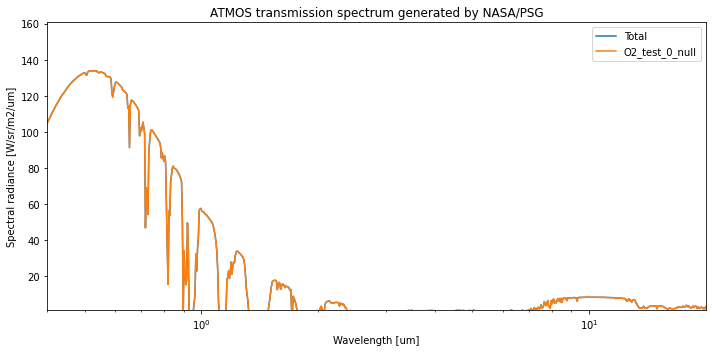

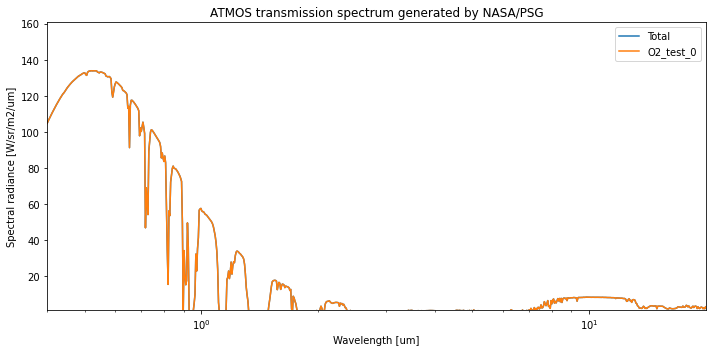

Required exposure time for O2_test_0: 8284.5 hr


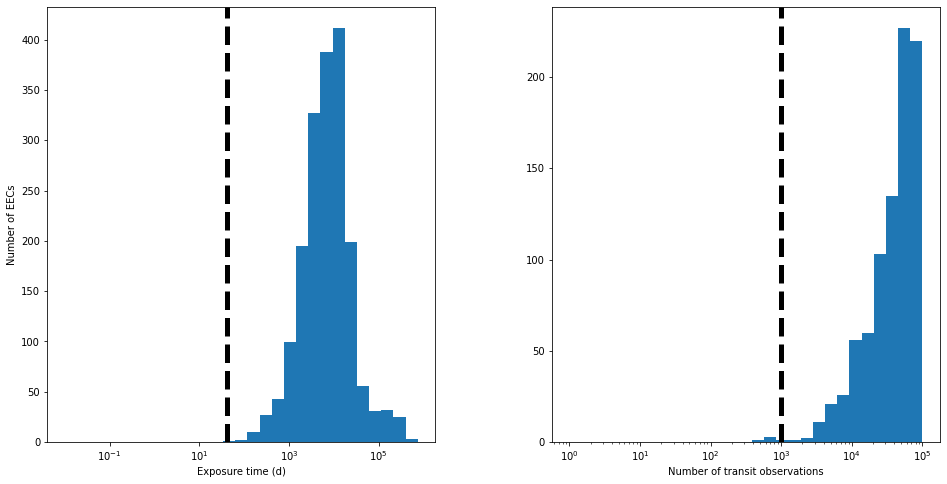

O2_test_1


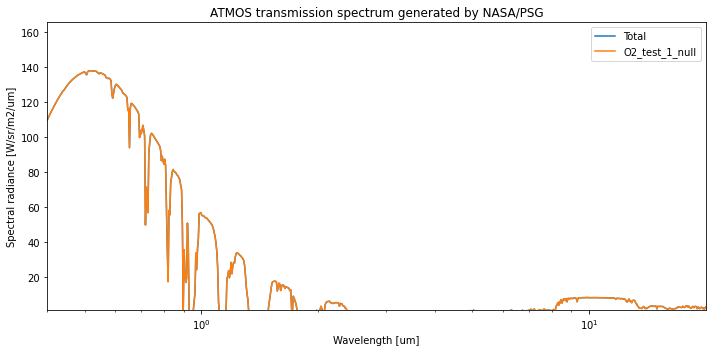

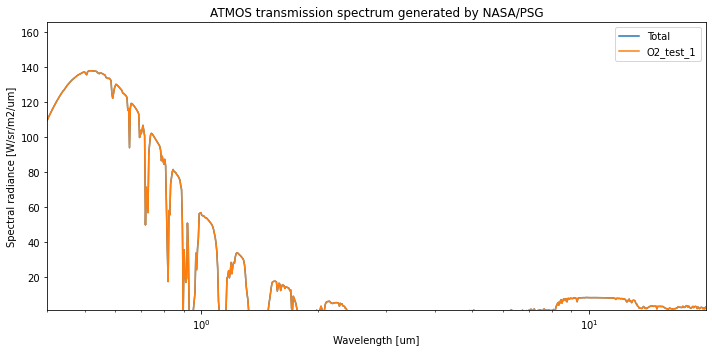

Required exposure time for O2_test_1: 13646256.0 hr


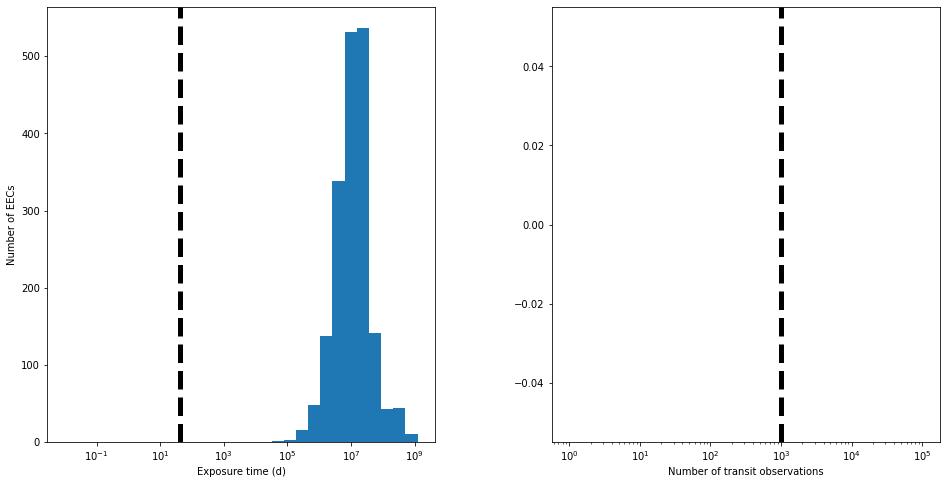

O2_test_10


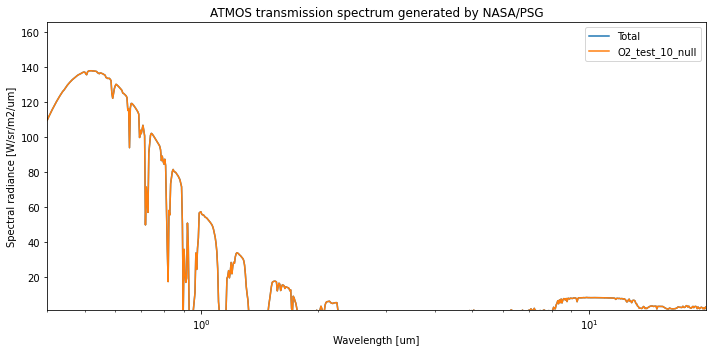

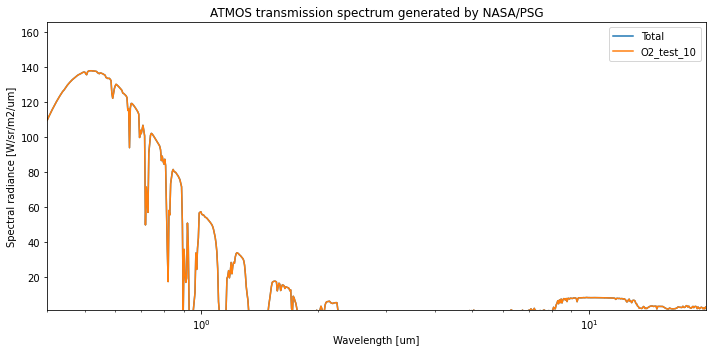

Required exposure time for O2_test_10: 2336902.5 hr


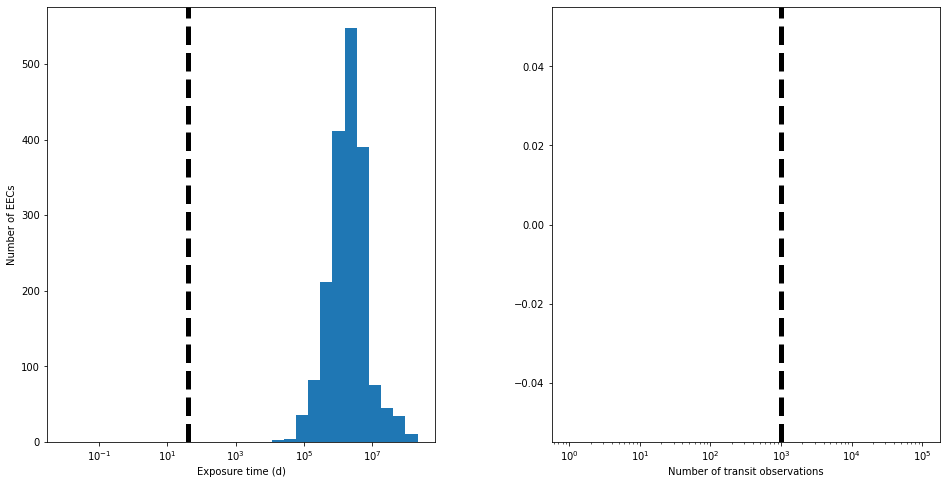

O2_test_11


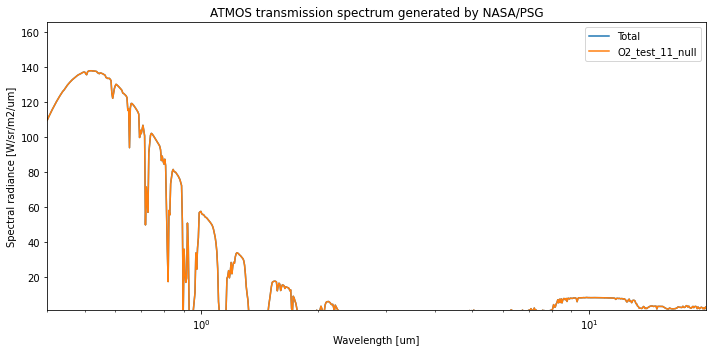

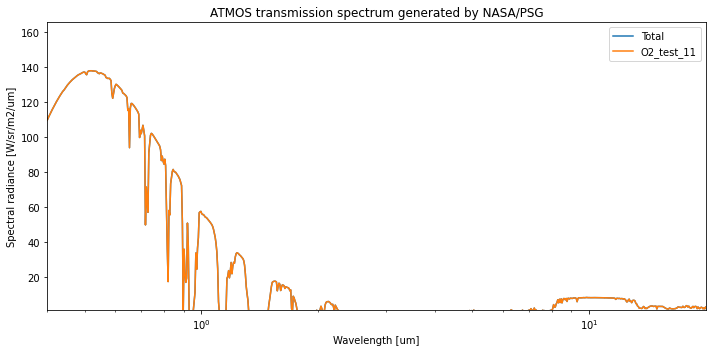

Required exposure time for O2_test_11: 920313.7 hr


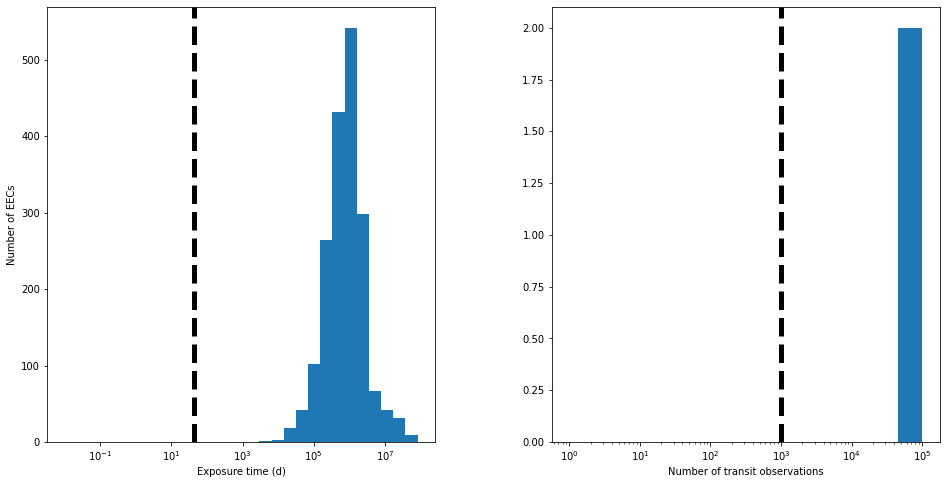

O2_test_12


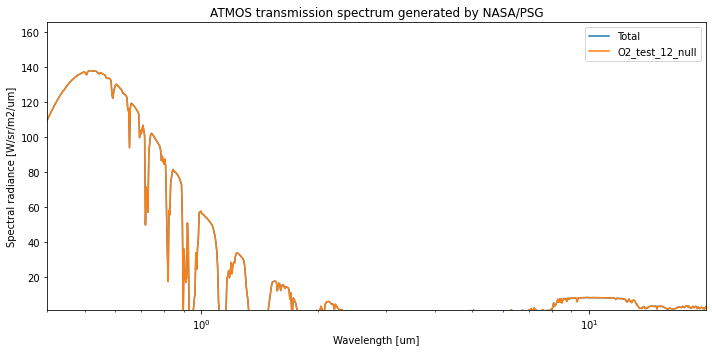

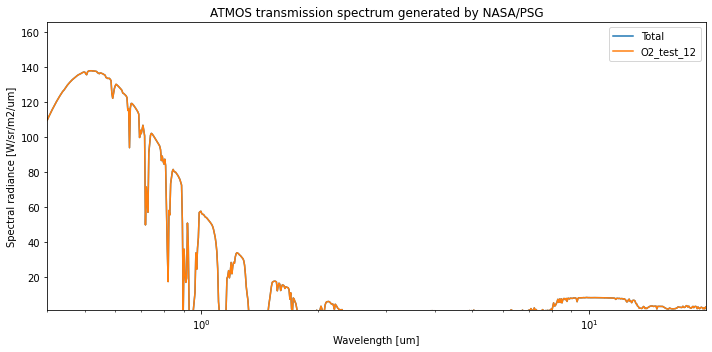

Required exposure time for O2_test_12: 560015.8 hr


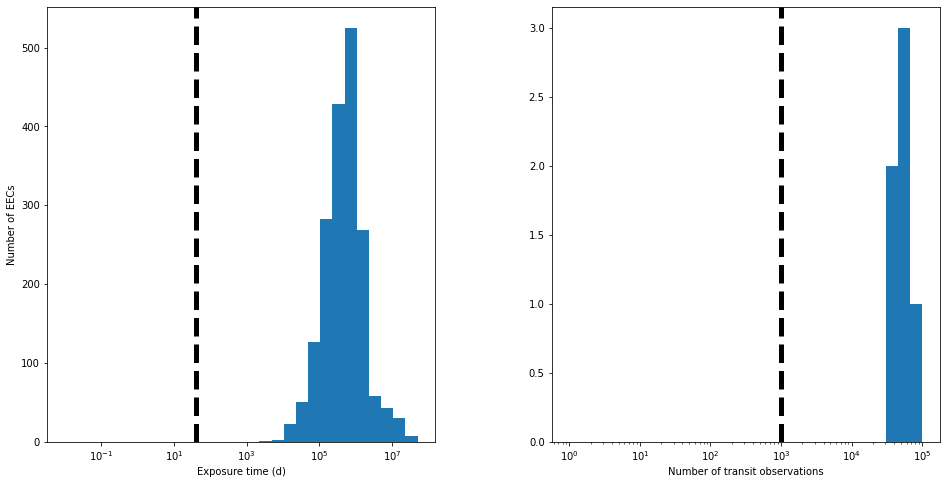

O2_test_13


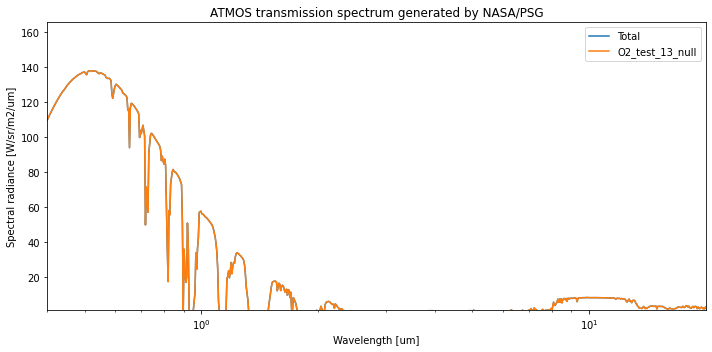

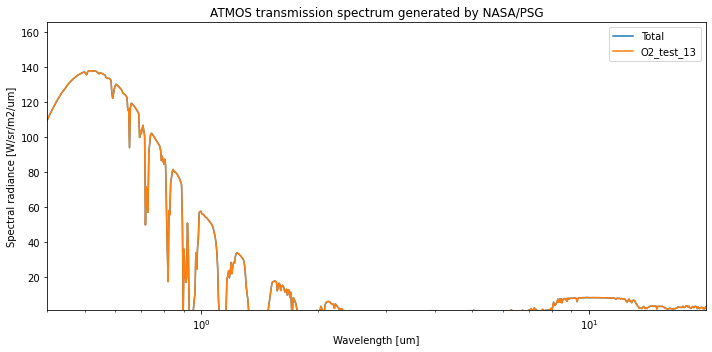

Required exposure time for O2_test_13: 436107.7 hr


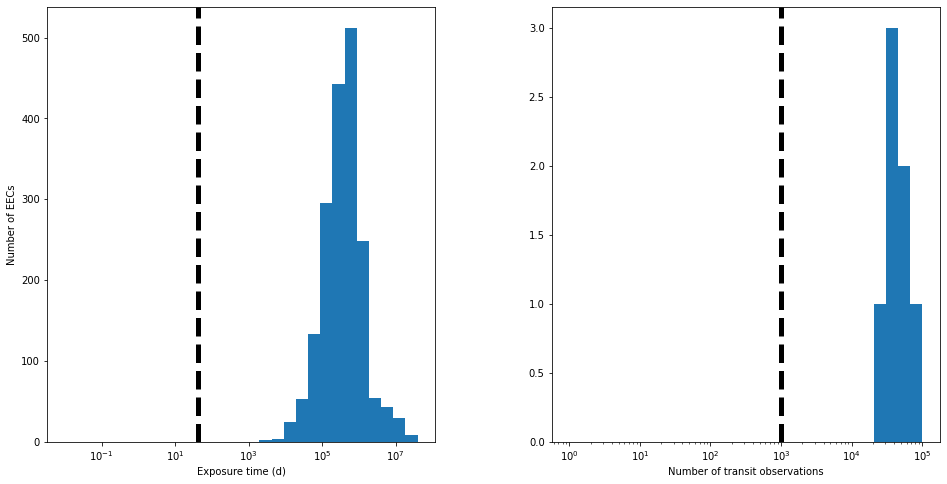

O2_test_14


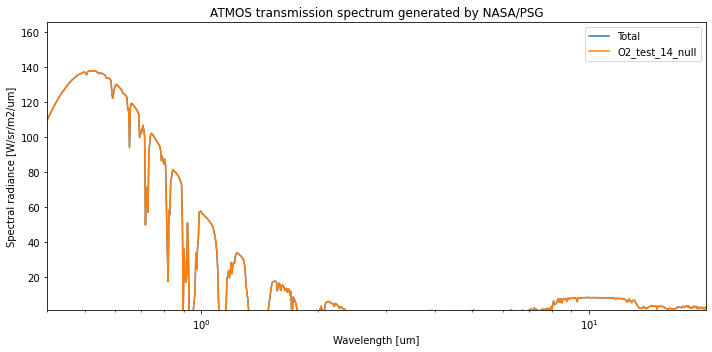

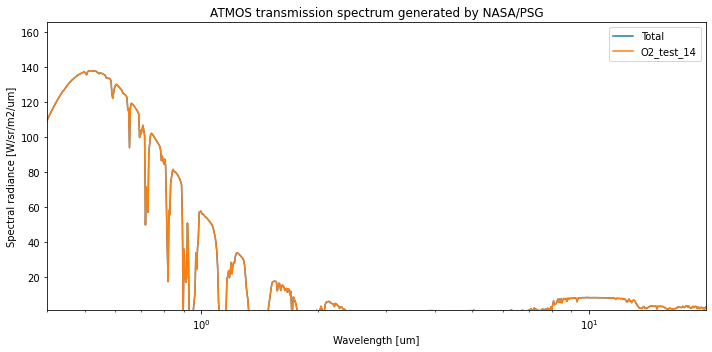

Required exposure time for O2_test_14: 289335.6 hr


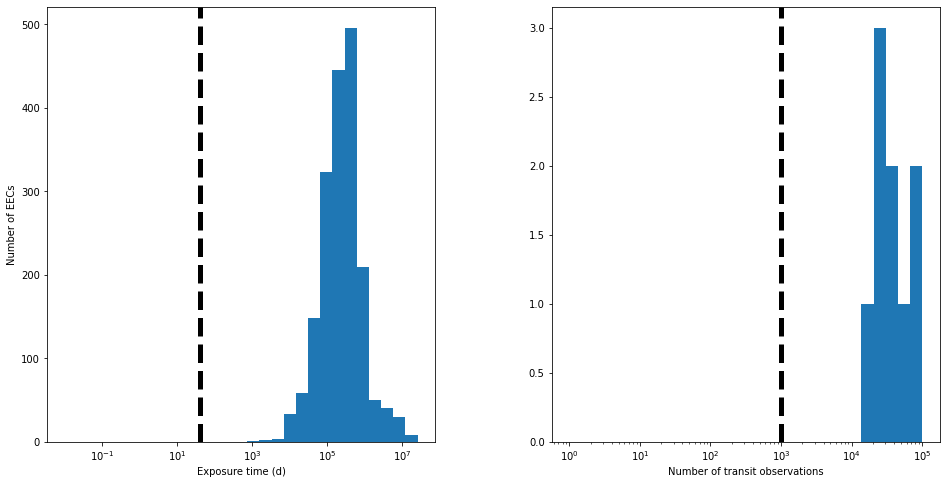

O2_test_15


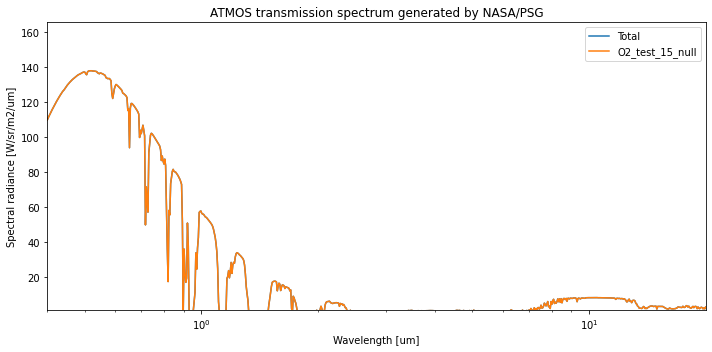

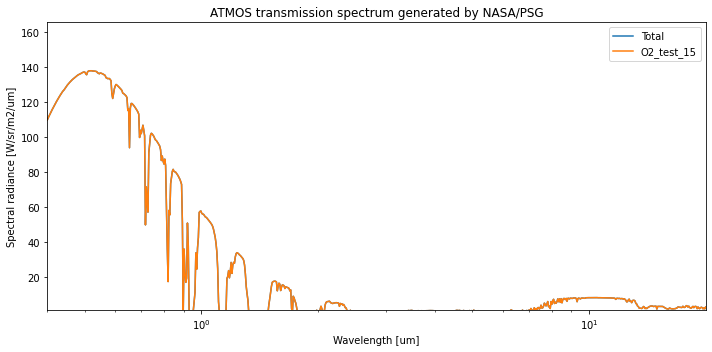

Required exposure time for O2_test_15: 0.0 hr


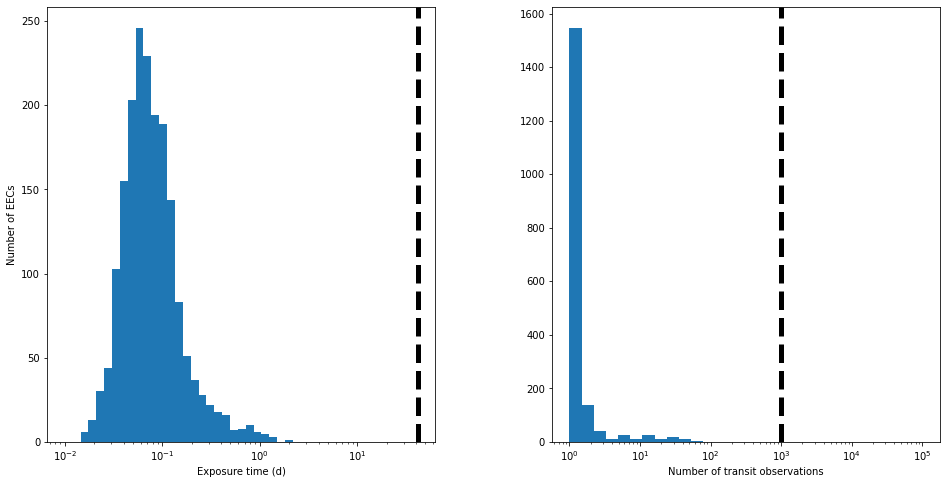

O2_test_16


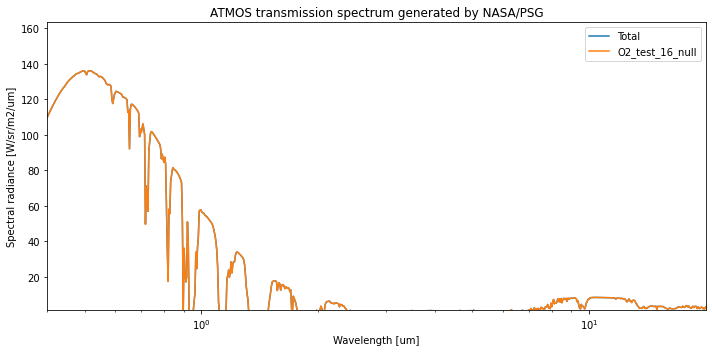

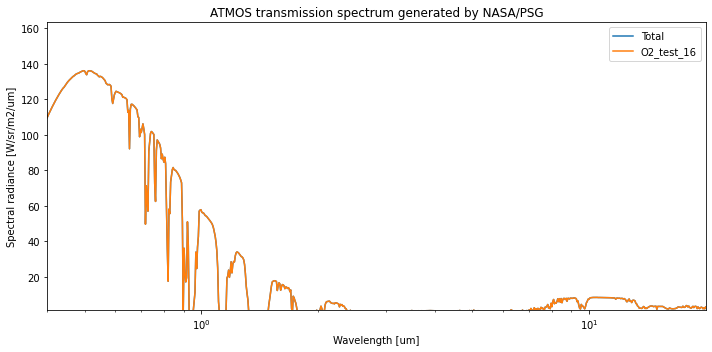

Required exposure time for O2_test_16: 0.0 hr


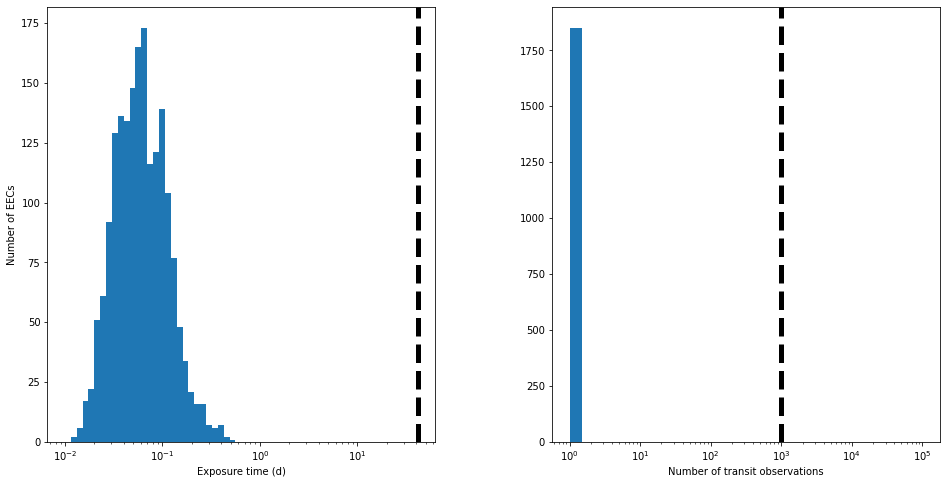

O2_test_17


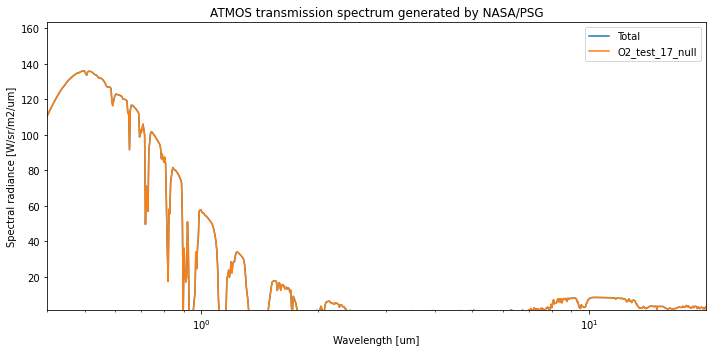

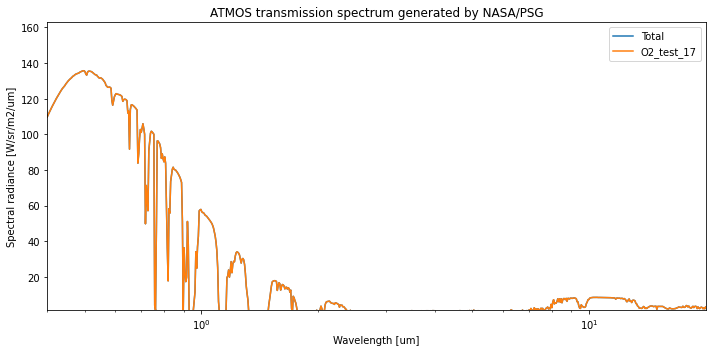

Required exposure time for O2_test_17: 0.0 hr


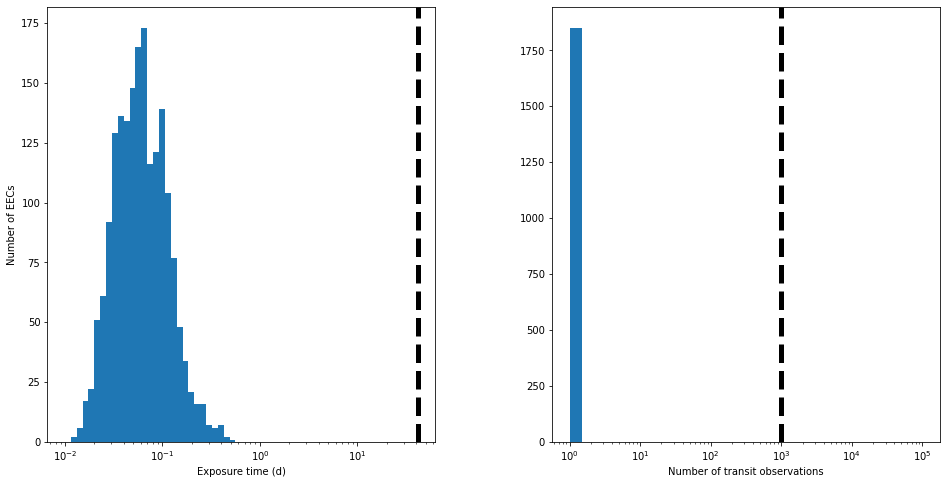

O2_test_2


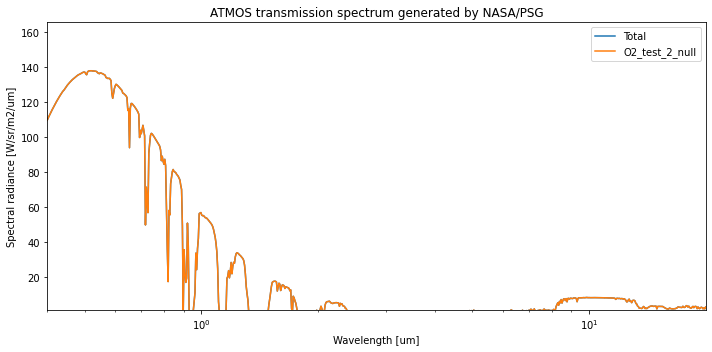

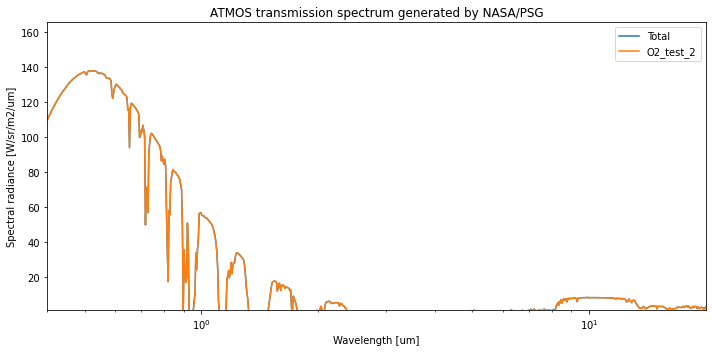

Required exposure time for O2_test_2: 11221196.3 hr


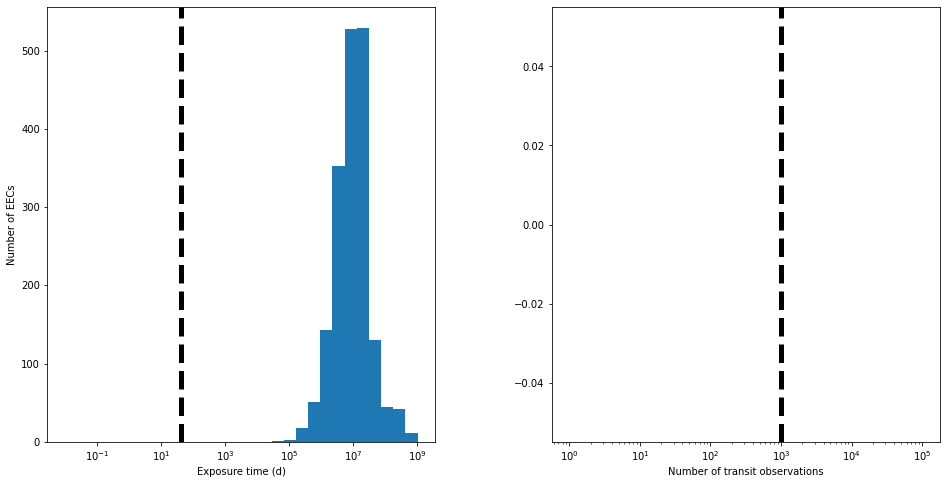

O2_test_3


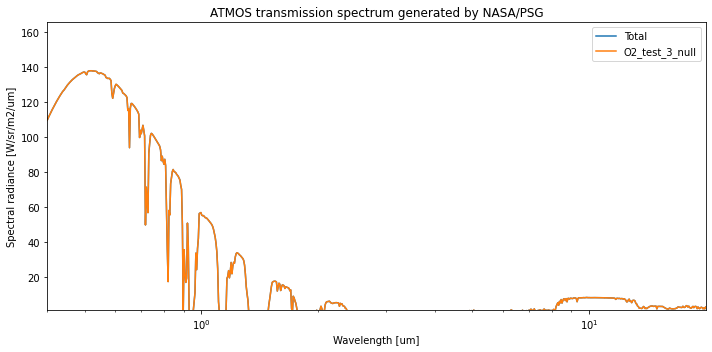

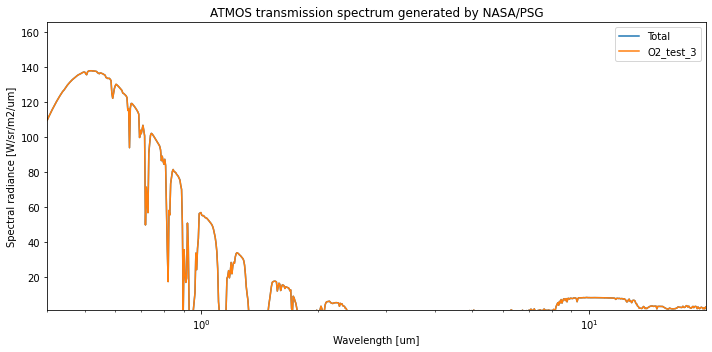

Required exposure time for O2_test_3: 10435956.7 hr


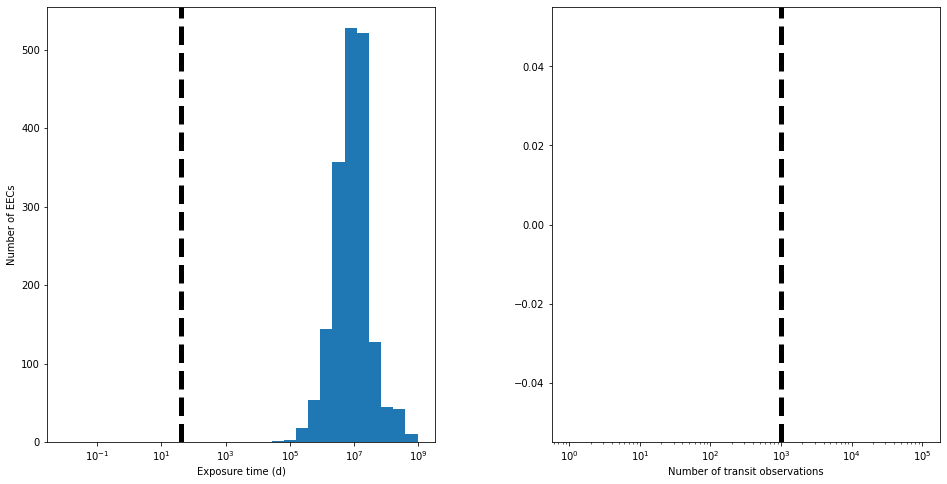

O2_test_4


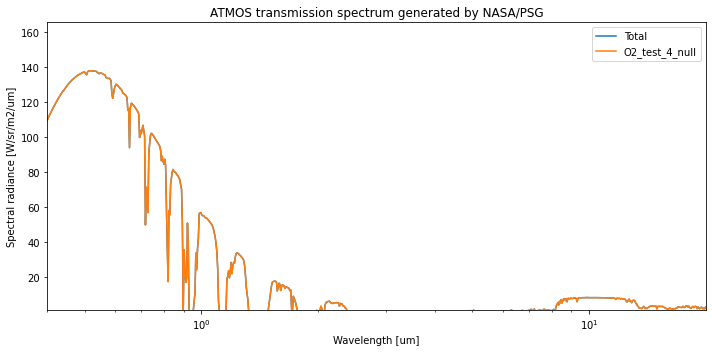

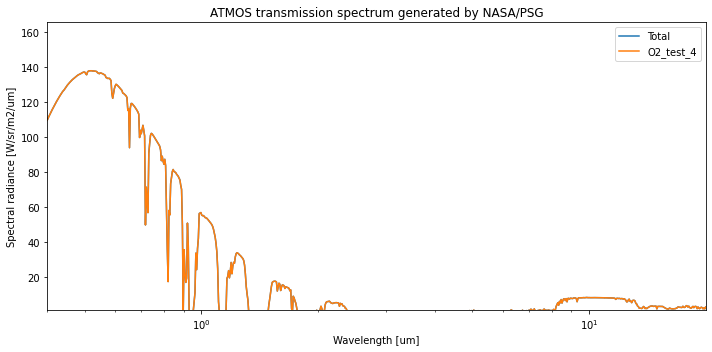

Required exposure time for O2_test_4: 10738794.3 hr


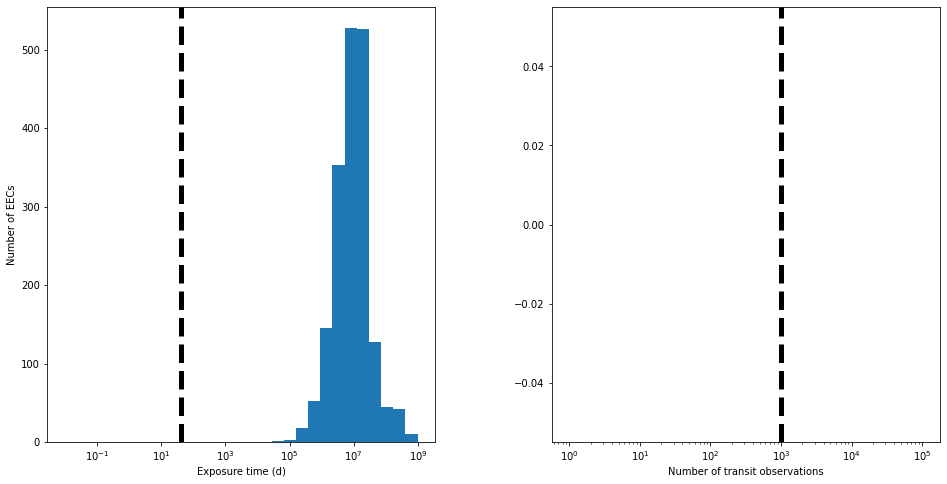

O2_test_5


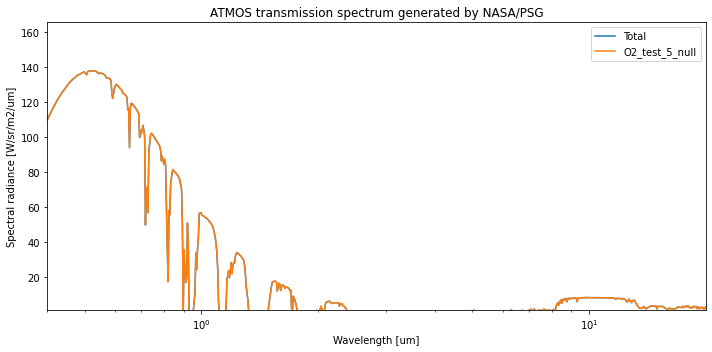

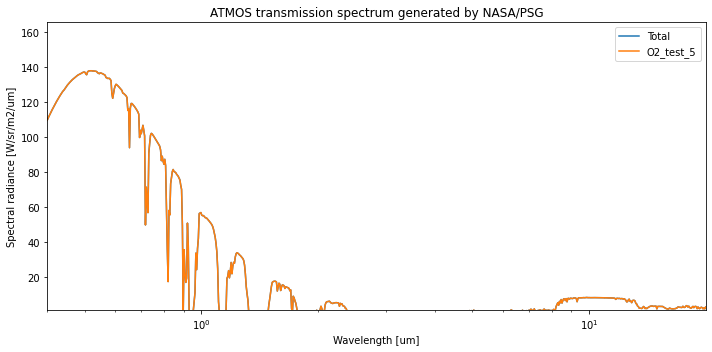

Required exposure time for O2_test_5: 11084813.0 hr


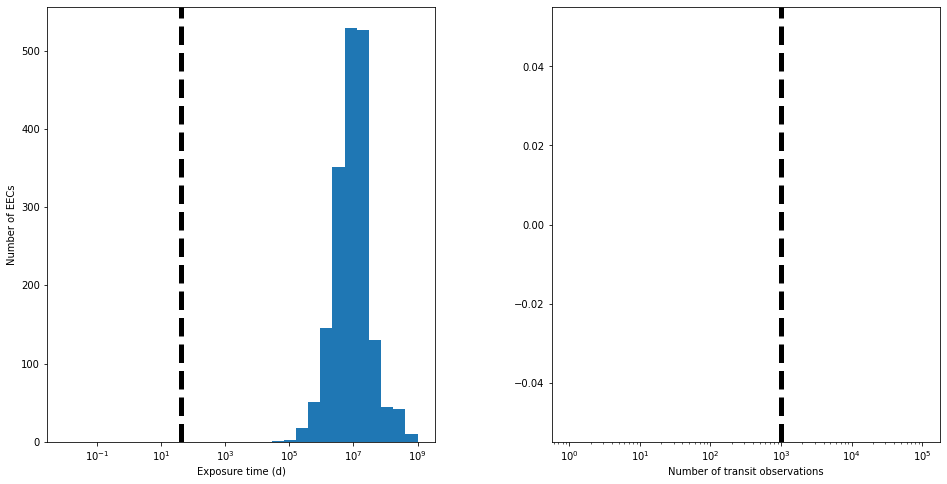

O2_test_6


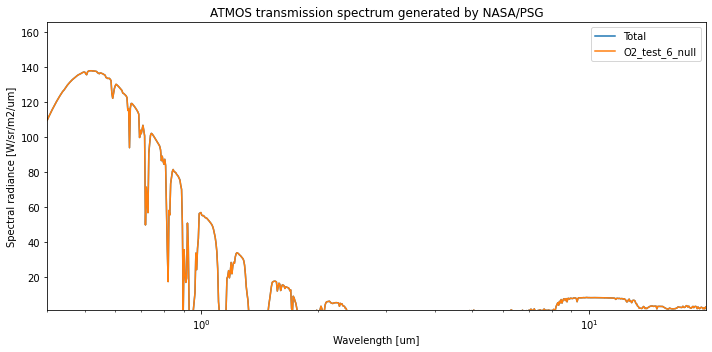

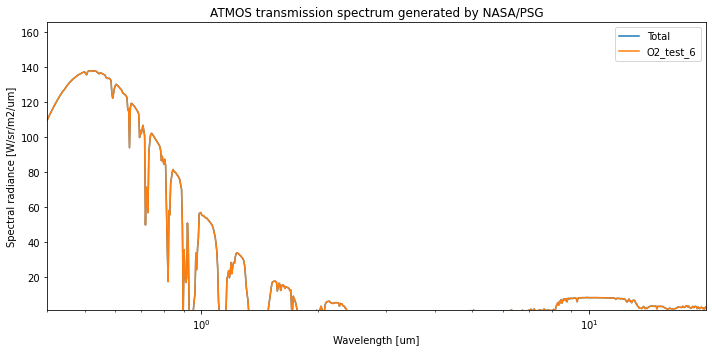

Required exposure time for O2_test_6: 10647708.7 hr


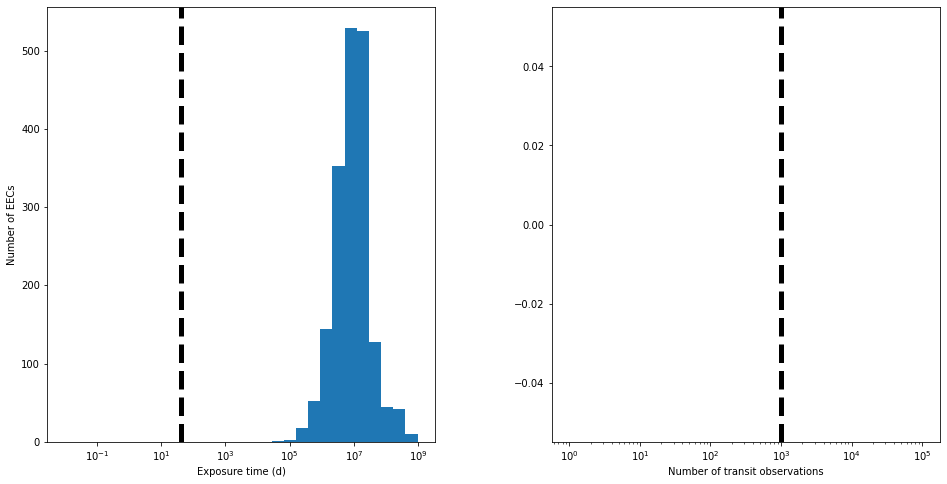

O2_test_7


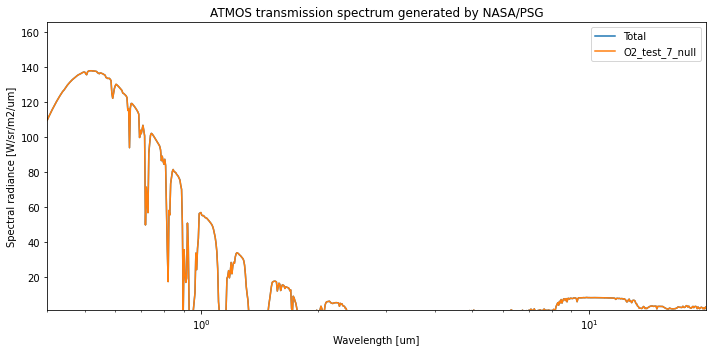

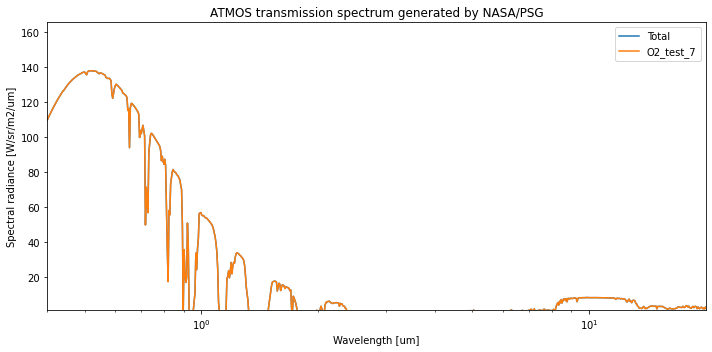

Required exposure time for O2_test_7: 10693465.4 hr


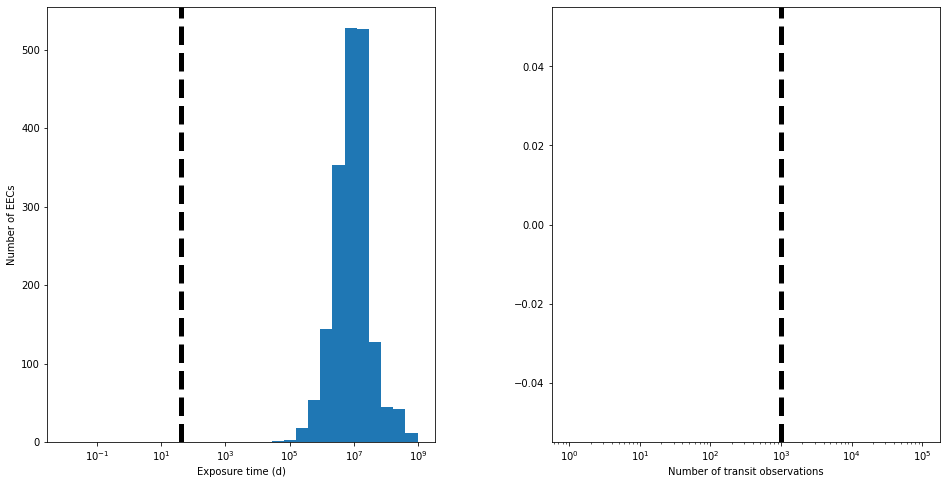

O2_test_8


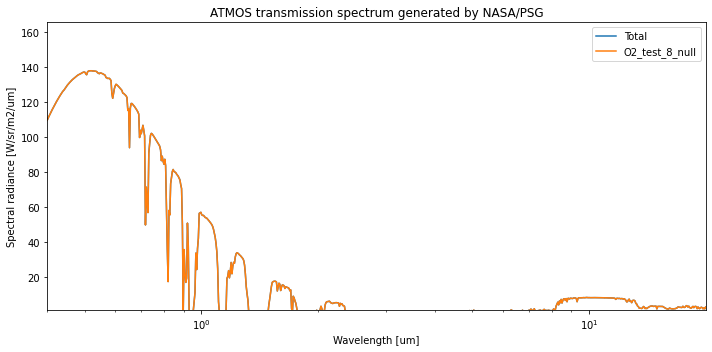

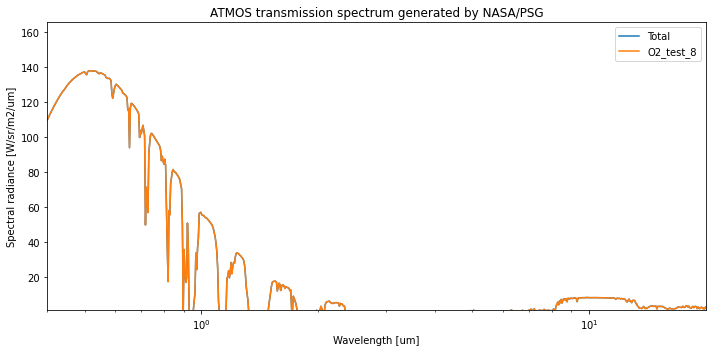

Required exposure time for O2_test_8: 6651644.7 hr


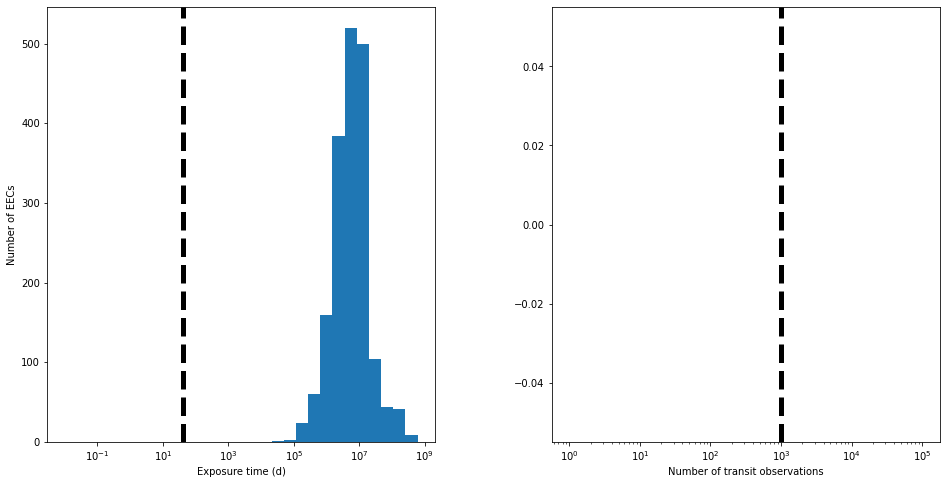

O2_test_9


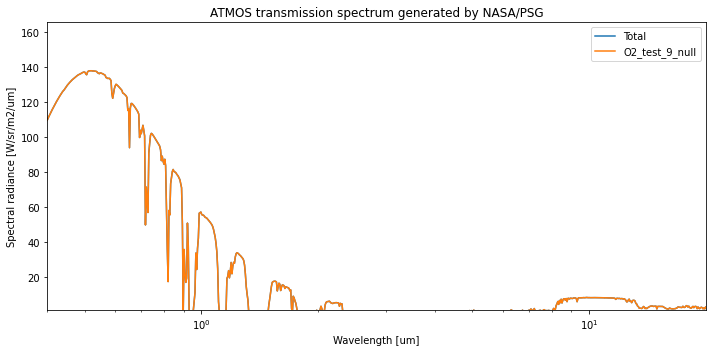

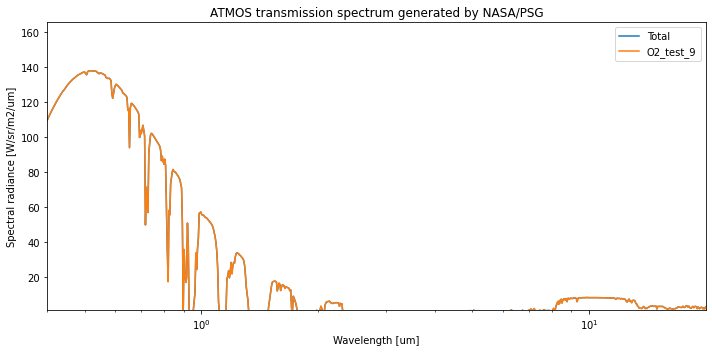

Required exposure time for O2_test_9: 4149258.9 hr


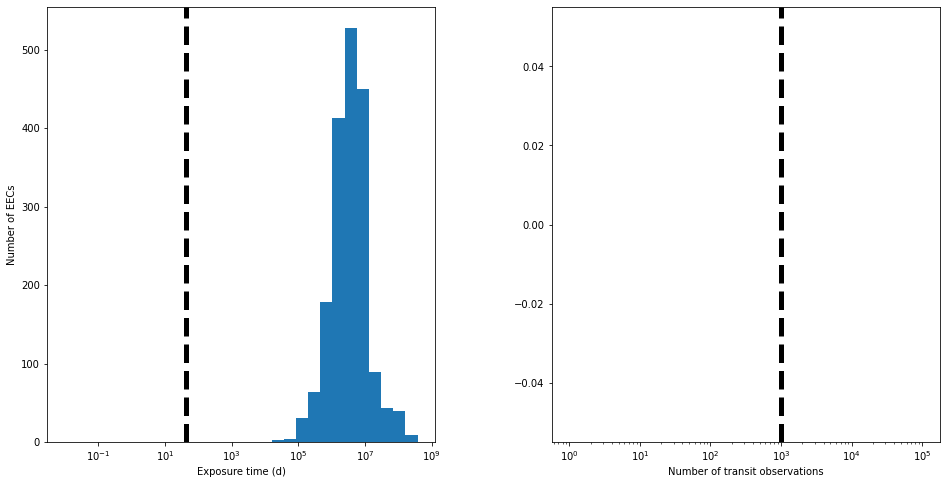

In [75]:
tel='JWST'
# generate spectra and then calculate t_ref
for i in range(len(model_list)):
    model=model_list[i].split('/')[1]
    print(model)

    #create the null spectrum for t_ref
    
    null_newf=atmosatm(model_list[i],tel=tel,filebase=model,null_spec=True,removed_gas="O2",star='M')
    psgspec(model,null_newf,showplot=True,null_spec=True)
    null_rad=curr_dir+'/psg_output/%s_null_rad.txt' % model

    #create radiance spectrum

    newf=atmosatm(model_list[i],tel=tel,filebase=model,star='M')
    psgspec(model,newf,showplot=True)
    model_rad=curr_dir+'/psg_output/%s_rad.txt' % model
    t_ref = compute_t_ref(filenames=(model_rad,null_rad), t_exp=10, wl_min=0.4, wl_max=0.9,)
    print("Required exposure time for %s: {:.1f} hr".format(t_ref) % model)
    survey.measurements['has_O2'].t_ref=t_ref/24
    survey.save()
    
    
    t_exp, N_obs = survey.measurements['has_O2'].compute_exposure_time(data[detected['EEC']])

    fig, ax = plt.subplots(ncols=2, figsize=(16,8))

    bins = np.logspace(np.log10(0.01), np.log10(np.amax(t_exp)), 30)
    ax[0].hist(t_exp, bins=bins)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Exposure time (d)')
    ax[0].set_ylabel('Number of EECs')
    ax[0].axvline(1000/24, linestyle='dashed', lw=5, c='black')

    bins = np.logspace(0, 5, 30)
    ax[1].hist(N_obs, bins=bins)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Number of transit observations')
    ax[1].axvline(survey.N_obs_max, linestyle='dashed', lw=5, c='black')

    plt.subplots_adjust(wspace=0.3)

    plt.show()
